In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
essay_df = pd.read_csv('backend_essay - backend_essay.csv')
metric_df = pd.read_csv('backend_metric.csv')
metriccategory_df = pd.read_csv('backend_metriccategory.csv')
classroom_students_df = pd.read_csv('classroom_students - backend_classroom_students.csv')
essay_score_df = pd.read_csv('backend_essayscore - backend_essayscore.csv')

# Display the first few rows of each dataframe to understand their structure
essay_df.head(), metric_df.head(), metriccategory_df.head(), classroom_students_df.head(), essay_score_df.head()

(   id                                              essay submission_type  \
 0  80  Argue for the inclusion of critical thinking e...       1st Draft   
 1  85  As the world grapples with environmental degra...       1st Draft   
 2  86  In an increasingly interconnected world, the d...       1st Draft   
 3  87  In today's interconnected world, the debate be...       2nd Draft   
 4  88  In an increasingly interconnected world, the d...       1st Draft   
 
      state        submitted_on  student_id  task_id  is_reviewed  \
 0  Teacher   7/9/2024 17:00:00           9      109        False   
 1  Teacher  7/10/2024 17:00:00           3       90         True   
 2  Teacher  7/10/2024 17:00:00           3       89        False   
 3  Teacher  7/10/2024 17:00:00           3       89        False   
 4  Teacher  7/10/2024 17:00:00           4       89        False   
 
                                           essay_html  classroom_id  
 0  <p><span style="color:rgb(33, 37, 41);">Argue 

/var/folders/9t/_lj71dfn69zf3dhzl3mr4b1w0000gn/T/ipykernel_4413/1352345625.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


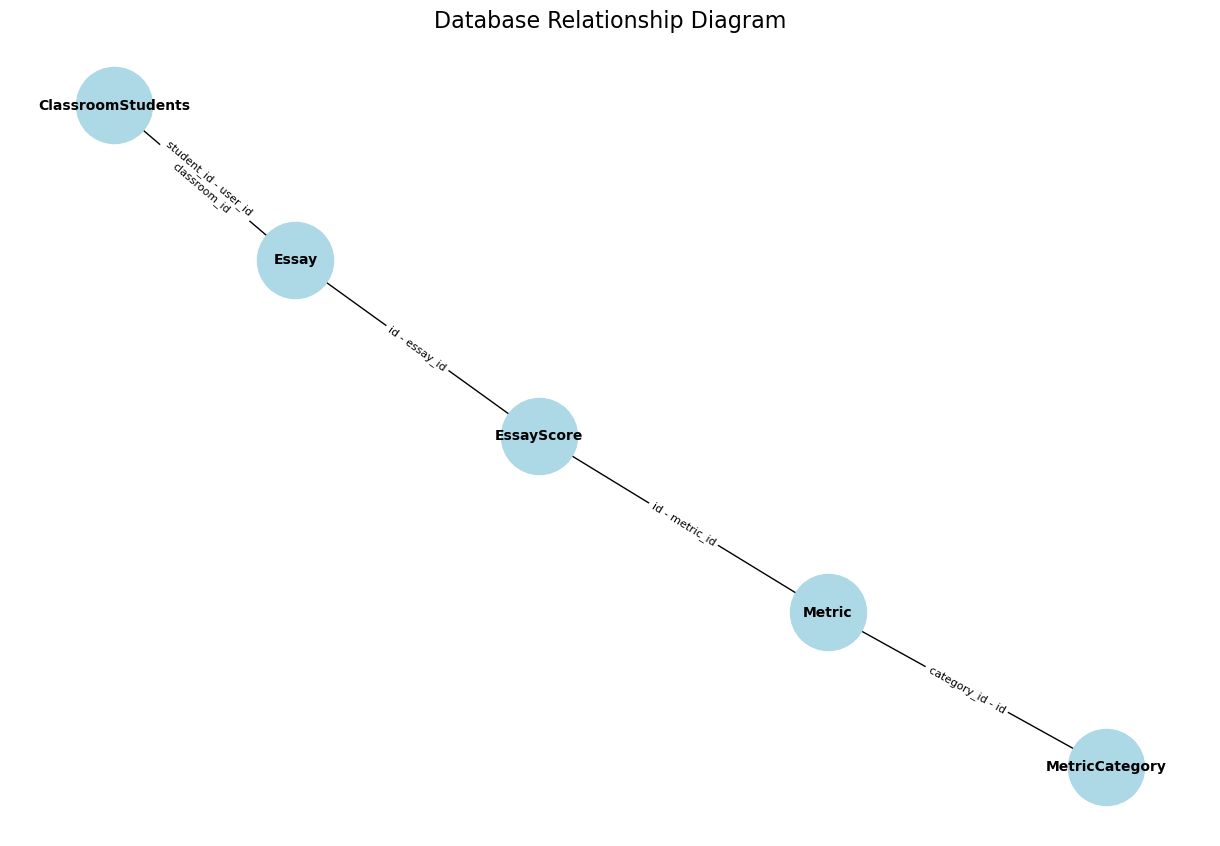

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (tables)
tables = ['Essay', 'Metric', 'MetricCategory', 'ClassroomStudents', 'EssayScore']
G.add_nodes_from(tables)

# Add edges (relationships) - corrected without attributes
relationships = [
    ('Essay', 'EssayScore'),
    ('Essay', 'ClassroomStudents'),
    ('Metric', 'EssayScore'),
    ('Metric', 'MetricCategory')
]
G.add_edges_from(relationships)

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, font_size=10, font_weight='bold')

# Add edge labels
edge_labels = {
    ('Essay', 'EssayScore'): 'id - essay_id',
    ('Essay', 'ClassroomStudents'): 'student_id - user_id\nclassroom_id',
    ('Metric', 'EssayScore'): 'id - metric_id',
    ('Metric', 'MetricCategory'): 'category_id - id'
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Database Relationship Diagram", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [70]:
# Combine Essay with EssayScore
essay_with_scores = pd.merge(essay_df, essay_score_df, left_on='id', right_on='essay_id')

# Add Metric information
essay_scores_with_metrics = pd.merge(essay_with_scores, metric_df, left_on='metric_id', right_on='id')

# Add Student information
complete_data = pd.merge(essay_scores_with_metrics, classroom_students_df, 
                         left_on=['student_id', 'classroom_id'], 
                         right_on=['user_id', 'classroom_id'])

# Display the first few rows of the combined data
print(complete_data.head())

   id_x                                              essay submission_type  \
0    80  Argue for the inclusion of critical thinking e...       1st Draft   
1   100  The debate over whether competition or coopera...       1st Draft   
2   131  Managing privacy and security on social media ...       2nd Draft   
3   173  AI technology continues to evolve at a rapid p...       2nd Draft   
4   292  With the rise of artificial intelligence, the ...       1st Draft   

     state        submitted_on  student_id  task_id  is_reviewed  \
0  Teacher   7/9/2024 17:00:00           9      109        False   
1  Teacher  7/10/2024 17:00:00           9       89        False   
2  Teacher  4/25/2024 23:18:12           9       97        False   
3  Teacher   1/6/2024 23:18:12           9      103        False   
4      WAT  7/25/2024 23:18:12           9      103         True   

                                          essay_html  classroom_id  ...  id  \
0  <p><span style="color:rgb(33, 37, 41);">

In [71]:
# Filter scores for metric_id 8
academic_focus_scores = essay_score_df[essay_score_df['metric_id'] == 8]

# Merge with essay_df to get student_id
academic_focus_with_students = pd.merge(academic_focus_scores, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')

# Calculate average score for each student
average_scores_per_student = academic_focus_with_students.groupby('student_id')['score'].mean().reset_index()

# Rename columns for clarity
average_scores_per_student.columns = ['student_id', 'average_score']

# Display the results
print(average_scores_per_student)

    student_id  average_score
0            1      10.610000
1            2      53.625833
2            3      30.888750
3            4      51.391765
4            5      45.800000
5            6      56.070000
6            7      41.009167
7            8      44.564348
8            9      41.950000
9           10      38.268571
10          11      51.685714
11          12      41.577500
12          13      54.611667
13          14      51.924167
14          15      48.082857
15          16      87.230000
16          17      77.930000
17          18      56.074545
18          23      93.740000
19          24      58.026000
20          25      45.415000
21          26      54.144000


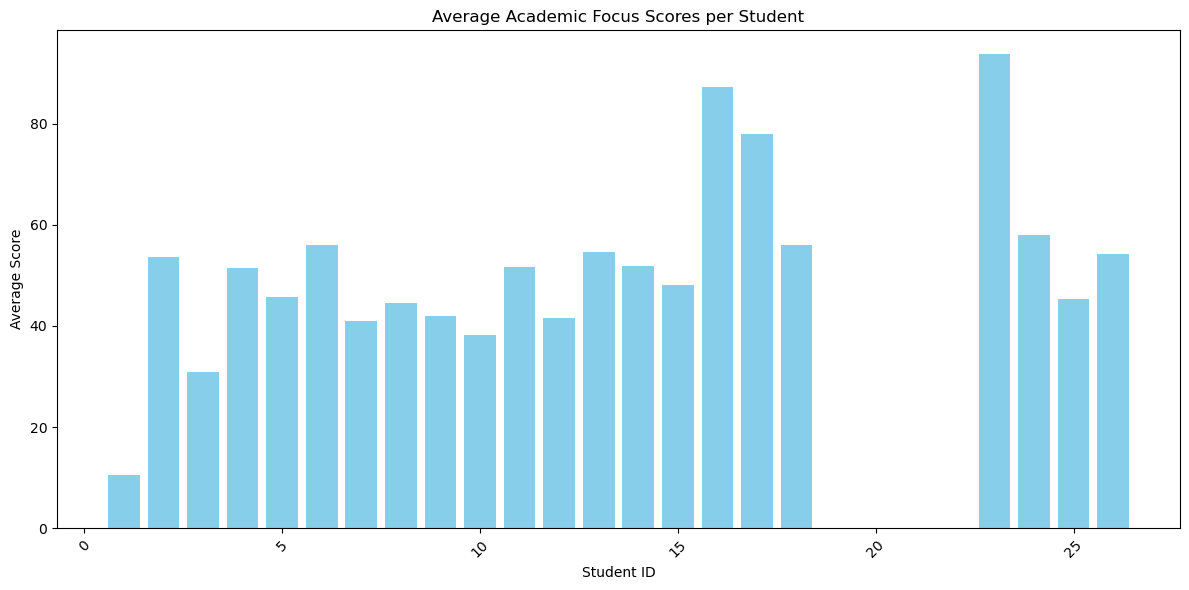

In [72]:
import matplotlib.pyplot as plt

# Filter scores for metric_id 8 (Academic Focus)
academic_focus_scores = essay_score_df[essay_score_df['metric_id'] == 8]

# Merge with essay_df to get student_id
academic_focus_with_students = pd.merge(academic_focus_scores, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')

# Calculate average score for each student
average_scores_per_student = academic_focus_with_students.groupby('student_id')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(average_scores_per_student['student_id'], average_scores_per_student['score'], color='skyblue')
plt.xlabel('Student ID')
plt.ylabel('Average Score')
plt.title('Average Academic Focus Scores per Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

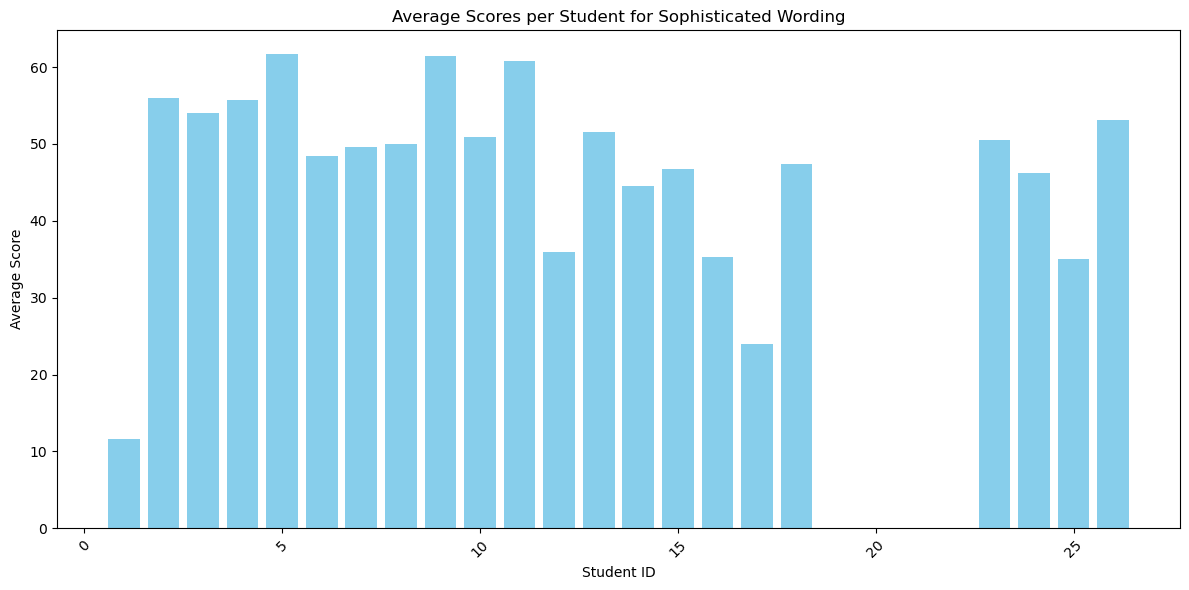

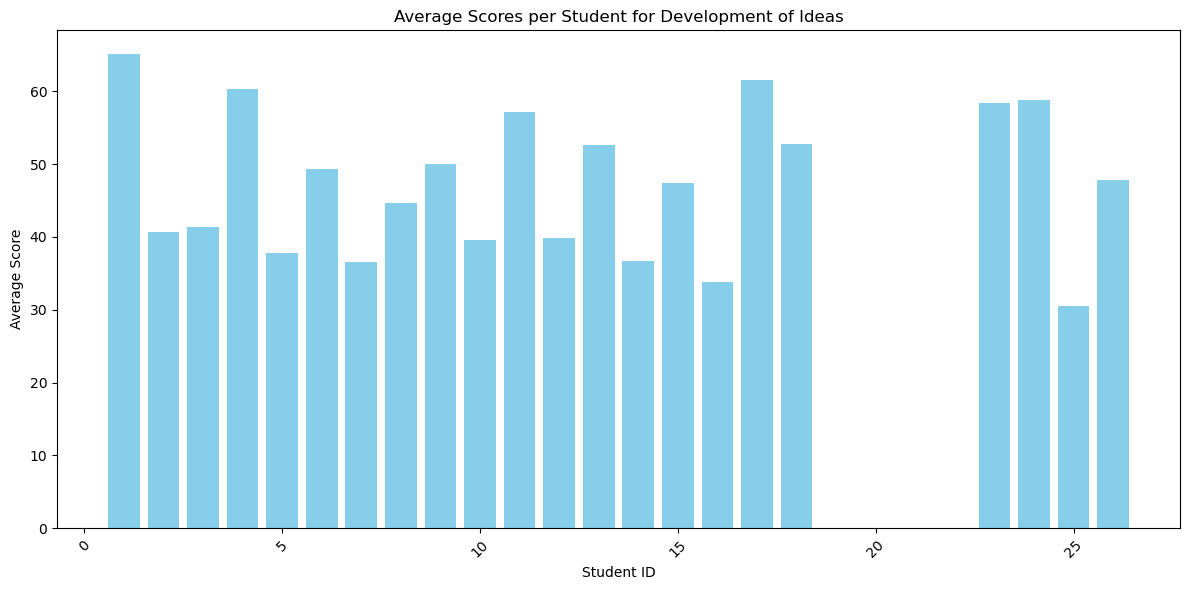

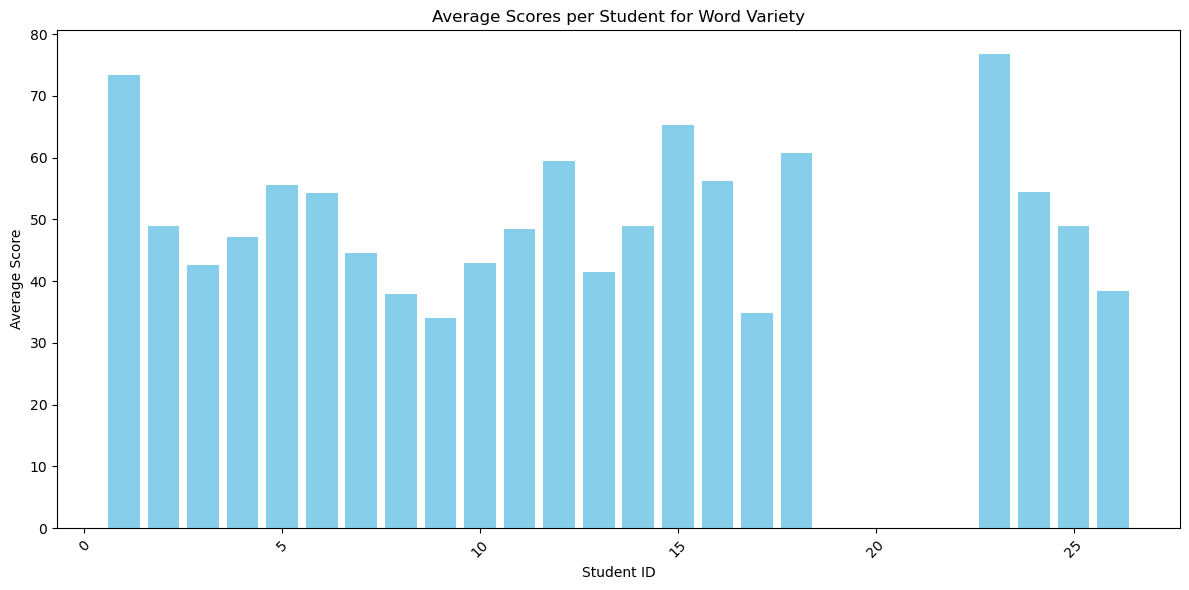

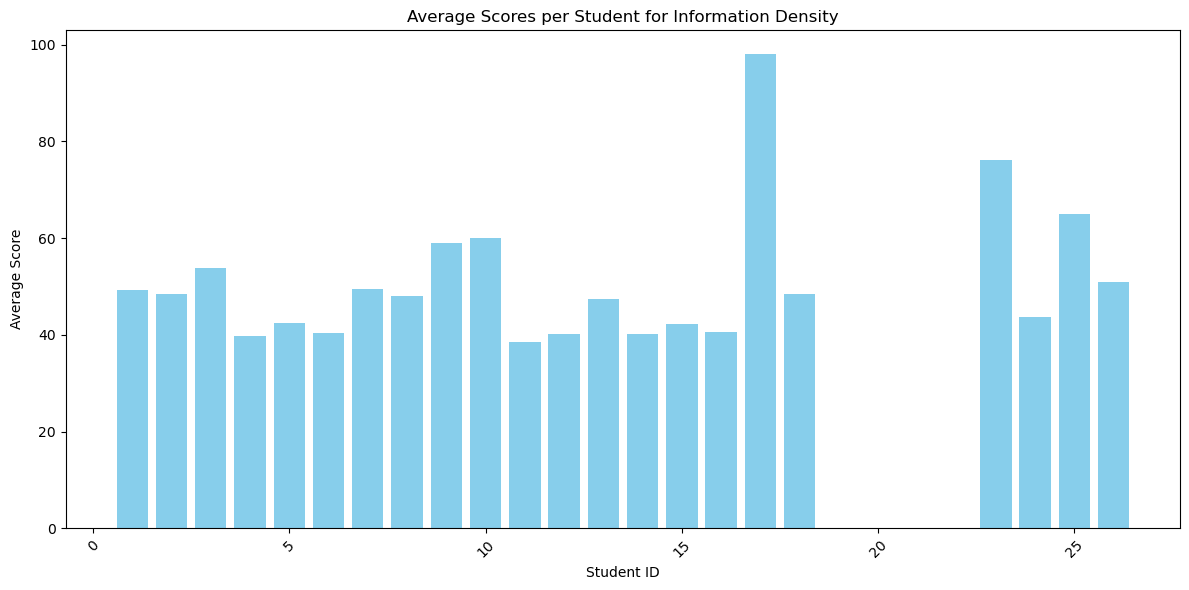

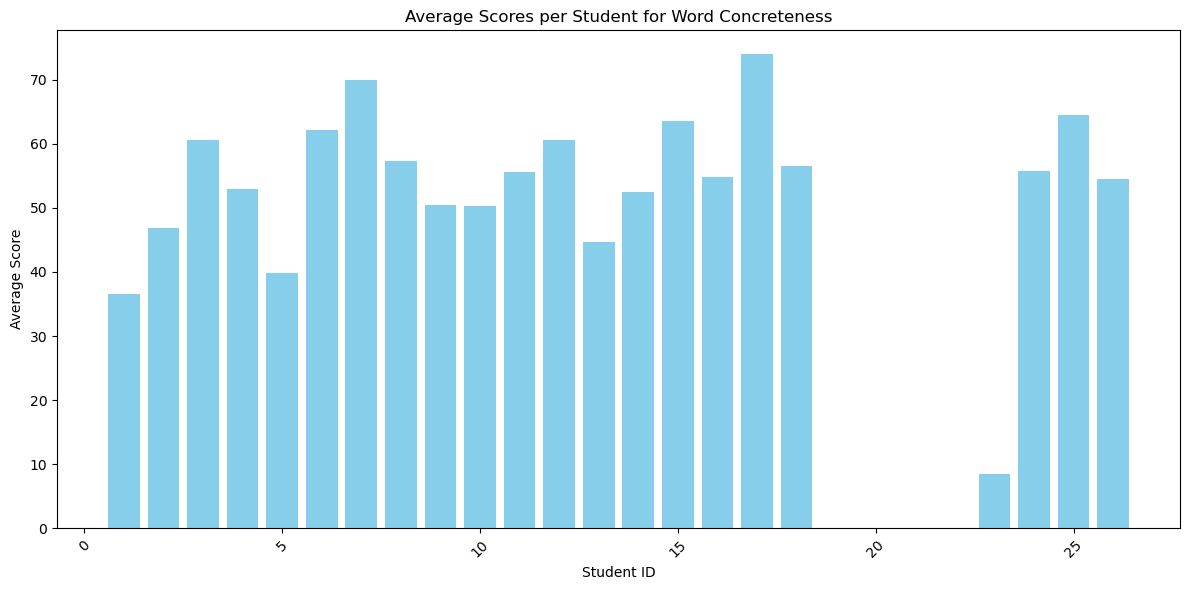

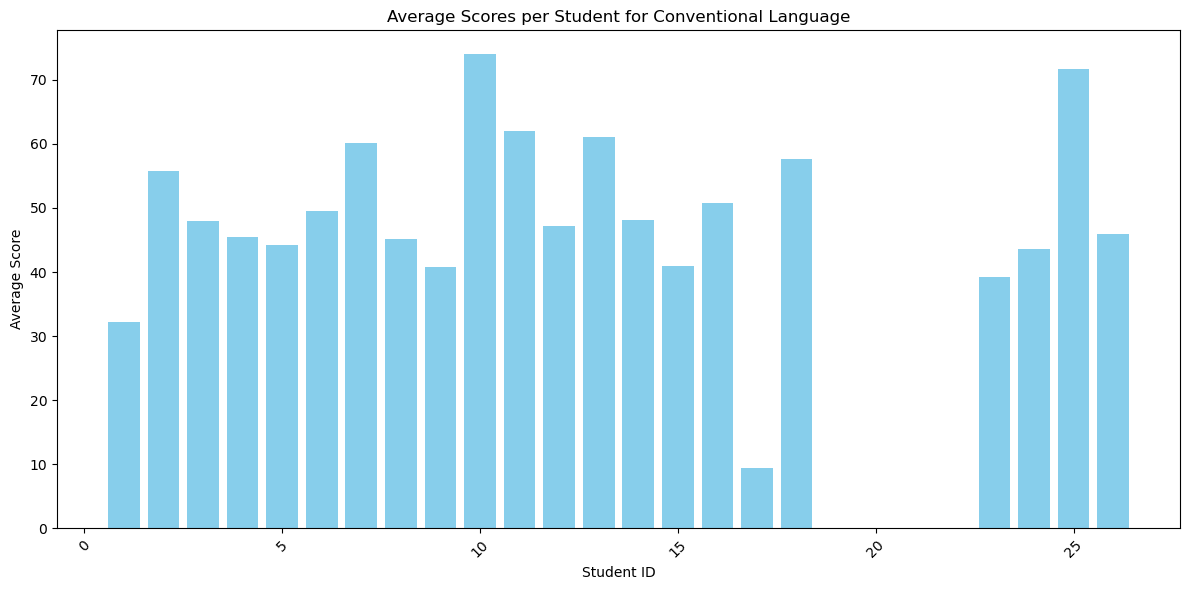

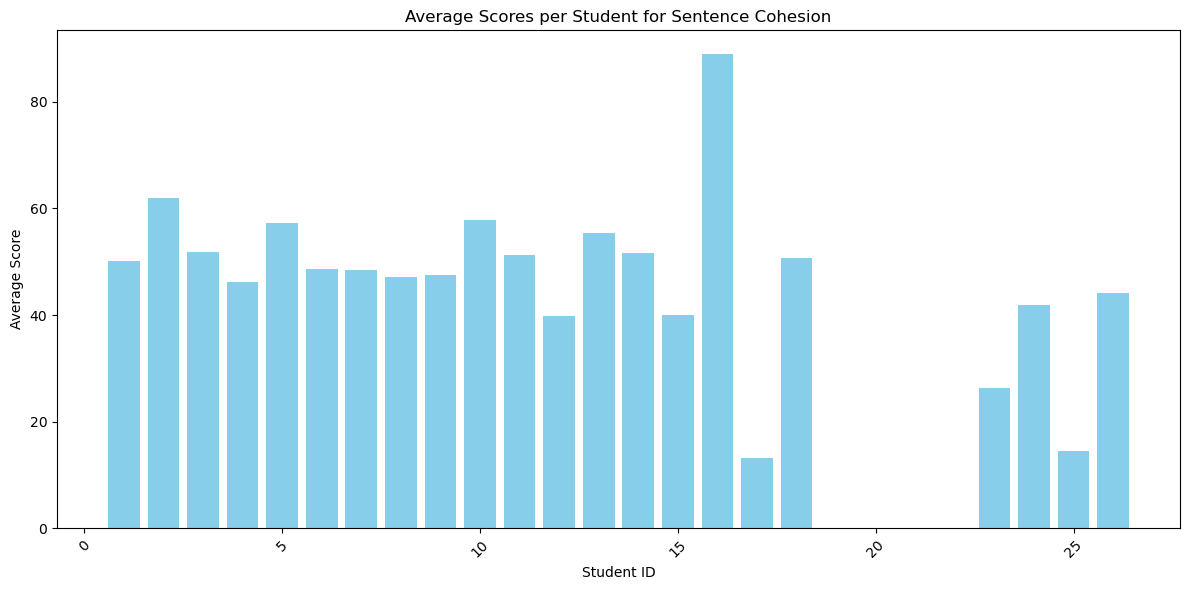

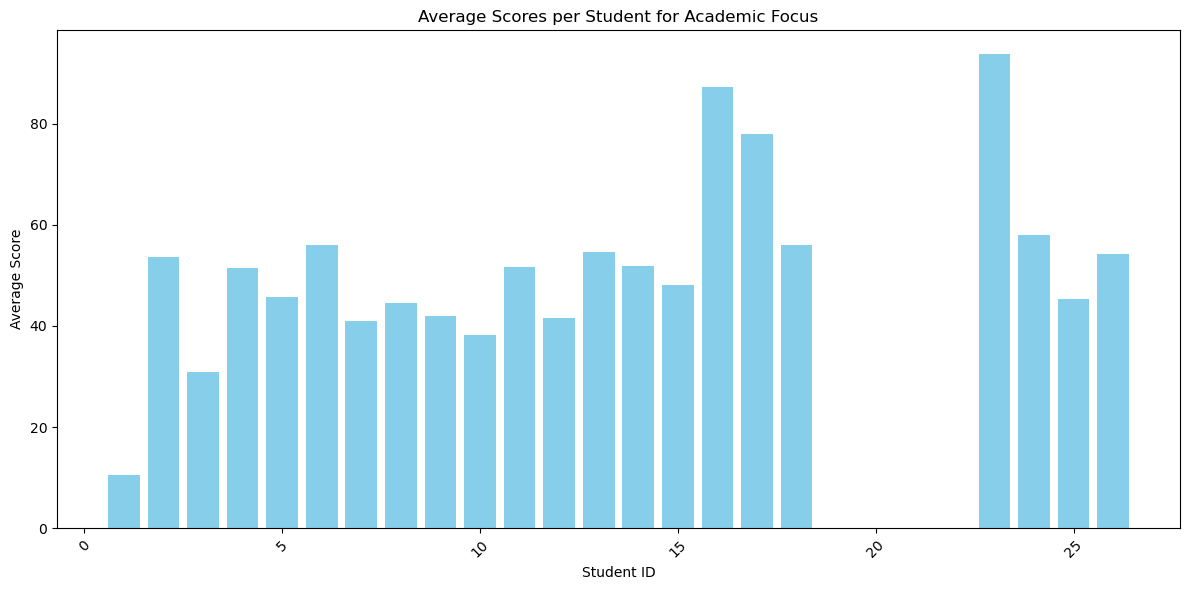

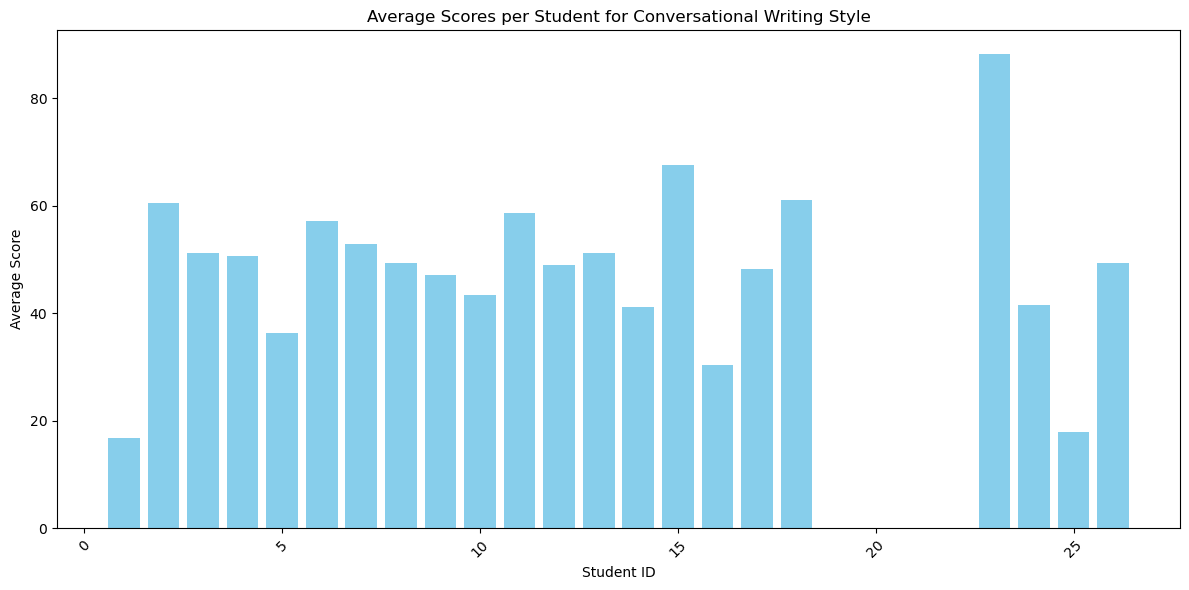

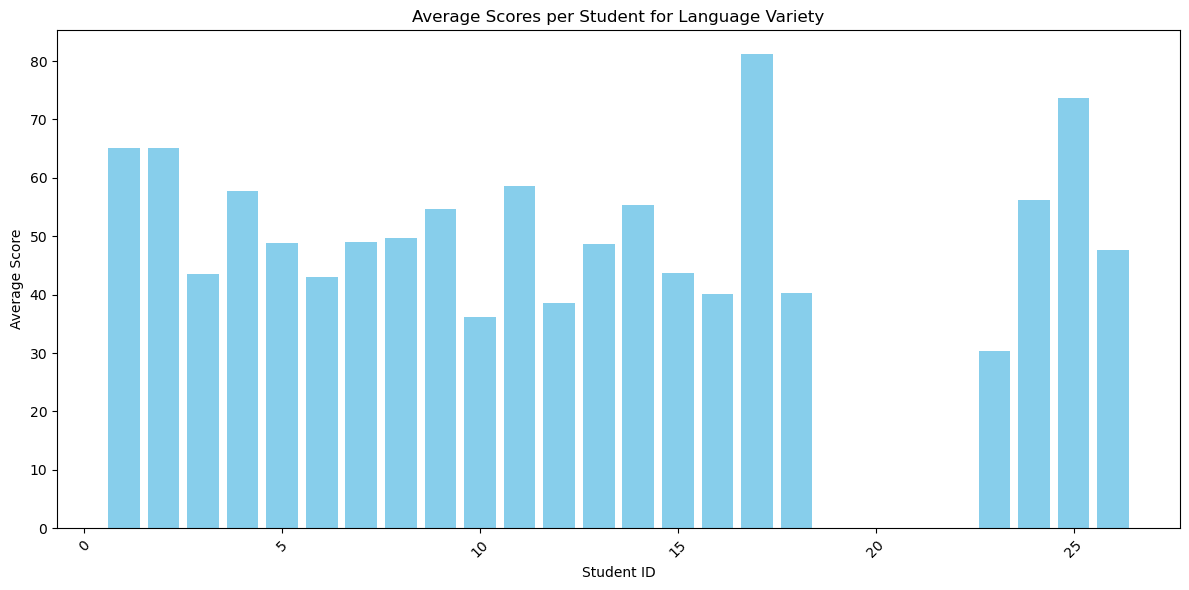

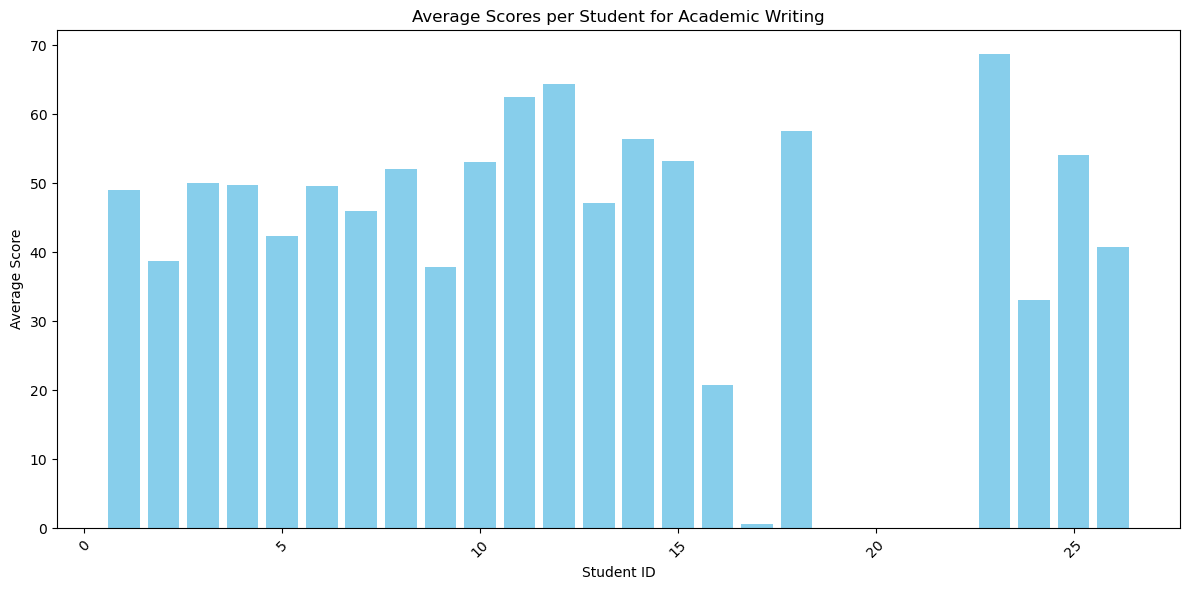

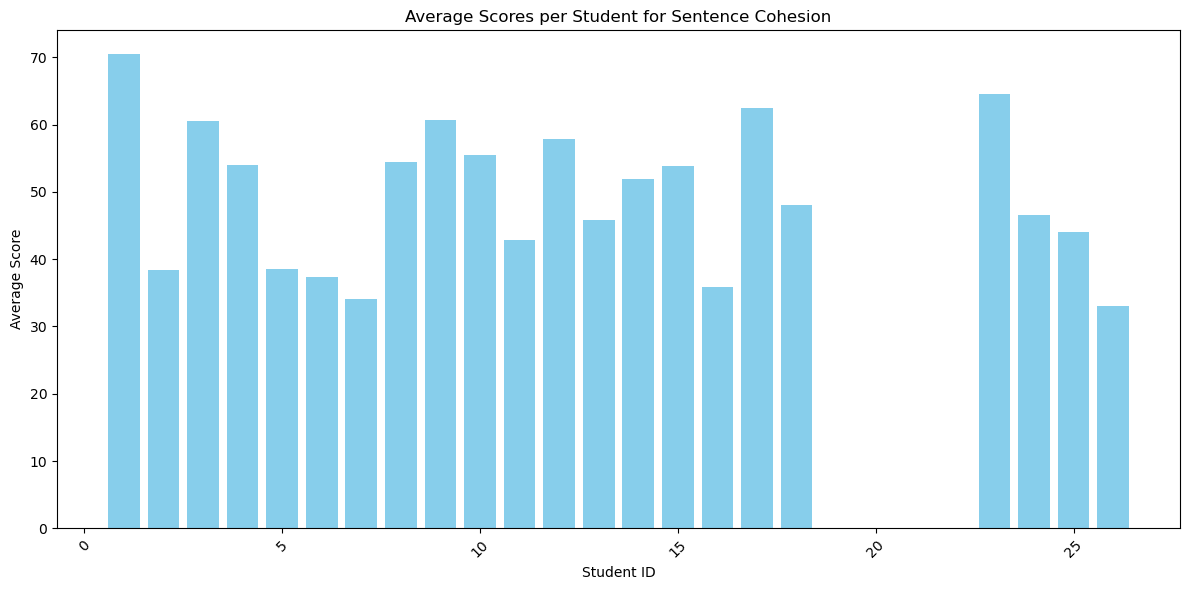

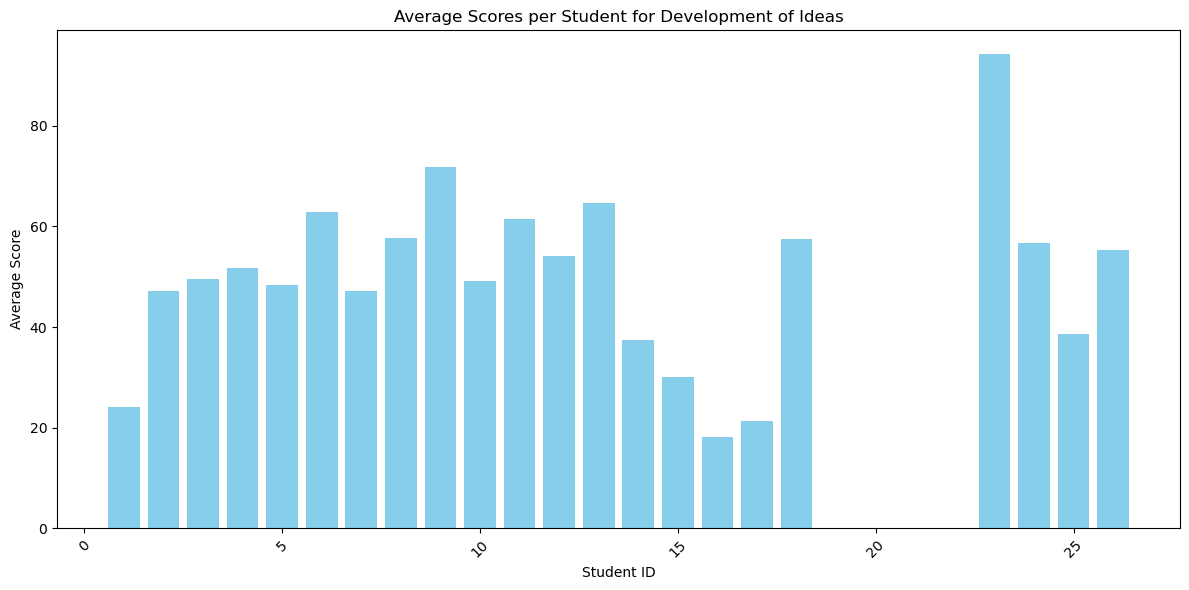

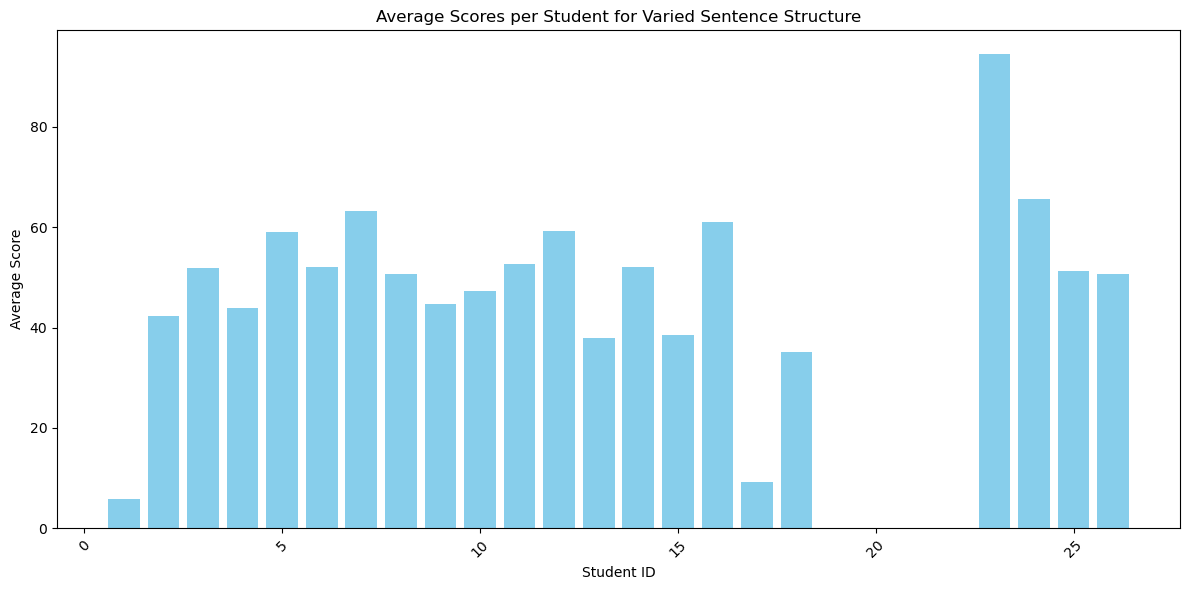

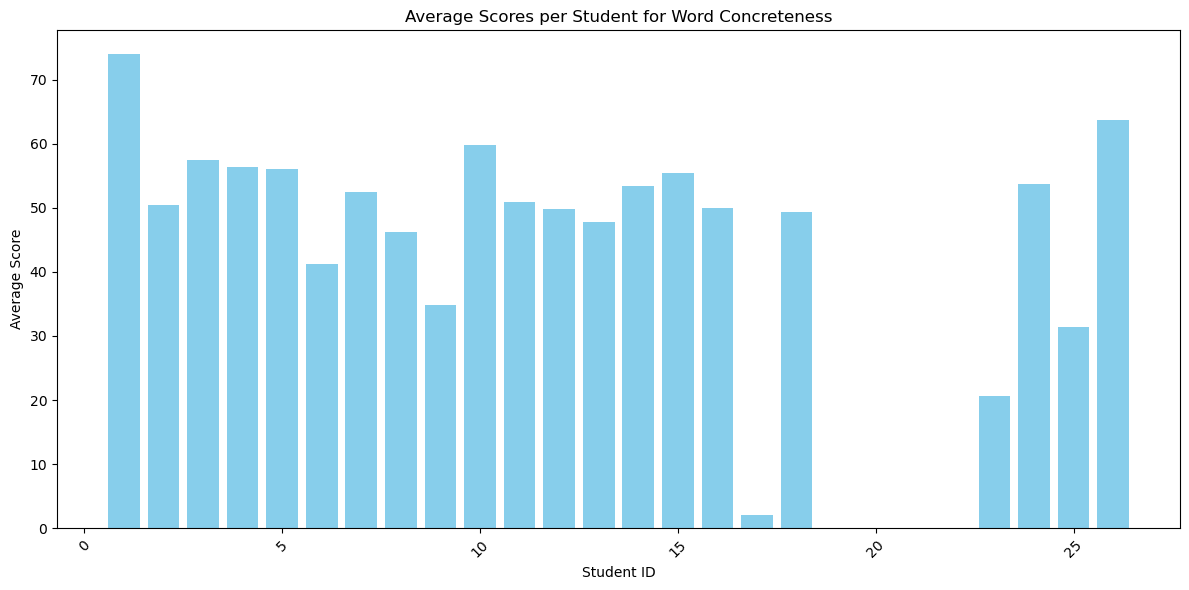

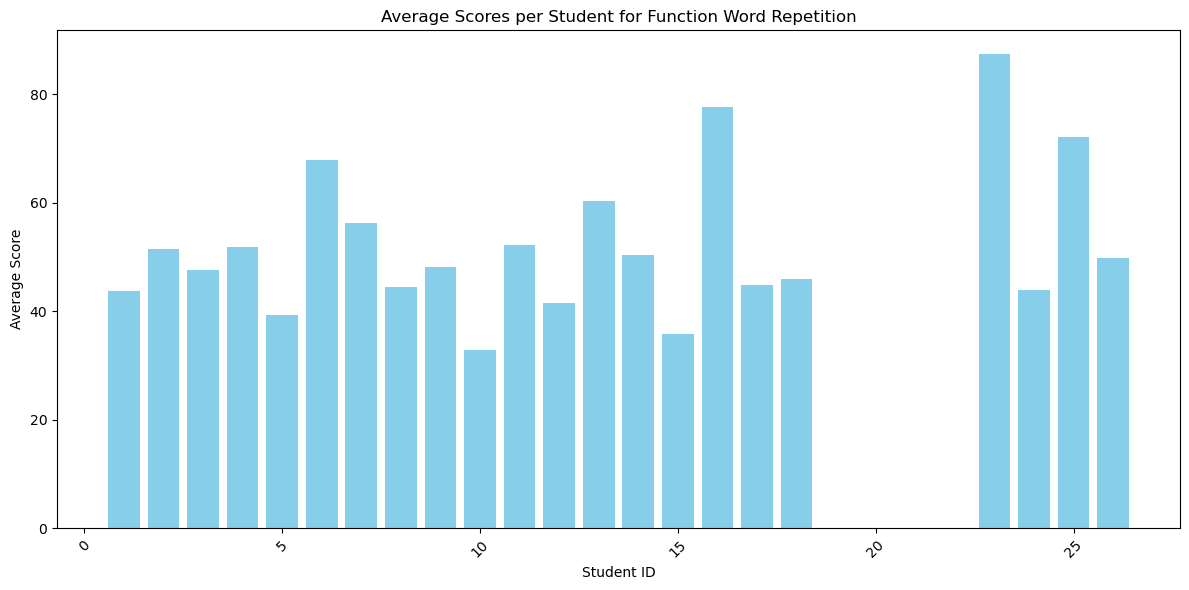

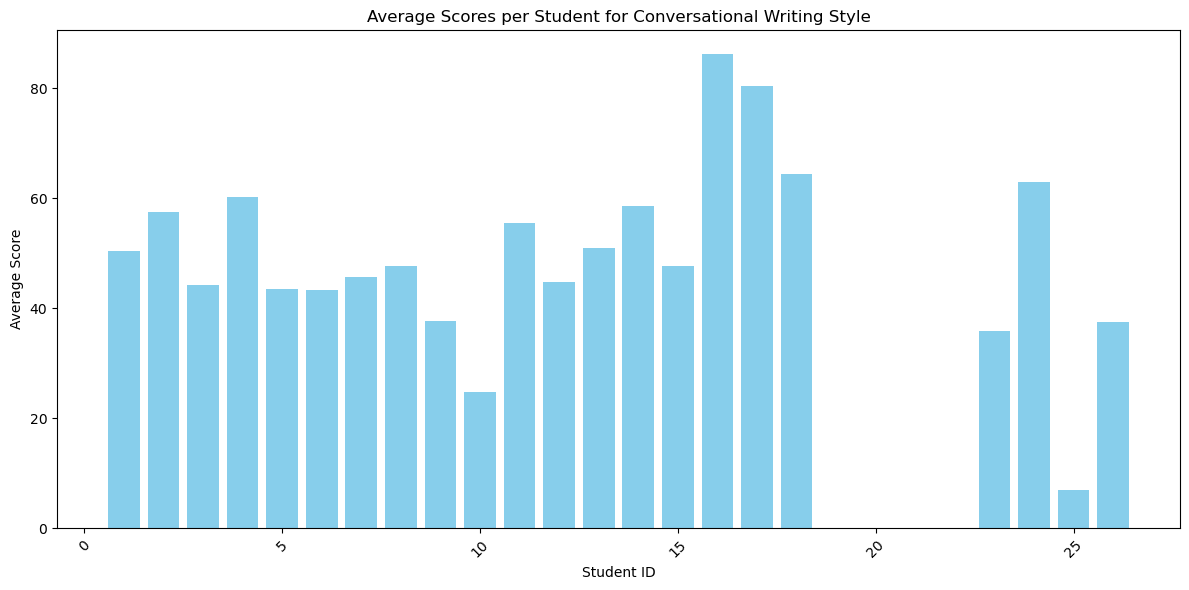

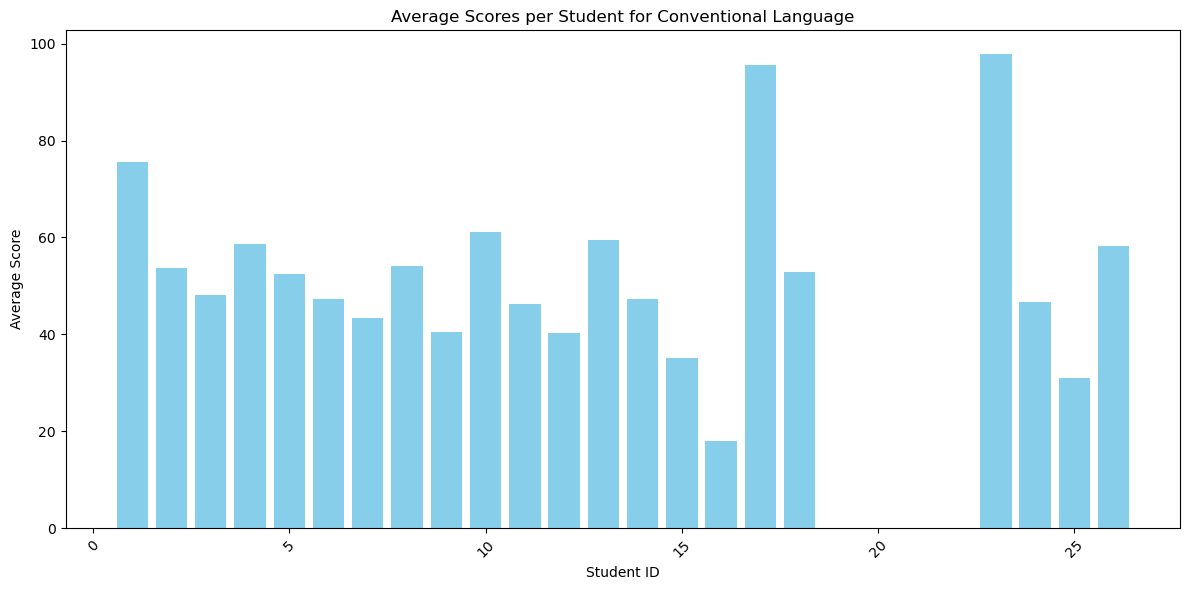

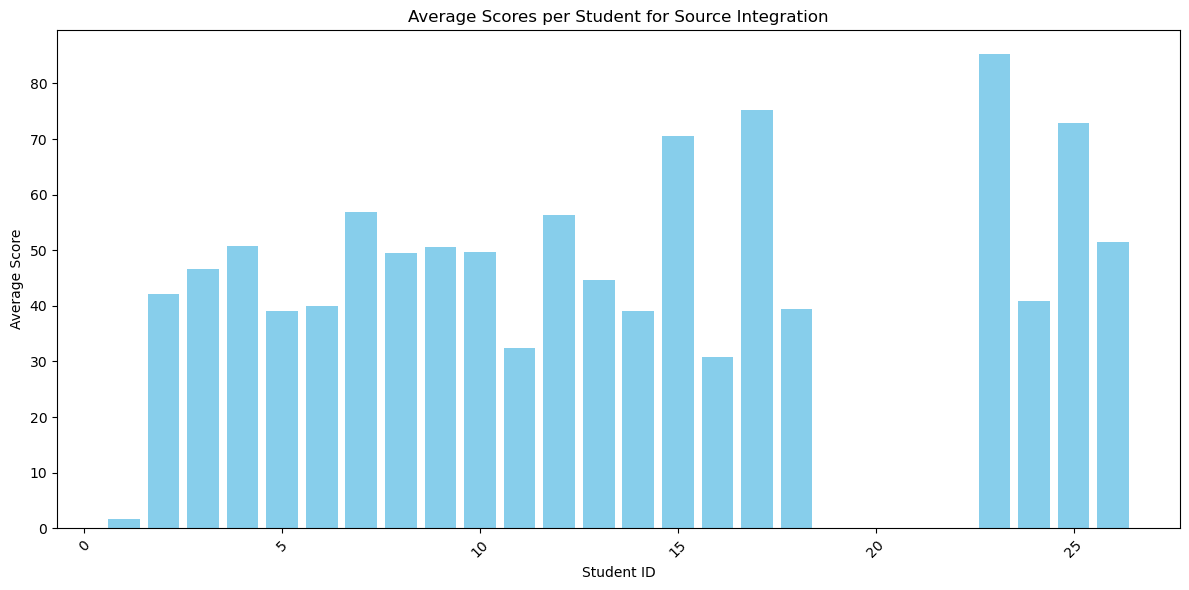

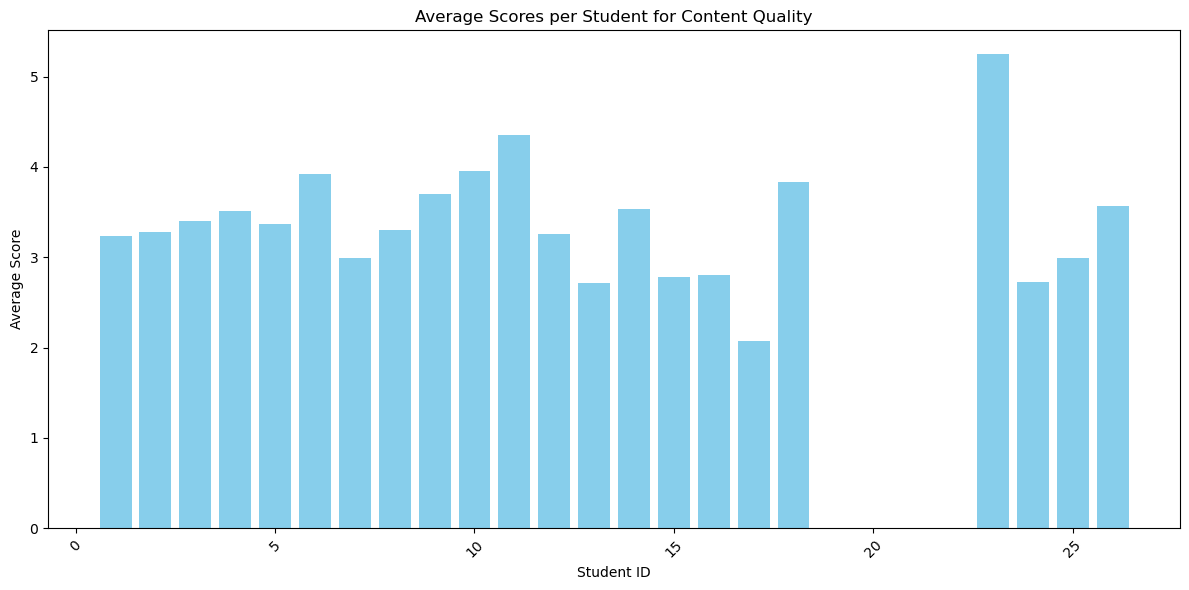

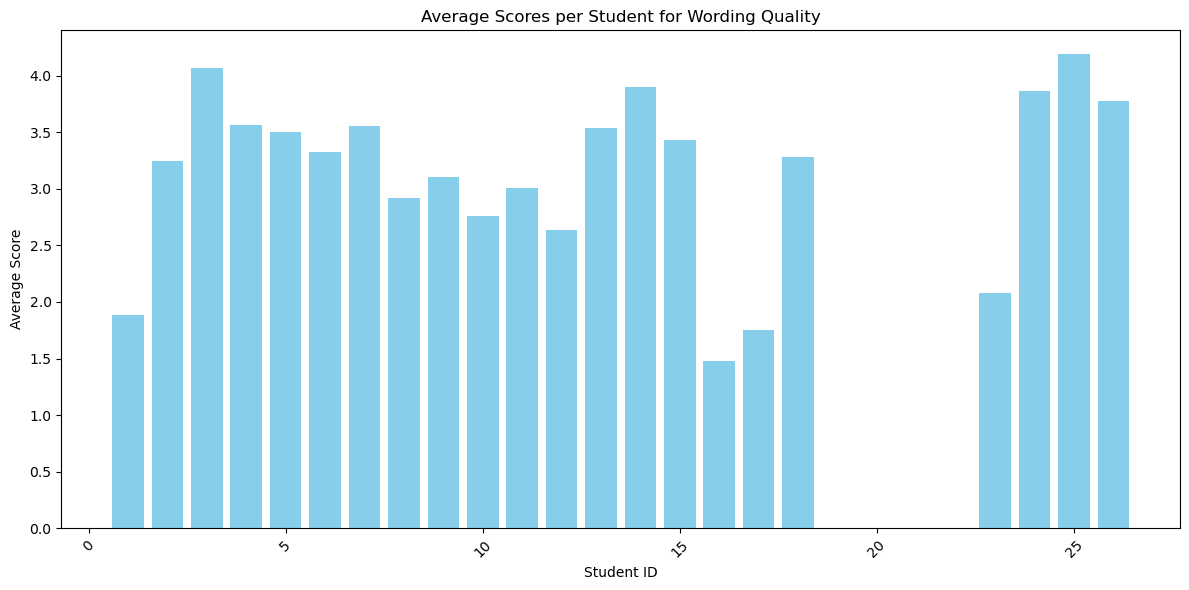

In [73]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 3
metrics_category_3 = metric_df[metric_df['category_id'] == 3]

# Iterate over each metric
for _, metric in metrics_category_3.iterrows():
    metric_id = metric['id']
    metric_name = metric['name']
    
    # Filter scores for the current metric
    scores_for_metric = essay_score_df[essay_score_df['metric_id'] == metric_id]
    
    # Merge with essay_df to get student_id
    scores_with_students = pd.merge(scores_for_metric, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')
    
    # Calculate average score for each student
    average_scores_per_student = scores_with_students.groupby('student_id')['score'].mean().reset_index()
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.bar(average_scores_per_student['student_id'], average_scores_per_student['score'], color='skyblue')
    plt.xlabel('Student ID')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores per Student for {metric_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

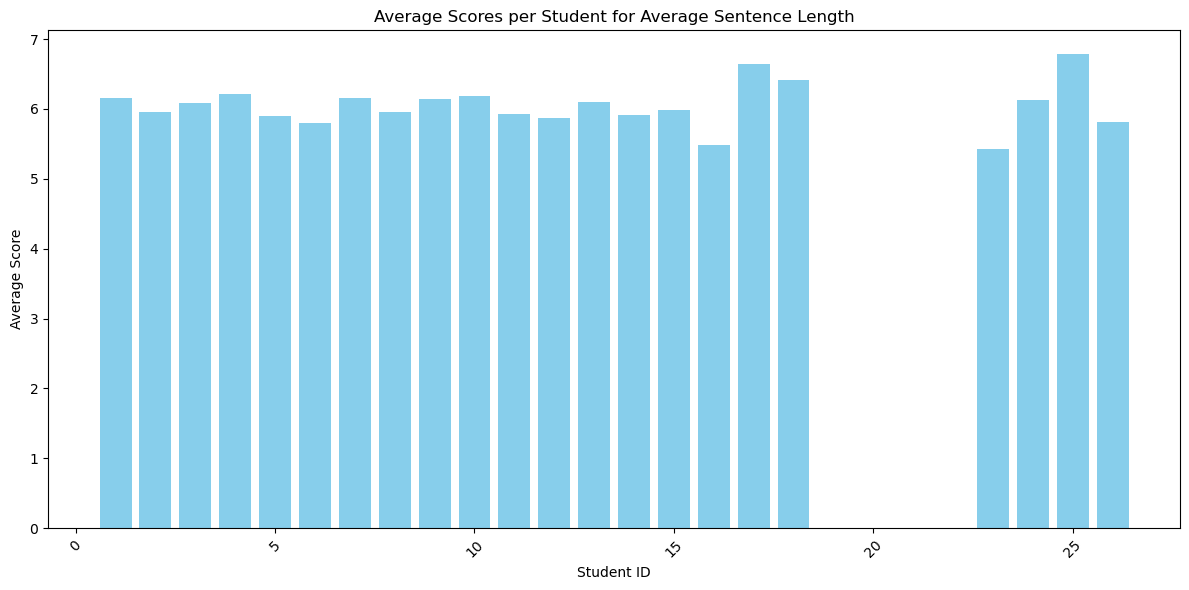

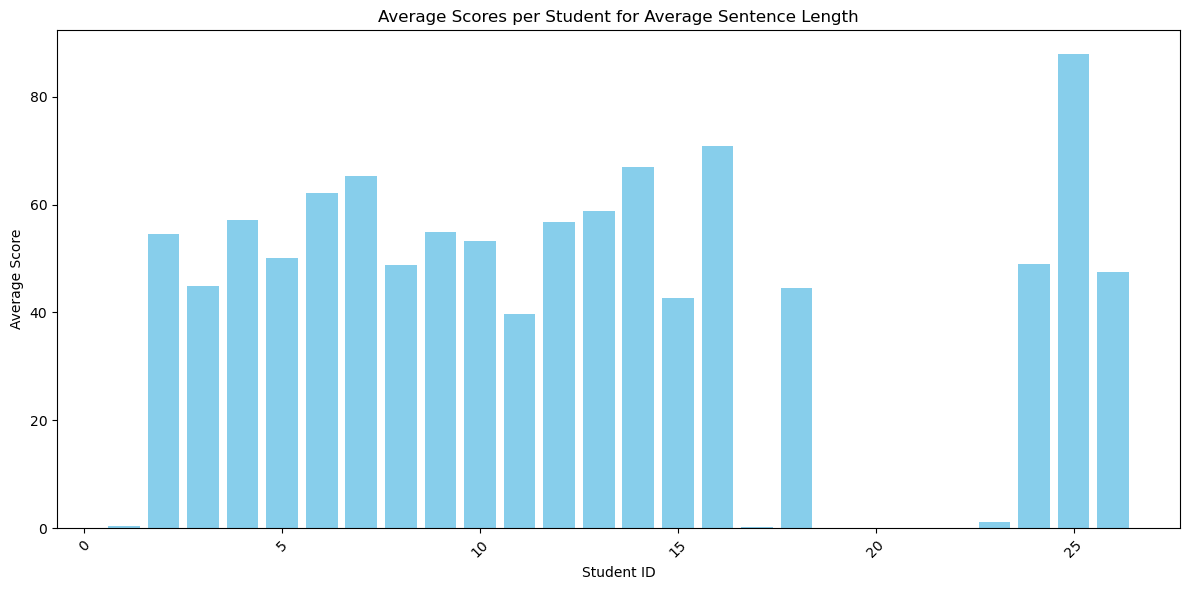

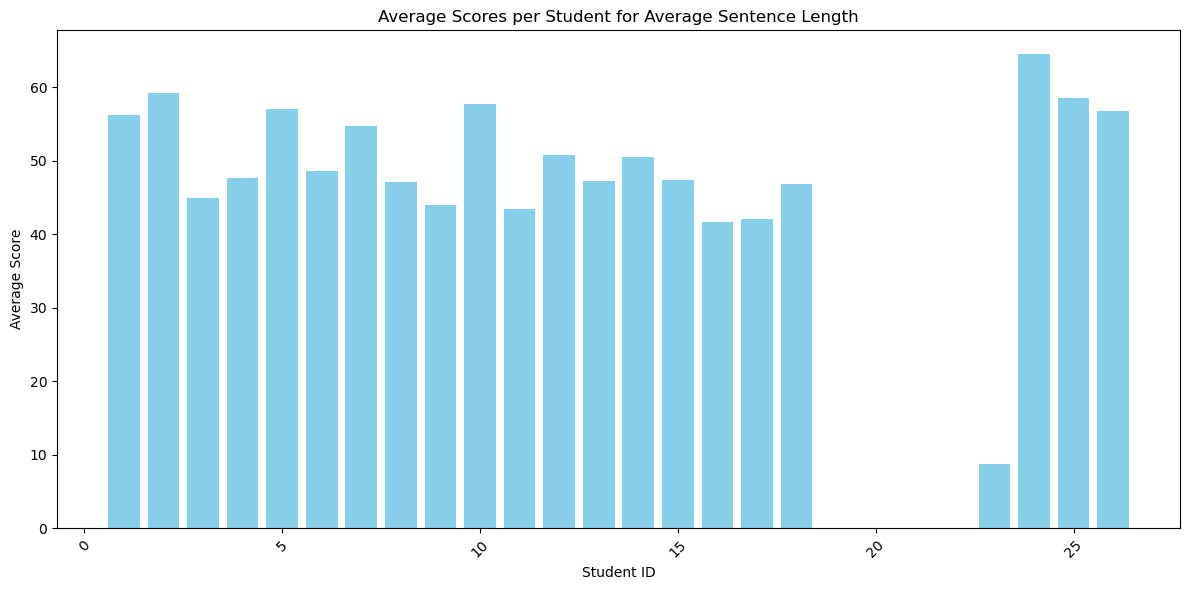

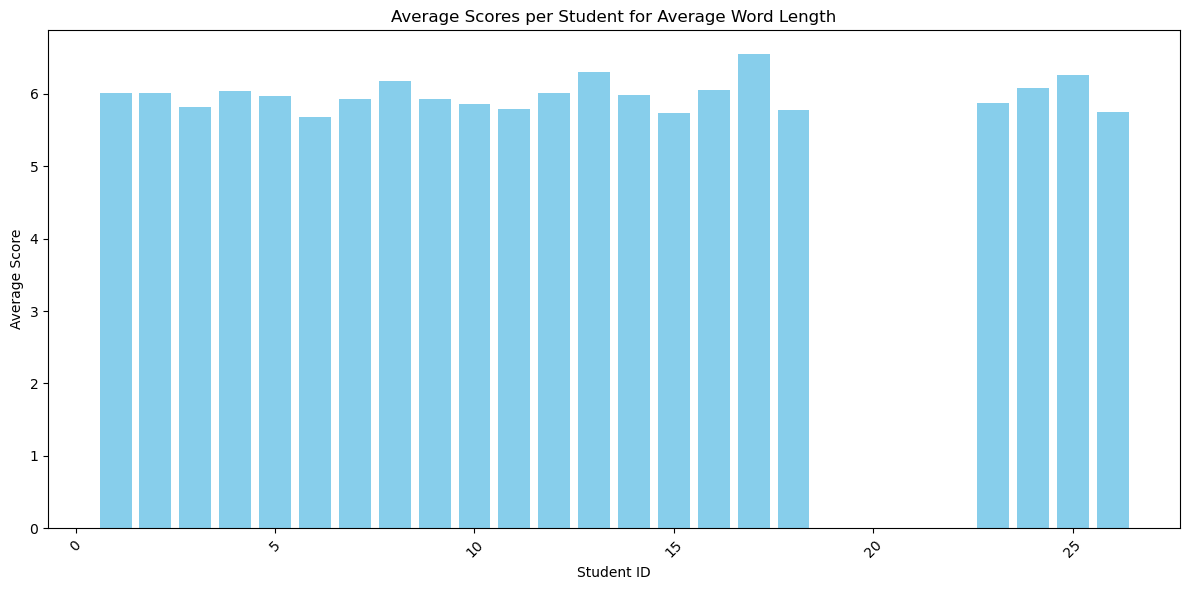

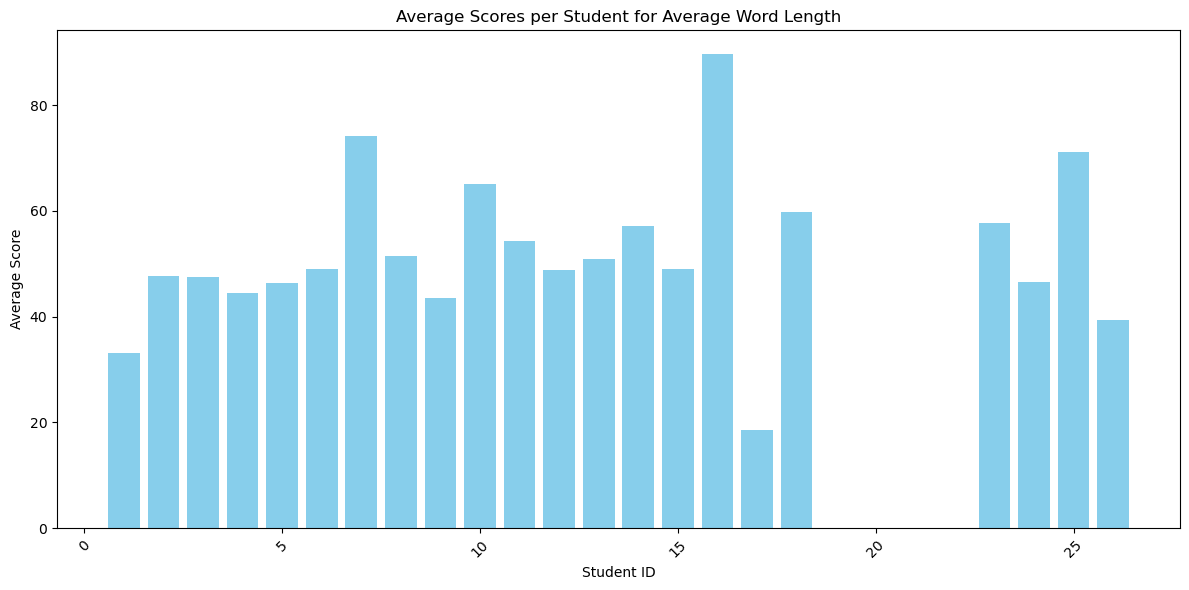

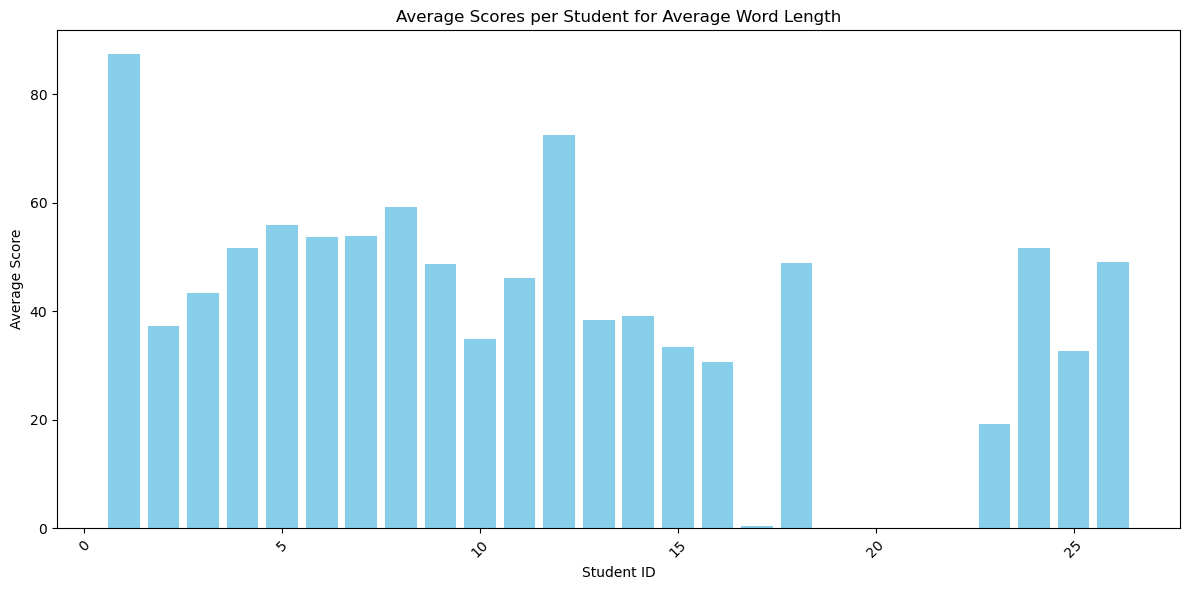

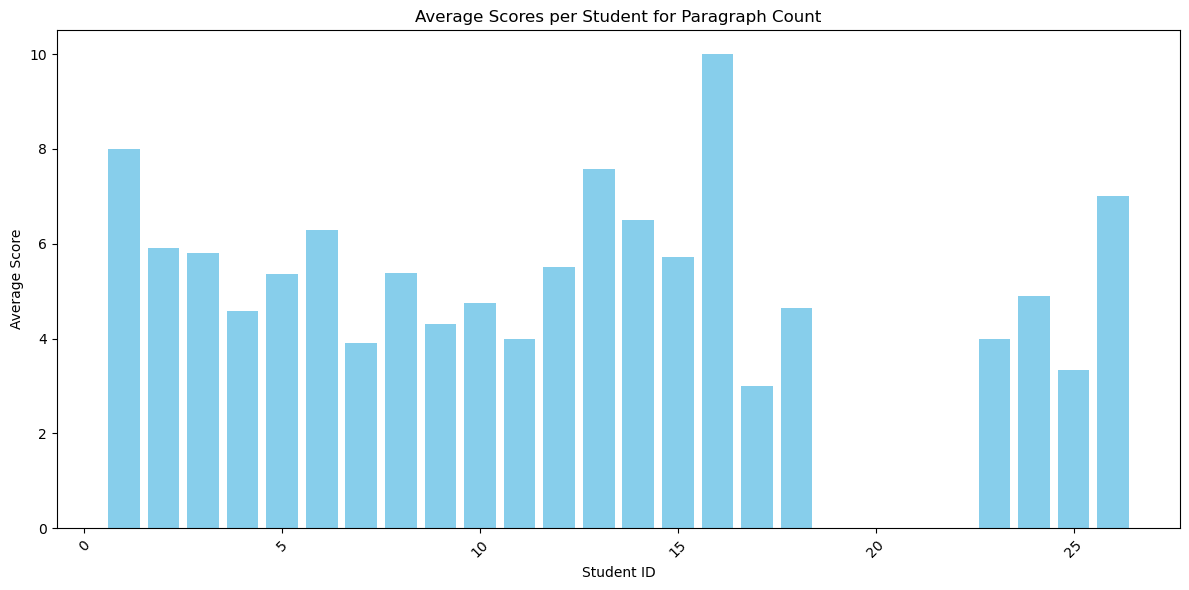

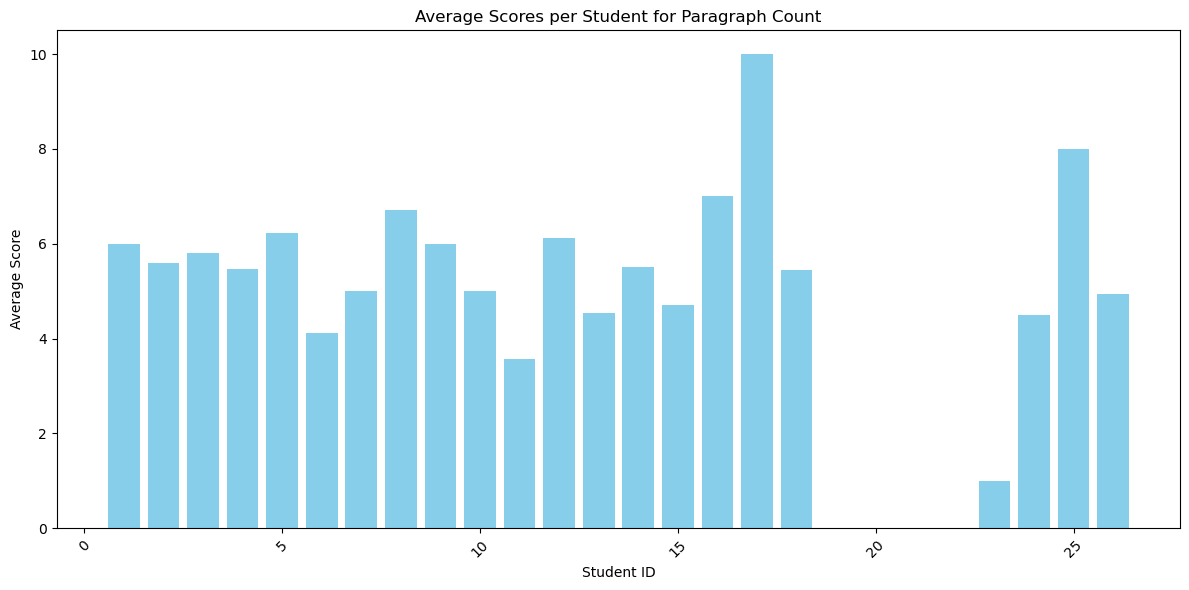

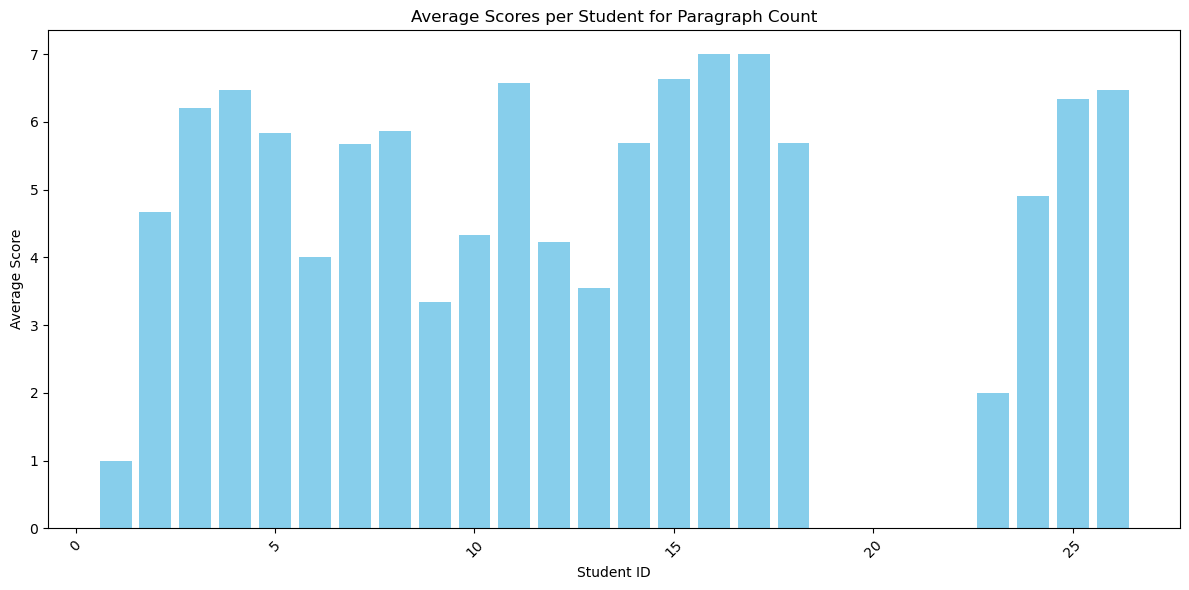

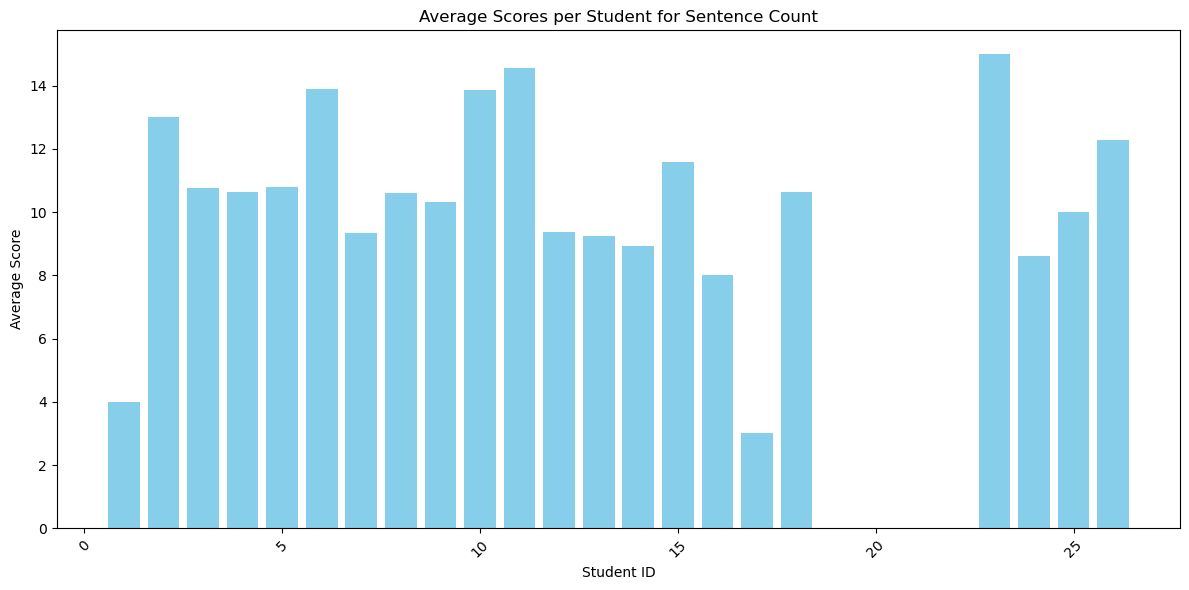

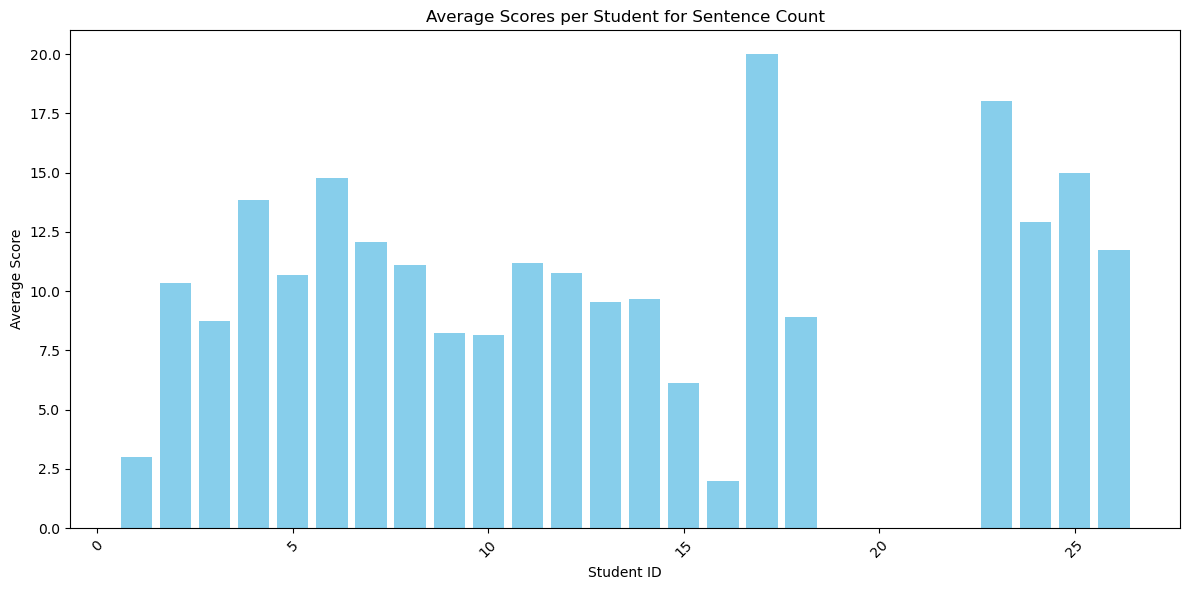

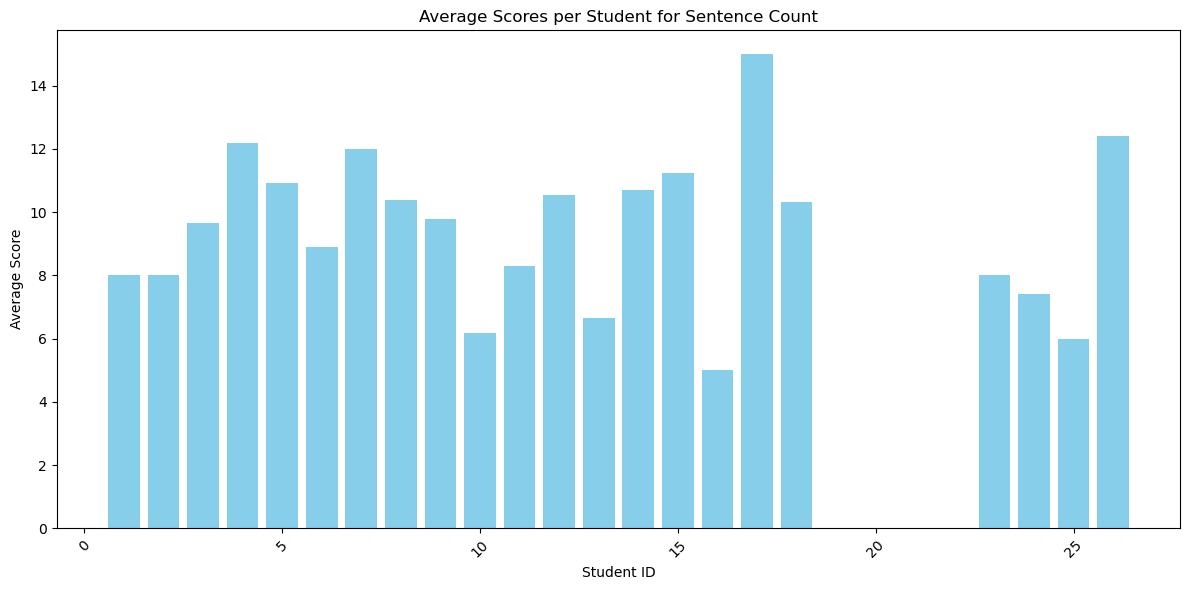

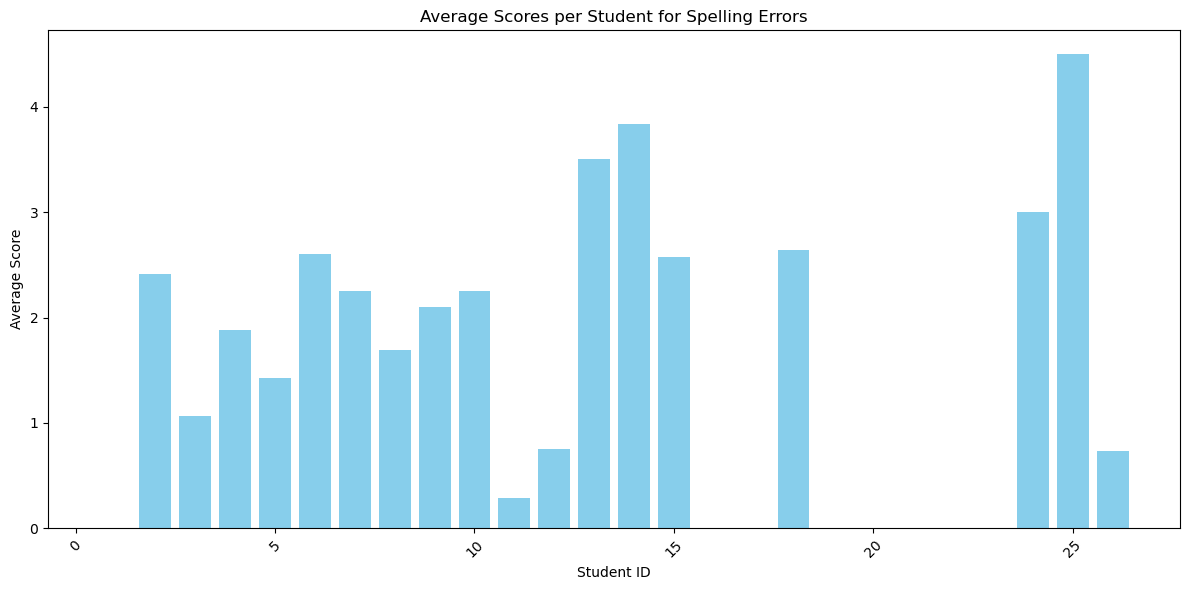

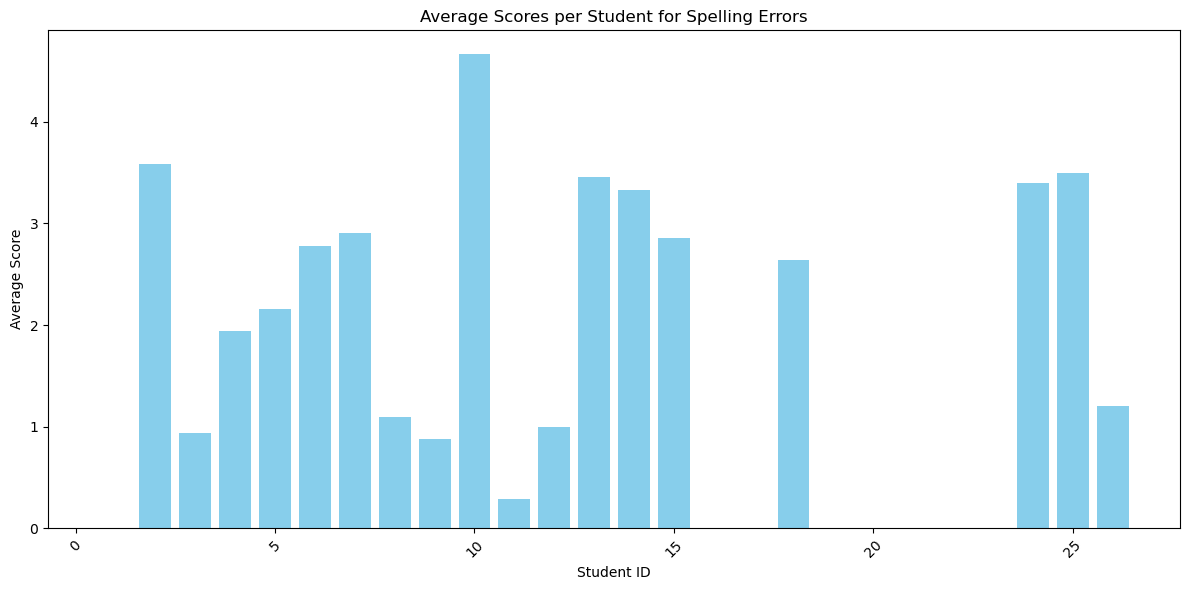

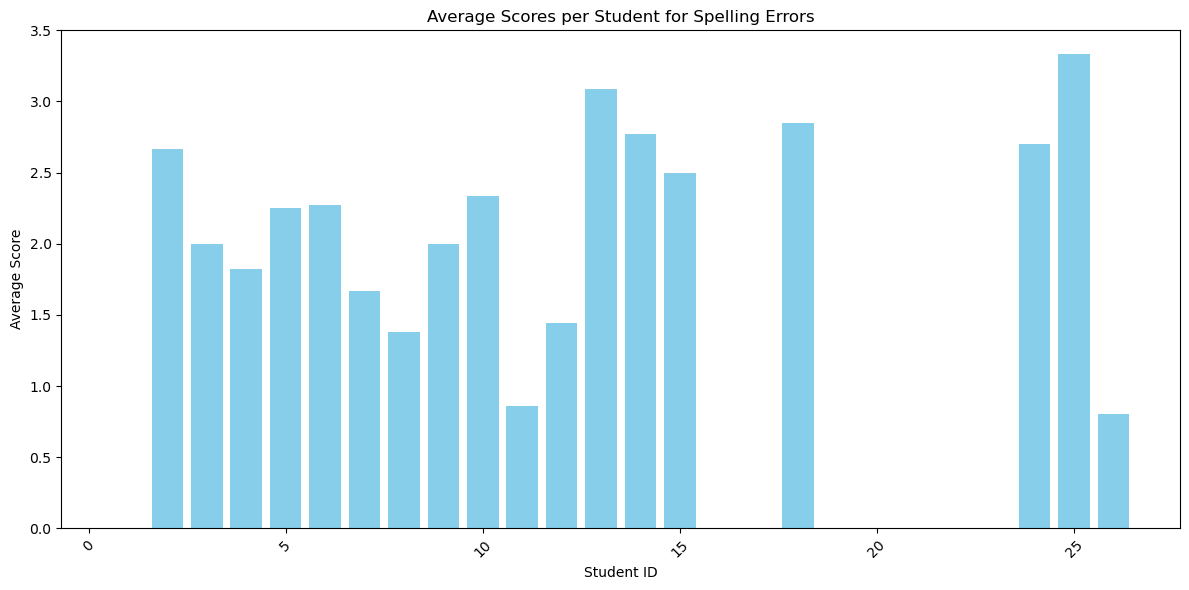

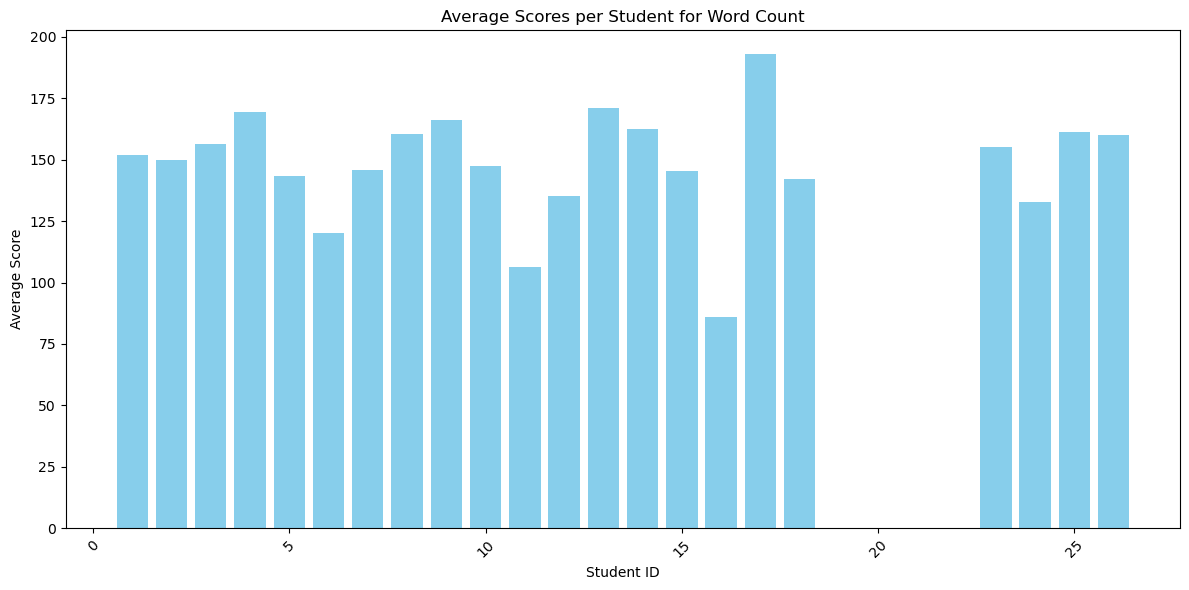

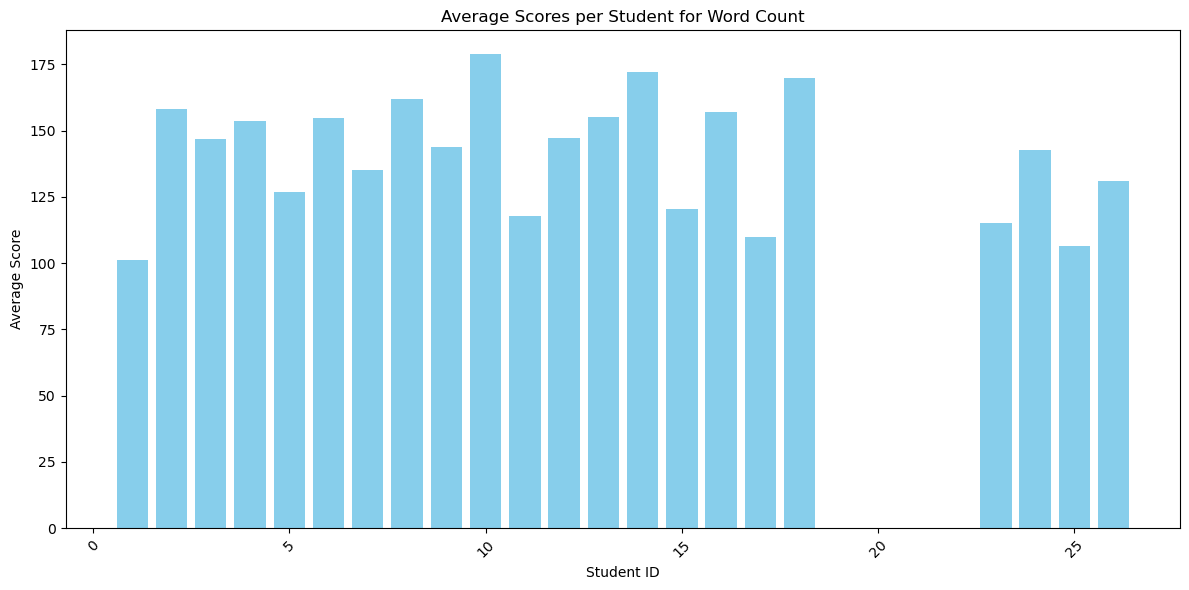

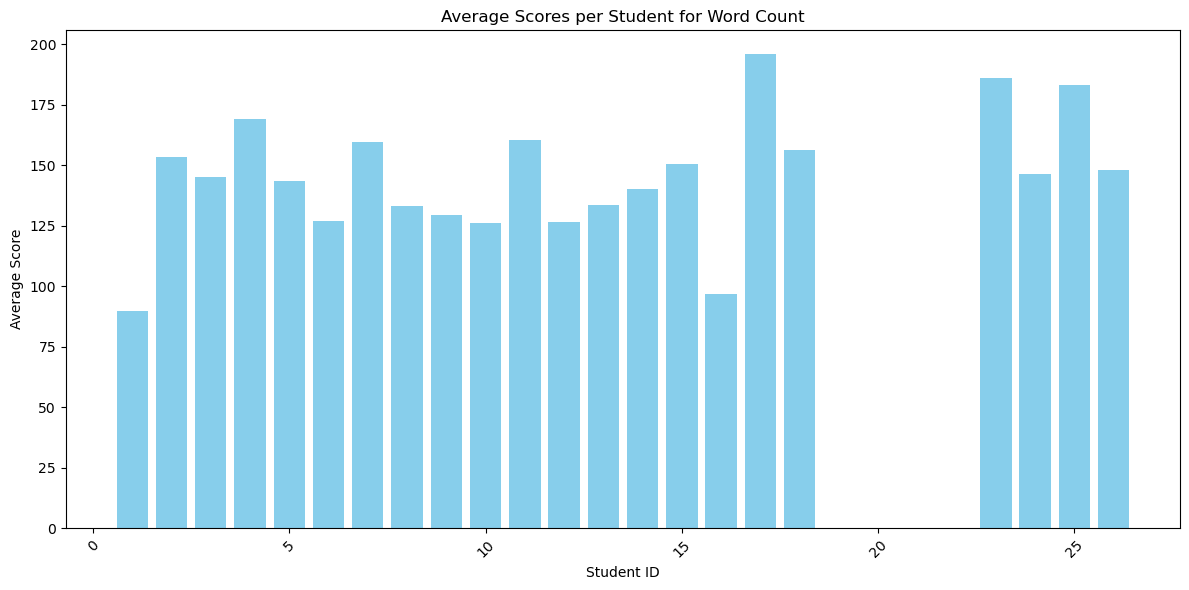

In [74]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 2
metrics_category_2 = metric_df[metric_df['category_id'] == 2]

# Iterate over each metric
for _, metric in metrics_category_2.iterrows():
    metric_id = metric['id']
    metric_name = metric['name']
    
    # Filter scores for the current metric
    scores_for_metric = essay_score_df[essay_score_df['metric_id'] == metric_id]
    
    # Merge with essay_df to get student_id
    scores_with_students = pd.merge(scores_for_metric, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')
    
    # Calculate average score for each student
    average_scores_per_student = scores_with_students.groupby('student_id')['score'].mean().reset_index()
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.bar(average_scores_per_student['student_id'], average_scores_per_student['score'], color='skyblue')
    plt.xlabel('Student ID')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores per Student for {metric_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

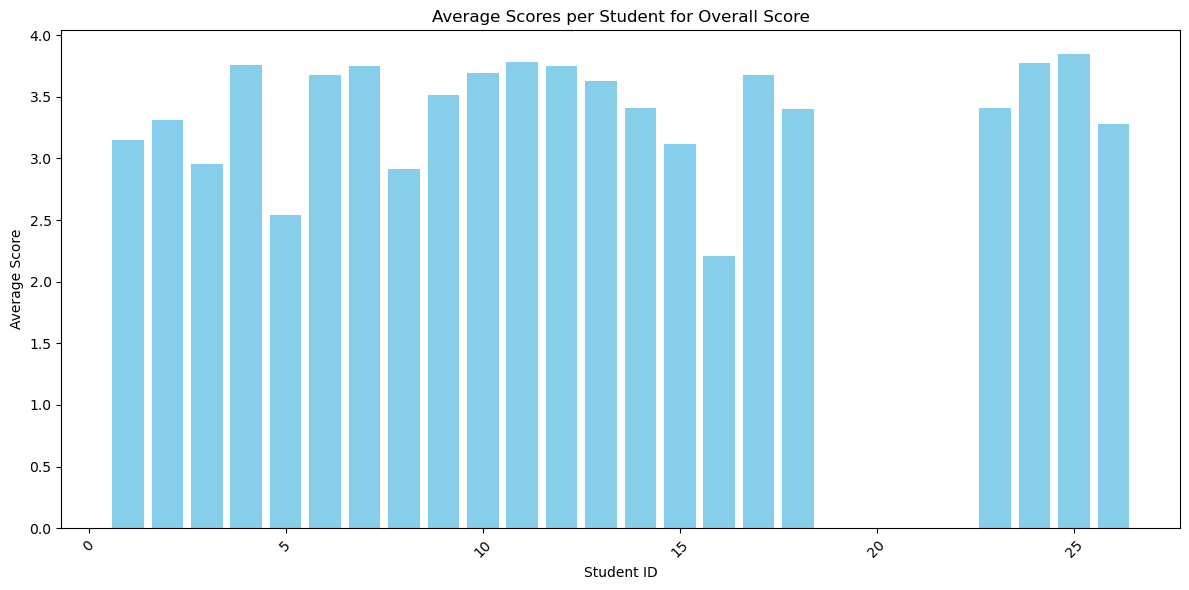

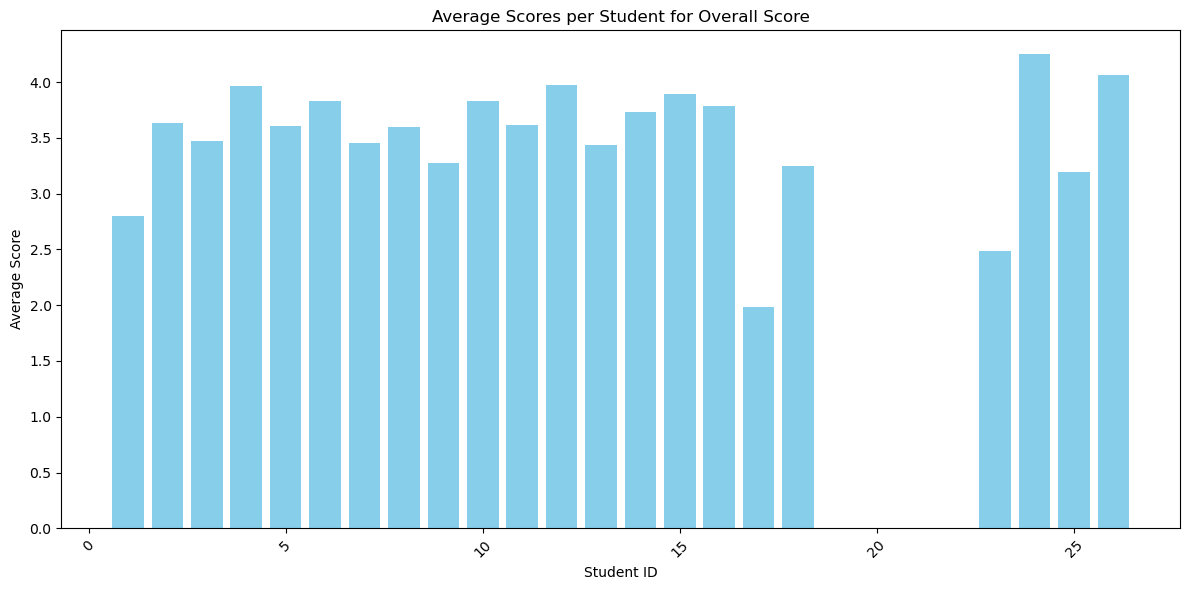

In [75]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 1
metrics_category_1 = metric_df[metric_df['category_id'] == 1]

# Iterate over each metric
for _, metric in metrics_category_1.iterrows():
    metric_id = metric['id']
    metric_name = metric['name']
    
    # Filter scores for the current metric
    scores_for_metric = essay_score_df[essay_score_df['metric_id'] == metric_id]
    
    # Merge with essay_df to get student_id
    scores_with_students = pd.merge(scores_for_metric, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')
    
    # Calculate average score for each student
    average_scores_per_student = scores_with_students.groupby('student_id')['score'].mean().reset_index()
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.bar(average_scores_per_student['student_id'], average_scores_per_student['score'], color='skyblue')
    plt.xlabel('Student ID')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores per Student for {metric_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

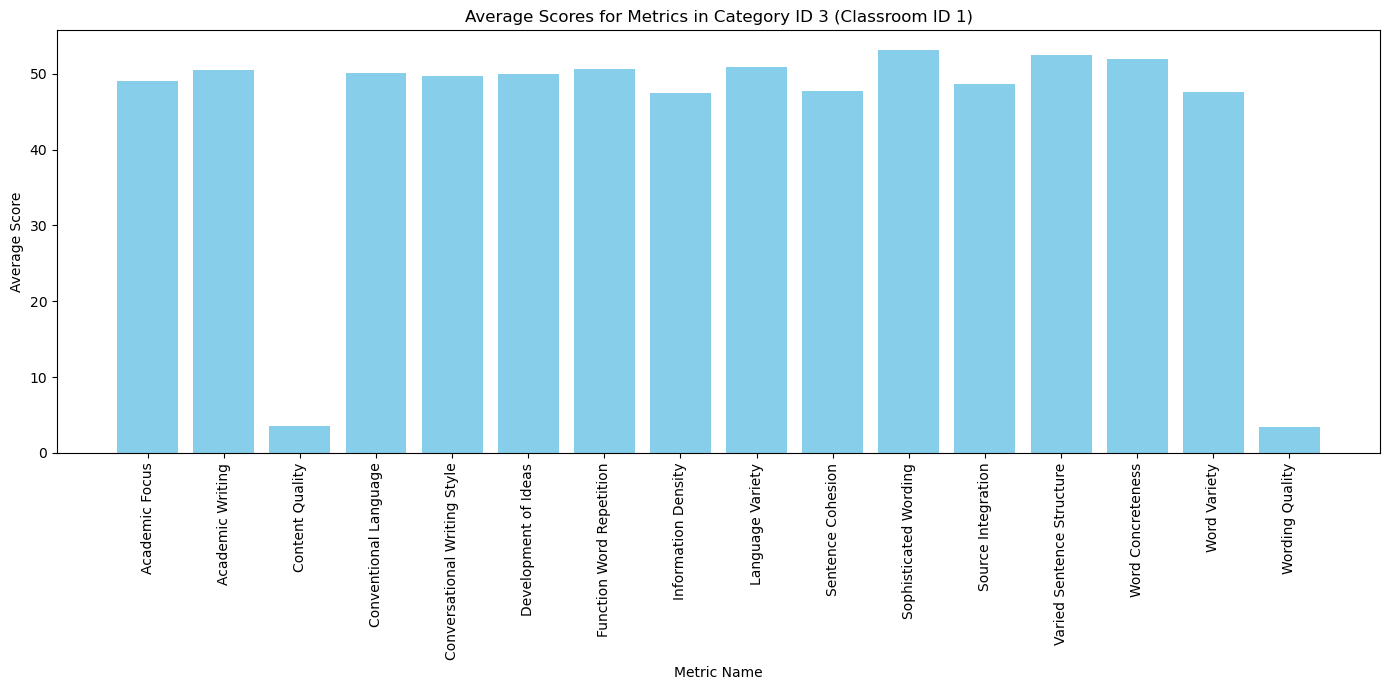

In [76]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 3
metrics_category_3 = metric_df[metric_df['category_id'] == 3]['id']

# Filter essays for classroom_id 1
essays_classroom_1 = essay_df[essay_df['classroom_id'] == 1]

# Filter scores for these metrics and classroom
scores_classroom_1 = essay_score_df[
    (essay_score_df['metric_id'].isin(metrics_category_3)) &
    (essay_score_df['essay_id'].isin(essays_classroom_1['id']))
]

# Merge with metric_df to get metric names
scores_with_metrics = pd.merge(scores_classroom_1, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

# Calculate average score for each metric
average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.title('Average Scores for Metrics in Category ID 3 (Classroom ID 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

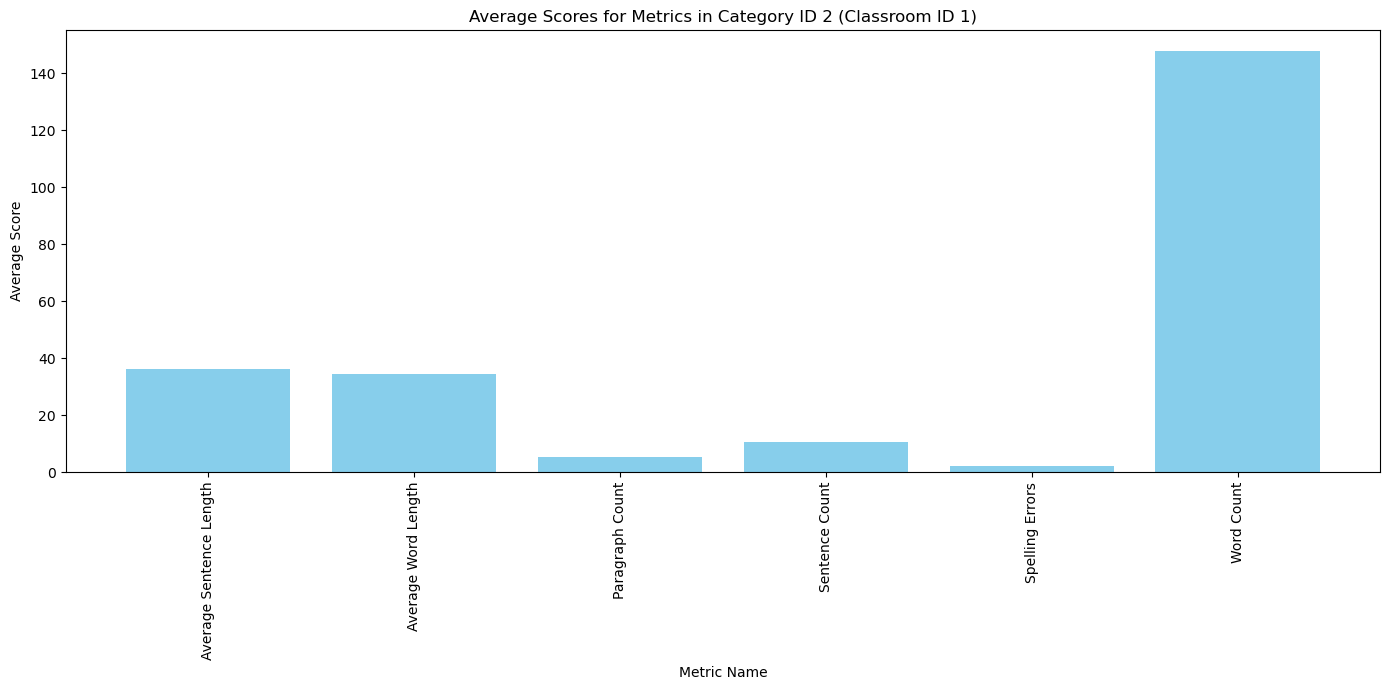

In [77]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 2
metrics_category_2 = metric_df[metric_df['category_id'] == 2]['id']

# Filter essays for classroom_id 1
essays_classroom_1 = essay_df[essay_df['classroom_id'] == 1]

# Filter scores for these metrics and classroom
scores_classroom_1 = essay_score_df[
    (essay_score_df['metric_id'].isin(metrics_category_2)) &
    (essay_score_df['essay_id'].isin(essays_classroom_1['id']))
]

# Merge with metric_df to get metric names
scores_with_metrics = pd.merge(scores_classroom_1, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

# Calculate average score for each metric
average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.title('Average Scores for Metrics in Category ID 2 (Classroom ID 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

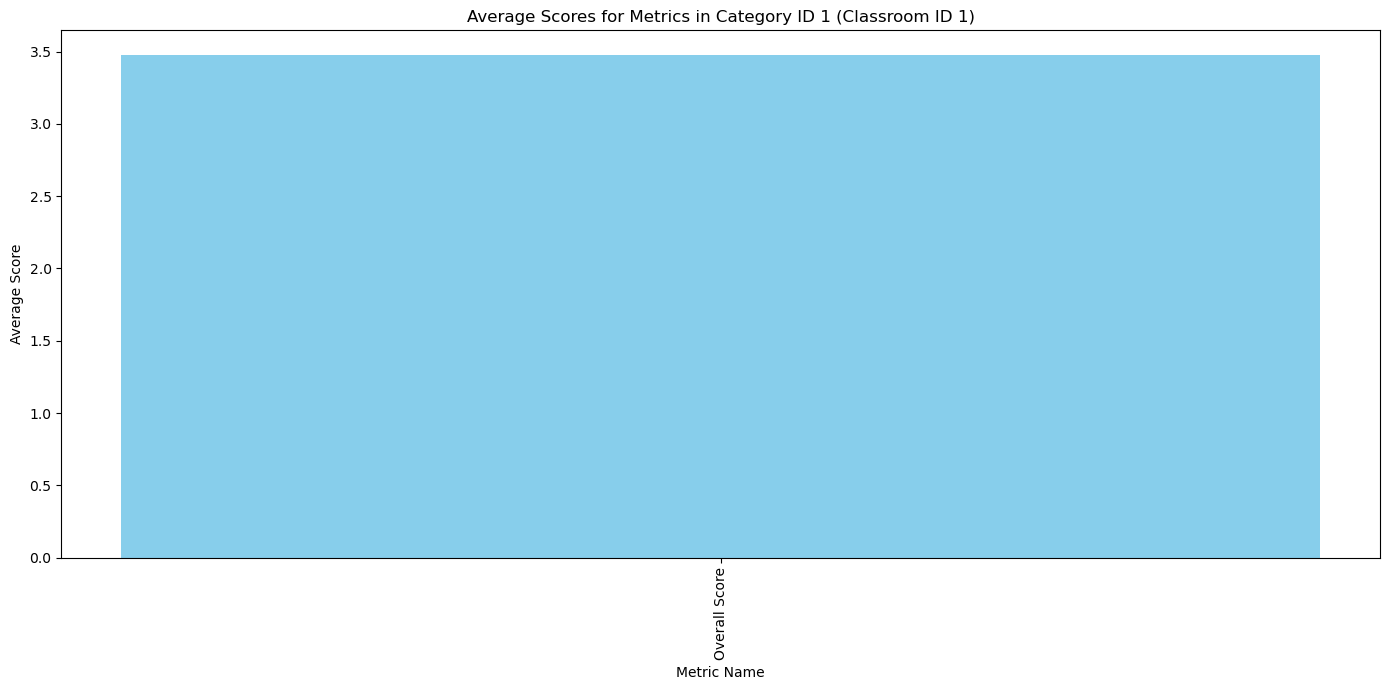

In [78]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 1
metrics_category_1 = metric_df[metric_df['category_id'] == 1]['id']

# Filter essays for classroom_id 1
essays_classroom_1 = essay_df[essay_df['classroom_id'] == 1]

# Filter scores for these metrics and classroom
scores_classroom_1 = essay_score_df[
    (essay_score_df['metric_id'].isin(metrics_category_1)) &
    (essay_score_df['essay_id'].isin(essays_classroom_1['id']))
]

# Merge with metric_df to get metric names
scores_with_metrics = pd.merge(scores_classroom_1, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

# Calculate average score for each metric
average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.title('Average Scores for Metrics in Category ID 1 (Classroom ID 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

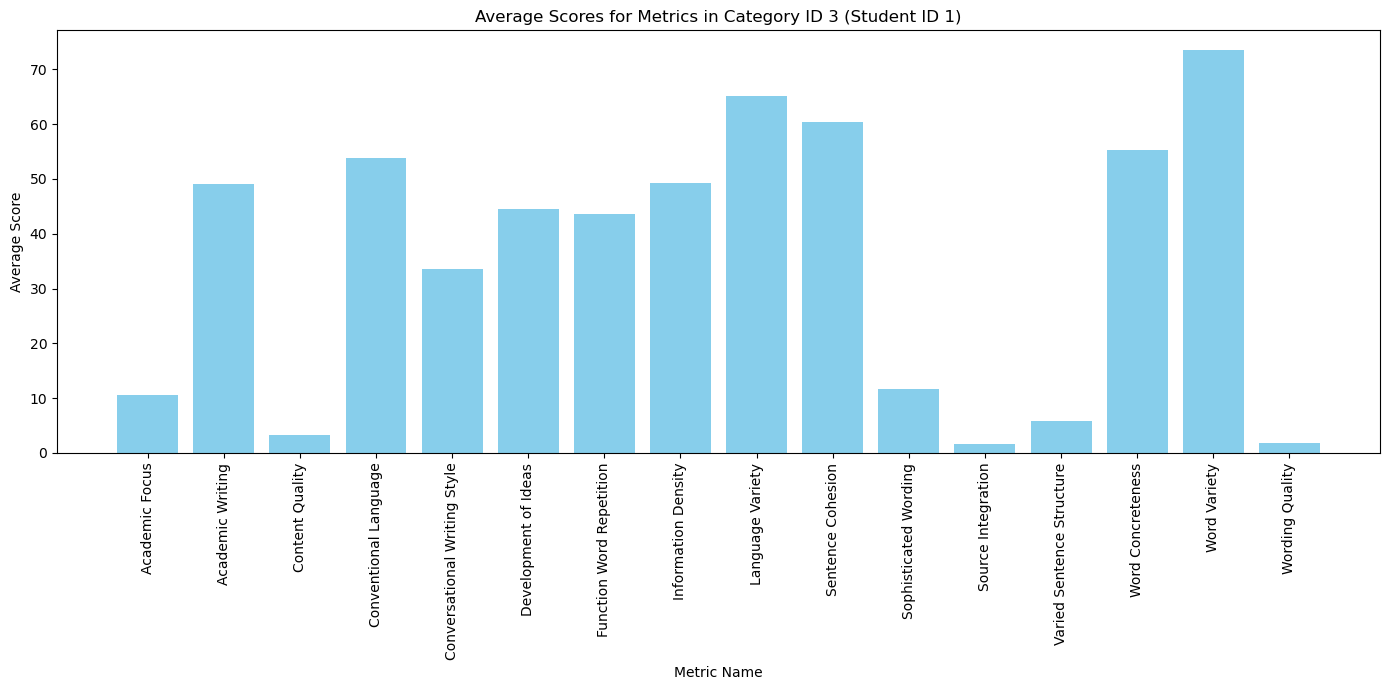

In [79]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 3
metrics_category_3 = metric_df[metric_df['category_id'] == 3]['id']

# Filter essays for student_id 1
essays_student_1 = essay_df[essay_df['student_id'] == 1]

# Filter scores for these metrics and student
scores_student_1 = essay_score_df[
    (essay_score_df['metric_id'].isin(metrics_category_3)) &
    (essay_score_df['essay_id'].isin(essays_student_1['id']))
]

# Merge with metric_df to get metric names
scores_with_metrics = pd.merge(scores_student_1, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

# Calculate average score for each metric
average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.title('Average Scores for Metrics in Category ID 3 (Student ID 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

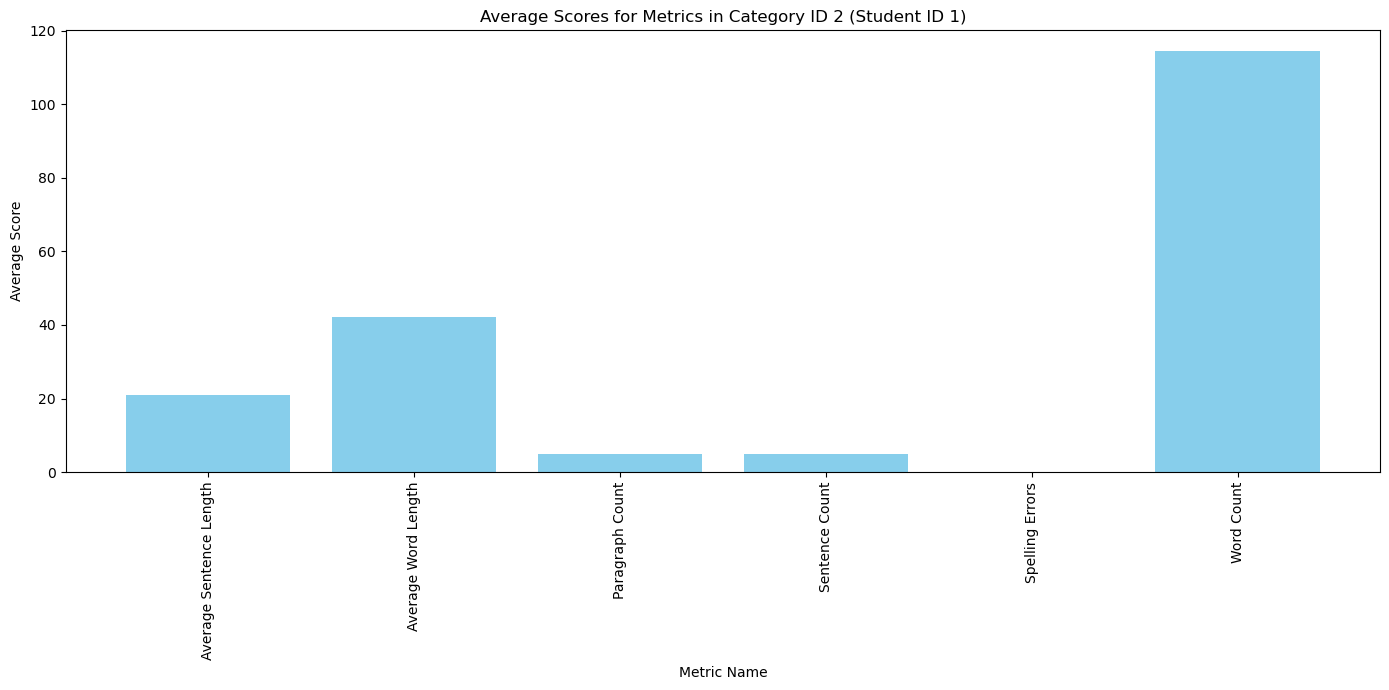

In [80]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 2
metrics_category_2 = metric_df[metric_df['category_id'] == 2]['id']

# Filter essays for student_id 1
essays_student_1 = essay_df[essay_df['student_id'] == 1]

# Filter scores for these metrics and student
scores_student_1 = essay_score_df[
    (essay_score_df['metric_id'].isin(metrics_category_2)) &
    (essay_score_df['essay_id'].isin(essays_student_1['id']))
]

# Merge with metric_df to get metric names
scores_with_metrics = pd.merge(scores_student_1, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

# Calculate average score for each metric
average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.title('Average Scores for Metrics in Category ID 2 (Student ID 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

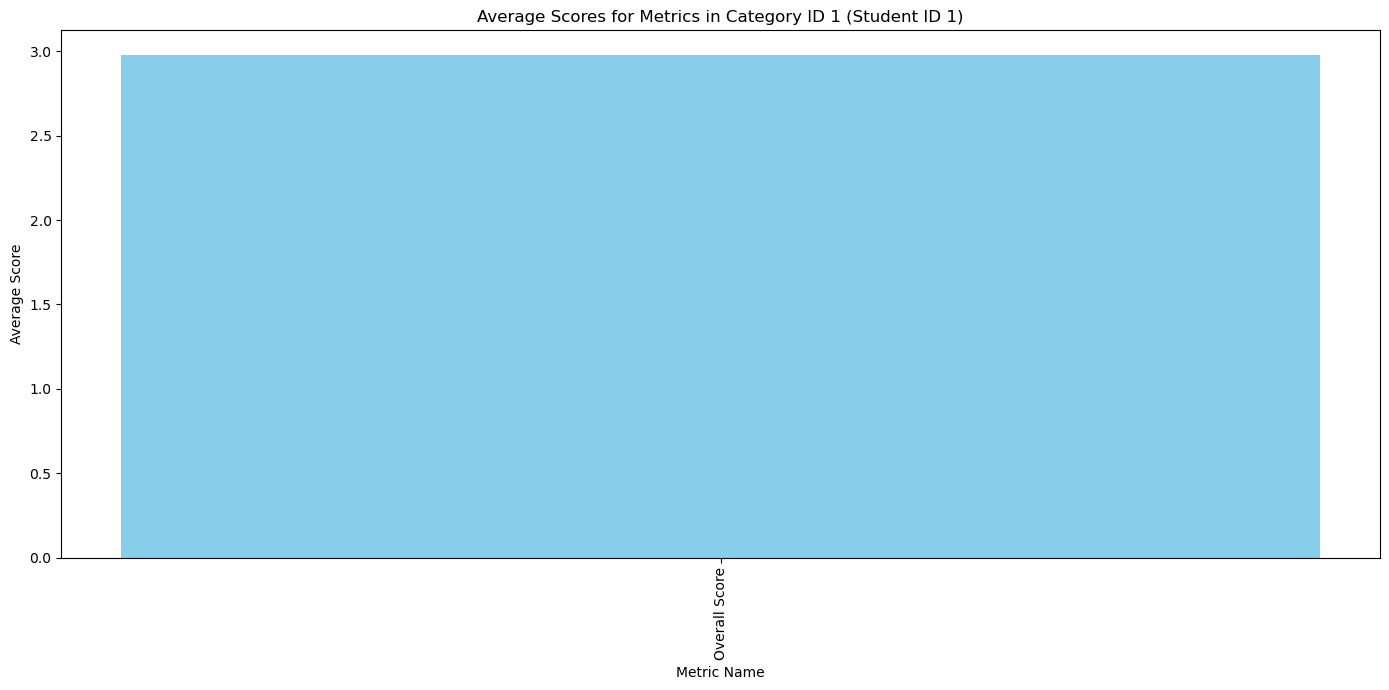

In [81]:
import matplotlib.pyplot as plt

# Filter metrics with category_id 1
metrics_category_1 = metric_df[metric_df['category_id'] == 1]['id']

# Filter essays for student_id 1
essays_student_1 = essay_df[essay_df['student_id'] == 1]

# Filter scores for these metrics and student
scores_student_1 = essay_score_df[
    (essay_score_df['metric_id'].isin(metrics_category_1)) &
    (essay_score_df['essay_id'].isin(essays_student_1['id']))
]

# Merge with metric_df to get metric names
scores_with_metrics = pd.merge(scores_student_1, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

# Calculate average score for each metric
average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.title('Average Scores for Metrics in Category ID 1 (Student ID 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Enter a category ID (1, 2, or 3): 3


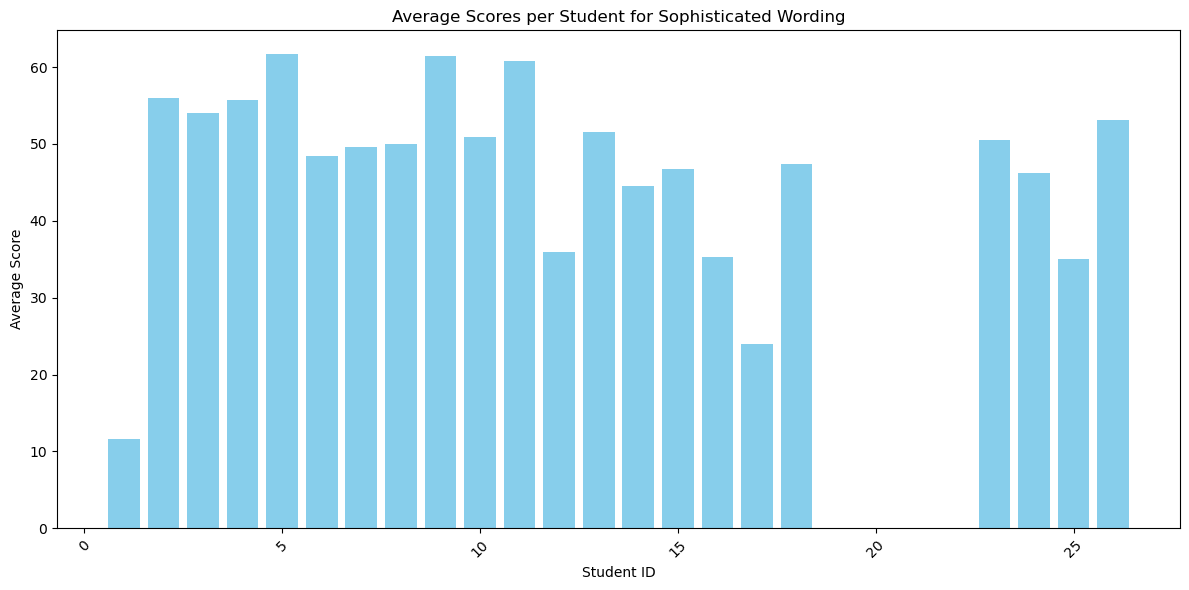

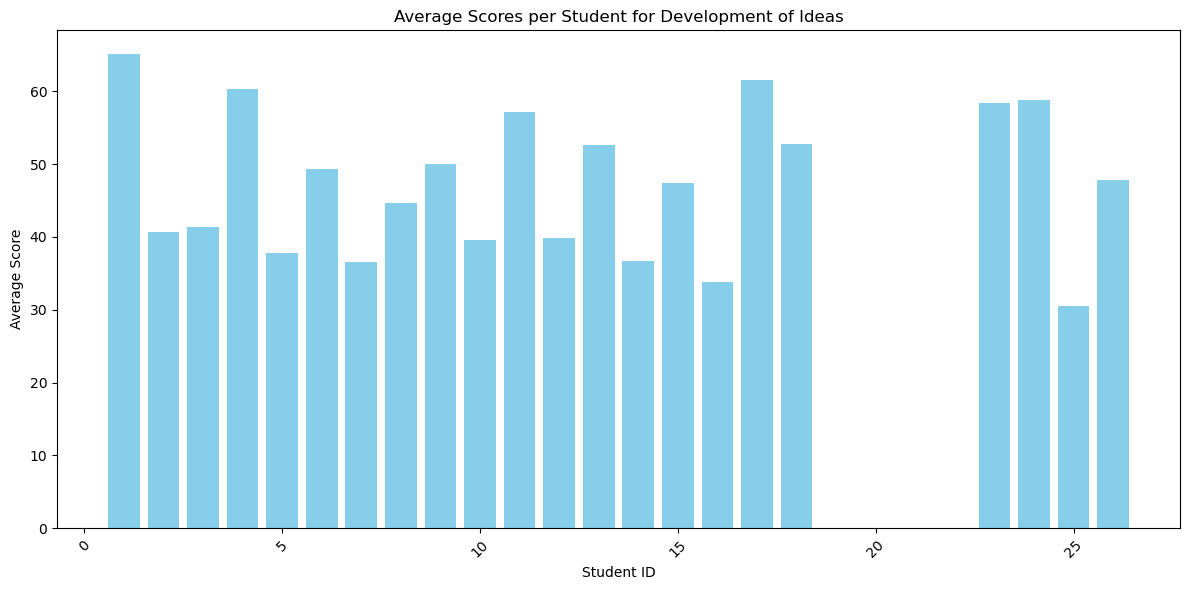

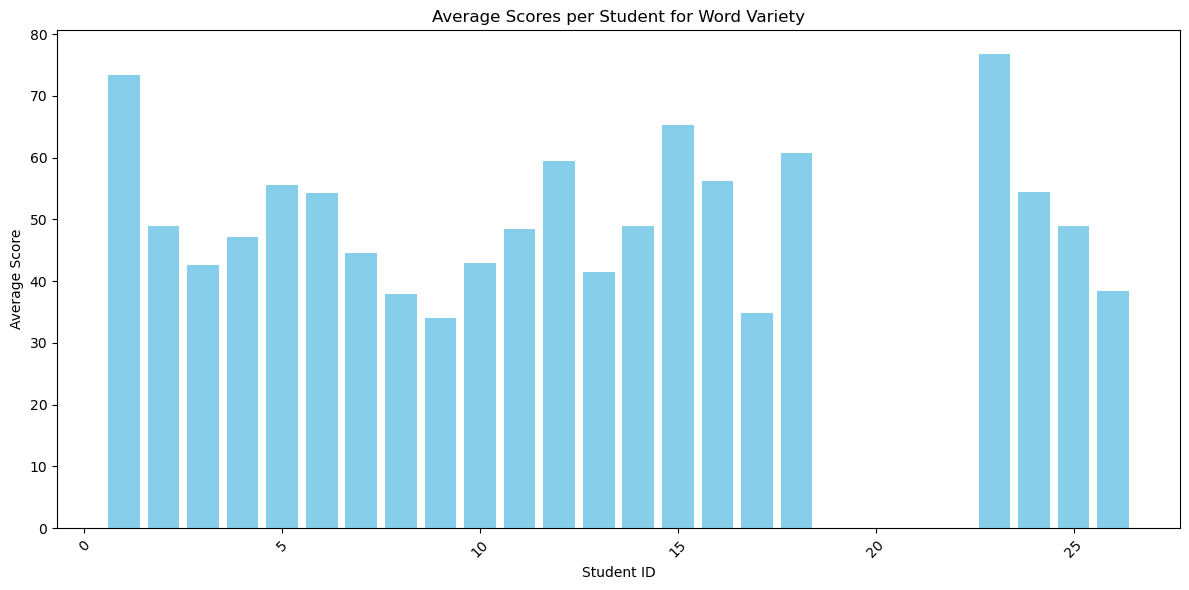

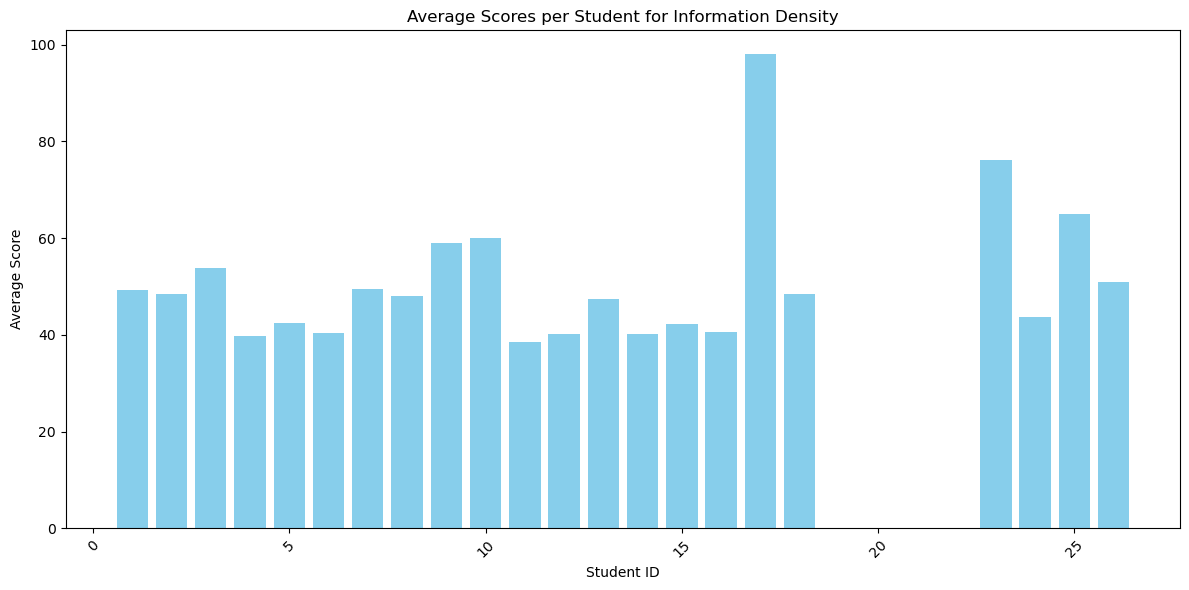

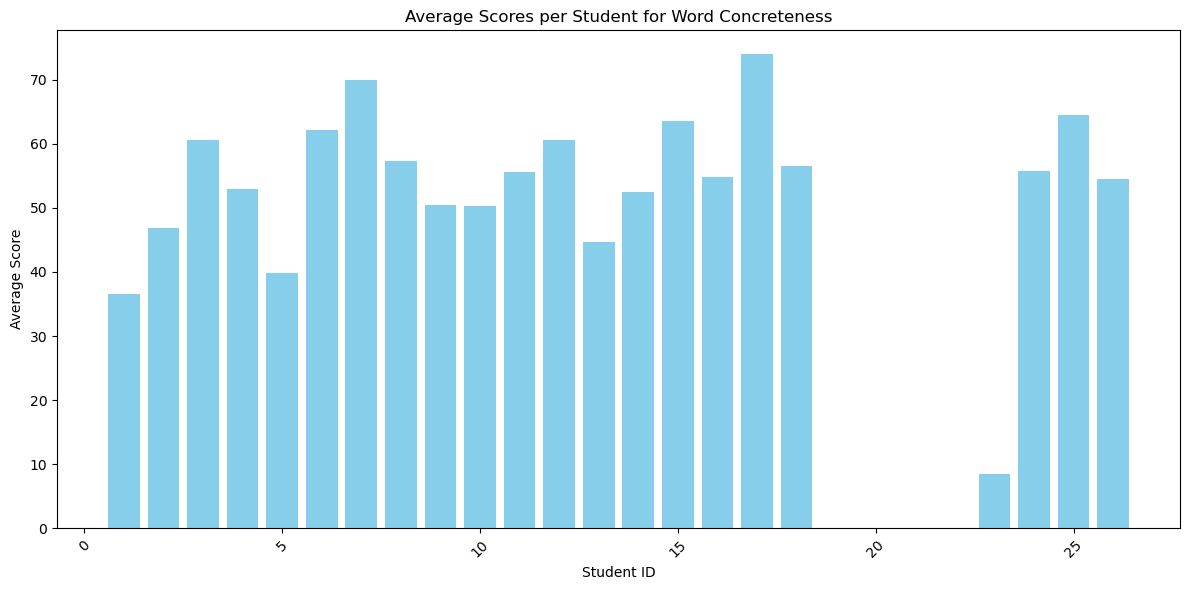

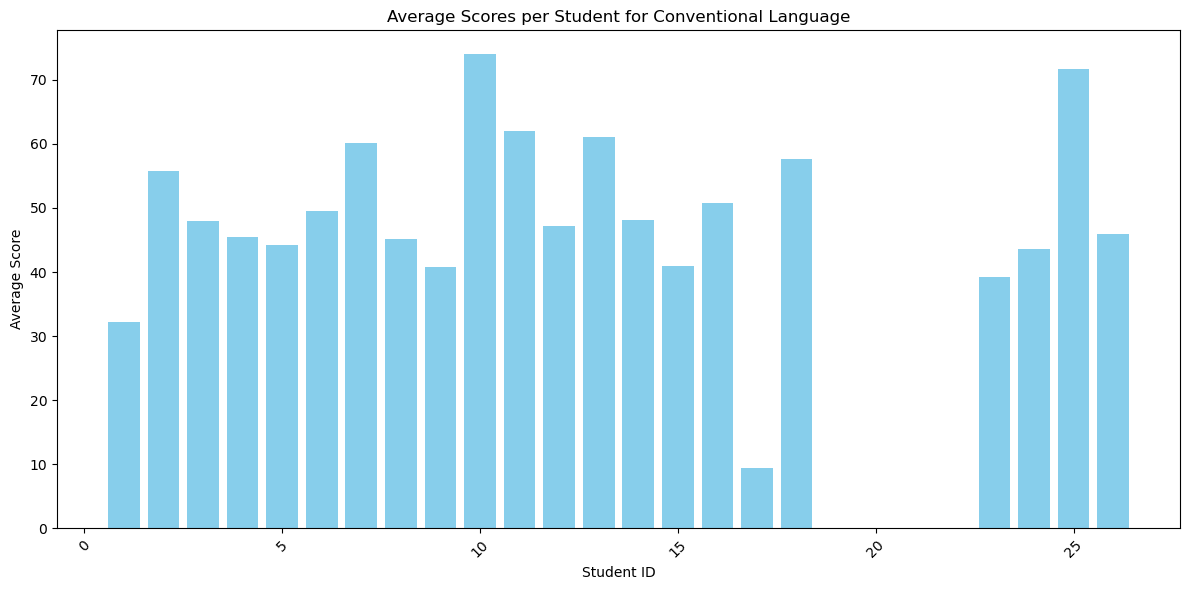

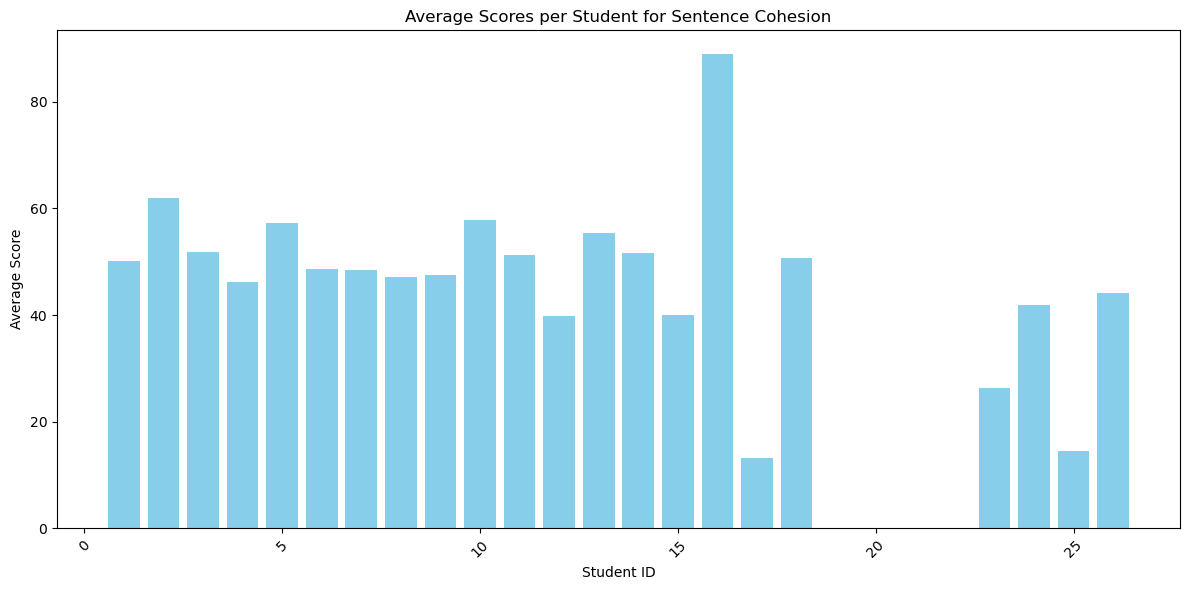

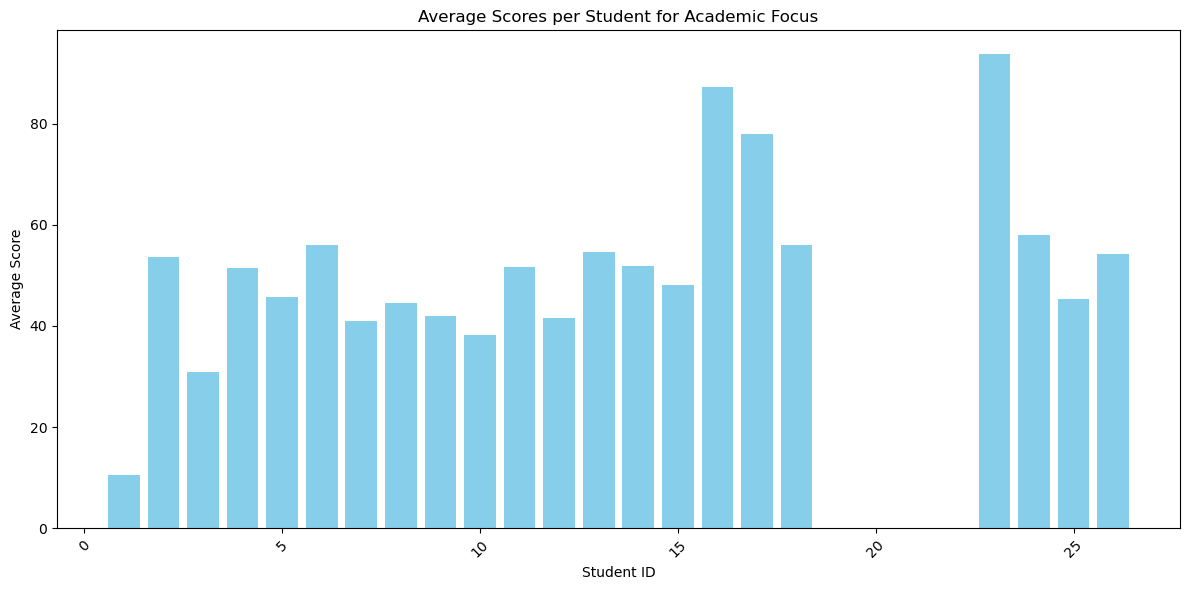

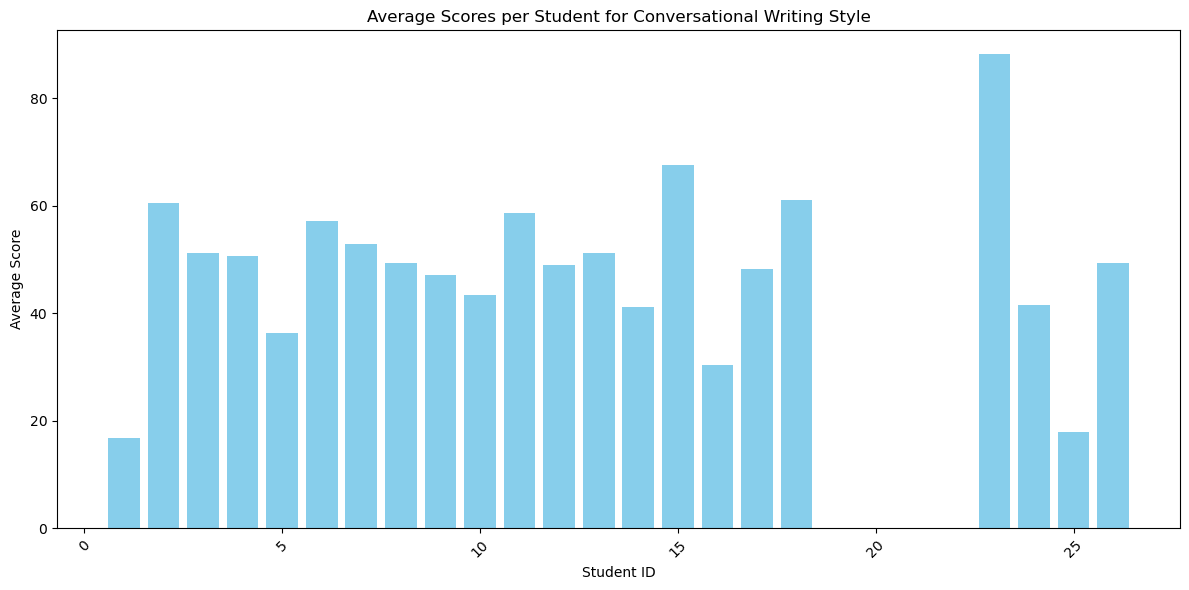

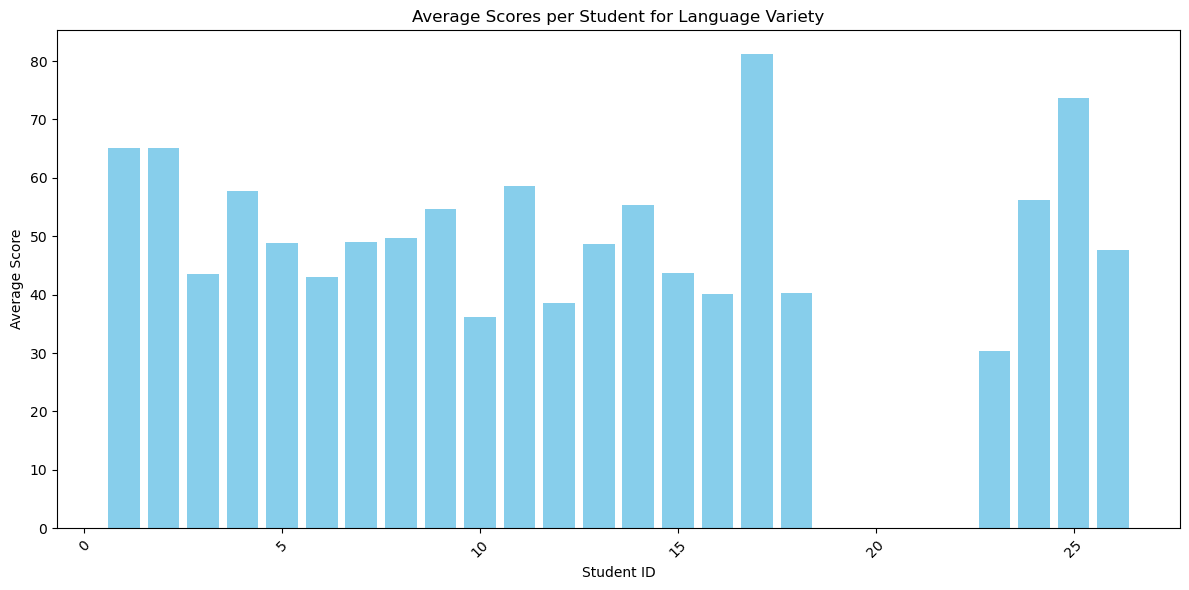

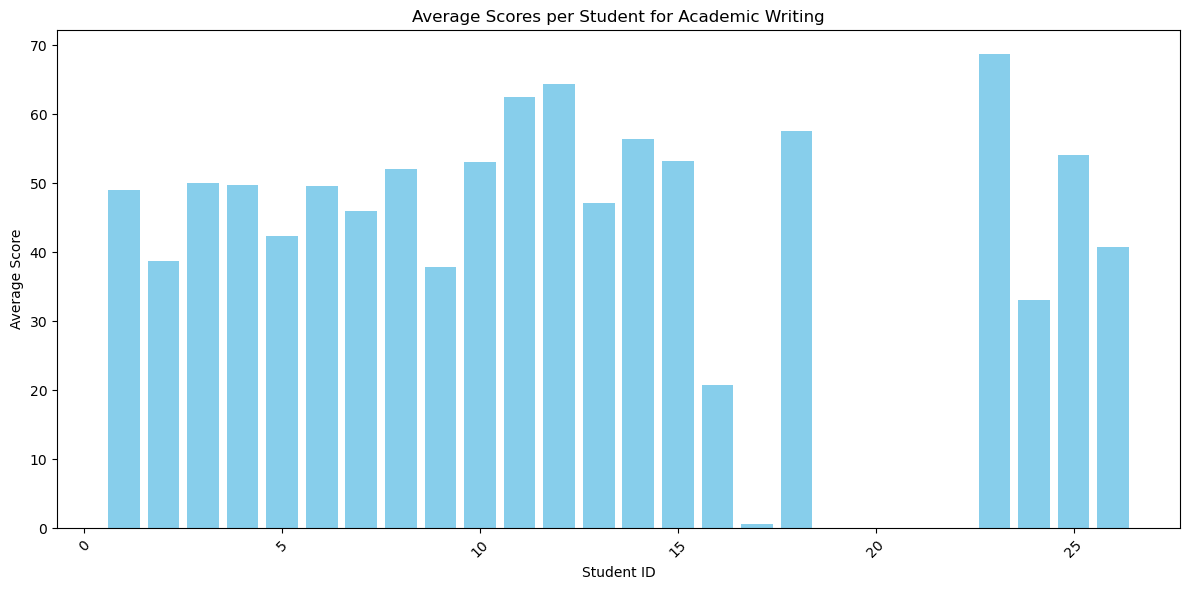

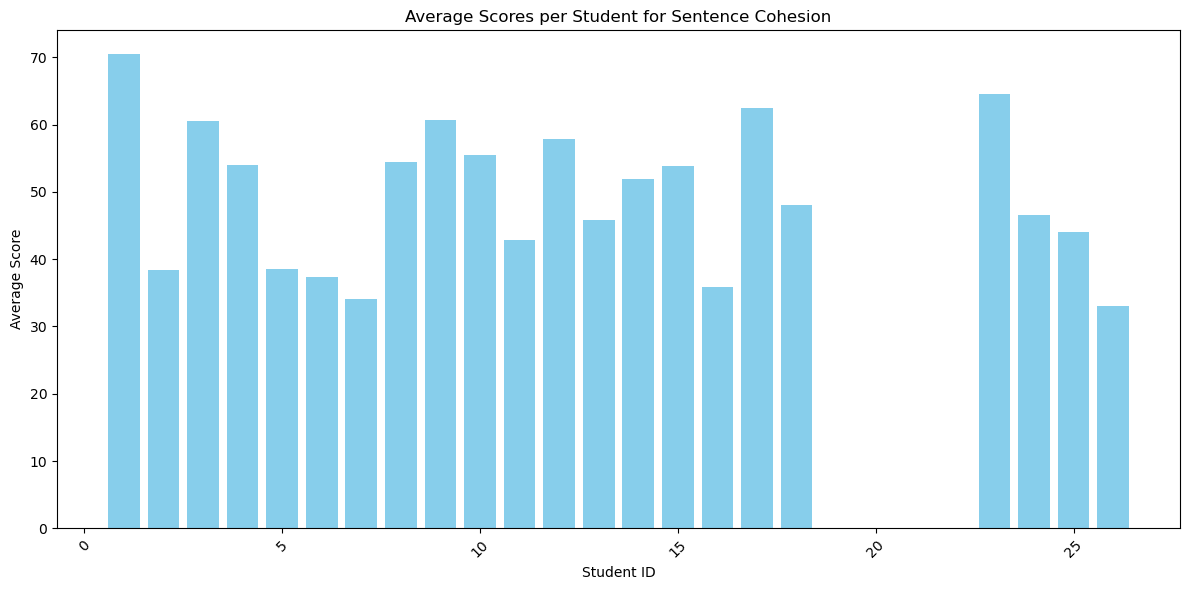

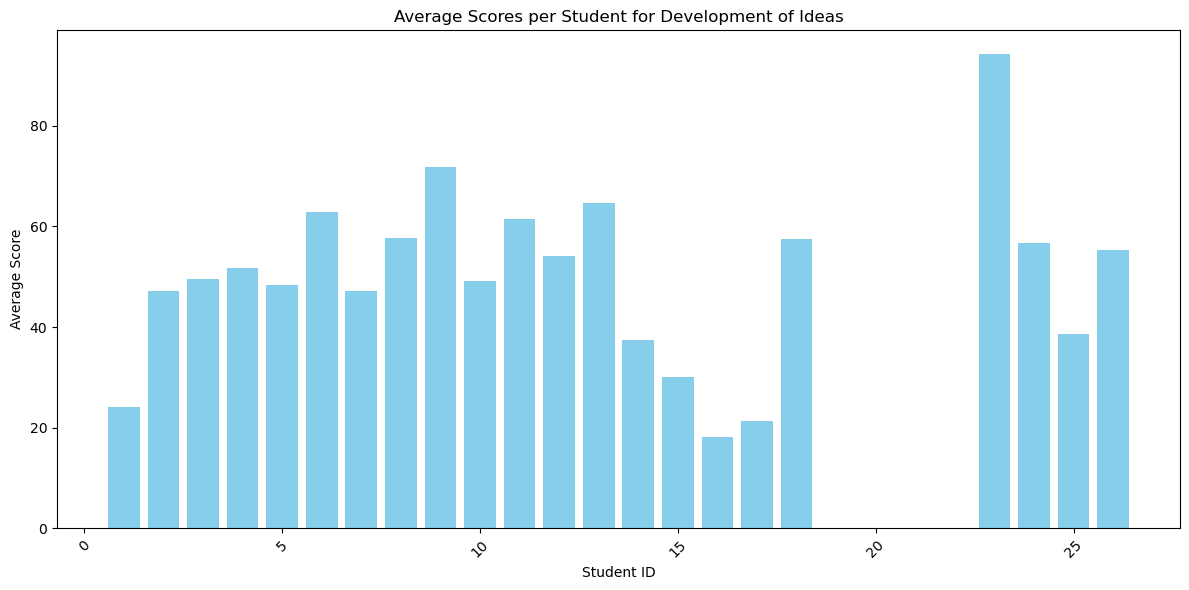

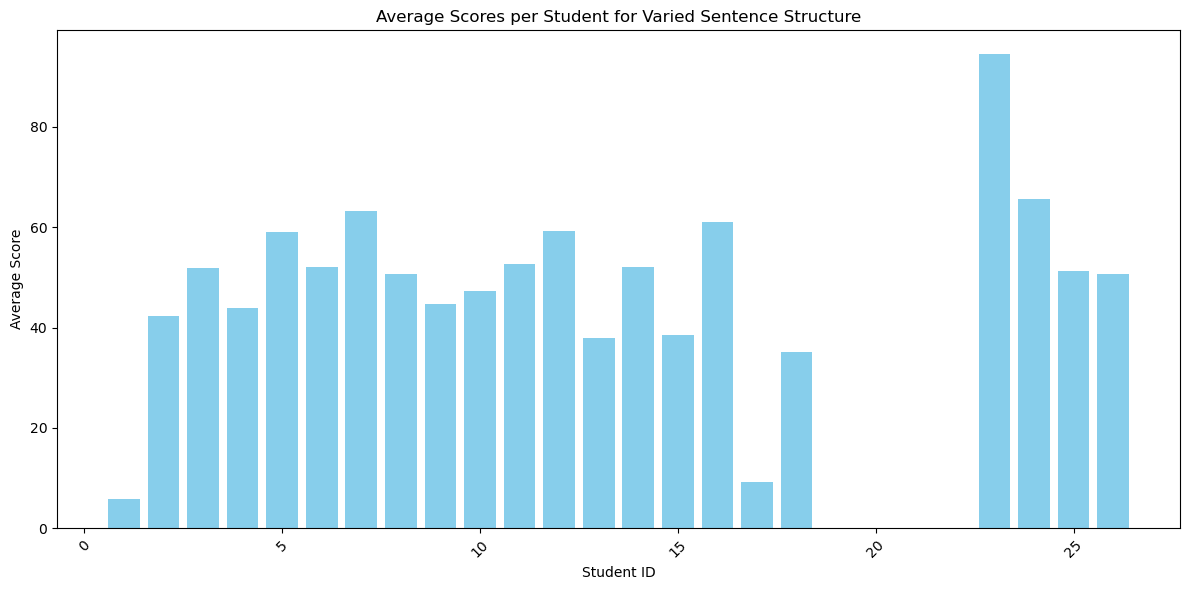

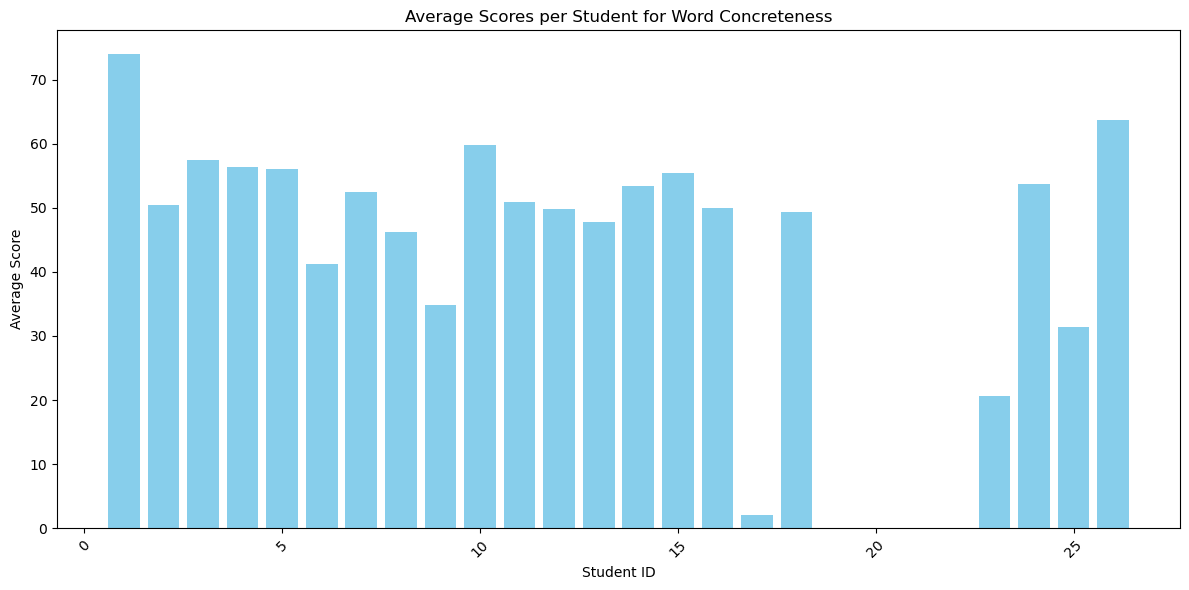

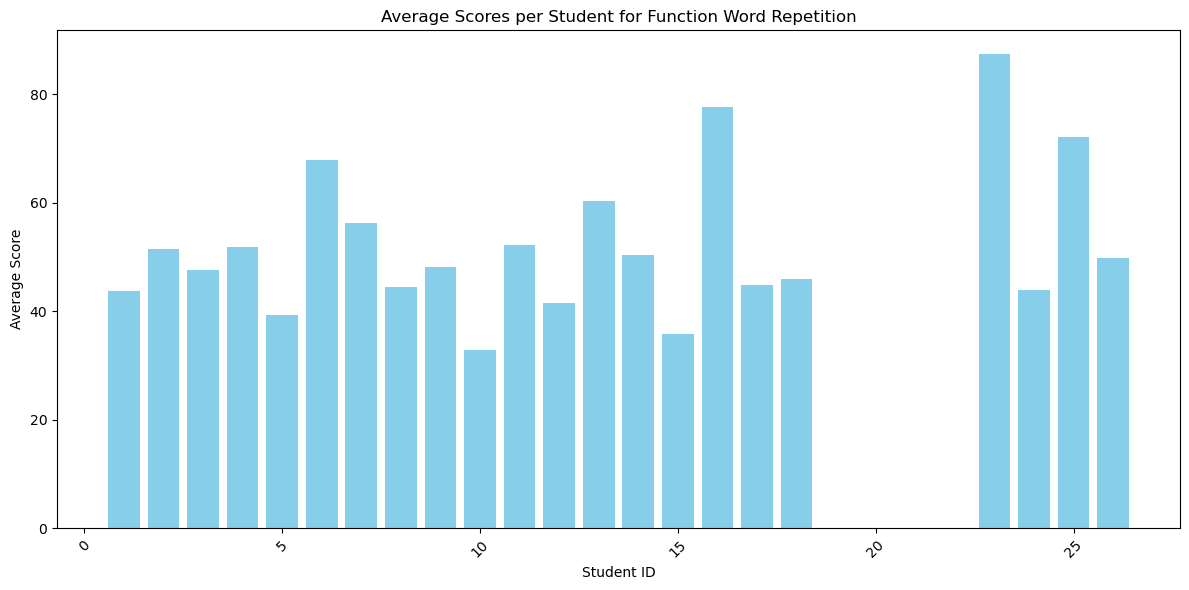

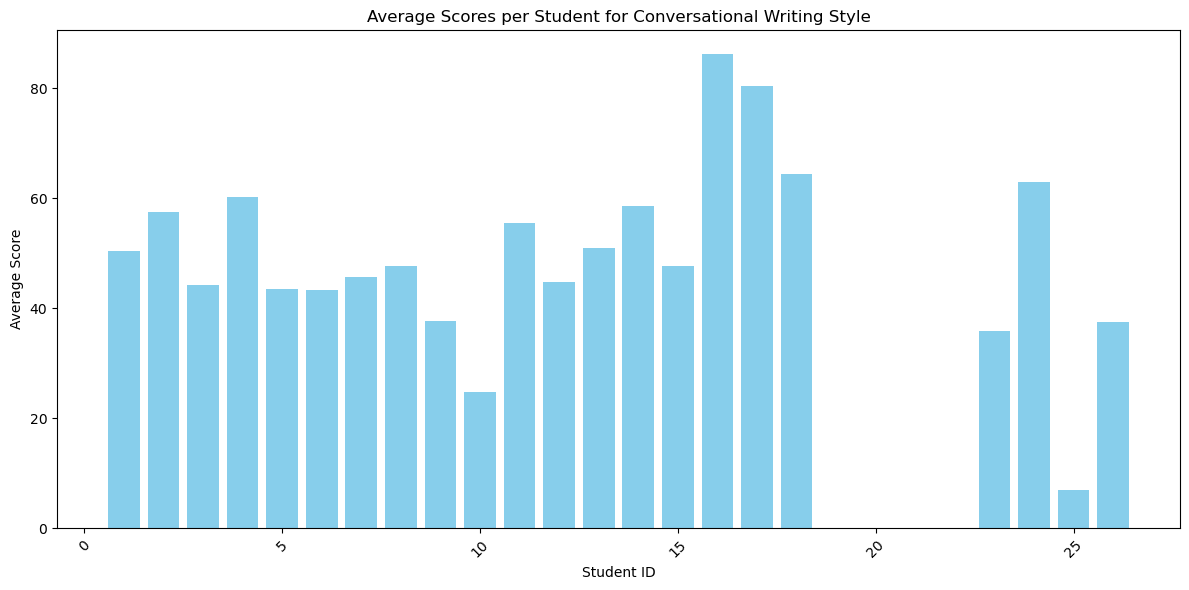

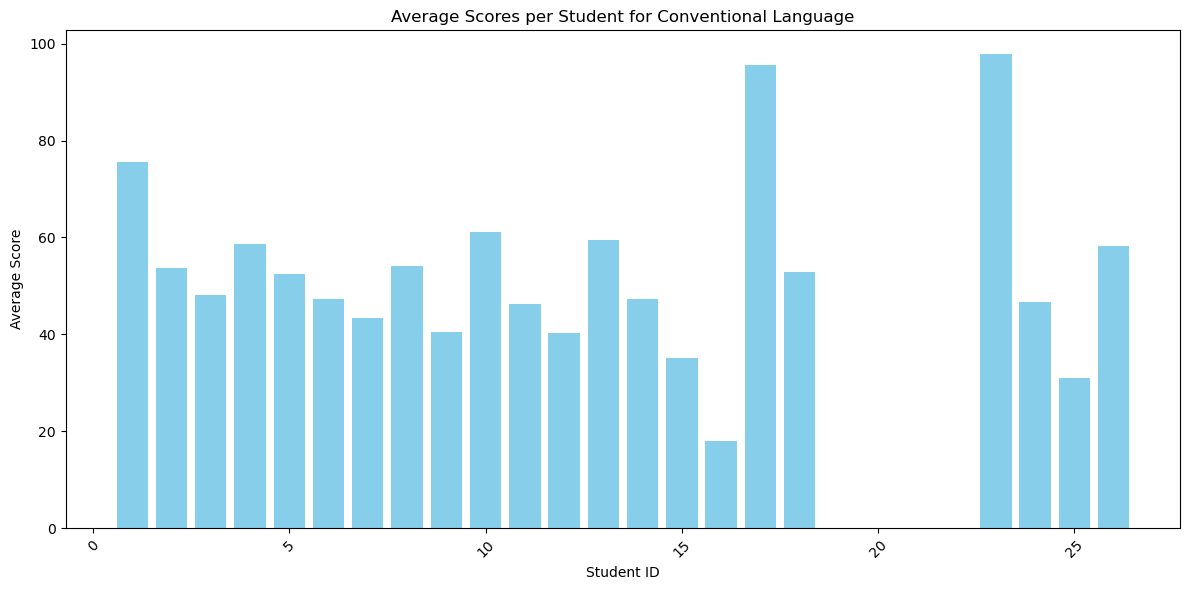

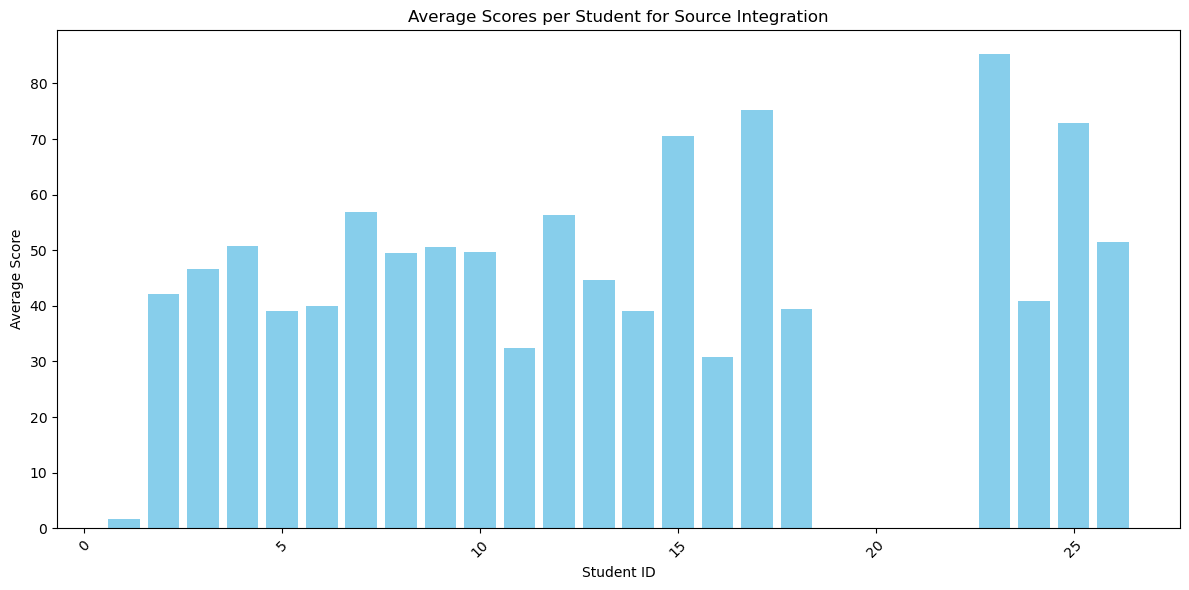

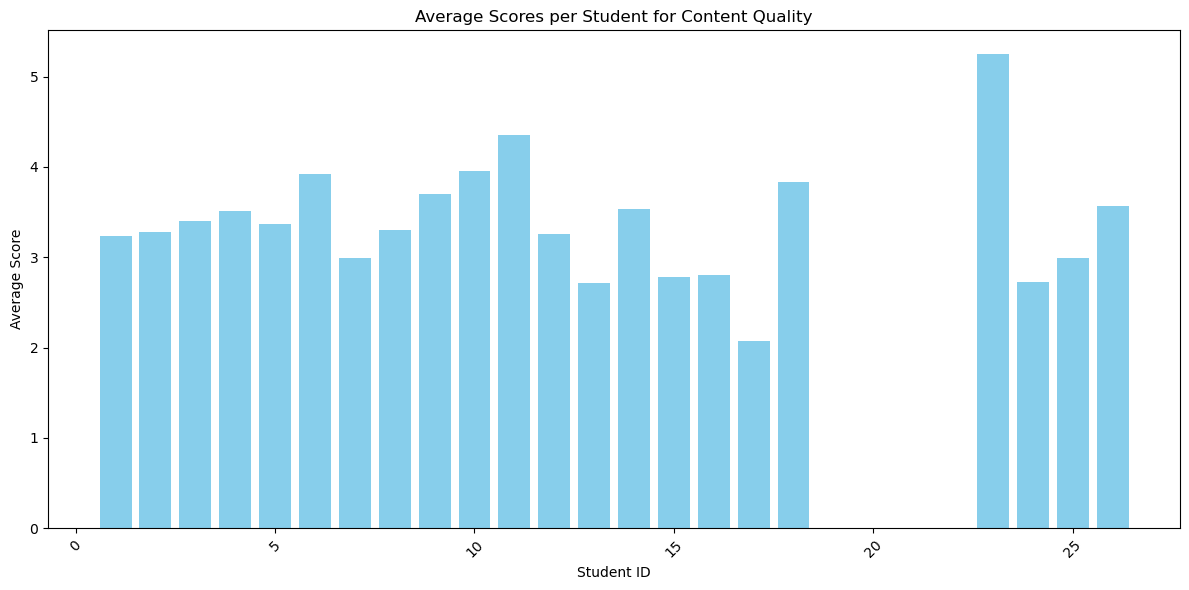

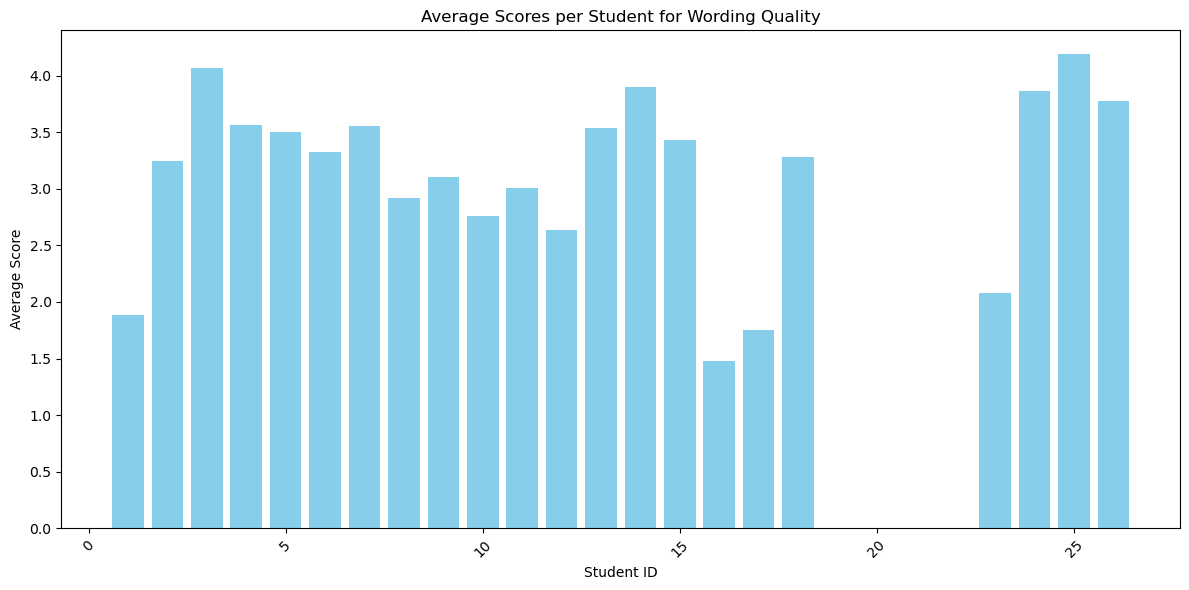

In [82]:
import matplotlib.pyplot as plt

def plot_metrics_by_category(category_id):
    # Filter metrics by the given category_id
    metrics = metric_df[metric_df['category_id'] == category_id]

    # Iterate over each metric
    for _, metric in metrics.iterrows():
        metric_id = metric['id']
        metric_name = metric['name']
        
        # Filter scores for the current metric
        scores_for_metric = essay_score_df[essay_score_df['metric_id'] == metric_id]
        
        # Merge with essay_df to get student_id
        scores_with_students = pd.merge(scores_for_metric, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')
        
        # Calculate average score for each student
        average_scores_per_student = scores_with_students.groupby('student_id')['score'].mean().reset_index()
        
        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.bar(average_scores_per_student['student_id'], average_scores_per_student['score'], color='skyblue')
        plt.xlabel('Student ID')
        plt.ylabel('Average Score')
        plt.title(f'Average Scores per Student for {metric_name}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
plot_metrics_by_category(category_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a classroom ID (1, 3, or 6): 1


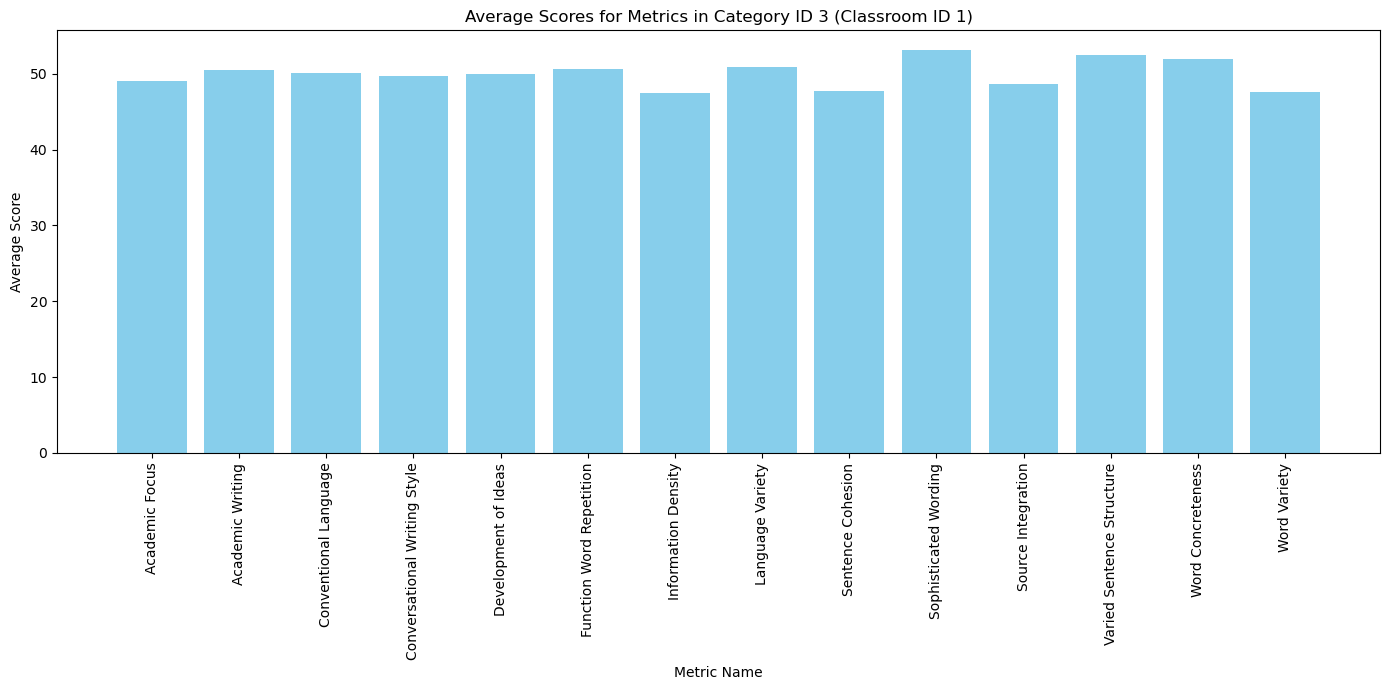

In [83]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_and_classroom(category_id, classroom_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]

    # Filter scores for these metrics and classroom
    scores_classroom = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_classroom['id']))
    ]

    # Merge with metric_df to get metric names
    scores_with_metrics = pd.merge(scores_classroom, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric
    average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
    plt.xlabel('Metric Name')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores for Metrics in Category ID {category_id} (Classroom ID {classroom_id})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
classroom_id_input = int(input("Enter a classroom ID (1, 3, or 6): "))
plot_metrics_by_category_and_classroom(category_id_input, classroom_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a student ID (1, 3, or 6): 1


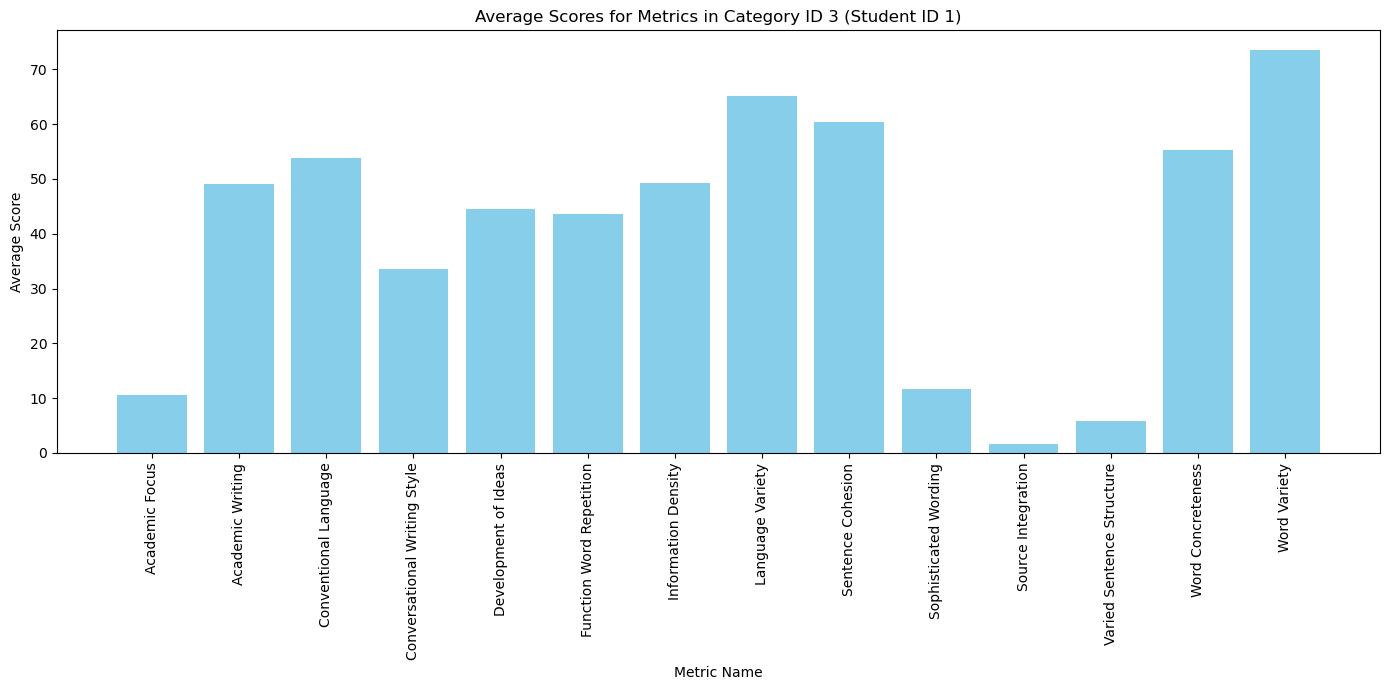

In [84]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_and_student(category_id, student_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given student_id
    essays_student = essay_df[essay_df['student_id'] == student_id]

    # Filter scores for these metrics and student
    scores_student = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_student['id']))
    ]

    # Merge with metric_df to get metric names
    scores_with_metrics = pd.merge(scores_student, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric
    average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
    plt.xlabel('Metric Name')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores for Metrics in Category ID {category_id} (Student ID {student_id})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
student_id_input = int(input("Enter a student ID (1, 3, or 6): "))
plot_metrics_by_category_and_student(category_id_input, student_id_input)

Enter a metric ID: 89
Enter a task ID: 90


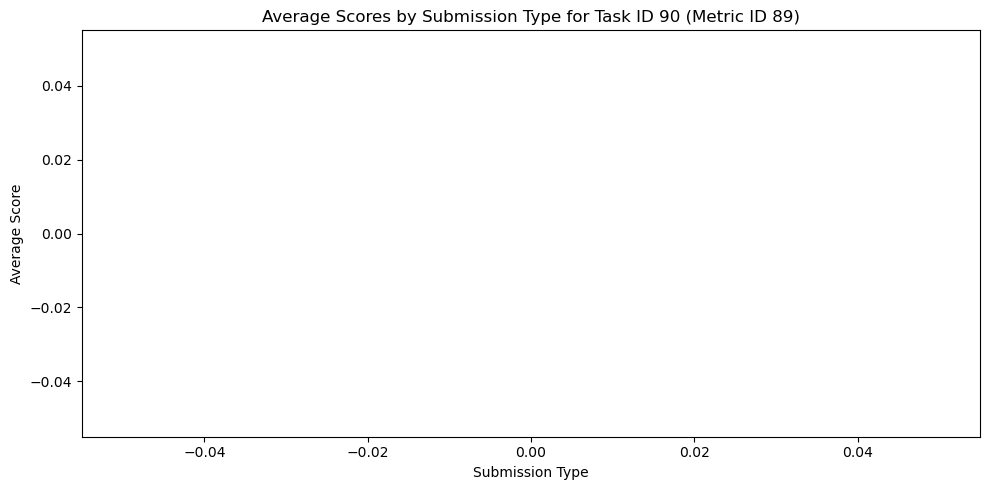

In [85]:
import matplotlib.pyplot as plt

def plot_scores_by_submission_type_and_task(metric_id, task_id):
    # Filter scores for the given metric and task
    scores_for_task = essay_score_df[
        (essay_score_df['metric_id'] == metric_id) &
        (essay_score_df['essay_id'].isin(essay_df[essay_df['task_id'] == task_id]['id']))
    ]

    # Merge with essay_df to get submission_type
    scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')

    # Calculate average score for each submission type
    average_scores_per_submission = scores_with_submissions.groupby('submission_type')['score'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.bar(average_scores_per_submission['submission_type'], average_scores_per_submission['score'], color='skyblue')
    plt.xlabel('Submission Type')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores by Submission Type for Task ID {task_id} (Metric ID {metric_id})')
    plt.tight_layout()
    plt.show()

# Example usage:
metric_id_input = int(input("Enter a metric ID: "))
task_id_input = int(input("Enter a task ID: "))
plot_scores_by_submission_type_and_task(metric_id_input, task_id_input)

Enter a category ID (1, 2, or 3): 3


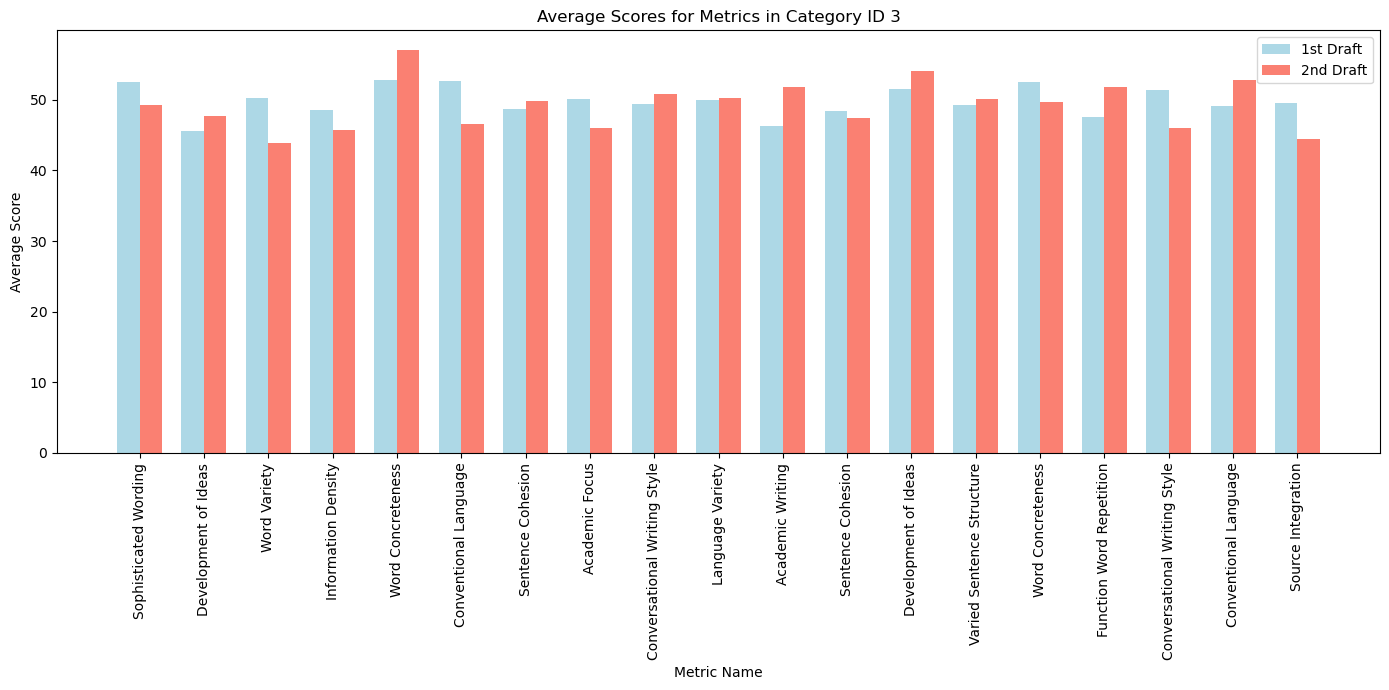

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_bar_by_category(category_id):
    # Filter metrics by the given category_id
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]

    # Filter scores for these metrics
    scores_for_metrics = essay_score_df[essay_score_df['metric_id'].isin(metrics['id'])]

    # Merge with essay_df to get submission_type
    scores_with_submissions = pd.merge(scores_for_metrics, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')

    # Calculate average score for each metric and submission type
    average_scores = scores_with_submissions.groupby(['metric_id', 'submission_type'])['score'].mean().unstack()

    # Plot the results
    fig, ax = plt.subplots(figsize=(14, 7))
    index = np.arange(len(metrics))
    bar_width = 0.35

    bar1 = ax.bar(index, average_scores['1st Draft'], bar_width, label='1st Draft', color='lightblue')
    bar2 = ax.bar(index + bar_width, average_scores['2nd Draft'], bar_width, label='2nd Draft', color='salmon')

    ax.set_xlabel('Metric Name')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores for Metrics in Category ID {category_id}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metrics['name'], rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
plot_double_bar_by_category(category_id_input)

Enter a category ID (1, 2, or 3): 3


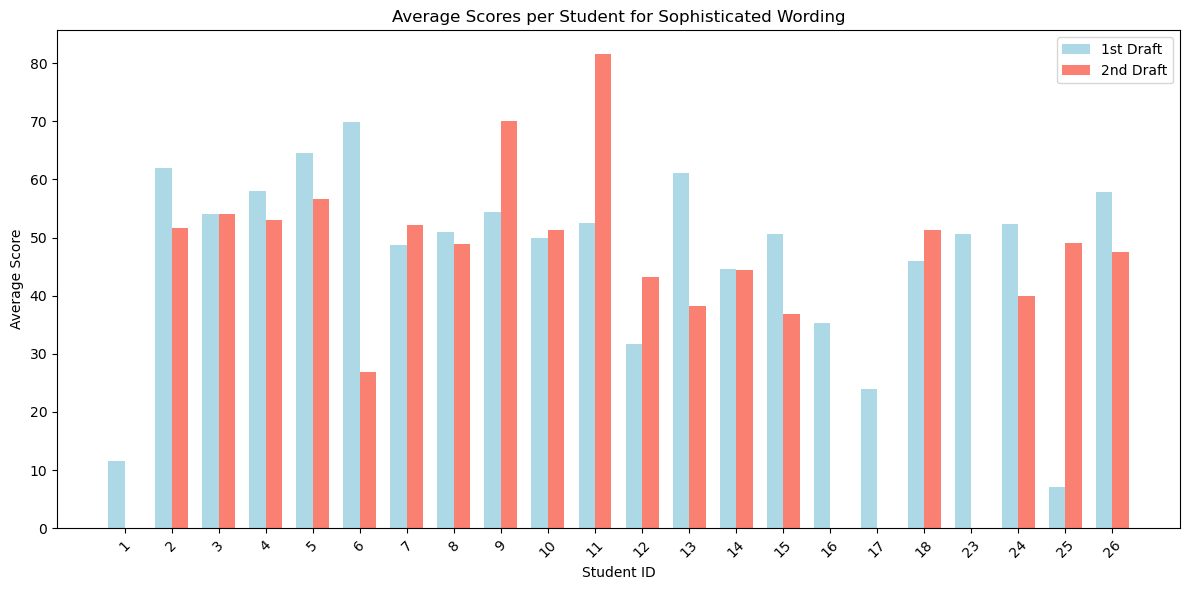

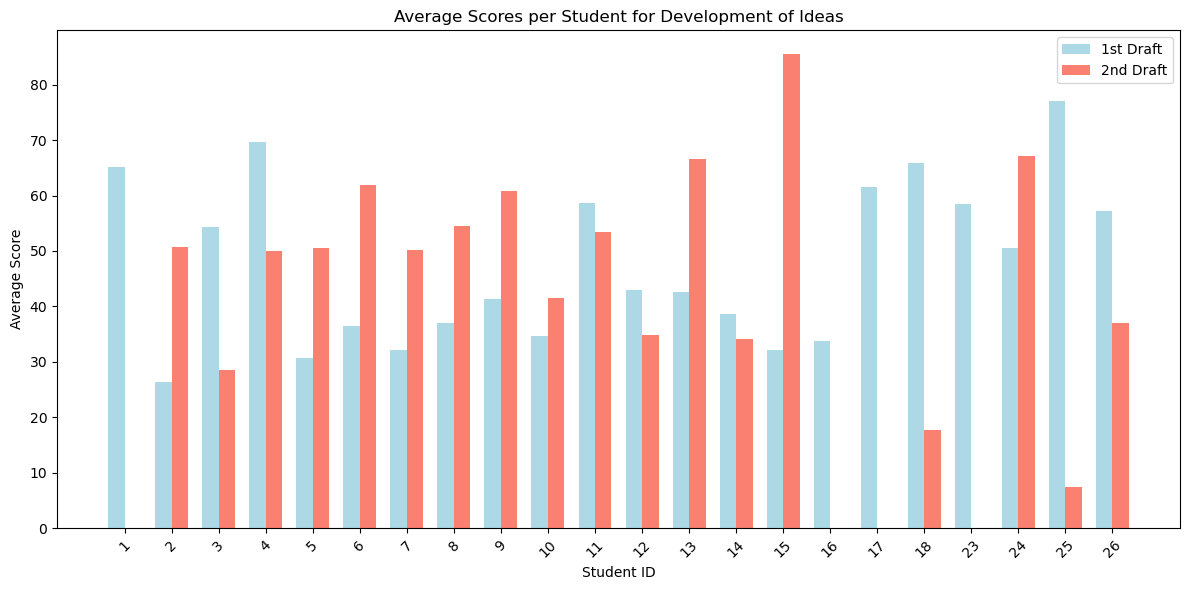

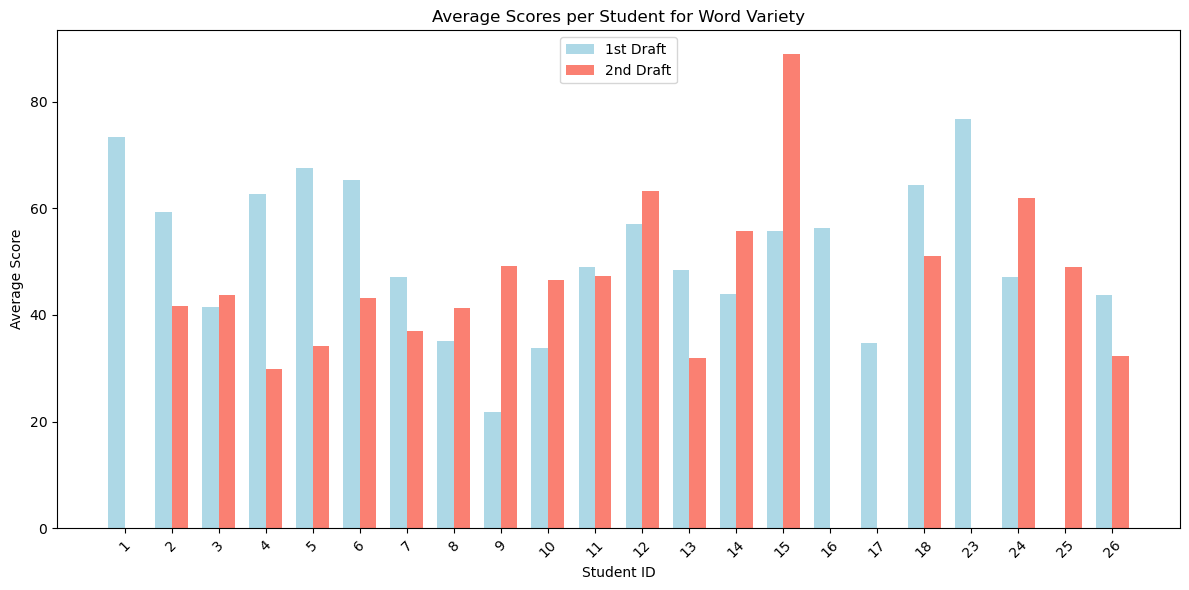

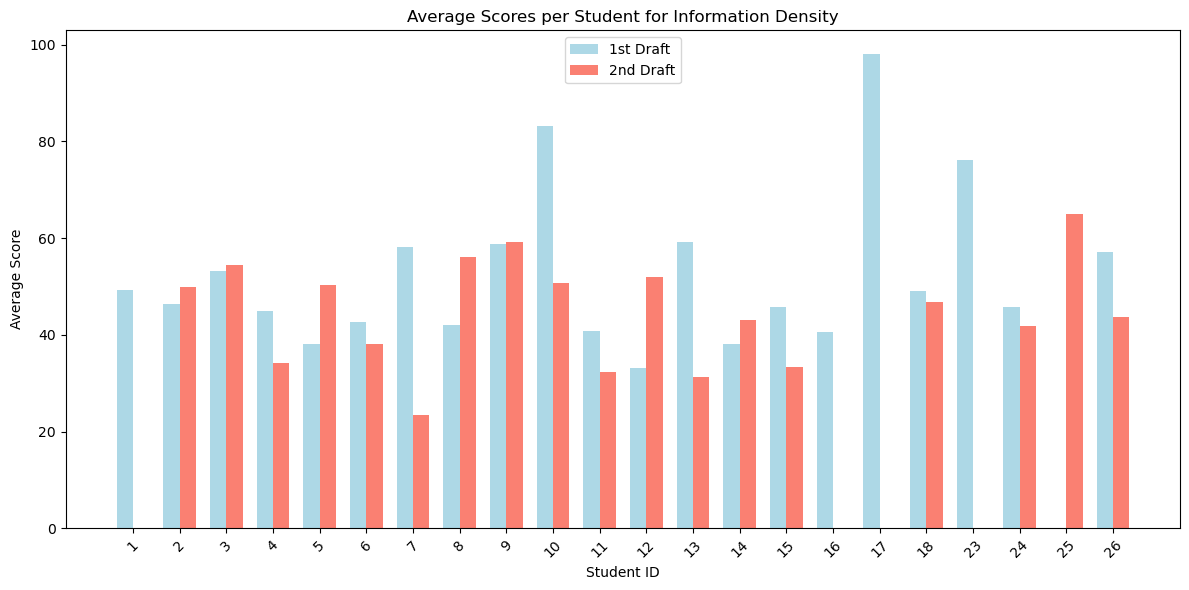

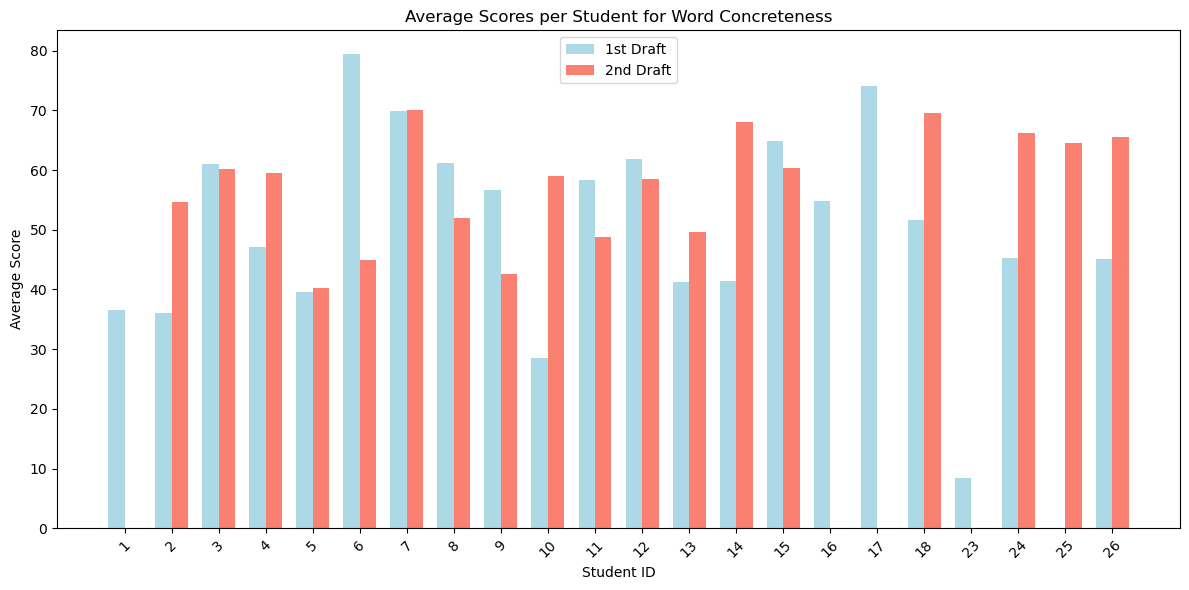

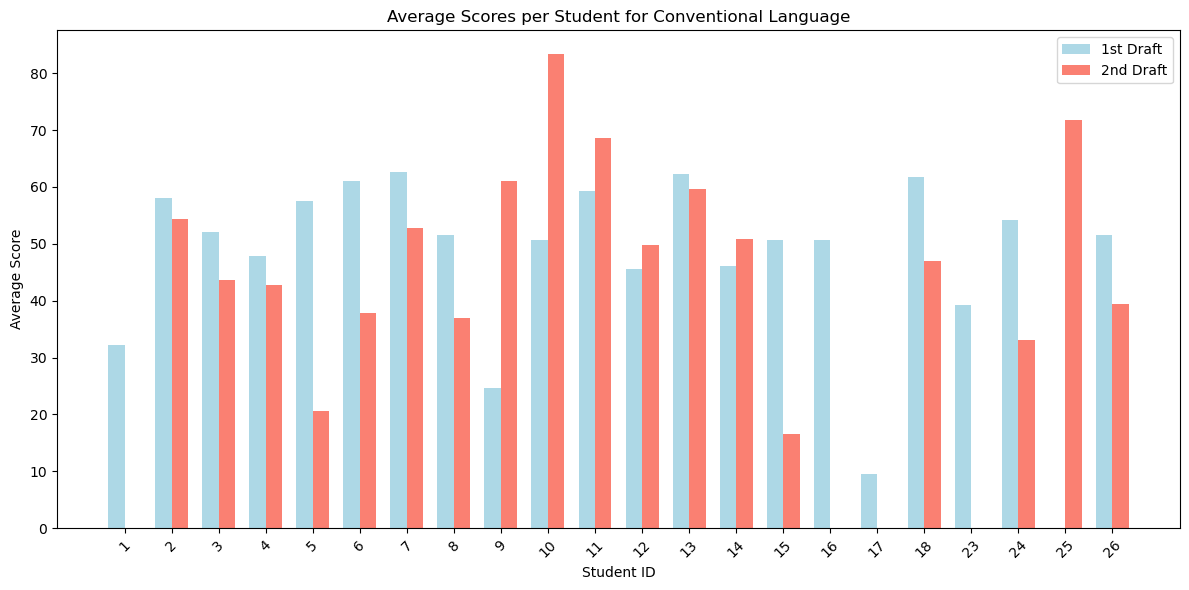

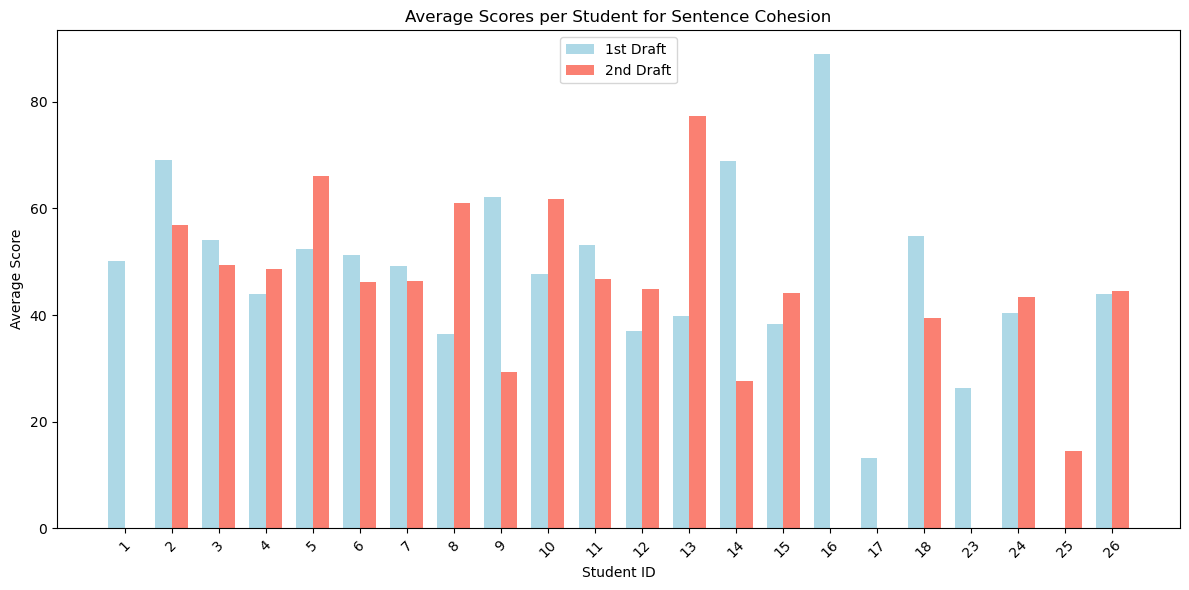

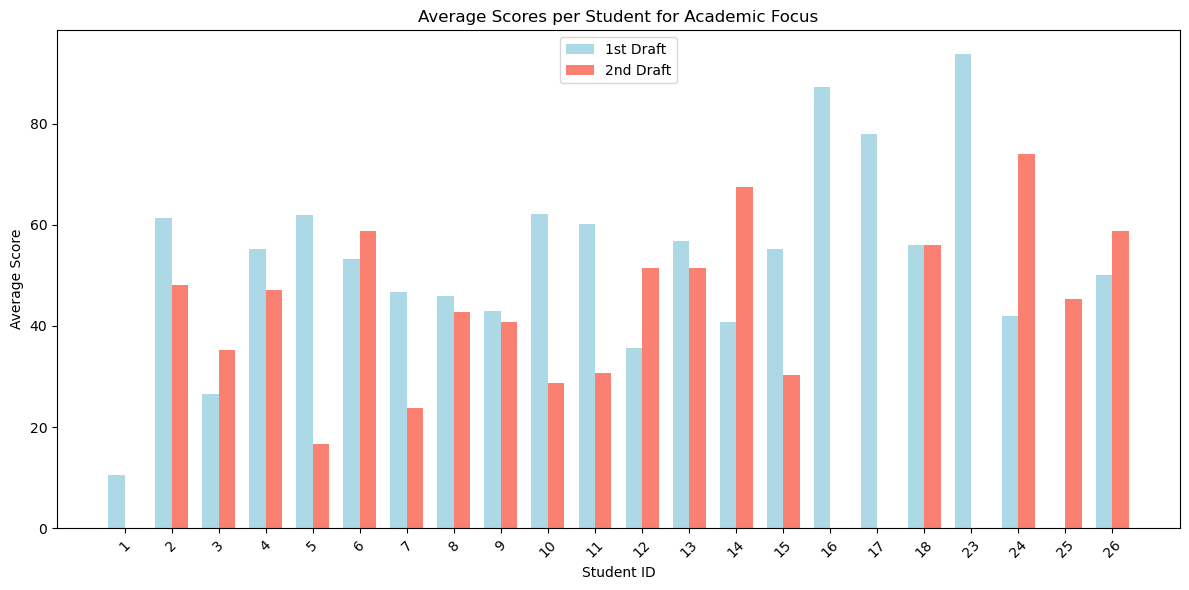

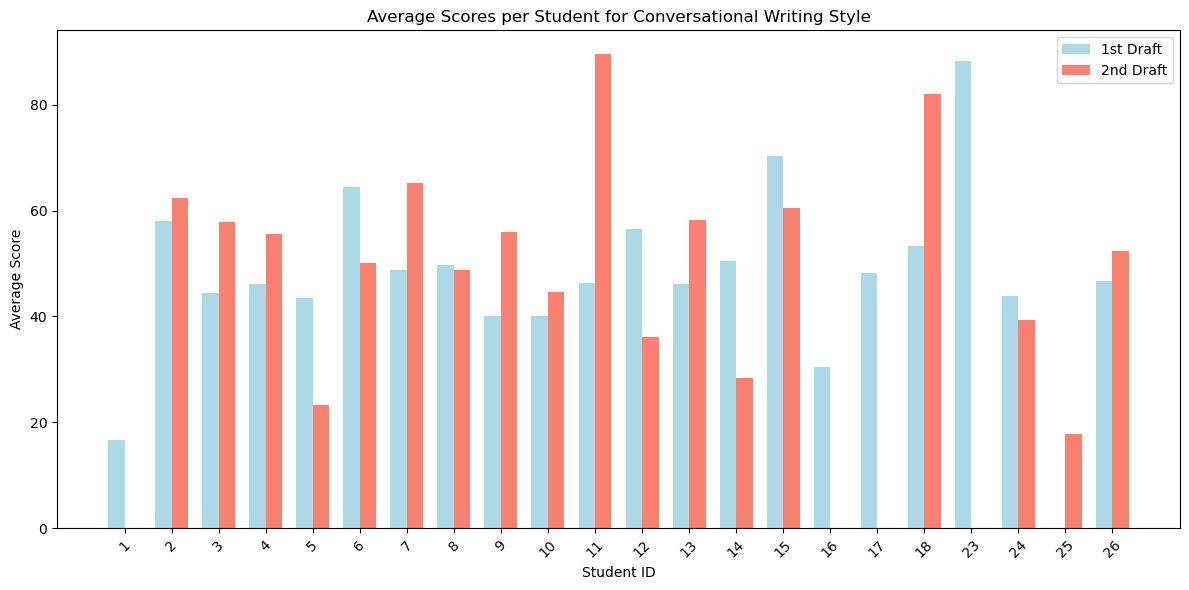

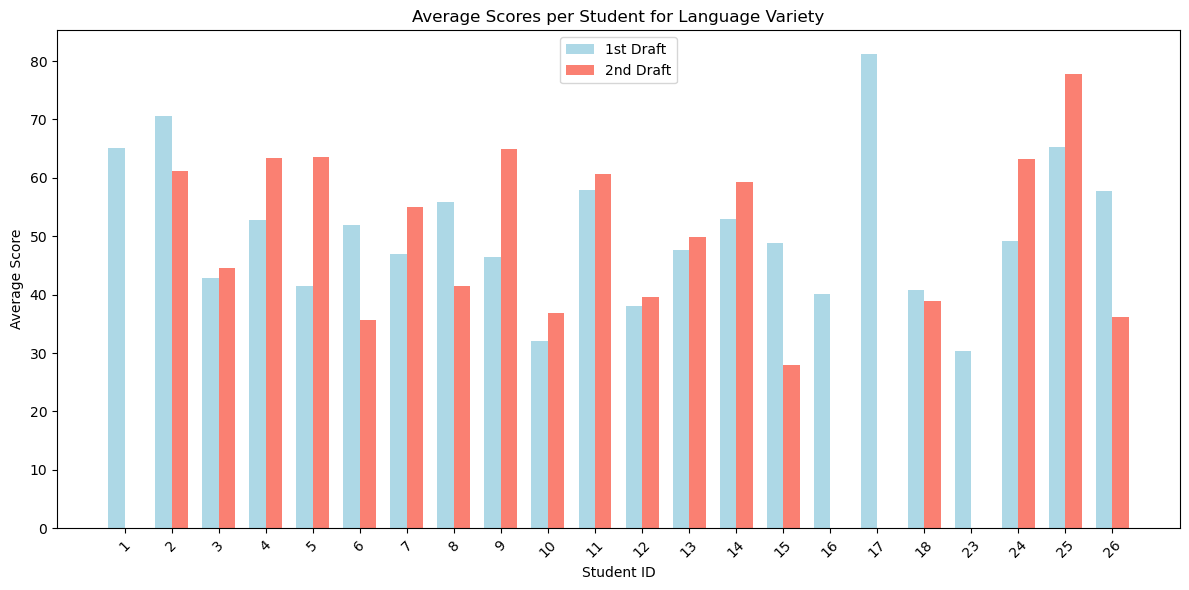

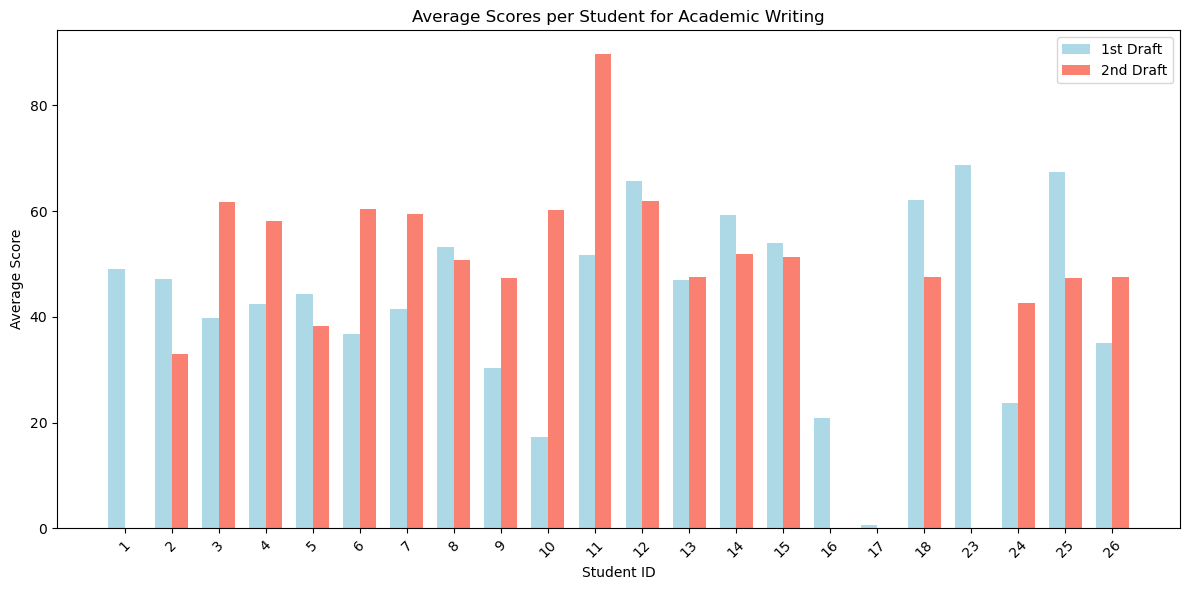

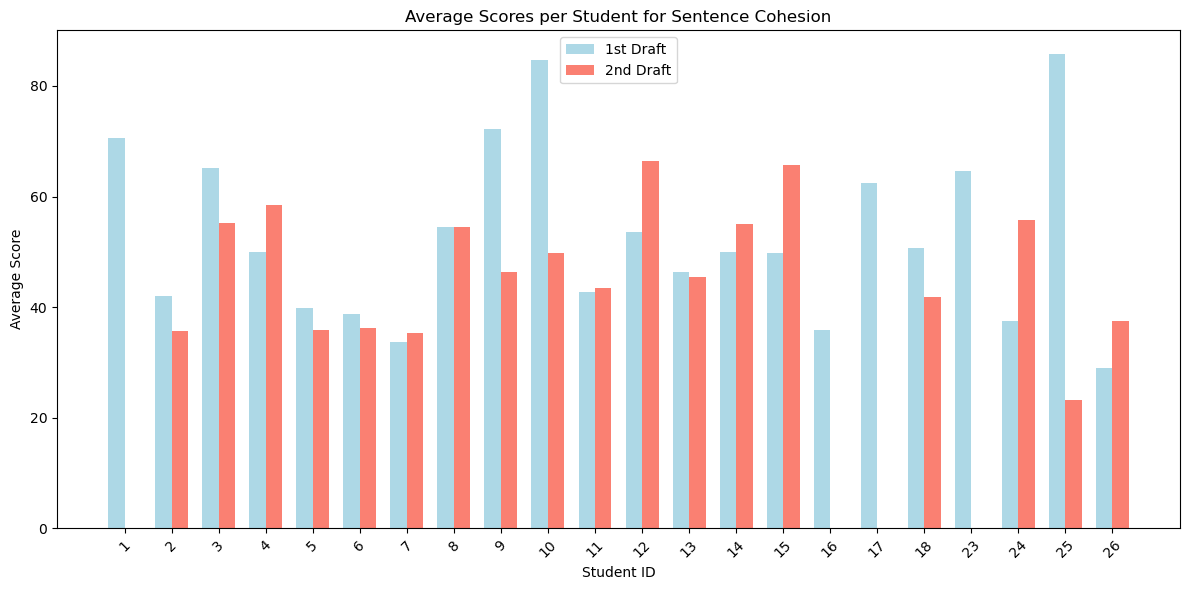

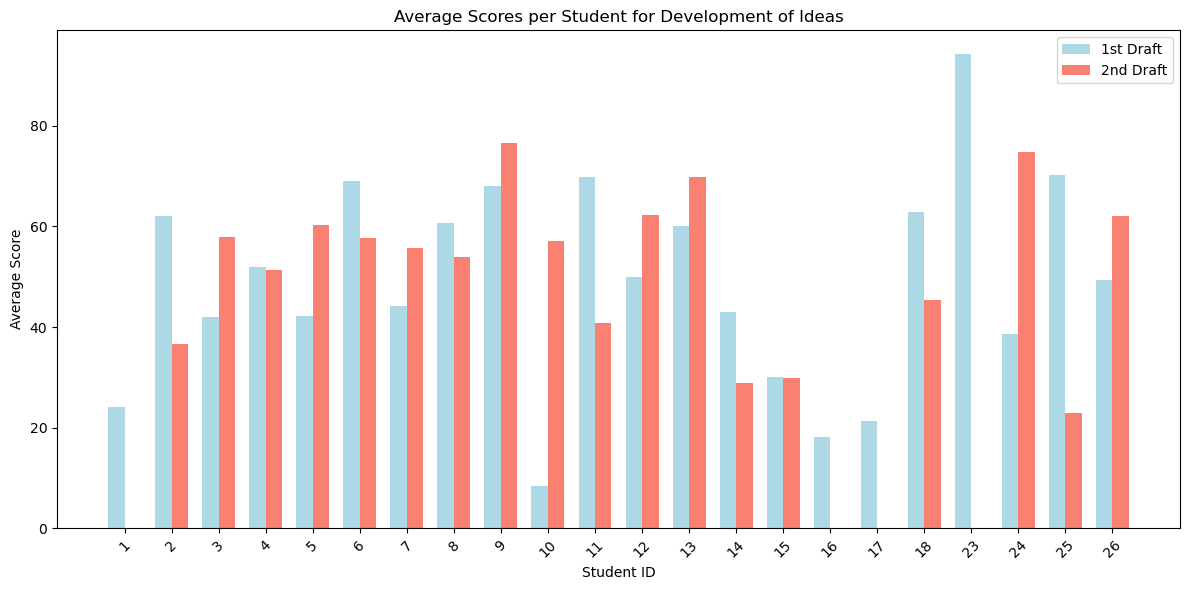

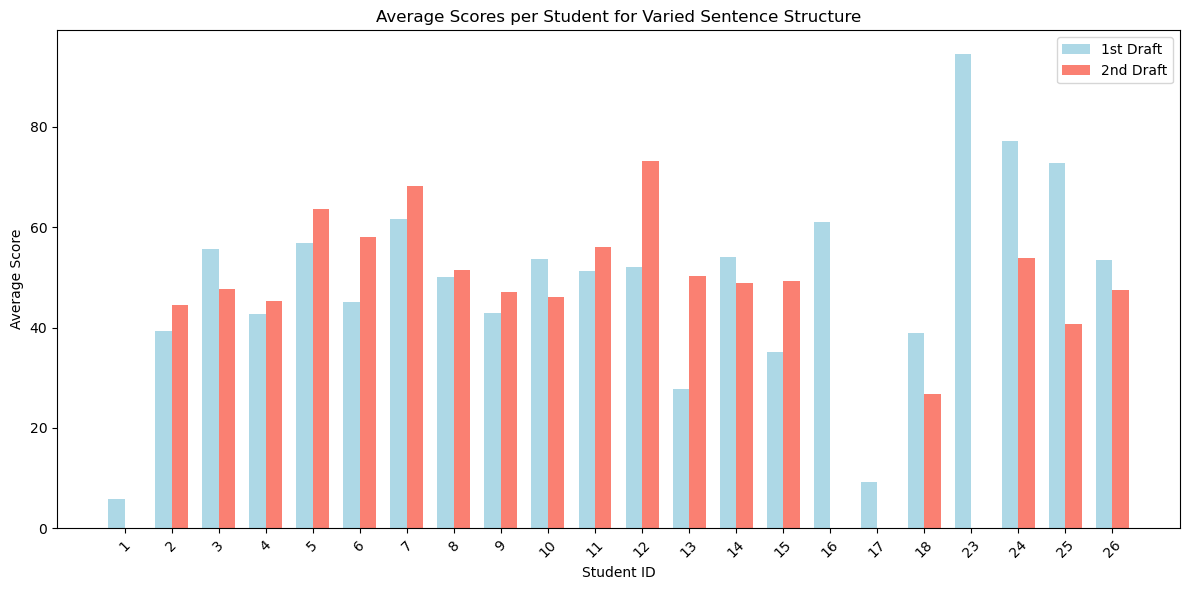

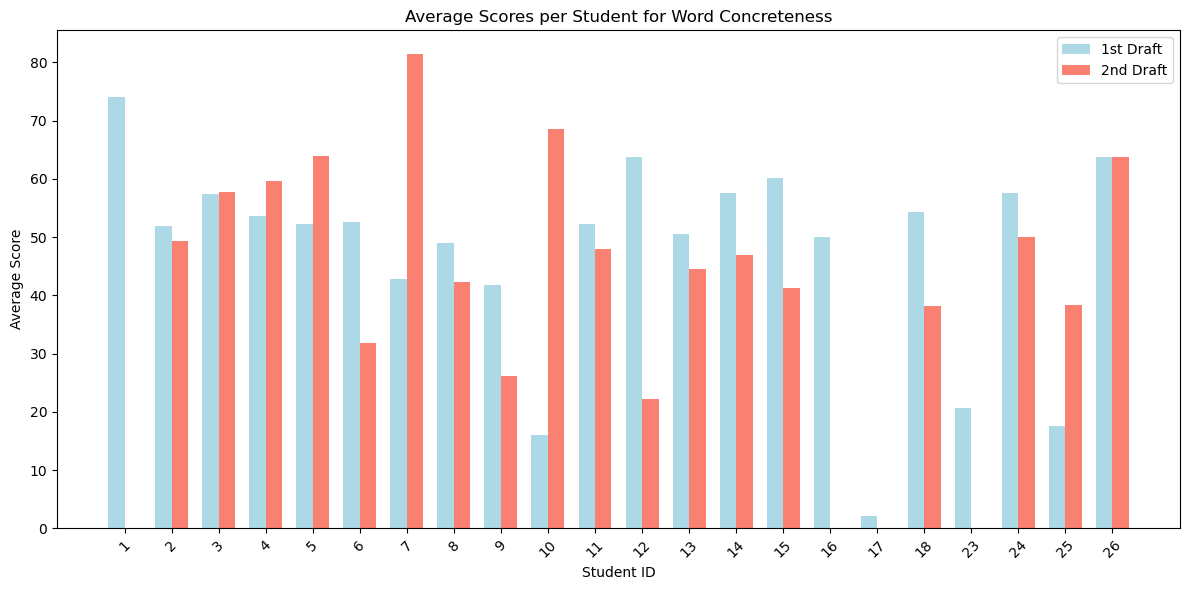

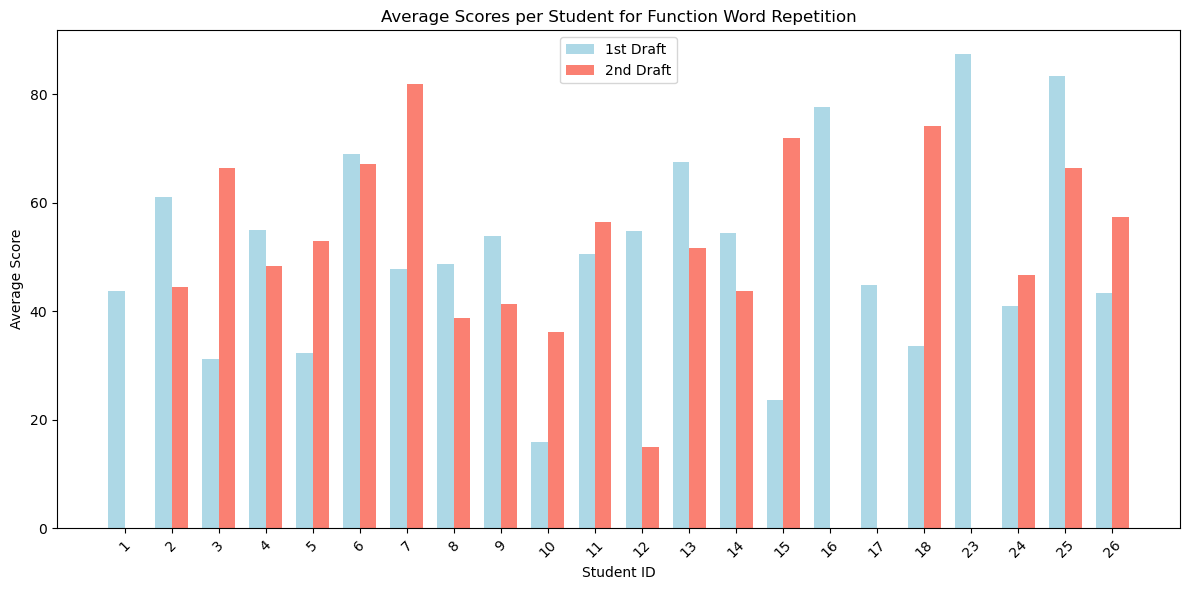

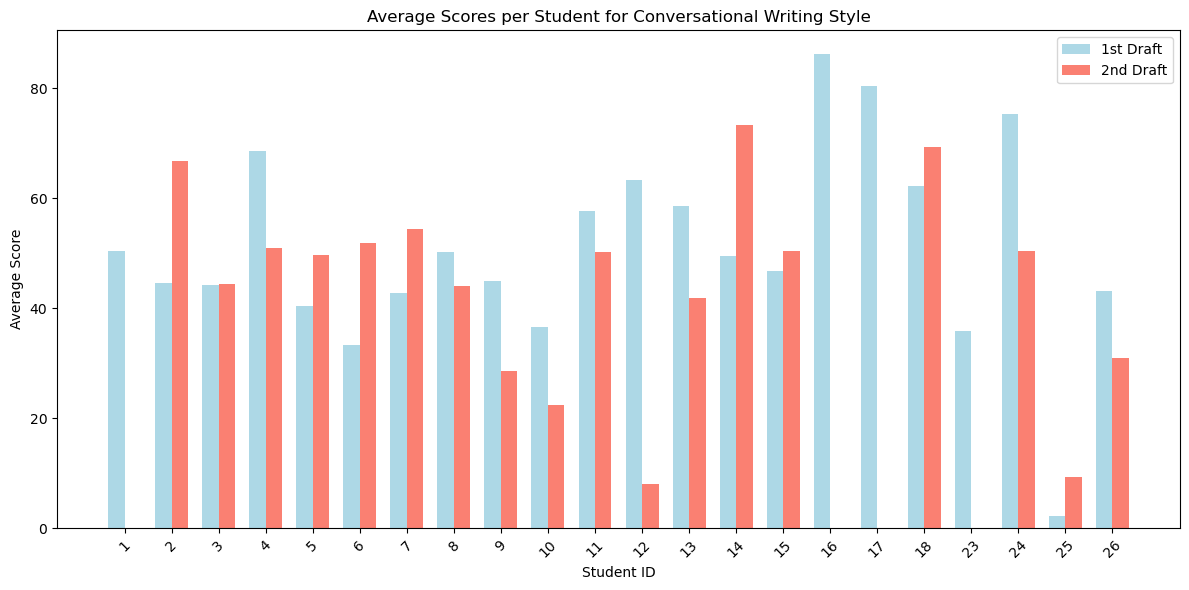

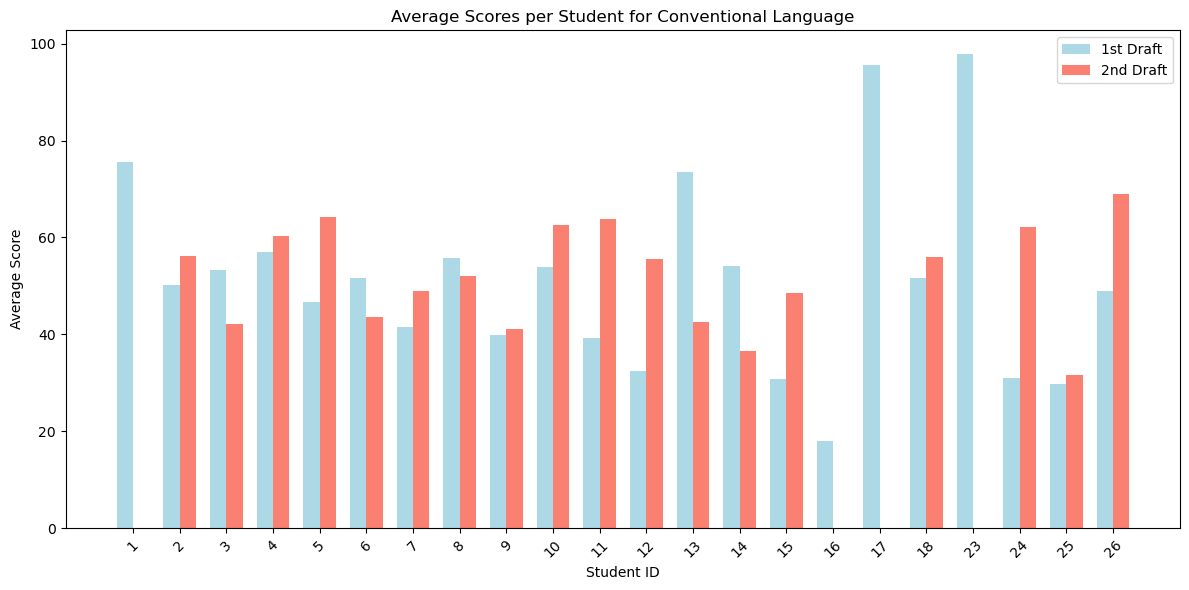

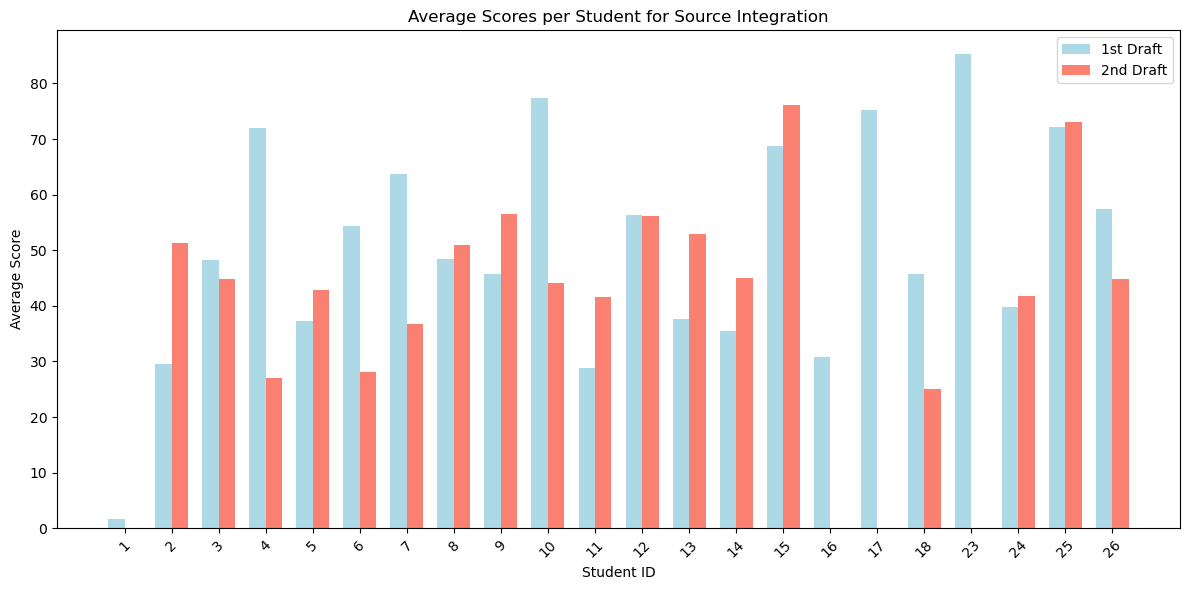

In [87]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_bar_by_category(category_id):
    # Filter metrics by the given category_id
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]

    # Iterate over each metric
    for _, metric in metrics.iterrows():
        metric_id = metric['id']
        metric_name = metric['name']
        
        # Filter scores for the current metric
        scores_for_metric = essay_score_df[essay_score_df['metric_id'] == metric_id]
        
        # Merge with essay_df to get submission_type and student_id
        scores_with_students = pd.merge(scores_for_metric, essay_df[['id', 'submission_type', 'student_id']], left_on='essay_id', right_on='id')
        
        # Calculate average score for each submission type and student
        average_scores = scores_with_students.groupby(['student_id', 'submission_type'])['score'].mean().unstack()

        # Plot the results
        fig, ax = plt.subplots(figsize=(12, 6))
        index = np.arange(len(average_scores))
        bar_width = 0.35

        bar1 = ax.bar(index, average_scores.get('1st Draft', 0), bar_width, label='1st Draft', color='lightblue')
        bar2 = ax.bar(index + bar_width, average_scores.get('2nd Draft', 0), bar_width, label='2nd Draft', color='salmon')

        ax.set_xlabel('Student ID')
        ax.set_ylabel('Average Score')
        ax.set_title(f'Average Scores per Student for {metric_name}')
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(average_scores.index, rotation=45)
        ax.legend()

        plt.tight_layout()
        plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
plot_double_bar_by_category(category_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a classroom ID: 1


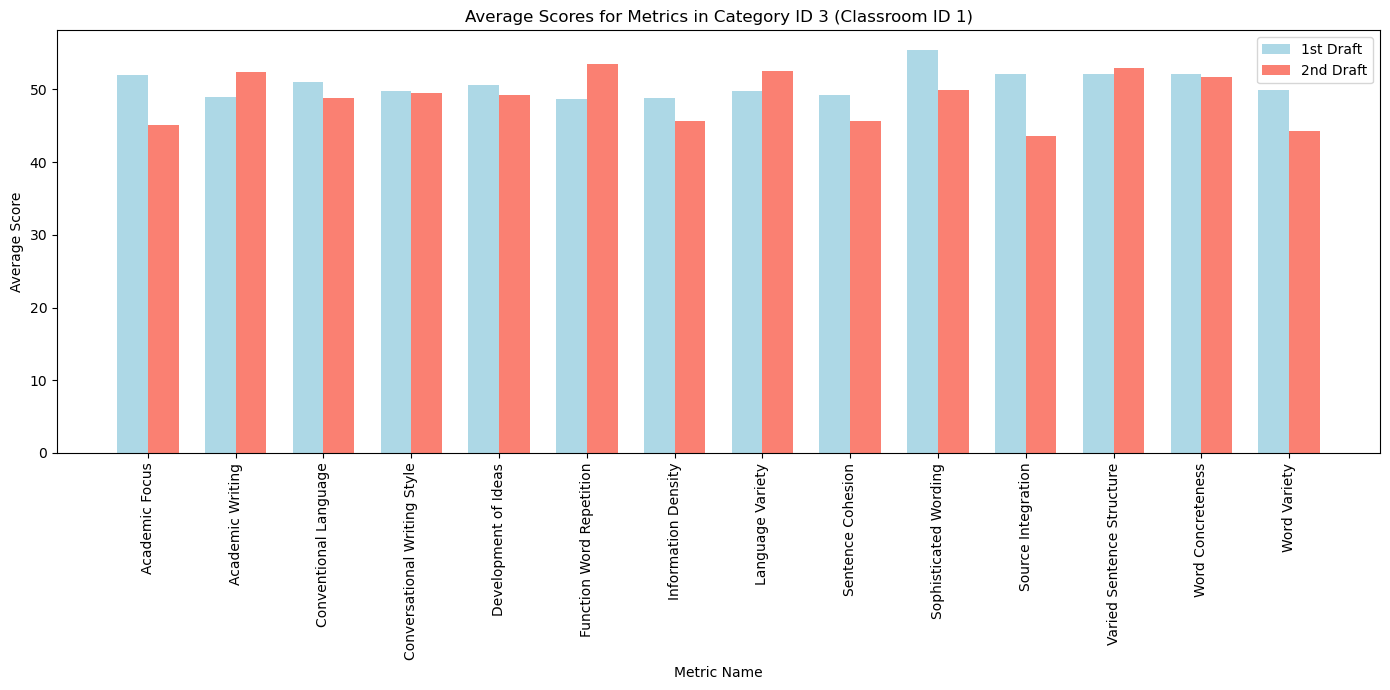

In [88]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_bar_by_category_and_classroom(category_id, classroom_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]

    # Filter scores for these metrics and classroom
    scores_classroom = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_classroom['id']))
    ]

    # Merge with metric_df to get metric names and submission_type
    scores_with_metrics = pd.merge(scores_classroom, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
    scores_with_metrics = pd.merge(scores_with_metrics, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric and submission type
    average_scores_per_metric = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()

    # Plot the results
    fig, ax = plt.subplots(figsize=(14, 7))
    index = np.arange(len(average_scores_per_metric))
    bar_width = 0.35

    bar1 = ax.bar(index, average_scores_per_metric.get('1st Draft', 0), bar_width, label='1st Draft', color='lightblue')
    bar2 = ax.bar(index + bar_width, average_scores_per_metric.get('2nd Draft', 0), bar_width, label='2nd Draft', color='salmon')

    ax.set_xlabel('Metric Name')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores for Metrics in Category ID {category_id} (Classroom ID {classroom_id})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(average_scores_per_metric.index, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
classroom_id_input = int(input("Enter a classroom ID: "))
plot_double_bar_by_category_and_classroom(category_id_input, classroom_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a student ID: 1


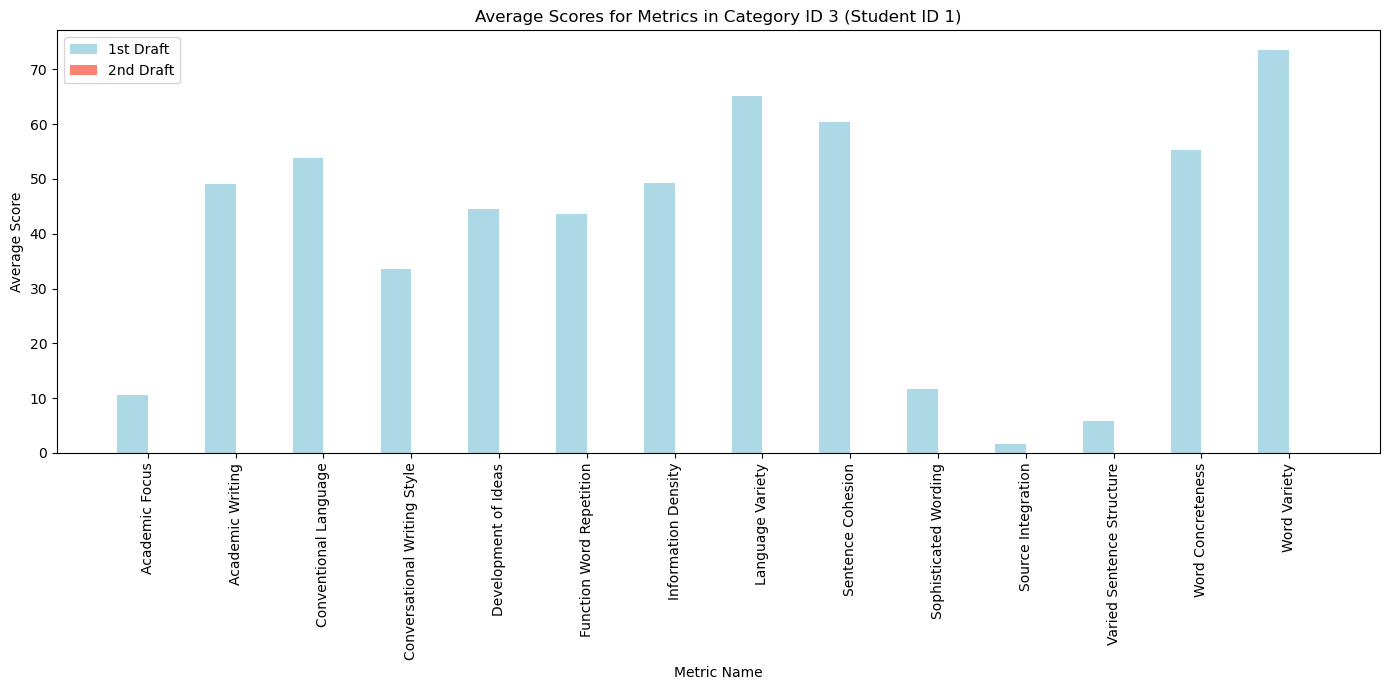

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_bar_by_category_and_student(category_id, student_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given student_id
    essays_student = essay_df[essay_df['student_id'] == student_id]

    # Filter scores for these metrics and student
    scores_student = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_student['id']))
    ]

    # Merge with metric_df to get metric names and submission_type
    scores_with_metrics = pd.merge(scores_student, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
    scores_with_metrics = pd.merge(scores_with_metrics, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric and submission type
    average_scores_per_metric = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()

    # Plot the results
    fig, ax = plt.subplots(figsize=(14, 7))
    index = np.arange(len(average_scores_per_metric))
    bar_width = 0.35

    bar1 = ax.bar(index, average_scores_per_metric.get('1st Draft', 0), bar_width, label='1st Draft', color='lightblue')
    bar2 = ax.bar(index + bar_width, average_scores_per_metric.get('2nd Draft', 0), bar_width, label='2nd Draft', color='salmon')

    ax.set_xlabel('Metric Name')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores for Metrics in Category ID {category_id} (Student ID {student_id})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(average_scores_per_metric.index, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
student_id_input = int(input("Enter a student ID: "))
plot_double_bar_by_category_and_student(category_id_input, student_id_input)

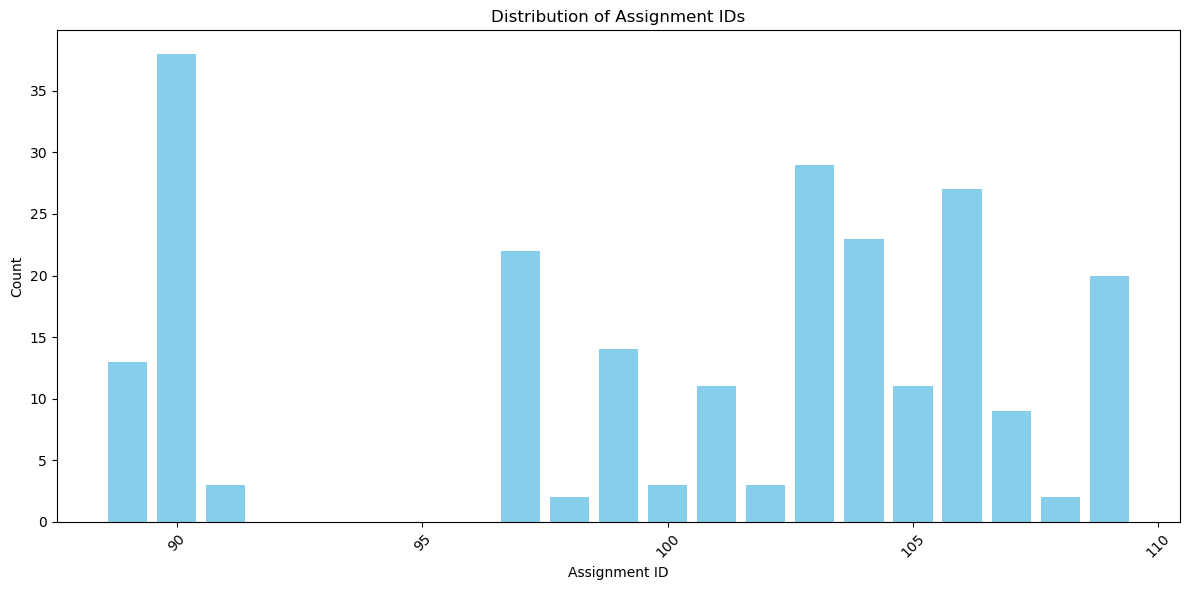

In [90]:
import matplotlib.pyplot as plt

# Assuming 'assignment_id' is a column in your DataFrame
assignment_ids = essay_df['task_id'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(assignment_ids.index, assignment_ids.values, color='skyblue')
plt.xlabel('Assignment ID')
plt.ylabel('Count')
plt.title('Distribution of Assignment IDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
# List and sort all unique task IDs in ascending order
task_ids_sorted = sorted(essay_df['task_id'].unique())
print("Task IDs in Ascending Order:", task_ids_sorted)

Task IDs in Ascending Order: [89, 90, 91, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


Enter a category ID (1, 2, or 3): 3
Enter a task ID: 89


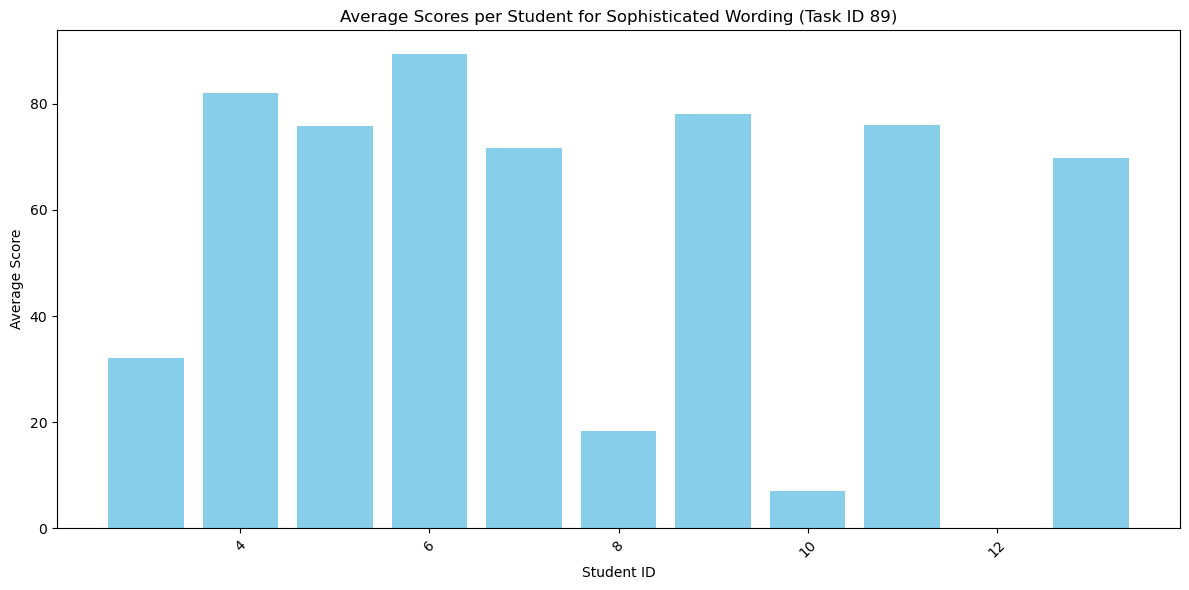

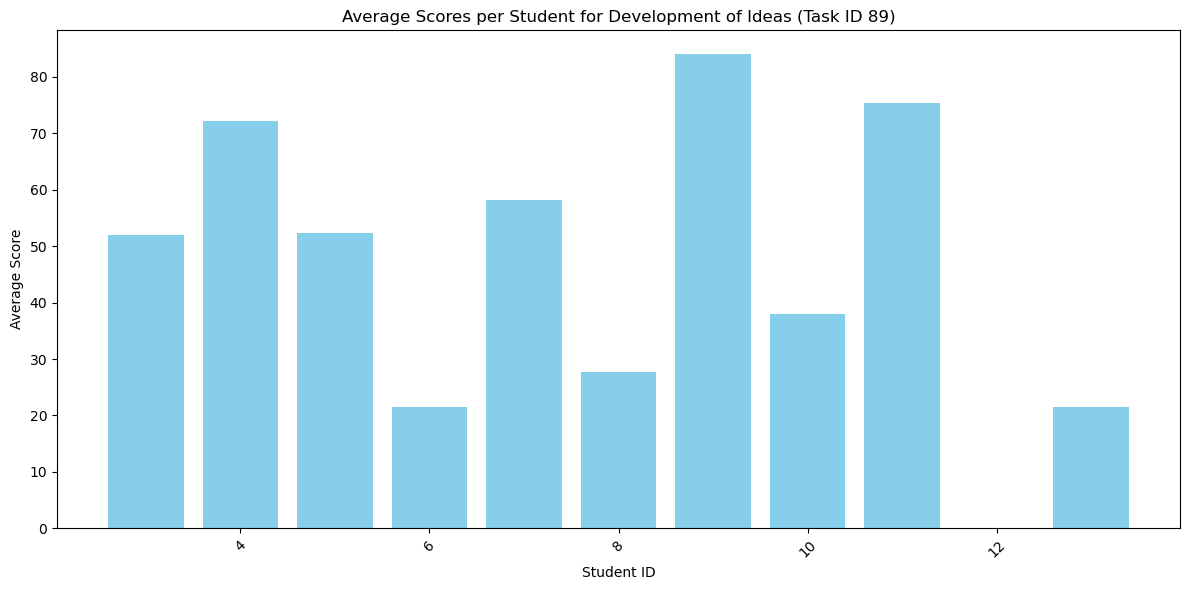

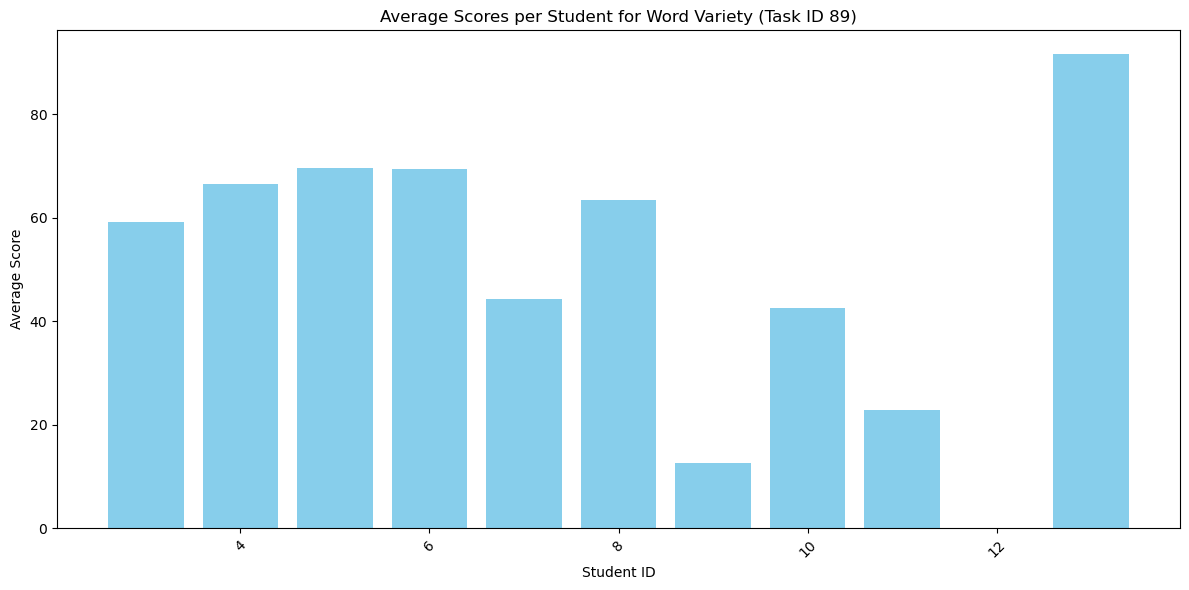

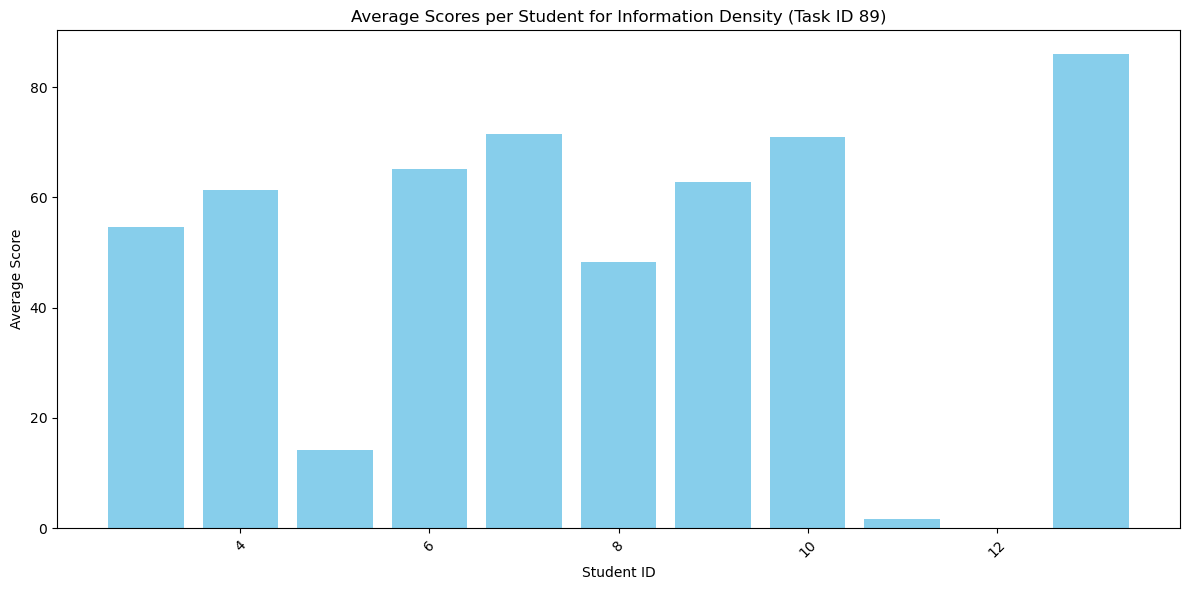

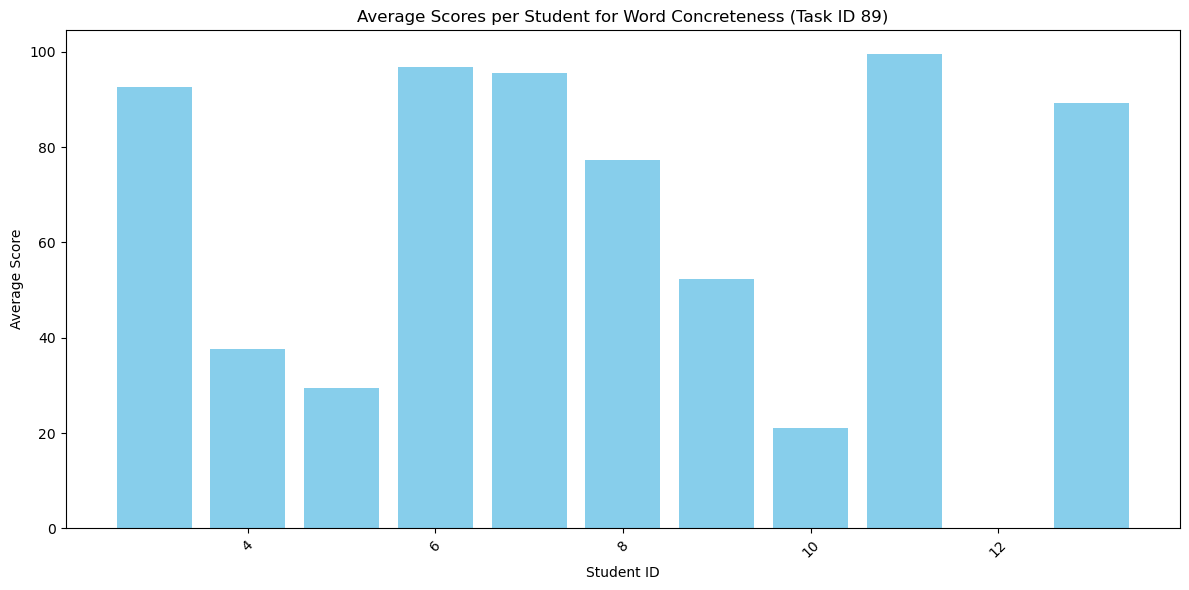

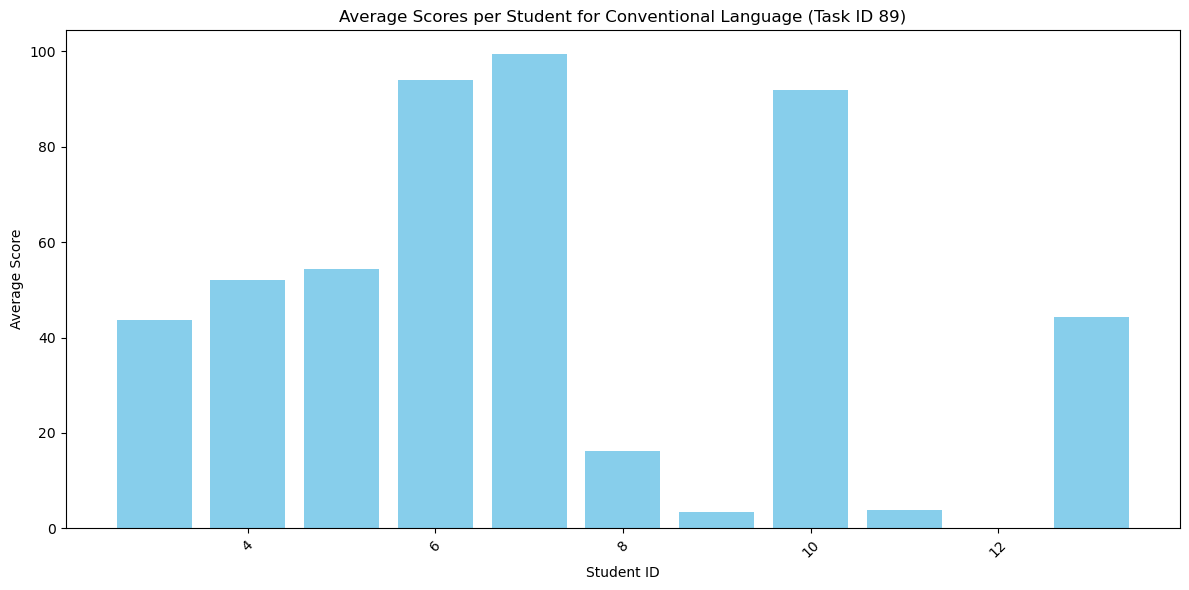

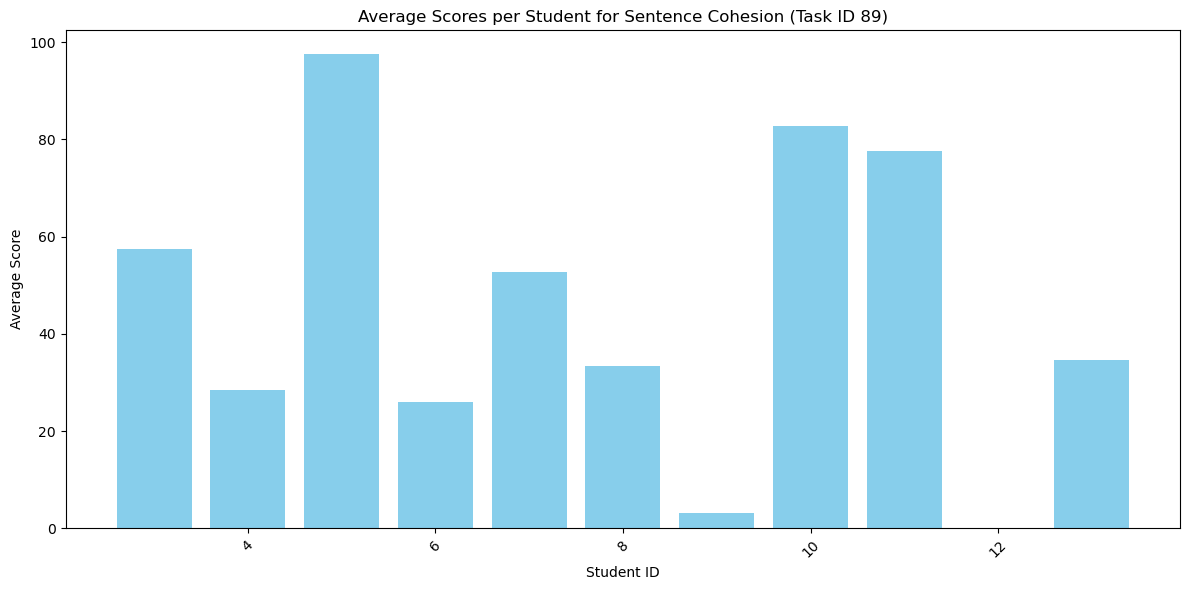

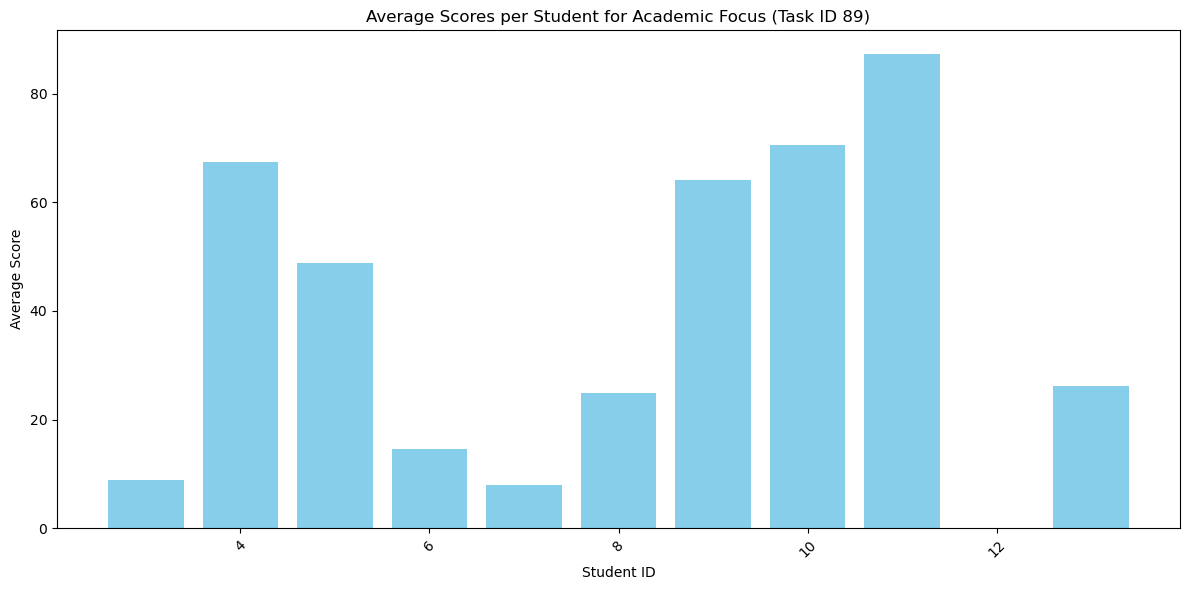

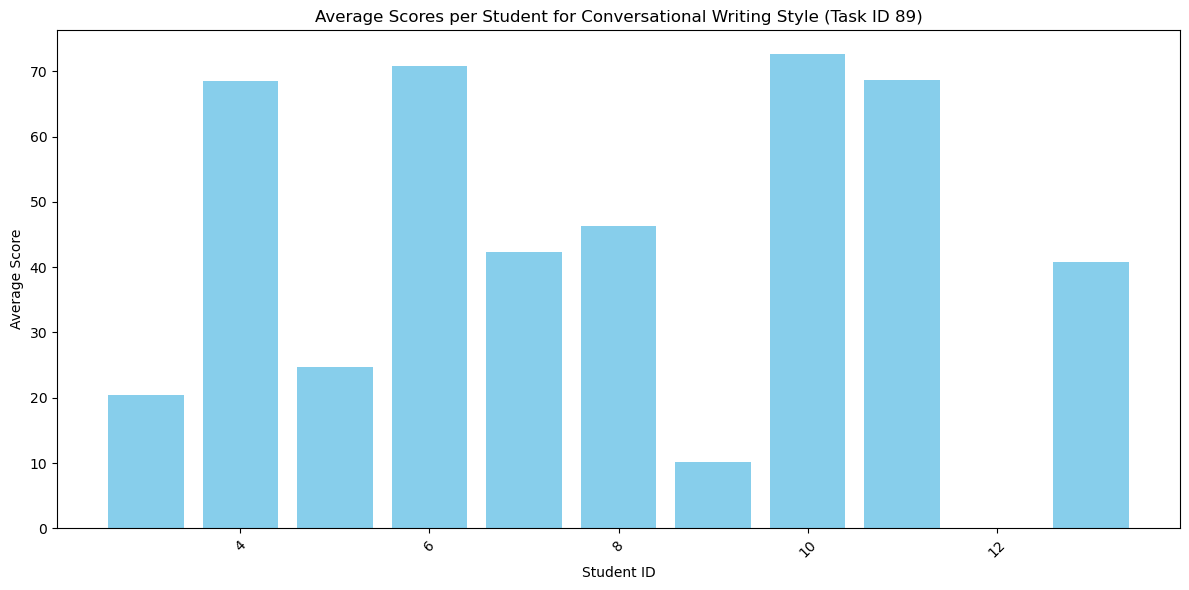

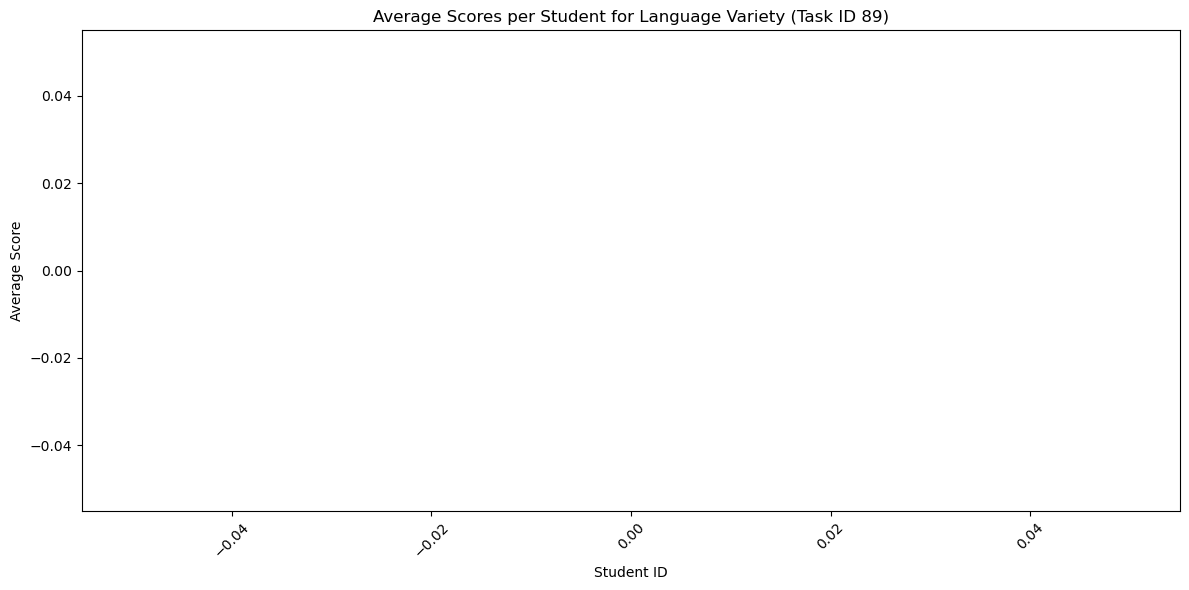

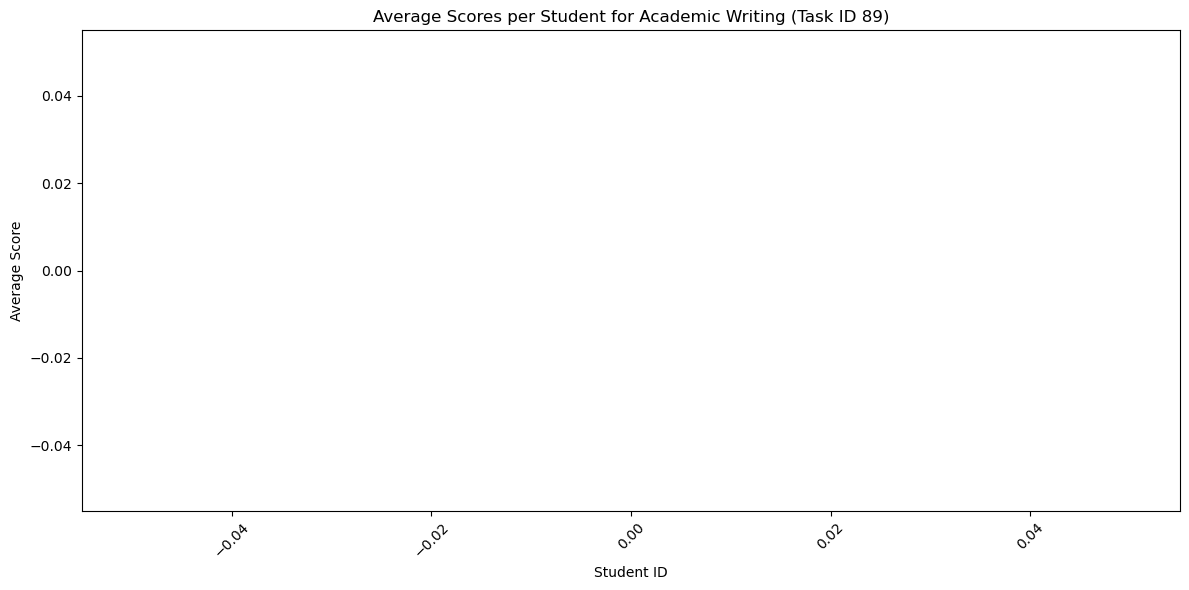

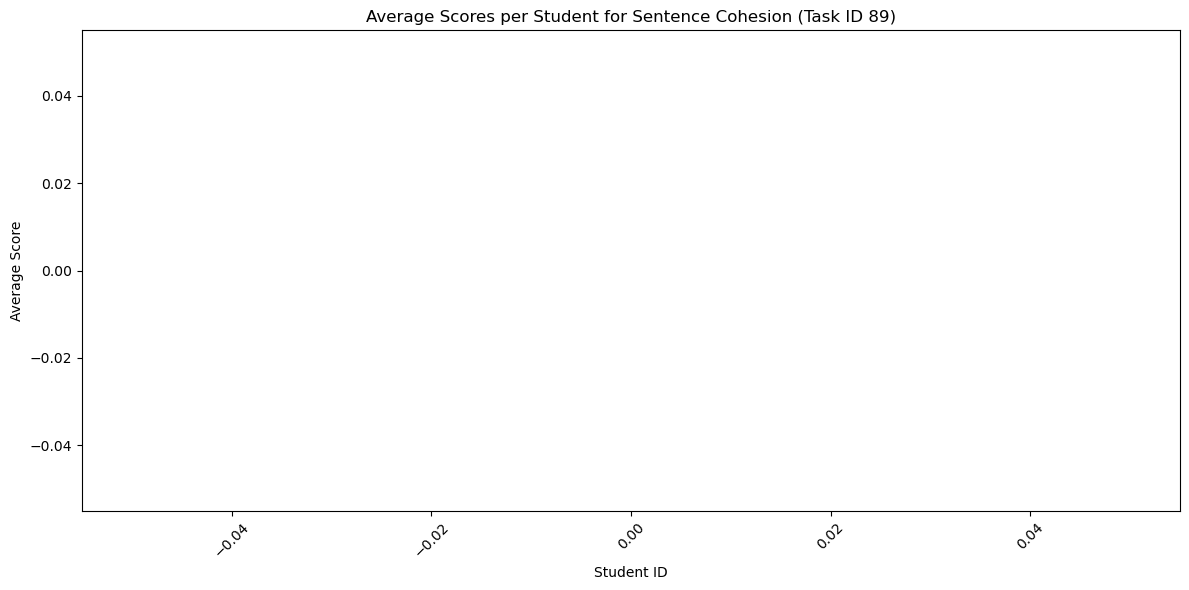

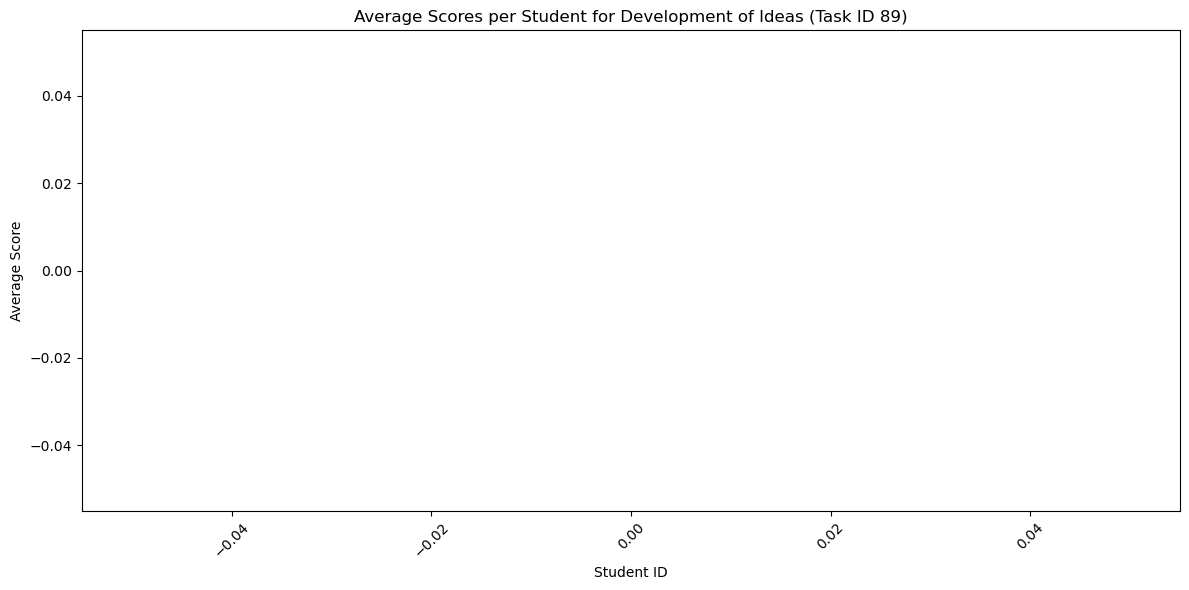

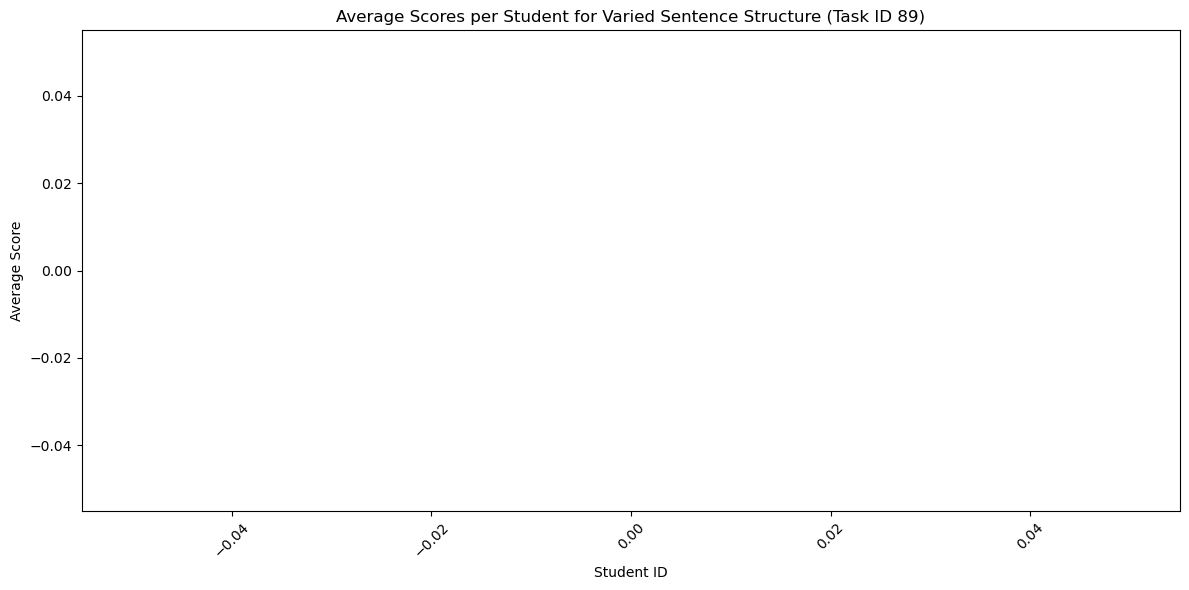

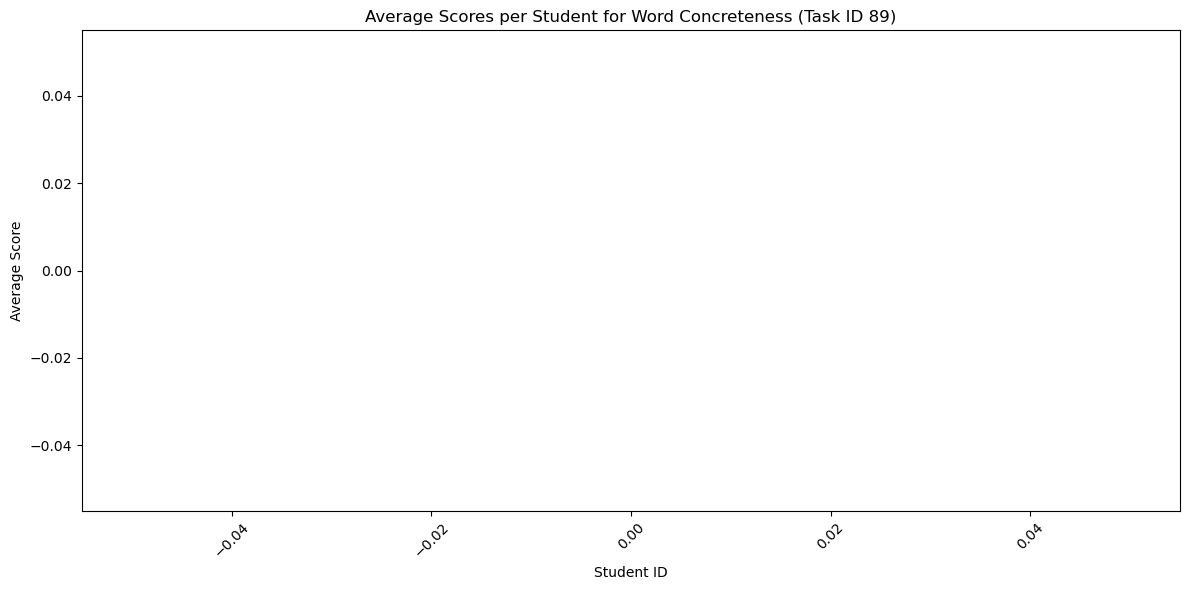

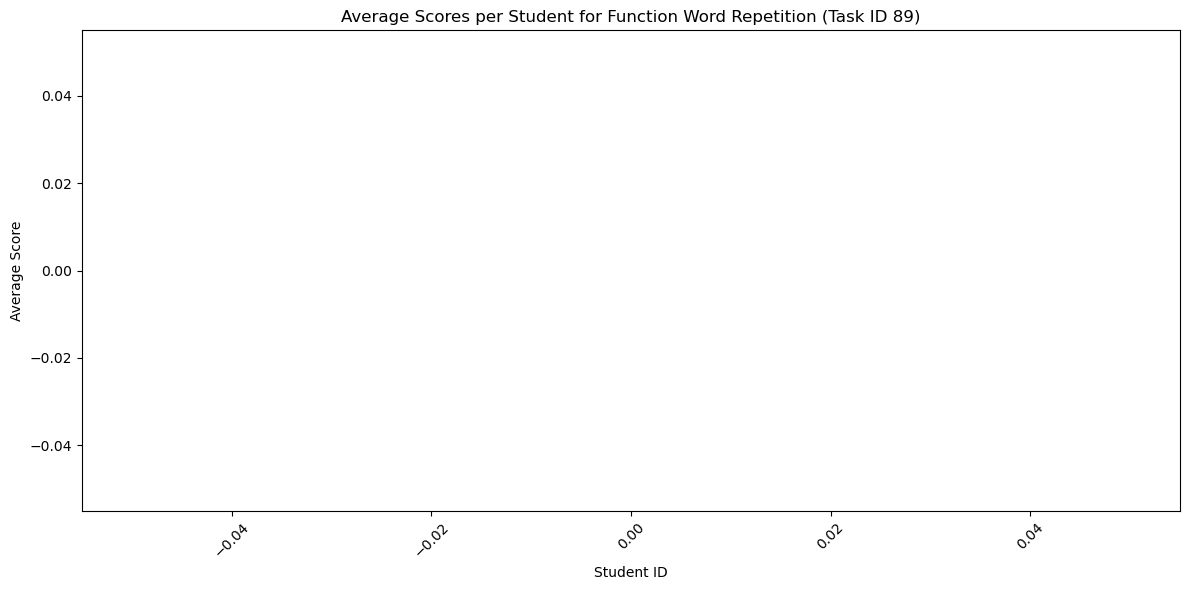

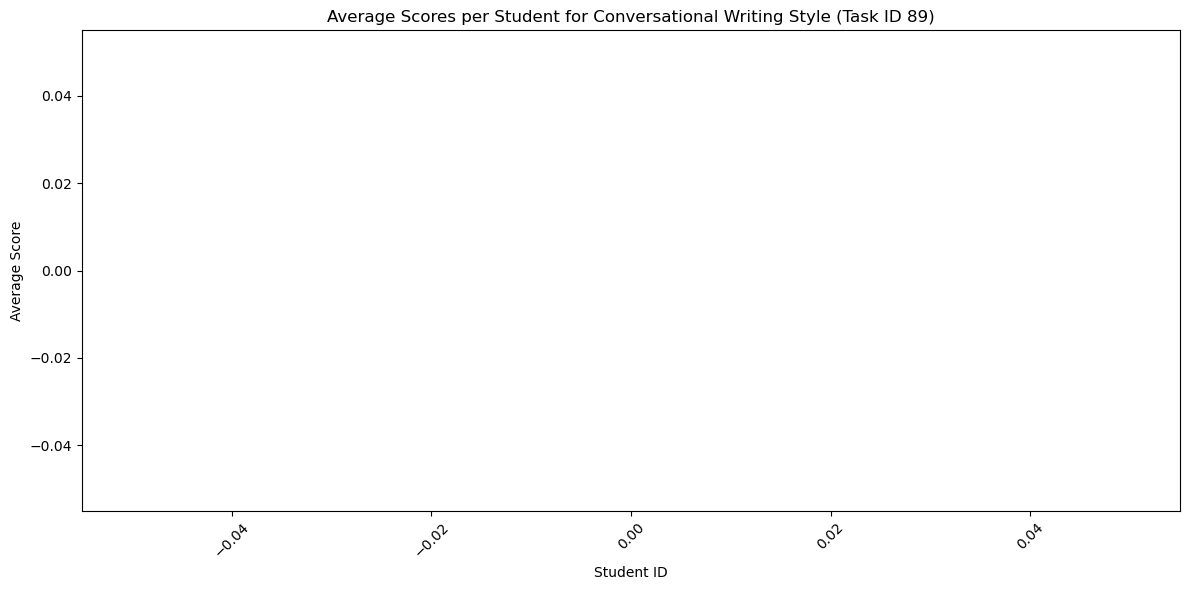

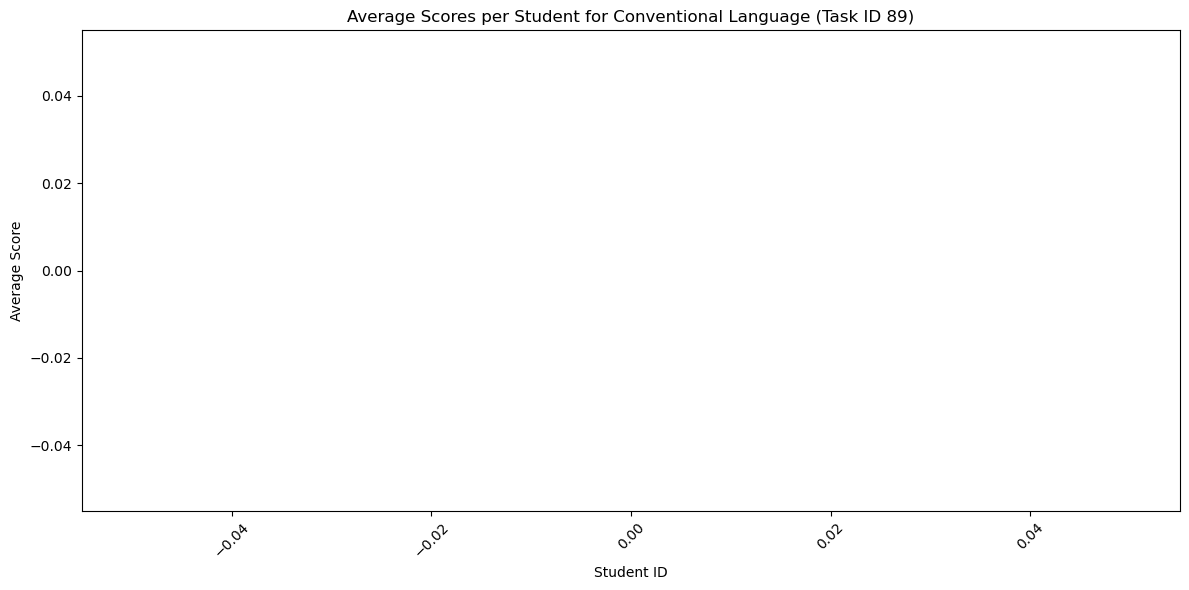

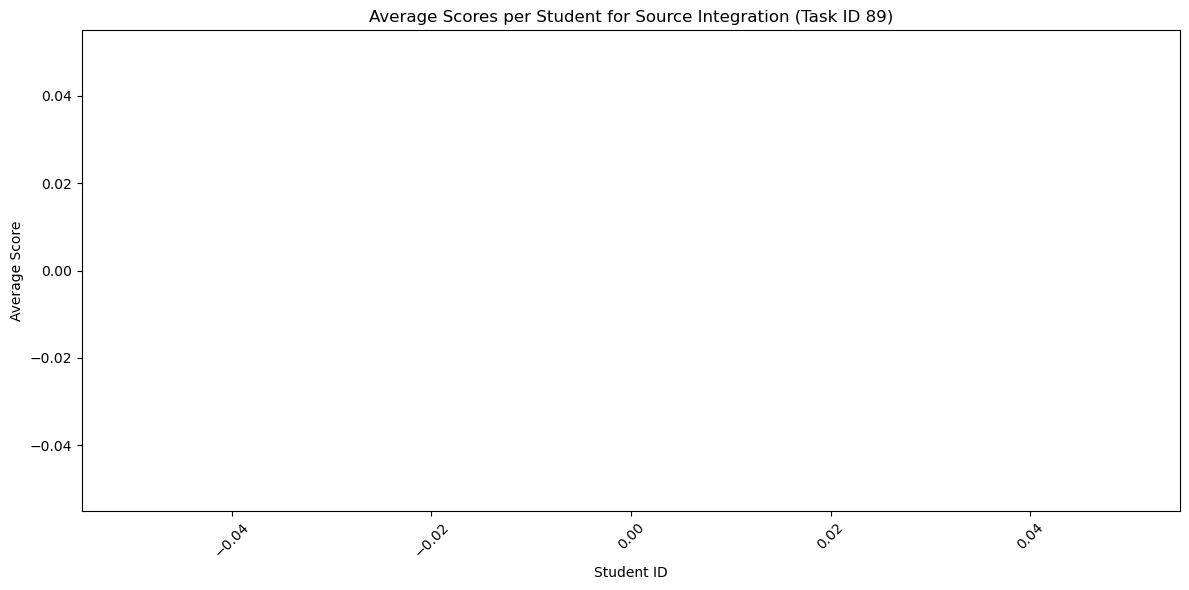

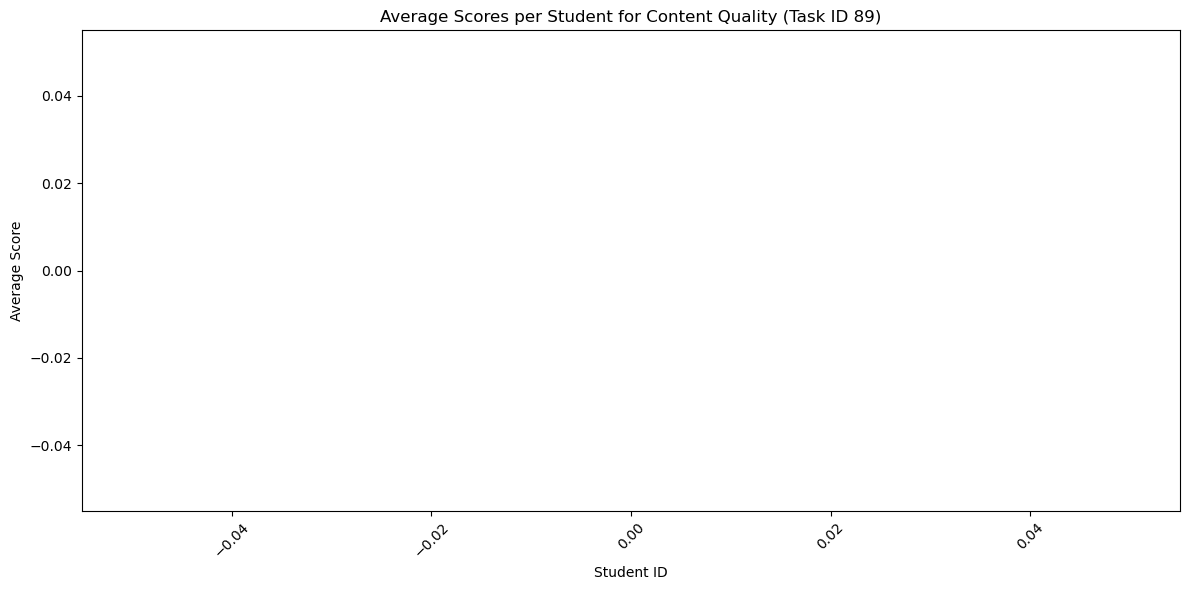

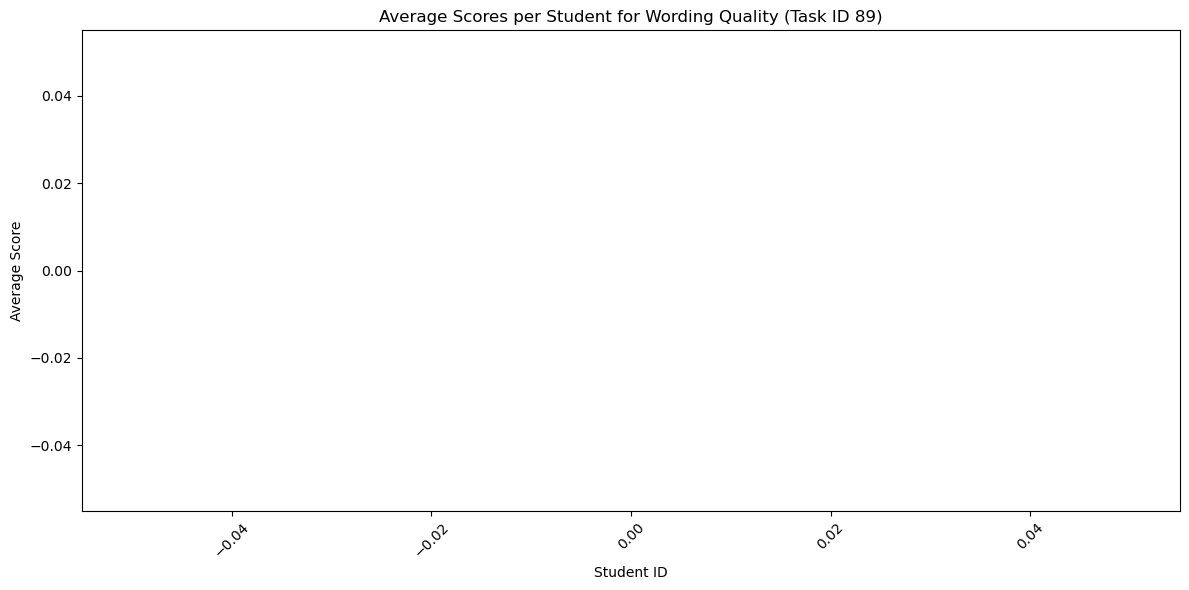

In [92]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_and_task(category_id, task_id):
    # Filter metrics by the given category_id
    metrics = metric_df[metric_df['category_id'] == category_id]

    # Filter essays for the given task_id
    essays_task = essay_df[essay_df['task_id'] == task_id]

    # Iterate over each metric
    for _, metric in metrics.iterrows():
        metric_id = metric['id']
        metric_name = metric['name']
        
        # Filter scores for the current metric and task
        scores_for_metric = essay_score_df[
            (essay_score_df['metric_id'] == metric_id) &
            (essay_score_df['essay_id'].isin(essays_task['id']))
        ]
        
        # Merge with essay_df to get student_id
        scores_with_students = pd.merge(scores_for_metric, essay_df[['id', 'student_id']], left_on='essay_id', right_on='id')
        
        # Calculate average score for each student
        average_scores_per_student = scores_with_students.groupby('student_id')['score'].mean().reset_index()
        
        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.bar(average_scores_per_student['student_id'], average_scores_per_student['score'], color='skyblue')
        plt.xlabel('Student ID')
        plt.ylabel('Average Score')
        plt.title(f'Average Scores per Student for {metric_name} (Task ID {task_id})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
task_id_input = int(input("Enter a task ID: "))
plot_metrics_by_category_and_task(category_id_input, task_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a classroom ID: 1
Enter a task ID: 89


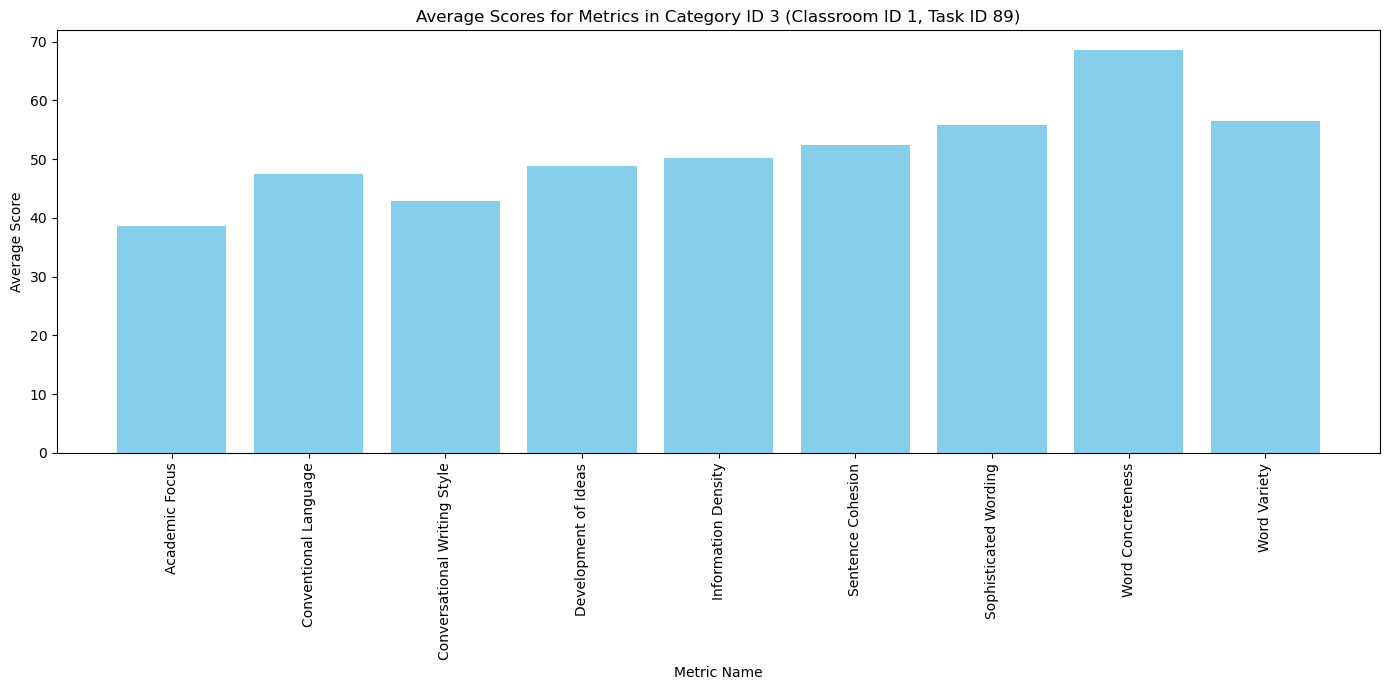

In [96]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_classroom_and_task(category_id, classroom_id, task_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given classroom_id and task_id
    essays_classroom_task = essay_df[(essay_df['classroom_id'] == classroom_id) & 
                                     (essay_df['task_id'] == task_id)]

    # Filter scores for these metrics, classroom, and task
    scores_classroom_task = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_classroom_task['id']))
    ]

    # Merge with metric_df to get metric names
    scores_with_metrics = pd.merge(scores_classroom_task, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric
    average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
    plt.xlabel('Metric Name')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores for Metrics in Category ID {category_id} (Classroom ID {classroom_id}, Task ID {task_id})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
classroom_id_input = int(input("Enter a classroom ID: "))
task_id_input = int(input("Enter a task ID: "))
plot_metrics_by_category_classroom_and_task(category_id_input, classroom_id_input, task_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a student ID: 1
Enter a task ID: 90


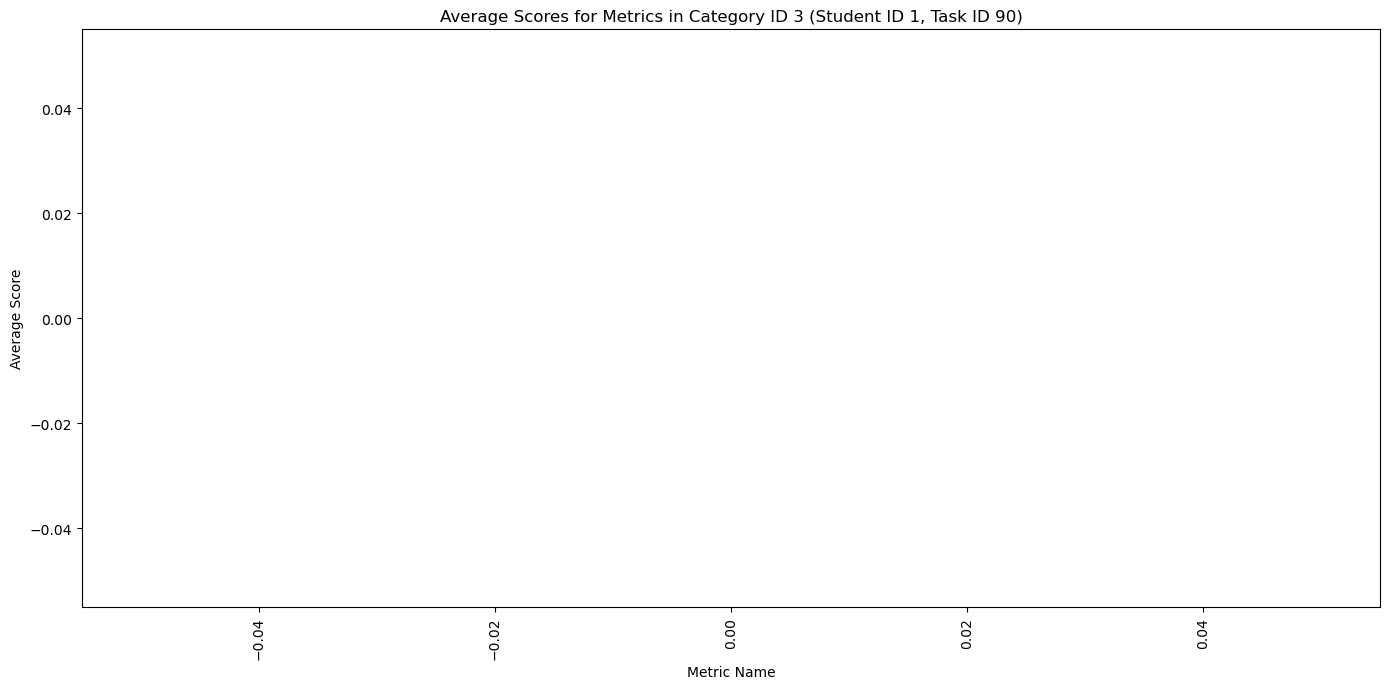

In [99]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_student_and_task(category_id, student_id, task_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given student_id and task_id
    essays_student_task = essay_df[(essay_df['student_id'] == student_id) & 
                                   (essay_df['task_id'] == task_id)]

    # Filter scores for these metrics, student, and task
    scores_student_task = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_student_task['id']))
    ]

    # Merge with metric_df to get metric names
    scores_with_metrics = pd.merge(scores_student_task, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric
    average_scores_per_metric = scores_with_metrics.groupby('name')['score'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.bar(average_scores_per_metric['name'], average_scores_per_metric['score'], color='skyblue')
    plt.xlabel('Metric Name')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores for Metrics in Category ID {category_id} (Student ID {student_id}, Task ID {task_id})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
student_id_input = int(input("Enter a student ID: "))
task_id_input = int(input("Enter a task ID: "))
plot_metrics_by_category_student_and_task(category_id_input, student_id_input, task_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a classroom ID: 1
Enter a task ID: 90


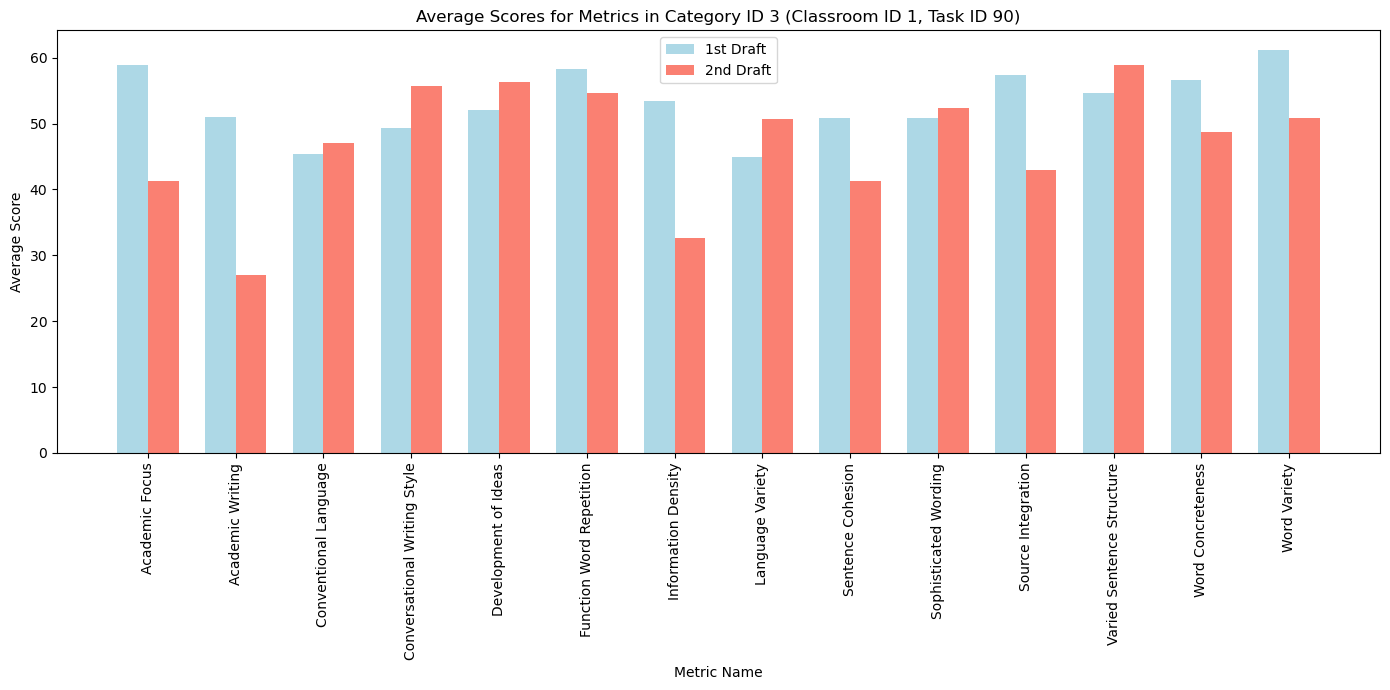

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_bar_by_category_classroom_and_task(category_id, classroom_id, task_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given classroom_id and task_id
    essays_classroom_task = essay_df[(essay_df['classroom_id'] == classroom_id) & 
                                     (essay_df['task_id'] == task_id)]

    # Filter scores for these metrics, classroom, and task
    scores_classroom_task = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_classroom_task['id']))
    ]

    # Merge with metric_df to get metric names and submission_type
    scores_with_metrics = pd.merge(scores_classroom_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
    scores_with_metrics = pd.merge(scores_with_metrics, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric and submission type
    average_scores_per_metric = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()

    # Plot the results
    fig, ax = plt.subplots(figsize=(14, 7))
    index = np.arange(len(average_scores_per_metric))
    bar_width = 0.35

    bar1 = ax.bar(index, average_scores_per_metric.get('1st Draft', 0), bar_width, label='1st Draft', color='lightblue')
    bar2 = ax.bar(index + bar_width, average_scores_per_metric.get('2nd Draft', 0), bar_width, label='2nd Draft', color='salmon')

    ax.set_xlabel('Metric Name')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores for Metrics in Category ID {category_id} (Classroom ID {classroom_id}, Task ID {task_id})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(average_scores_per_metric.index, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
classroom_id_input = int(input("Enter a classroom ID: "))
task_id_input = int(input("Enter a task ID: "))
plot_double_bar_by_category_classroom_and_task(category_id_input, classroom_id_input, task_id_input)

Enter a category ID (1, 2, or 3): 3
Enter a student ID: 3
Enter a task ID: 90


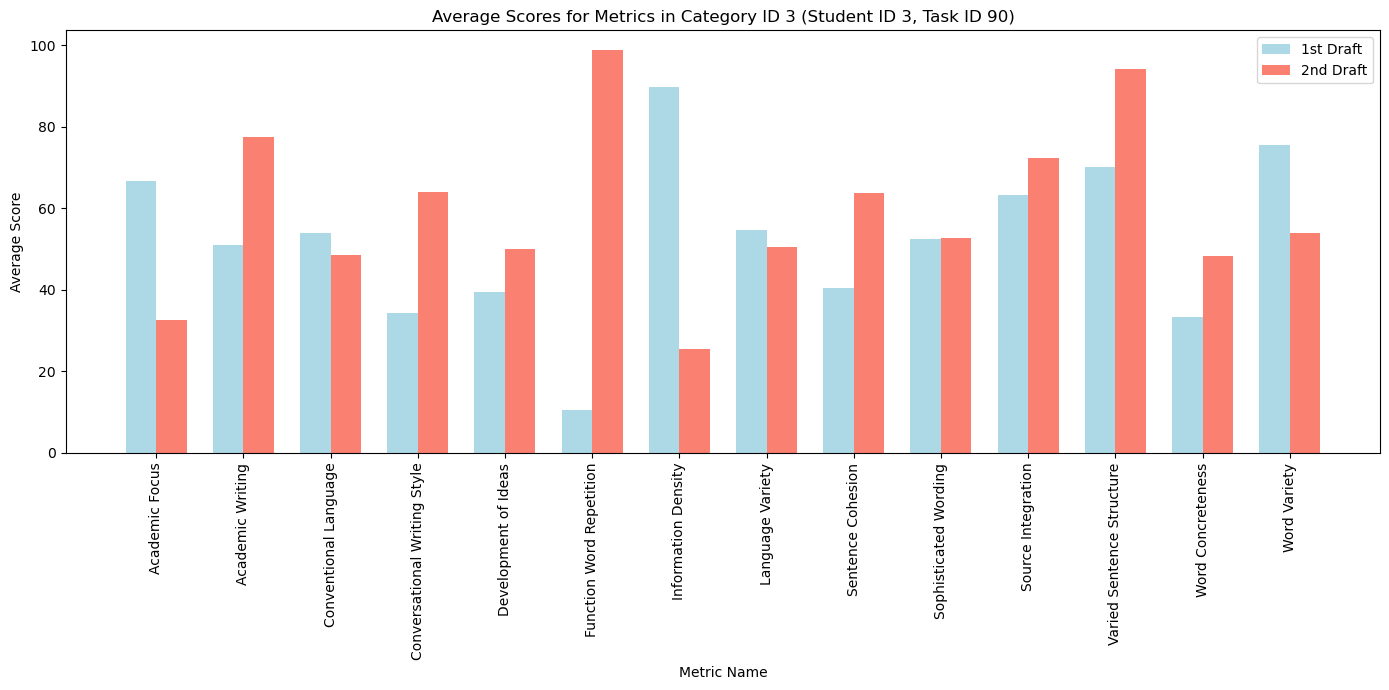

In [105]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_bar_by_category_student_and_task(category_id, student_id, task_id):
    # Filter metrics by the given category_id, excluding specific names
    metrics = metric_df[(metric_df['category_id'] == category_id) & 
                        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))]['id']

    # Filter essays for the given student_id and task_id
    essays_student_task = essay_df[(essay_df['student_id'] == student_id) & 
                                   (essay_df['task_id'] == task_id)]

    # Filter scores for these metrics, student, and task
    scores_student_task = essay_score_df[
        (essay_score_df['metric_id'].isin(metrics)) &
        (essay_score_df['essay_id'].isin(essays_student_task['id']))
    ]

    # Merge with metric_df to get metric names and submission_type
    scores_with_metrics = pd.merge(scores_student_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
    scores_with_metrics = pd.merge(scores_with_metrics, metric_df[['id', 'name']], left_on='metric_id', right_on='id')

    # Calculate average score for each metric and submission type
    average_scores_per_metric = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()

    # Plot the results
    fig, ax = plt.subplots(figsize=(14, 7))
    index = np.arange(len(average_scores_per_metric))
    bar_width = 0.35

    bar1 = ax.bar(index, average_scores_per_metric.get('1st Draft', 0), bar_width, label='1st Draft', color='lightblue')
    bar2 = ax.bar(index + bar_width, average_scores_per_metric.get('2nd Draft', 0), bar_width, label='2nd Draft', color='salmon')

    ax.set_xlabel('Metric Name')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores for Metrics in Category ID {category_id} (Student ID {student_id}, Task ID {task_id})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(average_scores_per_metric.index, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID (1, 2, or 3): "))
student_id_input = int(input("Enter a student ID: "))
task_id_input = int(input("Enter a task ID: "))
plot_double_bar_by_category_student_and_task(category_id_input, student_id_input, task_id_input)

Enter a classroom ID: 1


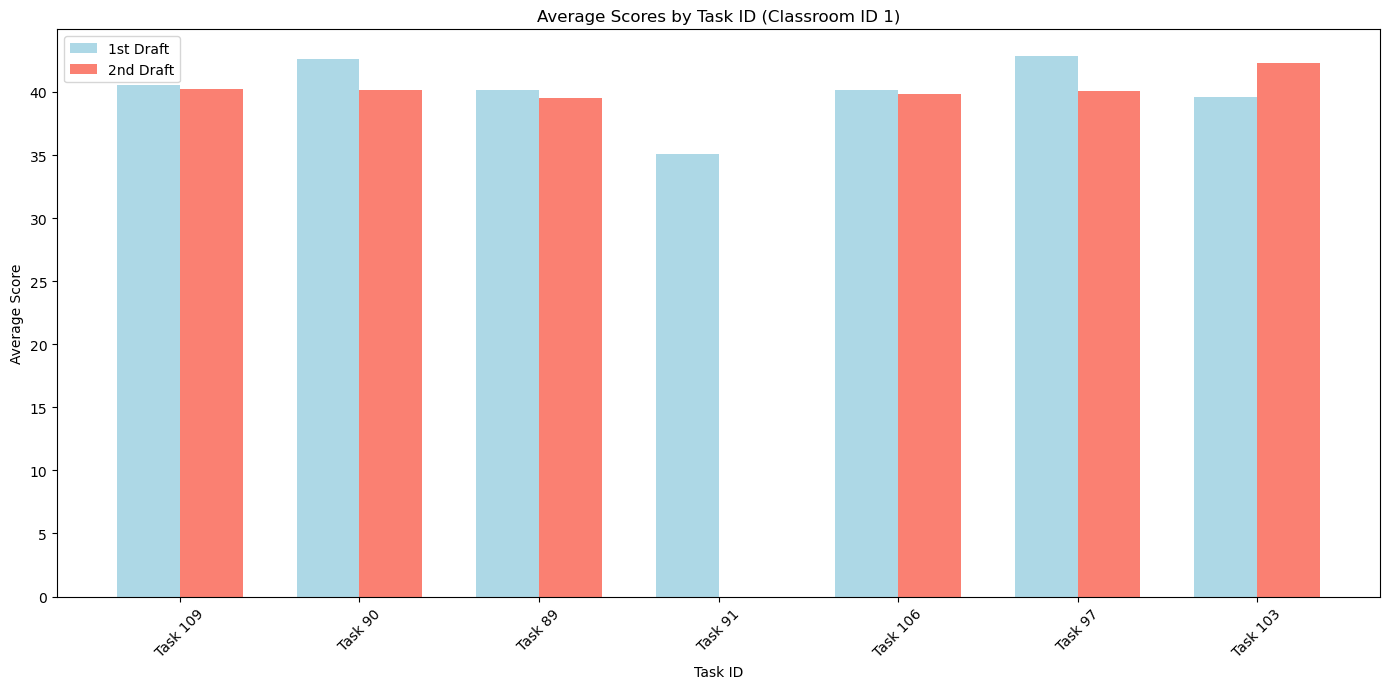

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def plot_task_scores_by_classroom(classroom_id):
    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]

    # Get unique task IDs for this classroom
    task_ids = essays_classroom['task_id'].unique()

    # Prepare data for plotting
    scores_list = []
    task_names = []

    for task_id in task_ids:
        # Filter essays for each task
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        
        # Filter scores for these essays
        scores_for_task = essay_score_df[essay_score_df['essay_id'].isin(essays_task['id'])]

        # Merge with essay_df to get submission_type
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')

        # Calculate average score for each submission type
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()

        scores_list.append(average_scores)
        task_names.append(f'Task {task_id}')

    # Plot the results
    fig, ax = plt.subplots(figsize=(14, 7))
    index = np.arange(len(task_ids))
    bar_width = 0.35

    bar1 = ax.bar(index, [scores.get('1st Draft', 0) for scores in scores_list], bar_width, label='1st Draft', color='lightblue')
    bar2 = ax.bar(index + bar_width, [scores.get('2nd Draft', 0) for scores in scores_list], bar_width, label='2nd Draft', color='salmon')

    ax.set_xlabel('Task ID')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores by Task ID (Classroom ID {classroom_id})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(task_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
classroom_id_input = int(input("Enter a classroom ID: "))
plot_task_scores_by_classroom(classroom_id_input)

Enter a classroom ID: 1


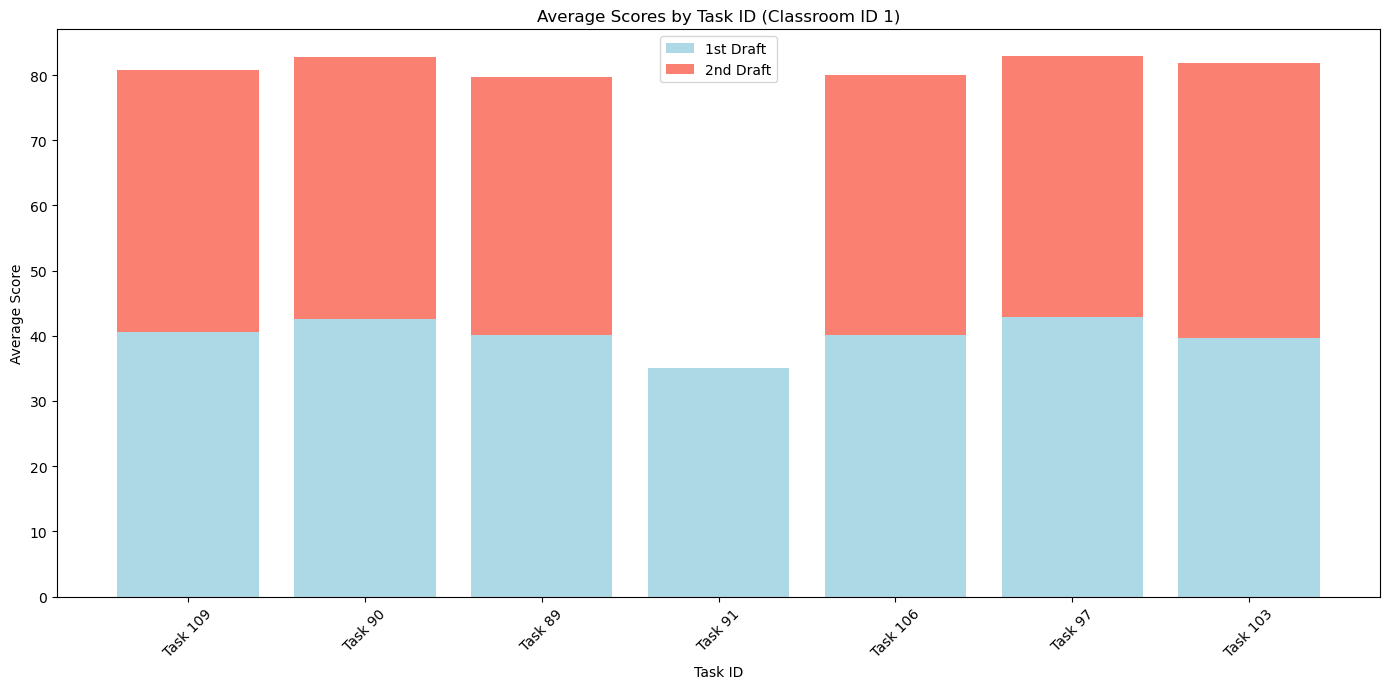

In [108]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stacked_bar_chart(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    task_ids = essays_classroom['task_id'].unique()
    
    first_draft_scores = []
    second_draft_scores = []
    task_names = []

    for task_id in task_ids:
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        scores_for_task = essay_score_df[essay_score_df['essay_id'].isin(essays_task['id'])]
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()
        
        first_draft_scores.append(average_scores.get('1st Draft', 0))
        second_draft_scores.append(average_scores.get('2nd Draft', 0))
        task_names.append(f'Task {task_id}')

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(task_names, first_draft_scores, label='1st Draft', color='lightblue')
    ax.bar(task_names, second_draft_scores, bottom=first_draft_scores, label='2nd Draft', color='salmon')

    ax.set_xlabel('Task ID')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores by Task ID (Classroom ID {classroom_id})')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_stacked_bar_chart(classroom_id_input)

Enter a classroom ID: 1


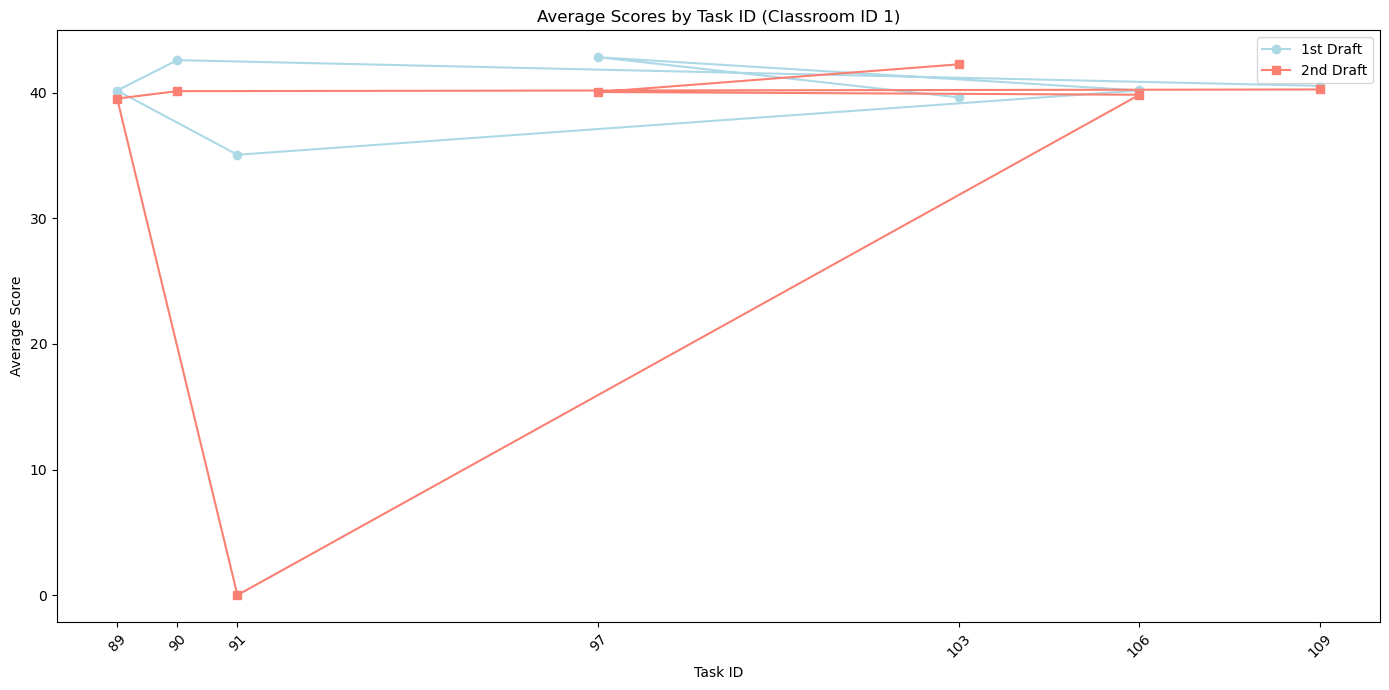

In [109]:
import matplotlib.pyplot as plt

def plot_line_chart(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    task_ids = essays_classroom['task_id'].unique()
    
    first_draft_scores = []
    second_draft_scores = []

    for task_id in task_ids:
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        scores_for_task = essay_score_df[essay_score_df['essay_id'].isin(essays_task['id'])]
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()
        
        first_draft_scores.append(average_scores.get('1st Draft', 0))
        second_draft_scores.append(average_scores.get('2nd Draft', 0))

    plt.figure(figsize=(14, 7))
    plt.plot(task_ids, first_draft_scores, marker='o', label='1st Draft', color='lightblue')
    plt.plot(task_ids, second_draft_scores, marker='s', label='2nd Draft', color='salmon')

    plt.xlabel('Task ID')
    plt.ylabel('Average Score')
    plt.title(f'Average Scores by Task ID (Classroom ID {classroom_id})')
    plt.legend()
    plt.xticks(task_ids, rotation=45)
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_line_chart(classroom_id_input)

Enter a classroom ID: 1


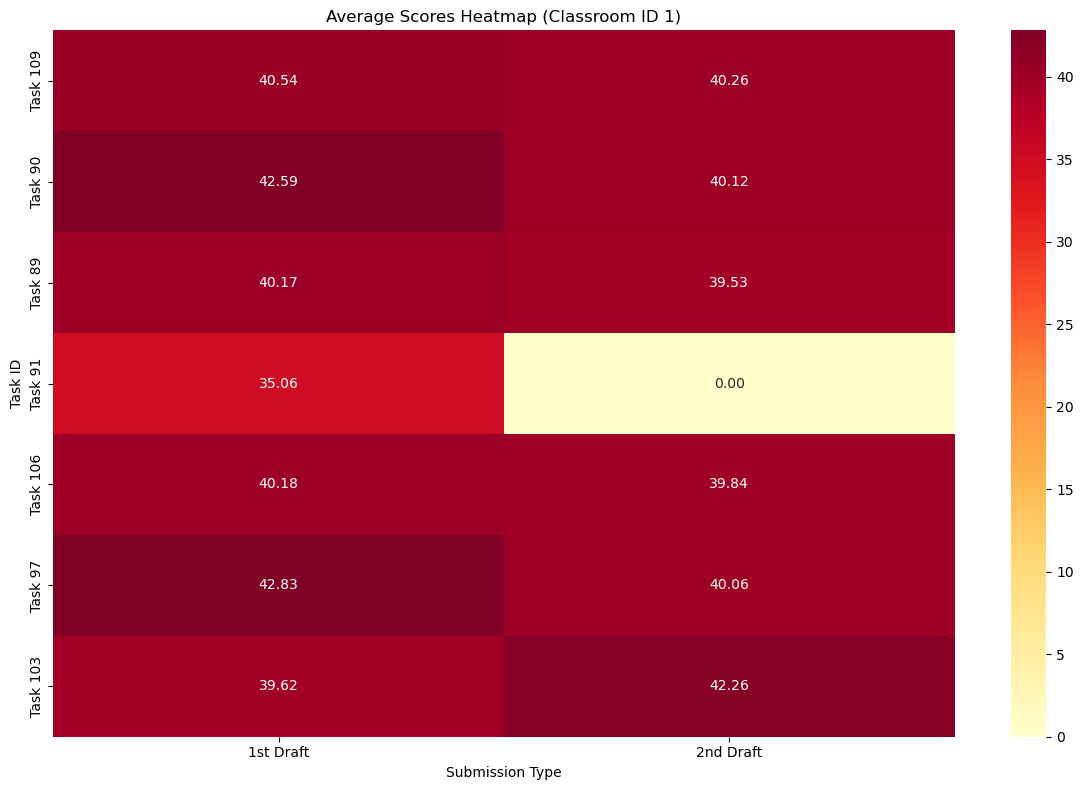

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    task_ids = essays_classroom['task_id'].unique()
    
    data = []
    for task_id in task_ids:
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        scores_for_task = essay_score_df[essay_score_df['essay_id'].isin(essays_task['id'])]
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()
        data.append([average_scores.get('1st Draft', 0), average_scores.get('2nd Draft', 0)])

    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlOrRd", 
                xticklabels=['1st Draft', '2nd Draft'], 
                yticklabels=[f'Task {tid}' for tid in task_ids])
    plt.xlabel('Submission Type')
    plt.ylabel('Task ID')
    plt.title(f'Average Scores Heatmap (Classroom ID {classroom_id})')
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_heatmap(classroom_id_input)

Enter a classroom ID: 1


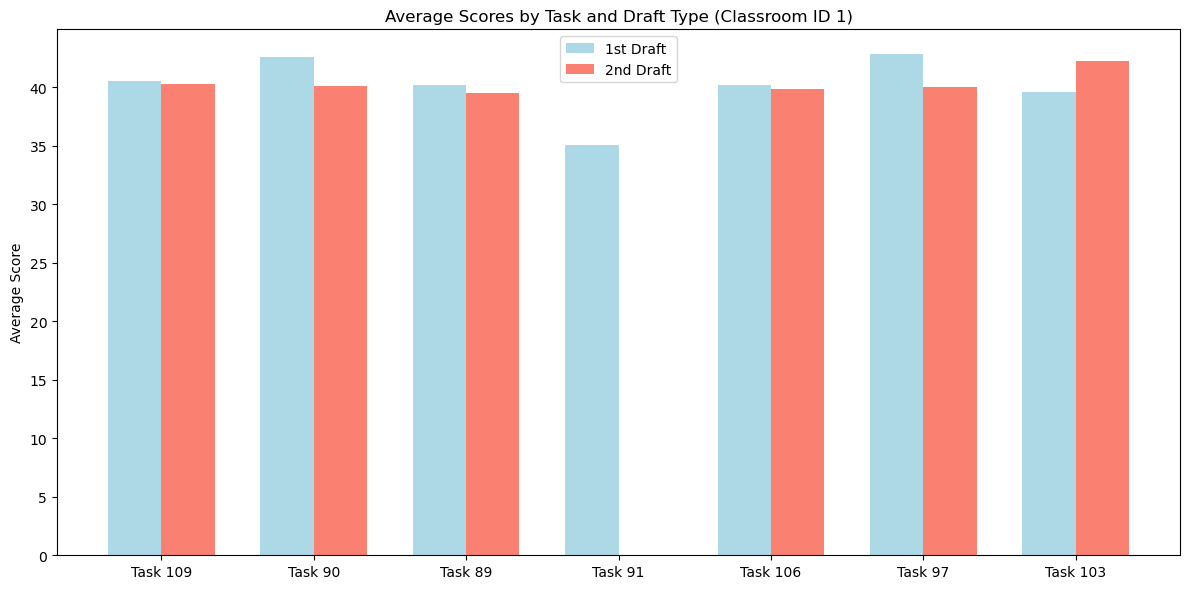

In [111]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bar_chart(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    task_ids = essays_classroom['task_id'].unique()
    
    first_draft_scores = []
    second_draft_scores = []
    task_names = []

    for task_id in task_ids:
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        scores_for_task = essay_score_df[essay_score_df['essay_id'].isin(essays_task['id'])]
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()
        
        first_draft_scores.append(average_scores.get('1st Draft', 0))
        second_draft_scores.append(average_scores.get('2nd Draft', 0))
        task_names.append(f'Task {task_id}')

    x = np.arange(len(task_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, first_draft_scores, width, label='1st Draft', color='lightblue')
    rects2 = ax.bar(x + width/2, second_draft_scores, width, label='2nd Draft', color='salmon')

    ax.set_ylabel('Average Score')
    ax.set_title(f'Average Scores by Task and Draft Type (Classroom ID {classroom_id})')
    ax.set_xticks(x)
    ax.set_xticklabels(task_names)
    ax.legend()

    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_grouped_bar_chart(classroom_id_input)


Enter a classroom ID: 1


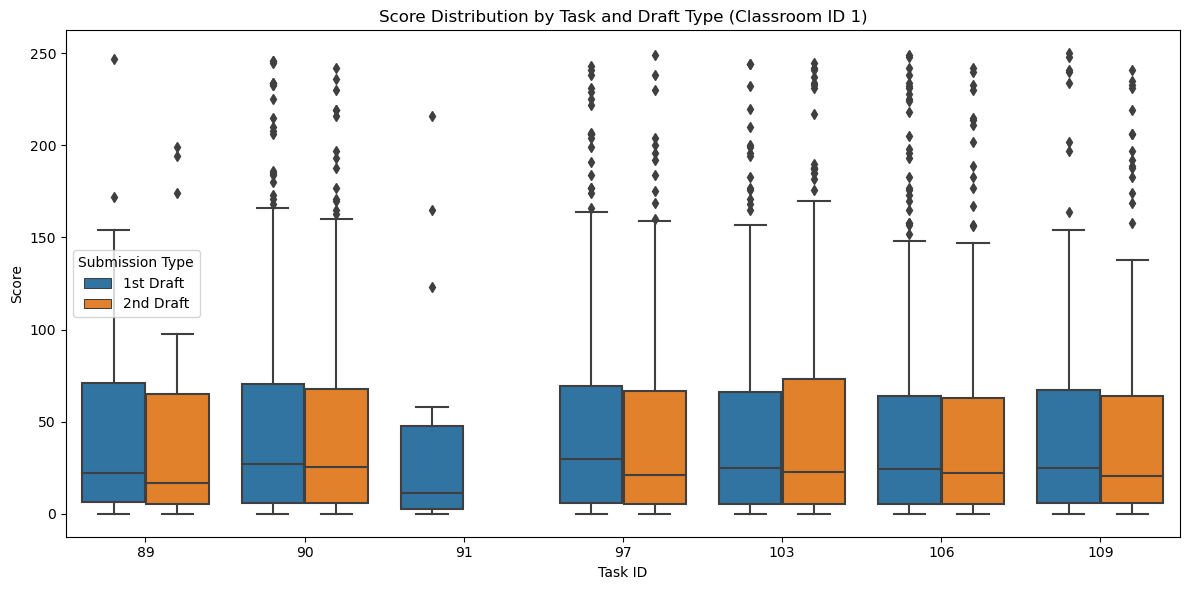

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_plot(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    scores_classroom = essay_score_df[essay_score_df['essay_id'].isin(essays_classroom['id'])]
    scores_with_info = pd.merge(scores_classroom, essays_classroom[['id', 'task_id', 'submission_type']], left_on='essay_id', right_on='id')

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='task_id', y='score', hue='submission_type', data=scores_with_info)
    plt.title(f'Score Distribution by Task and Draft Type (Classroom ID {classroom_id})')
    plt.xlabel('Task ID')
    plt.ylabel('Score')
    plt.legend(title='Submission Type')
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_box_plot(classroom_id_input)


Enter a classroom ID: 1


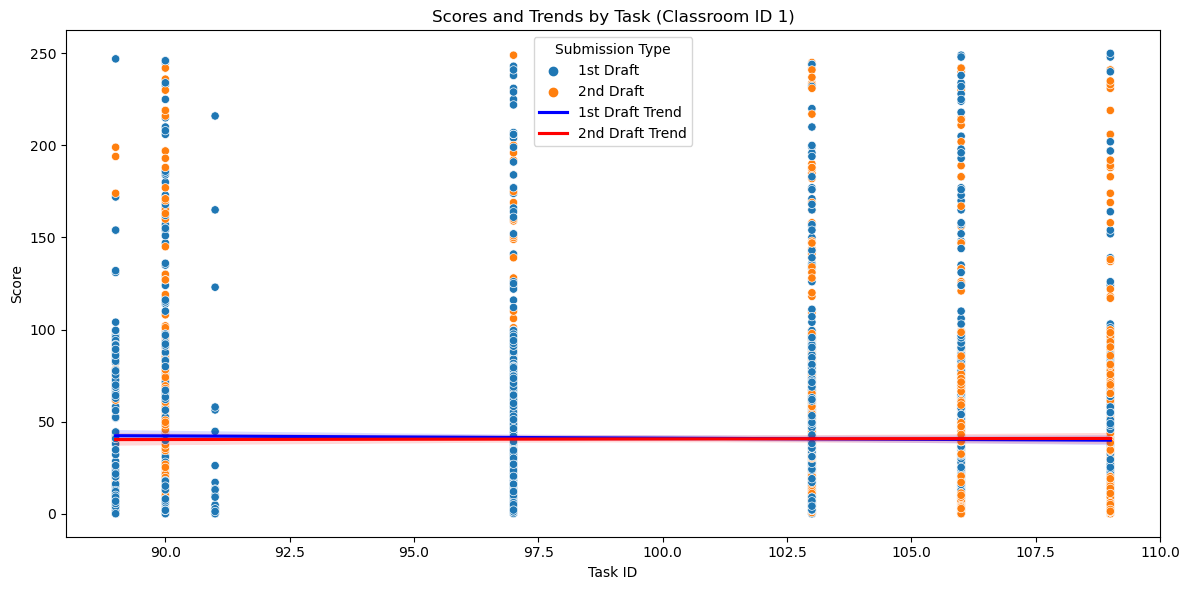

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_with_trend(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    scores_classroom = essay_score_df[essay_score_df['essay_id'].isin(essays_classroom['id'])]
    scores_with_info = pd.merge(scores_classroom, essays_classroom[['id', 'task_id', 'submission_type']], left_on='essay_id', right_on='id')

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='task_id', y='score', hue='submission_type', data=scores_with_info)
    sns.regplot(x='task_id', y='score', data=scores_with_info[scores_with_info['submission_type'] == '1st Draft'], 
                scatter=False, color='blue', label='1st Draft Trend')
    sns.regplot(x='task_id', y='score', data=scores_with_info[scores_with_info['submission_type'] == '2nd Draft'], 
                scatter=False, color='red', label='2nd Draft Trend')

    plt.title(f'Scores and Trends by Task (Classroom ID {classroom_id})')
    plt.xlabel('Task ID')
    plt.ylabel('Score')
    plt.legend(title='Submission Type')
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_scatter_with_trend(classroom_id_input)


Enter a classroom ID: 1


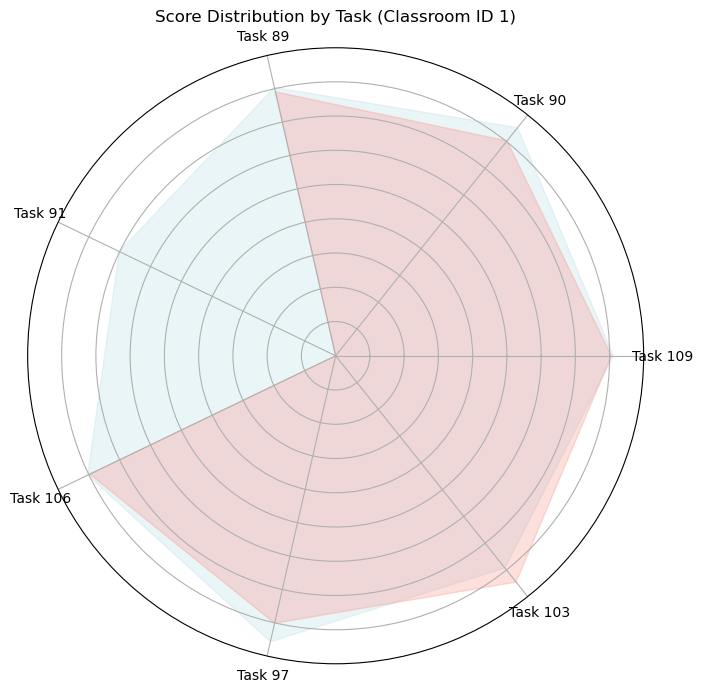

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    task_ids = essays_classroom['task_id'].unique()

    first_draft_scores = []
    second_draft_scores = []

    for task_id in task_ids:
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        scores_for_task = essay_score_df[essay_score_df['essay_id'].isin(essays_task['id'])]
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()
        
        first_draft_scores.append(average_scores.get('1st Draft', 0))
        second_draft_scores.append(average_scores.get('2nd Draft', 0))

    labels = [f'Task {tid}' for tid in task_ids]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

    first_draft_scores += first_draft_scores[:1]
    second_draft_scores += second_draft_scores[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, first_draft_scores, color='lightblue', alpha=0.25)
    ax.fill(angles, second_draft_scores, color='salmon', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f'Score Distribution by Task (Classroom ID {classroom_id})')
    
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_radar_chart(classroom_id_input)


Enter a classroom ID: 1


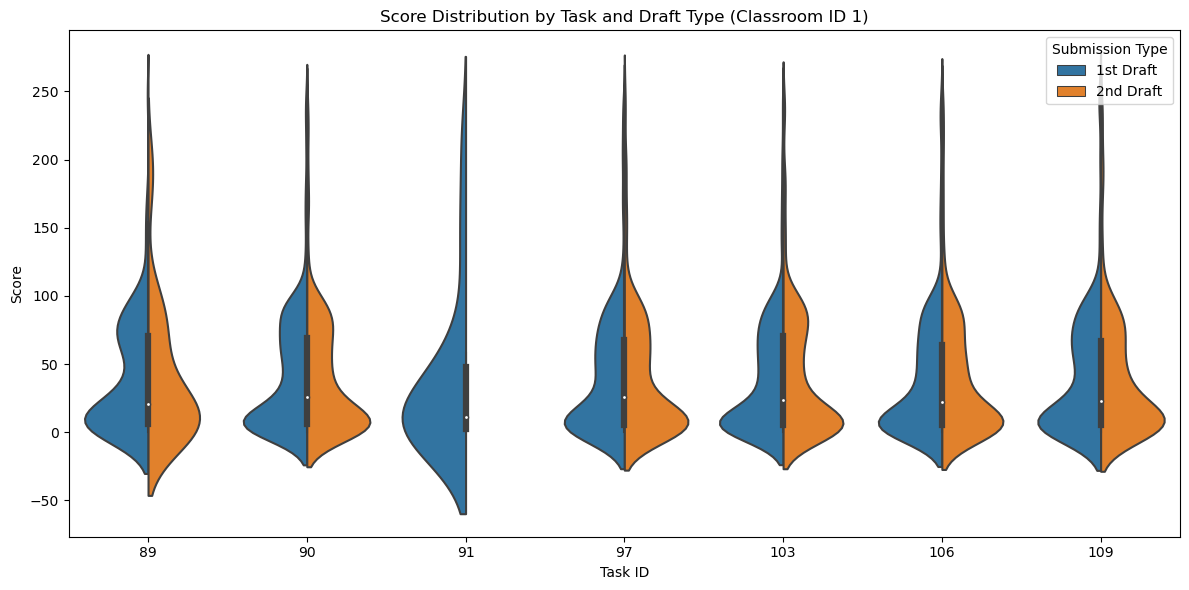

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_violin_plot(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    scores_classroom = essay_score_df[essay_score_df['essay_id'].isin(essays_classroom['id'])]
    scores_with_info = pd.merge(scores_classroom, essays_classroom[['id', 'task_id', 'submission_type']], left_on='essay_id', right_on='id')

    plt.figure(figsize=(12, 6))
    sns.violinplot(x='task_id', y='score', hue='submission_type', data=scores_with_info, split=True)
    plt.title(f'Score Distribution by Task and Draft Type (Classroom ID {classroom_id})')
    plt.xlabel('Task ID')
    plt.ylabel('Score')
    plt.legend(title='Submission Type')
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_violin_plot(classroom_id_input)


Enter a classroom ID: 1


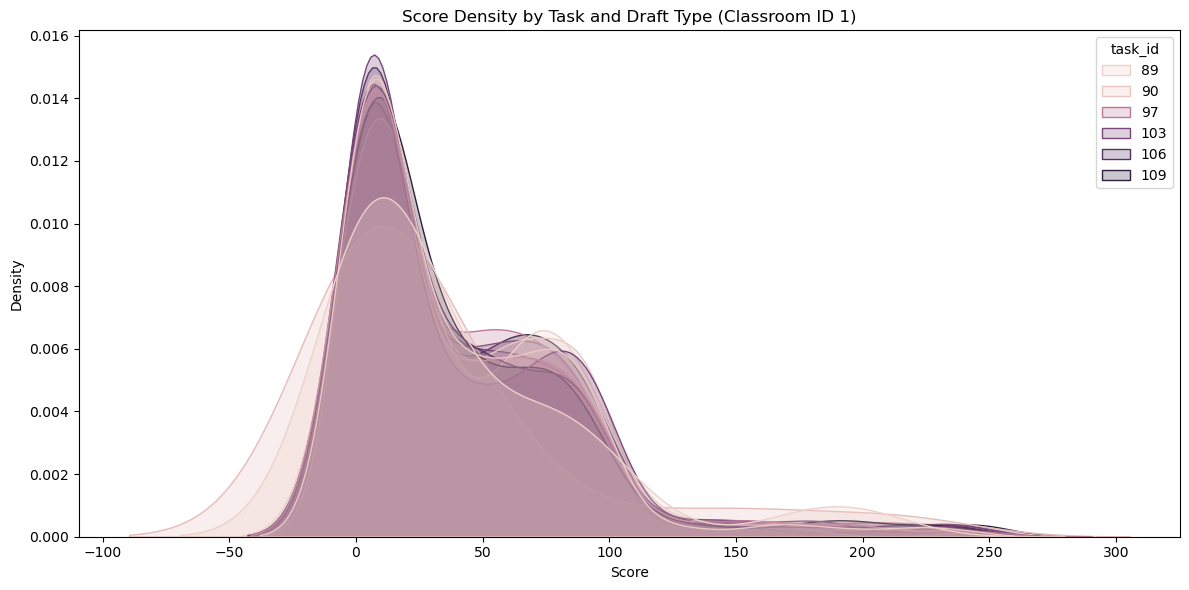

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_plot(classroom_id):
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    scores_classroom = essay_score_df[essay_score_df['essay_id'].isin(essays_classroom['id'])]
    scores_with_info = pd.merge(scores_classroom, essays_classroom[['id', 'task_id', 'submission_type']], left_on='essay_id', right_on='id')

    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=scores_with_info[scores_with_info['submission_type'] == '1st Draft'], x='score', hue='task_id', fill=True, common_norm=False)
    sns.kdeplot(data=scores_with_info[scores_with_info['submission_type'] == '2nd Draft'], x='score', hue='task_id', fill=True, common_norm=False)

    plt.title(f'Score Density by Task and Draft Type (Classroom ID {classroom_id})')
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

classroom_id_input = int(input("Enter a classroom ID: "))
plot_density_plot(classroom_id_input)


Enter a category ID: 3
Enter a classroom ID: 1


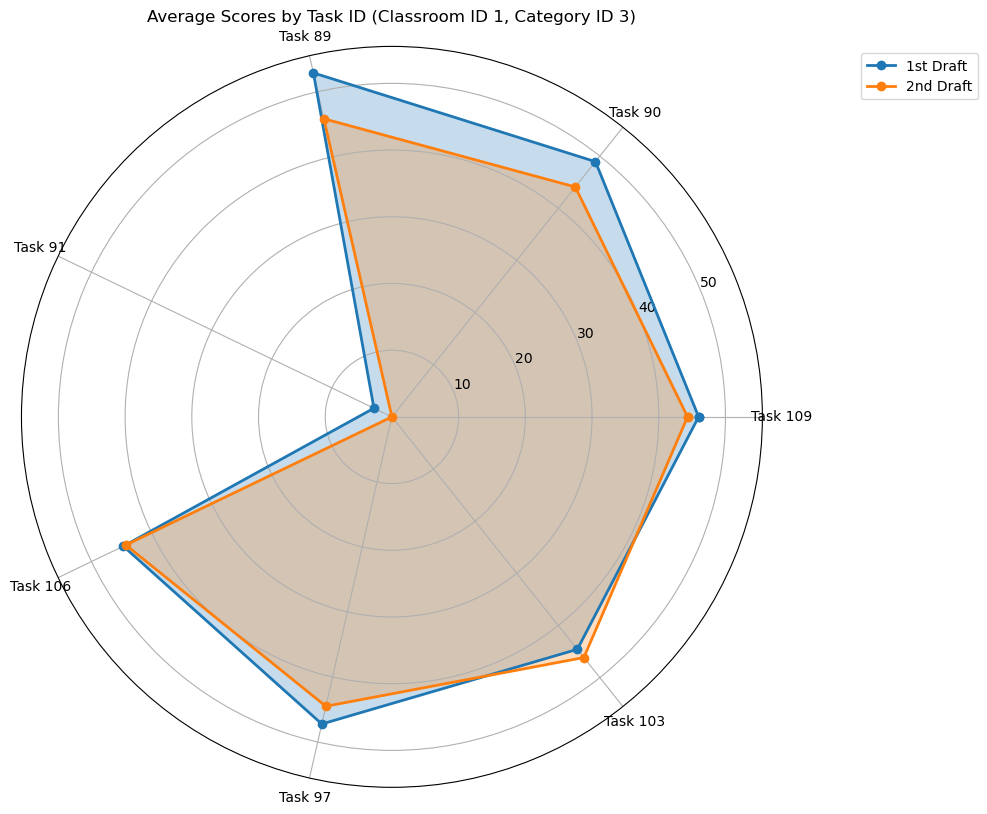

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart_by_category_and_classroom(category_id, classroom_id):
    # Filter metrics by the given category_id
    metrics = metric_df[metric_df['category_id'] == category_id]['id']

    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]

    # Get unique task IDs for this classroom
    task_ids = essays_classroom['task_id'].unique()

    # Prepare data for plotting
    first_draft_scores = []
    second_draft_scores = []
    task_names = []

    for task_id in task_ids:
        # Filter essays for each task
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        
        # Filter scores for these essays and metrics
        scores_for_task = essay_score_df[
            (essay_score_df['essay_id'].isin(essays_task['id'])) &
            (essay_score_df['metric_id'].isin(metrics))
        ]

        # Merge with essay_df to get submission_type
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')

        # Calculate average score for each submission type
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()

        first_draft_scores.append(average_scores.get('1st Draft', 0))
        second_draft_scores.append(average_scores.get('2nd Draft', 0))
        task_names.append(f'Task {task_id}')

    # Prepare data for radar chart
    angles = np.linspace(0, 2 * np.pi, len(task_names), endpoint=False).tolist()

    # Close the polygon by appending the start value to the end
    first_draft_scores.append(first_draft_scores[0])
    second_draft_scores.append(second_draft_scores[0])
    angles.append(angles[0])

    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    ax.plot(angles, first_draft_scores, 'o-', linewidth=2, label='1st Draft')
    ax.fill(angles, first_draft_scores, alpha=0.25)
    ax.plot(angles, second_draft_scores, 'o-', linewidth=2, label='2nd Draft')
    ax.fill(angles, second_draft_scores, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(task_names)
    ax.set_title(f'Average Scores by Task ID (Classroom ID {classroom_id}, Category ID {category_id})')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

    plt.tight_layout()
    plt.show()

# Example usage:
category_id_input = int(input("Enter a category ID: "))
classroom_id_input = int(input("Enter a classroom ID: "))
plot_radar_chart_by_category_and_classroom(category_id_input, classroom_id_input)


Enter a category ID: 3
Enter a classroom ID: 1


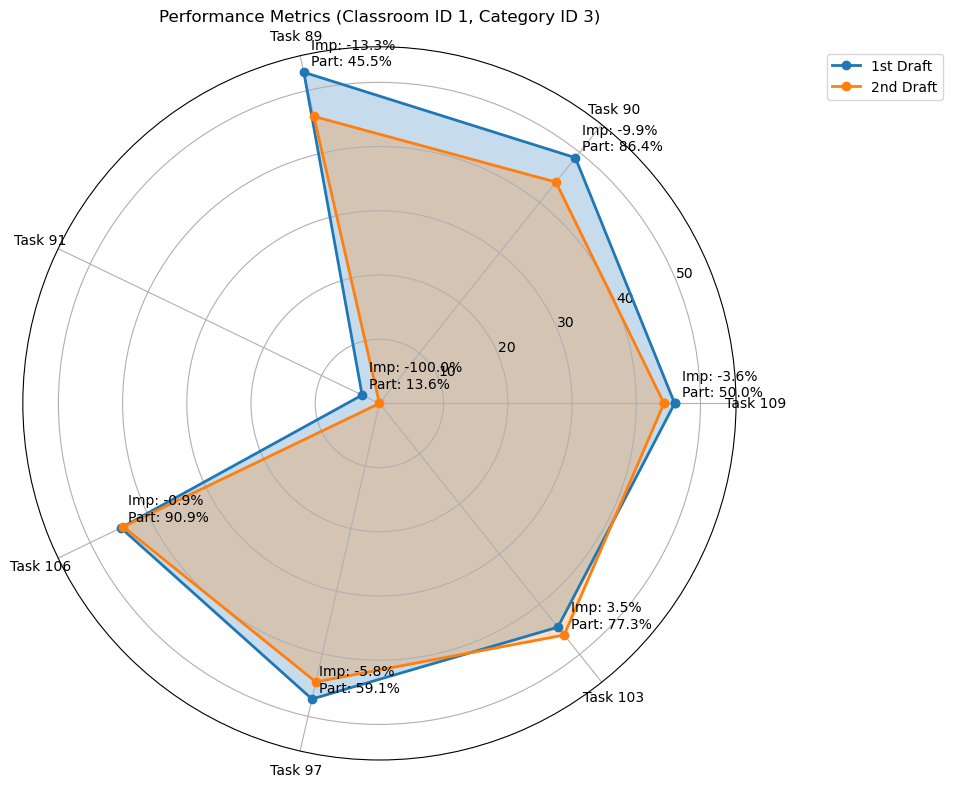


Category: Sophisticated Wording
Number of tasks: 7
Average improvement: -18.58%
Average participation rate: 60.39%


In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_enhanced_radar_chart(category_id, classroom_id):
    # Filter metrics by the given category_id
    metrics = metric_df[metric_df['category_id'] == category_id]
    metric_ids = metrics['id'].tolist()

    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]

    # Get unique task IDs for this classroom
    task_ids = essays_classroom['task_id'].unique()

    # Prepare data for plotting
    first_draft_scores = []
    second_draft_scores = []
    improvement_percentages = []
    participation_rates = []
    task_names = []

    for task_id in task_ids:
        # Filter essays for each task
        essays_task = essays_classroom[essays_classroom['task_id'] == task_id]
        
        # Filter scores for these essays and metrics
        scores_for_task = essay_score_df[
            (essay_score_df['essay_id'].isin(essays_task['id'])) &
            (essay_score_df['metric_id'].isin(metric_ids))
        ]

        # Merge with essay_df to get submission_type
        scores_with_submissions = pd.merge(scores_for_task, essay_df[['id', 'submission_type']], left_on='essay_id', right_on='id')

        # Calculate average score for each submission type
        average_scores = scores_with_submissions.groupby('submission_type')['score'].mean()

        first_draft_score = average_scores.get('1st Draft', 0)
        second_draft_score = average_scores.get('2nd Draft', 0)
        
        first_draft_scores.append(first_draft_score)
        second_draft_scores.append(second_draft_score)
        
        # Calculate improvement percentage
        improvement = ((second_draft_score - first_draft_score) / first_draft_score * 100) if first_draft_score > 0 else 0
        improvement_percentages.append(improvement)

        # Calculate participation rate
        total_students = len(essays_classroom['student_id'].unique())
        task_participants = len(essays_task['student_id'].unique())
        participation_rate = (task_participants / total_students) * 100
        participation_rates.append(participation_rate)

        task_names.append(f'Task {task_id}')

    # Prepare data for radar chart
    num_vars = len(task_names)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the polygon by appending the start value to the end
    first_draft_scores.append(first_draft_scores[0])
    second_draft_scores.append(second_draft_scores[0])
    improvement_percentages.append(improvement_percentages[0])
    participation_rates.append(participation_rates[0])
    angles.append(angles[0])

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

    ax.plot(angles, first_draft_scores, 'o-', linewidth=2, label='1st Draft')
    ax.fill(angles, first_draft_scores, alpha=0.25)
    ax.plot(angles, second_draft_scores, 'o-', linewidth=2, label='2nd Draft')
    ax.fill(angles, second_draft_scores, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(task_names)
    ax.set_title(f'Performance Metrics (Classroom ID {classroom_id}, Category ID {category_id})')
    
    # Add legend for drafts
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

    # Add improvement percentages and participation rates as text
    for i, (improvement, participation) in enumerate(zip(improvement_percentages[:-1], participation_rates[:-1])):
        ax.annotate(f'Imp: {improvement:.1f}%\nPart: {participation:.1f}%', 
                    (angles[i], max(first_draft_scores[i], second_draft_scores[i])),
                    xytext=(5, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # Print additional statistics
    print(f"\nCategory: {metrics.iloc[0]['name']}")
    print(f"Number of tasks: {num_vars}")
    print(f"Average improvement: {np.mean(improvement_percentages[:-1]):.2f}%")
    print(f"Average participation rate: {np.mean(participation_rates[:-1]):.2f}%")

# Example usage:
category_id_input = int(input("Enter a category ID: "))
classroom_id_input = int(input("Enter a classroom ID: "))
plot_enhanced_radar_chart(category_id_input, classroom_id_input)


Enter a classroom ID: 3


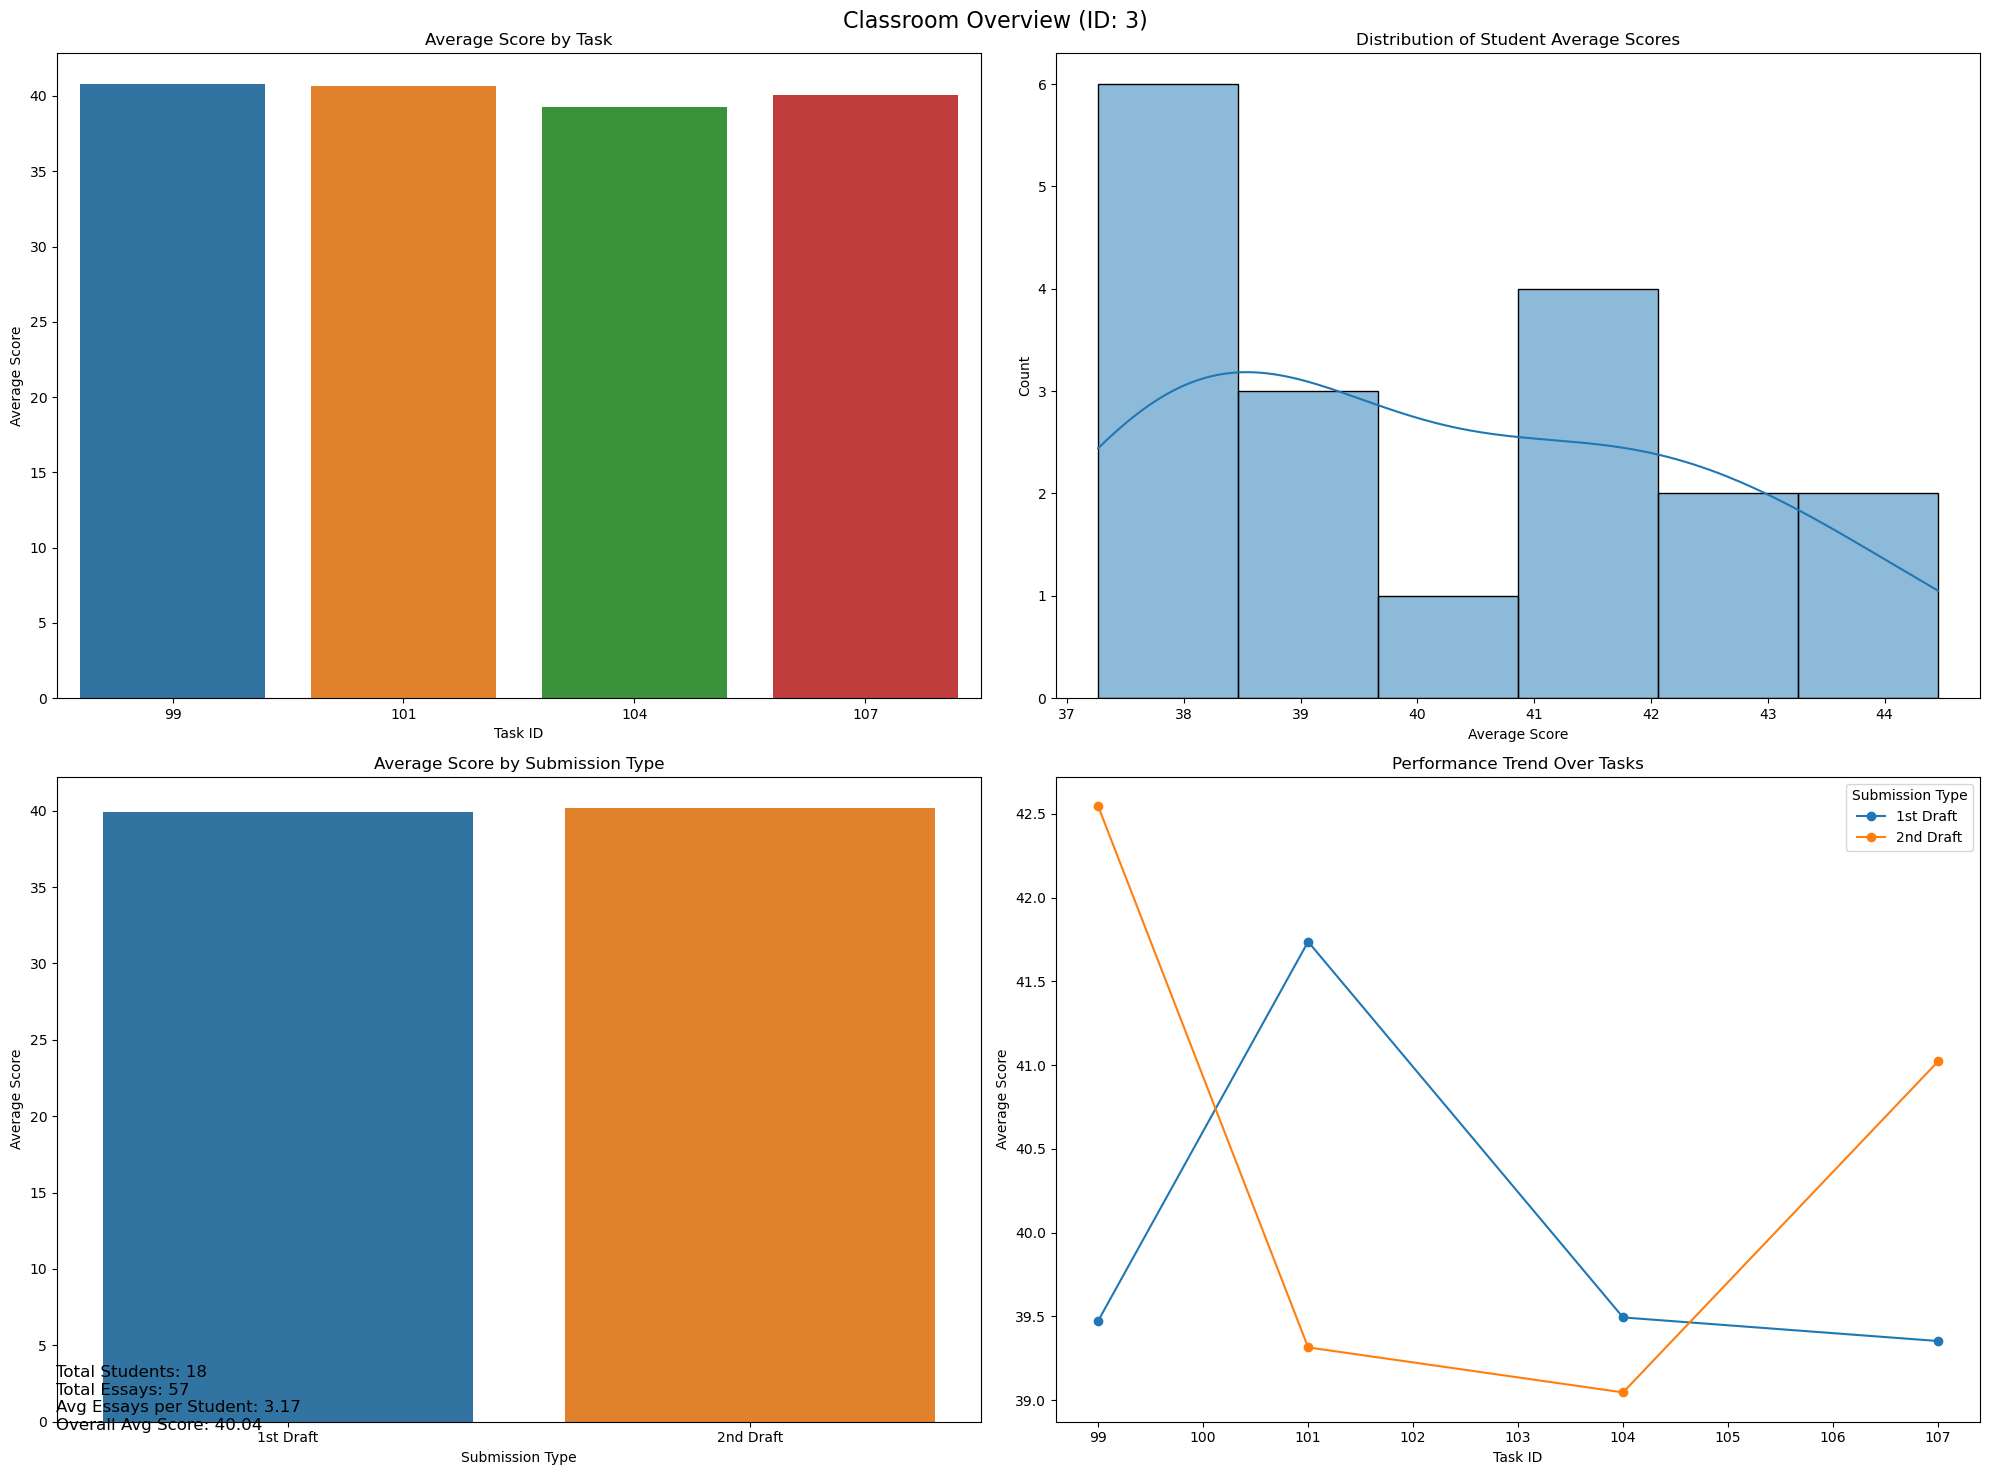

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_classroom_overview(classroom_id):
    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    
    # Get unique task IDs for this classroom
    task_ids = essays_classroom['task_id'].unique()
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_classroom[['id', 'task_id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Classroom Overview (ID: {classroom_id})', fontsize=16)
    
    # 1. Task Performance Overview
    ax1 = fig.add_subplot(221)
    task_avg_scores = scores_with_info.groupby('task_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=task_avg_scores.index, y=task_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Task')
    ax1.set_xlabel('Task ID')
    ax1.set_ylabel('Average Score')
    
    # 2. Student Performance Distribution
    ax2 = fig.add_subplot(222)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean()
    sns.histplot(student_avg_scores, kde=True, ax=ax2)
    ax2.set_title('Distribution of Student Average Scores')
    ax2.set_xlabel('Average Score')
    ax2.set_ylabel('Count')
    
    # 3. Draft Comparison
    ax3 = fig.add_subplot(223)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax3)
    ax3.set_title('Average Score by Submission Type')
    ax3.set_xlabel('Submission Type')
    ax3.set_ylabel('Average Score')
    
    # 4. Performance Trend Over Tasks
    ax4 = fig.add_subplot(224)
    task_submission_scores = scores_with_info.groupby(['task_id', 'submission_type'])['score'].mean().unstack()
    task_submission_scores.plot(kind='line', ax=ax4, marker='o')
    ax4.set_title('Performance Trend Over Tasks')
    ax4.set_xlabel('Task ID')
    ax4.set_ylabel('Average Score')
    ax4.legend(title='Submission Type')
    
    # Additional statistics
    total_students = len(essays_classroom['student_id'].unique())
    total_essays = len(essays_classroom)
    avg_essays_per_student = total_essays / total_students
    
    stats_text = f"""
    Total Students: {total_students}
    Total Essays: {total_essays}
    Avg Essays per Student: {avg_essays_per_student:.2f}
    Overall Avg Score: {scores_with_info['score'].mean():.2f}
    """
    fig.text(0.02, 0.02, stats_text, fontsize=12, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

# Example usage:
classroom_id_input = int(input("Enter a classroom ID: "))
plot_classroom_overview(classroom_id_input)


Enter a classroom ID: 1
Enter a task ID: 90


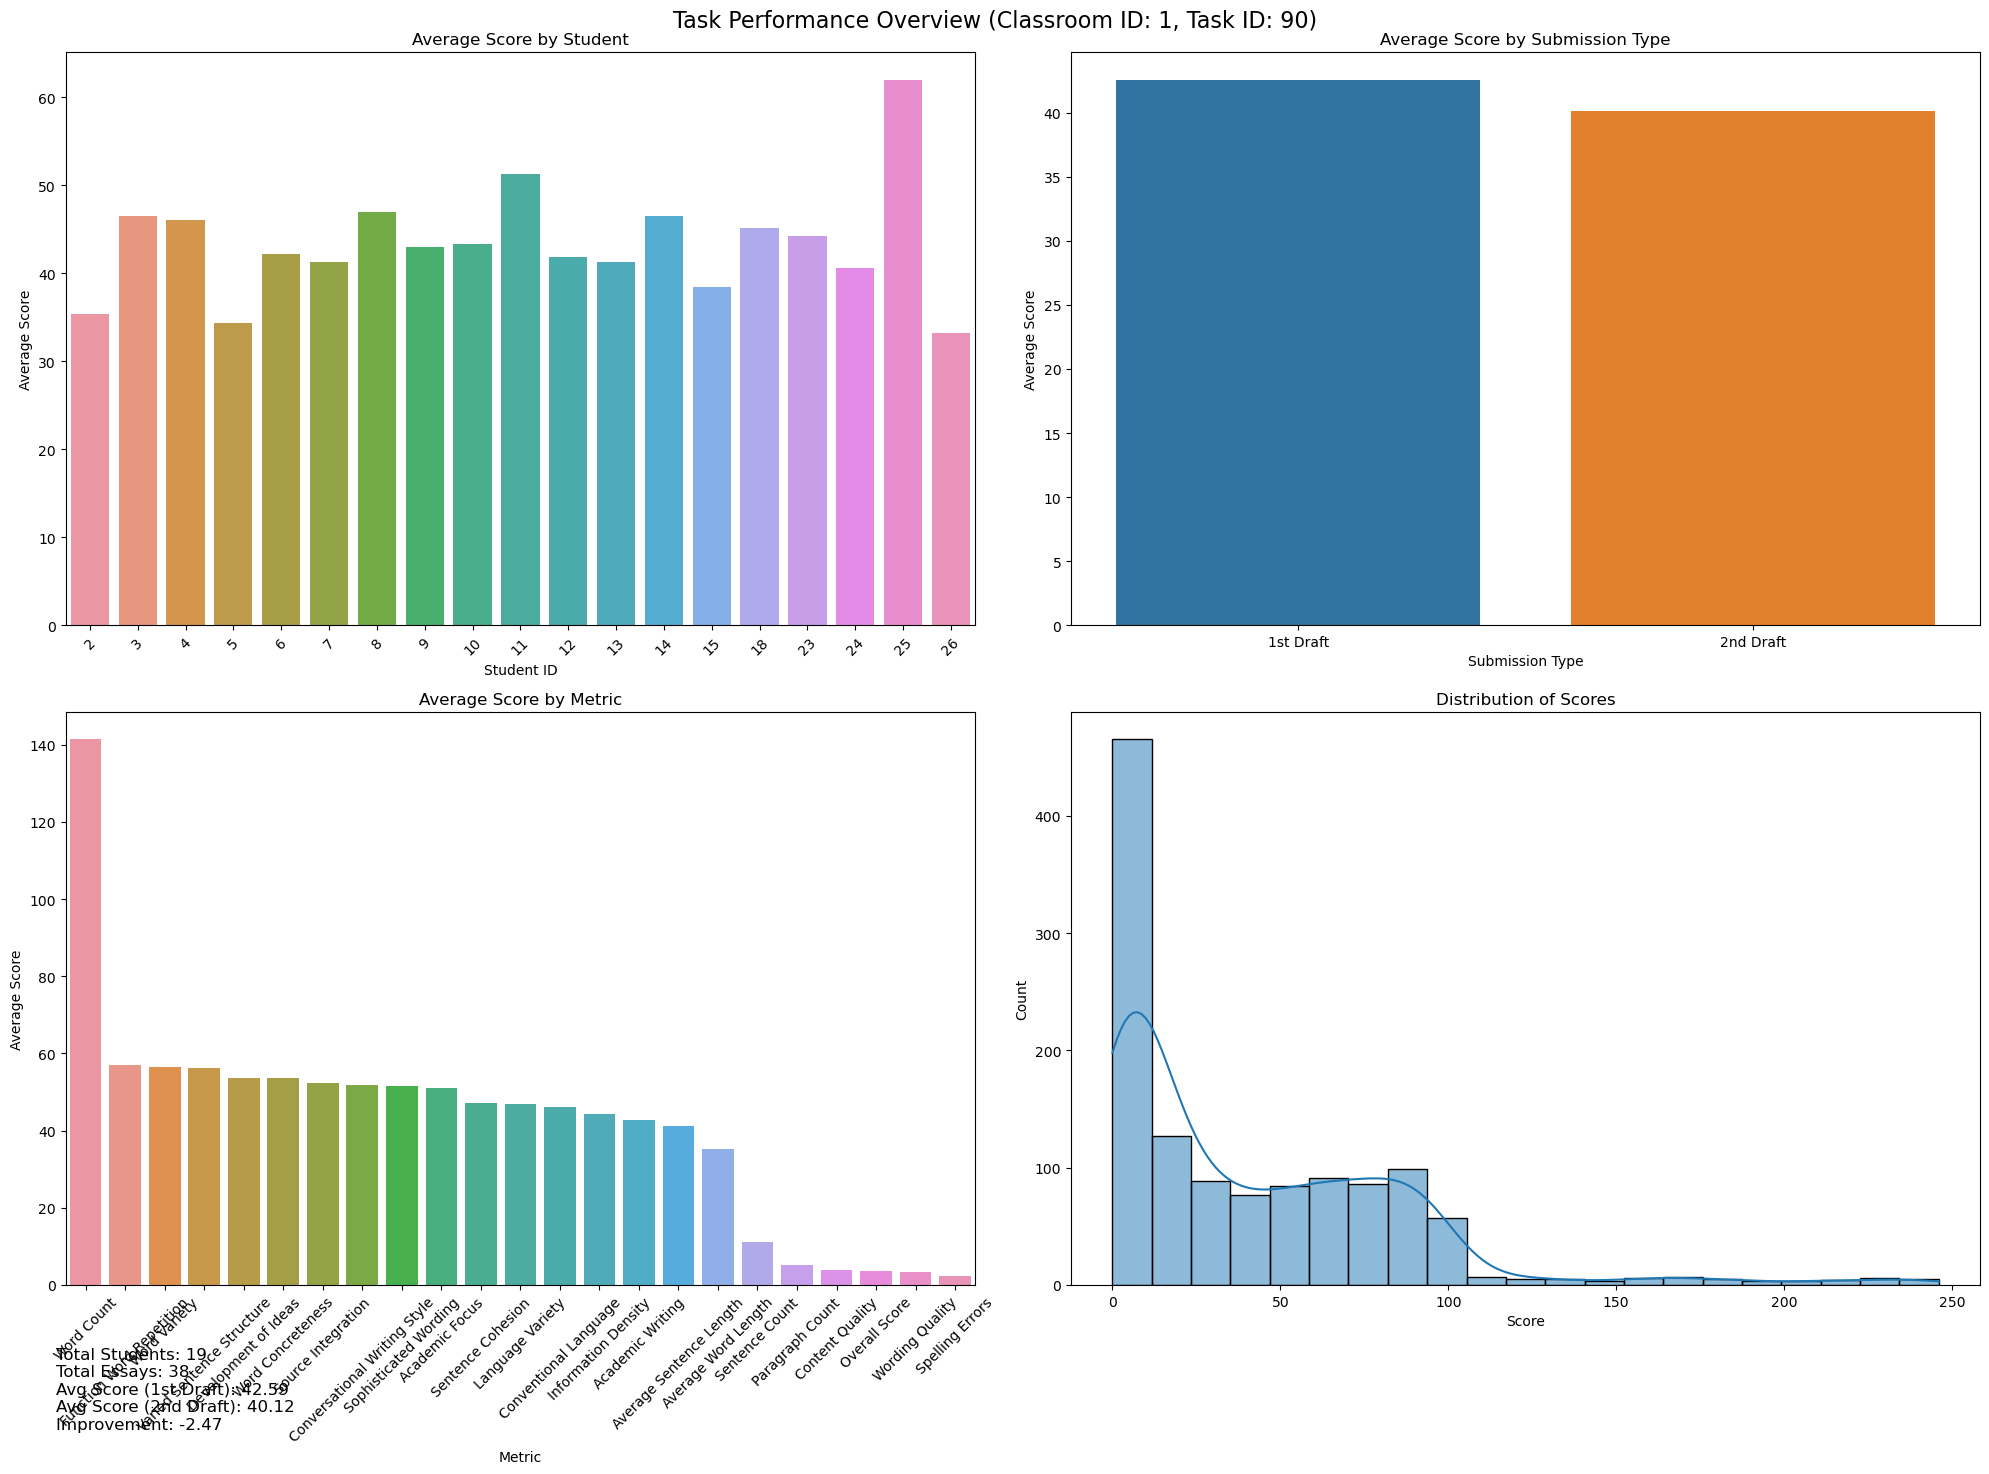

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_task_performance(classroom_id, task_id):
    # Filter essays for the given classroom_id and task_id
    essays_task = essay_df[(essay_df['classroom_id'] == classroom_id) & (essay_df['task_id'] == task_id)]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_task[['id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metric_df[['id', 'name']], left_on='metric_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Task Performance Overview (Classroom ID: {classroom_id}, Task ID: {task_id})', fontsize=16)
    
    # 1. Student Performance Comparison
    ax1 = fig.add_subplot(221)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Student')
    ax1.set_xlabel('Student ID')
    ax1.set_ylabel('Average Score')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Draft Comparison
    ax2 = fig.add_subplot(222)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax2)
    ax2.set_title('Average Score by Submission Type')
    ax2.set_xlabel('Submission Type')
    ax2.set_ylabel('Average Score')
    
    # 3. Metric Performance
    ax3 = fig.add_subplot(223)
    metric_performance = scores_with_metrics.groupby('name')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=metric_performance.index, y=metric_performance.values, ax=ax3)
    ax3.set_title('Average Score by Metric')
    ax3.set_xlabel('Metric')
    ax3.set_ylabel('Average Score')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Score Distribution
    ax4 = fig.add_subplot(224)
    sns.histplot(scores_with_info['score'], kde=True, ax=ax4)
    ax4.set_title('Distribution of Scores')
    ax4.set_xlabel('Score')
    ax4.set_ylabel('Count')
    
    # Additional statistics
    total_students = len(essays_task['student_id'].unique())
    total_essays = len(essays_task)
    improvement = scores_with_info[scores_with_info['submission_type'] == '2nd Draft']['score'].mean() - \
                  scores_with_info[scores_with_info['submission_type'] == '1st Draft']['score'].mean()
    
    stats_text = f"""
    Total Students: {total_students}
    Total Essays: {total_essays}
    Avg Score (1st Draft): {scores_with_info[scores_with_info['submission_type'] == '1st Draft']['score'].mean():.2f}
    Avg Score (2nd Draft): {scores_with_info[scores_with_info['submission_type'] == '2nd Draft']['score'].mean():.2f}
    Improvement: {improvement:.2f}
    """
    fig.text(0.02, 0.02, stats_text, fontsize=12, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

# Example usage:
classroom_id_input = int(input("Enter a classroom ID: "))
task_id_input = int(input("Enter a task ID: "))
plot_task_performance(classroom_id_input, task_id_input)


Enter a classroom ID: 1


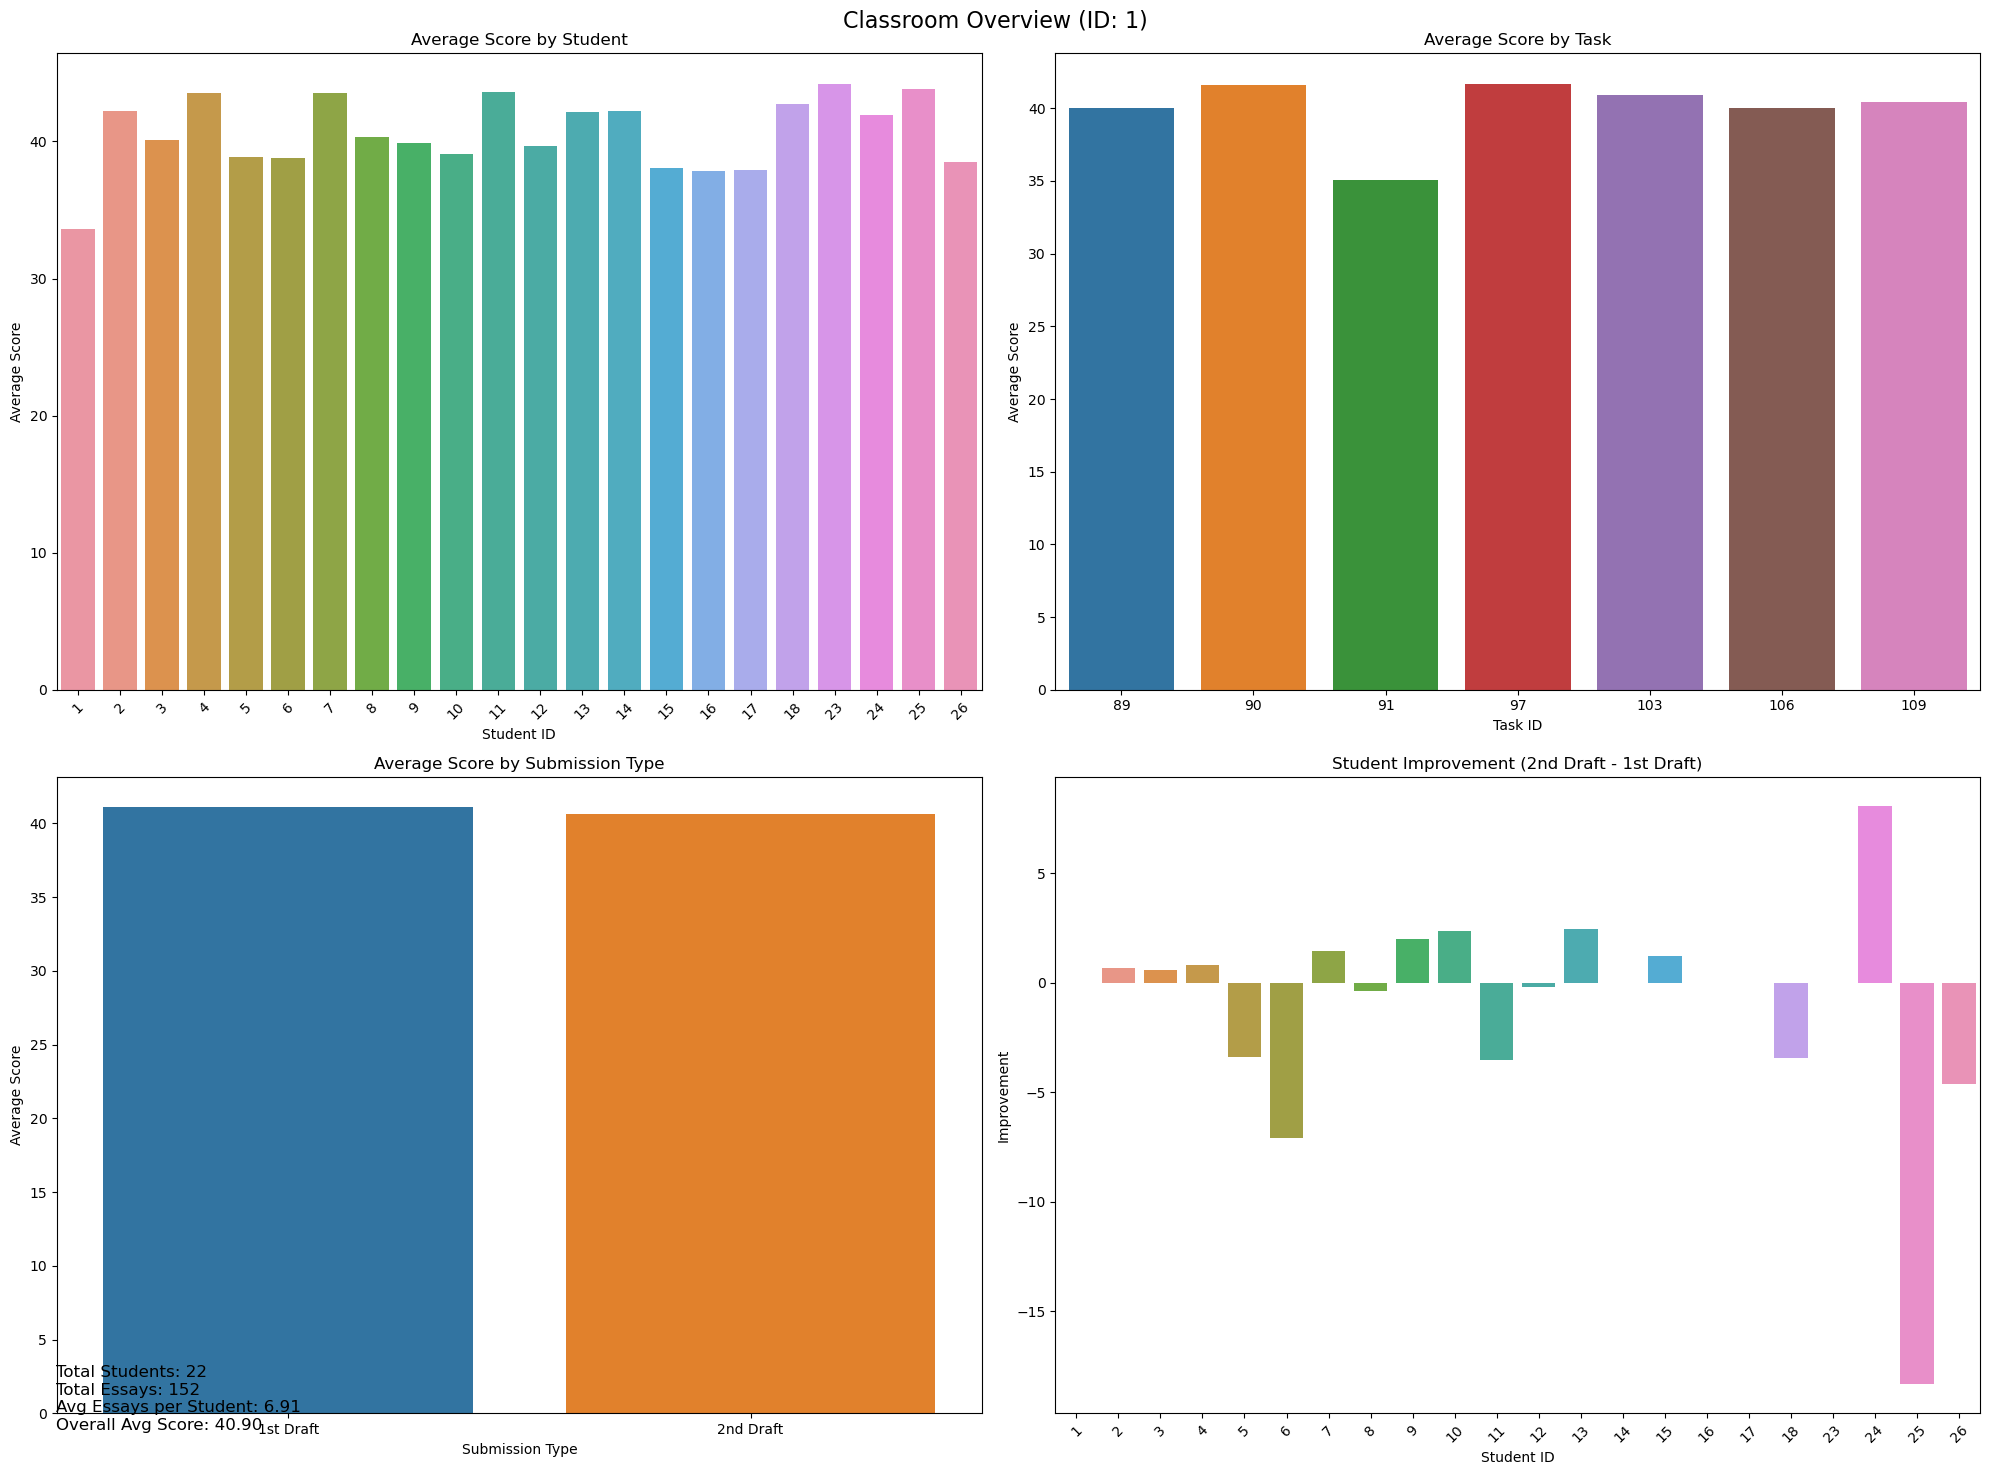


Available Task IDs for this classroom: [97, 90, 103, 109, 106, 89, 91]
Enter a task ID from the above list: 90


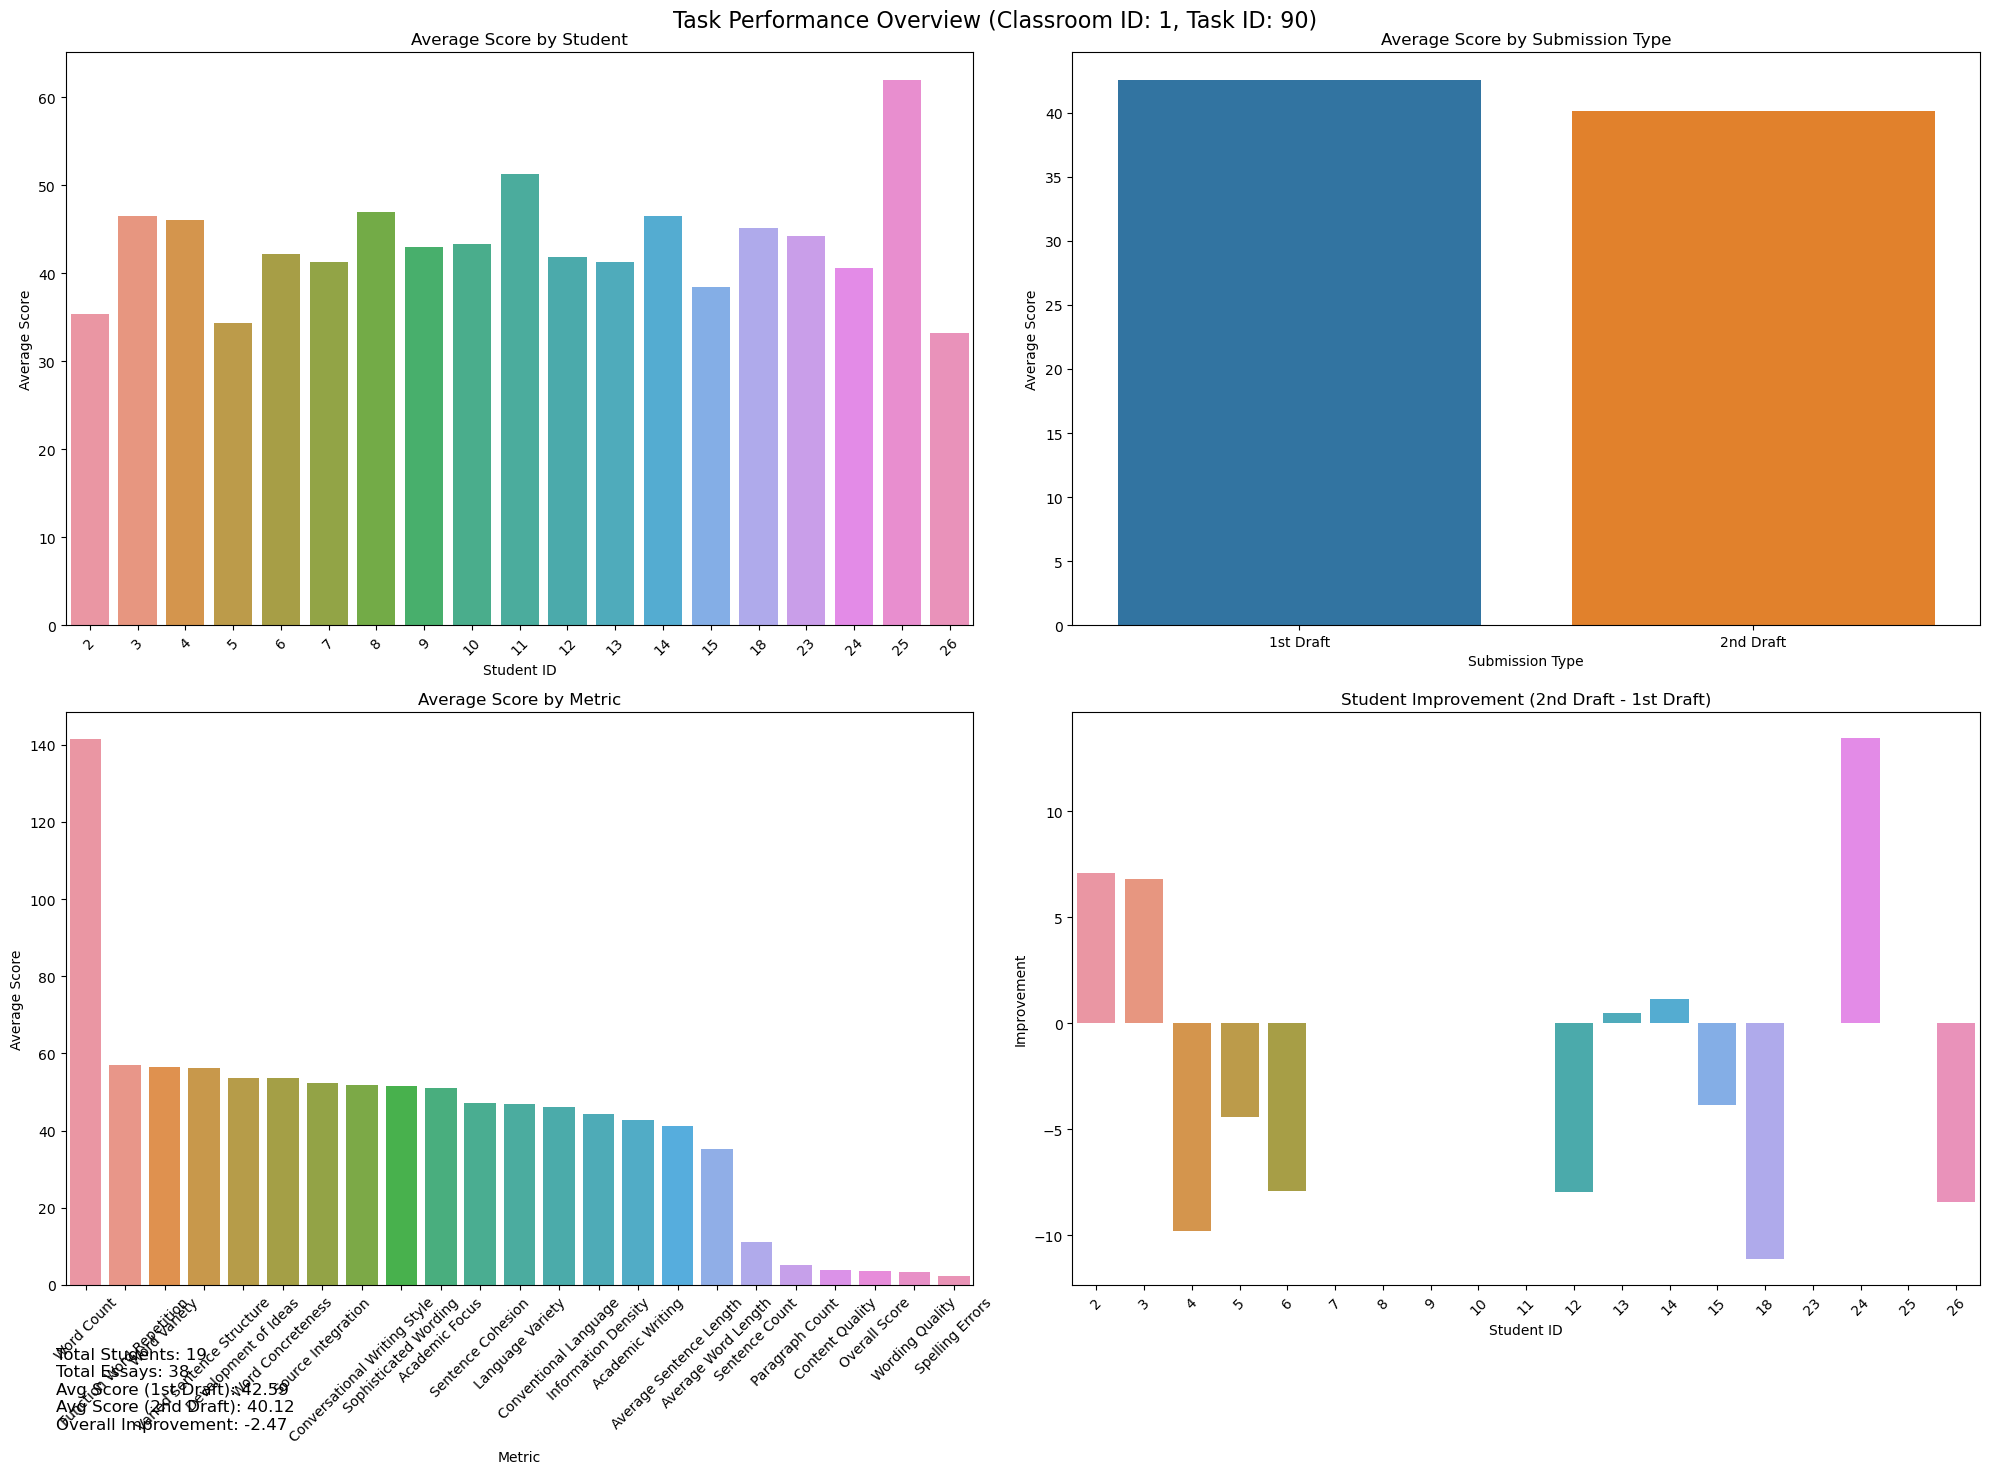

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_classroom_overview(classroom_id):
    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_classroom[['id', 'task_id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Classroom Overview (ID: {classroom_id})', fontsize=16)
    
    # 1. Student Performance Overview
    ax1 = fig.add_subplot(221)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Student')
    ax1.set_xlabel('Student ID')
    ax1.set_ylabel('Average Score')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Task Performance Overview
    ax2 = fig.add_subplot(222)
    task_avg_scores = scores_with_info.groupby('task_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=task_avg_scores.index, y=task_avg_scores.values, ax=ax2)
    ax2.set_title('Average Score by Task')
    ax2.set_xlabel('Task ID')
    ax2.set_ylabel('Average Score')
    
    # 3. Draft Comparison
    ax3 = fig.add_subplot(223)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax3)
    ax3.set_title('Average Score by Submission Type')
    ax3.set_xlabel('Submission Type')
    ax3.set_ylabel('Average Score')
    
    # 4. Student Improvement
    ax4 = fig.add_subplot(224)
    student_improvement = scores_with_info.groupby(['student_id', 'submission_type'])['score'].mean().unstack()
    student_improvement['Improvement'] = student_improvement['2nd Draft'] - student_improvement['1st Draft']
    student_improvement = student_improvement.sort_values('Improvement', ascending=False)
    sns.barplot(x=student_improvement.index, y=student_improvement['Improvement'], ax=ax4)
    ax4.set_title('Student Improvement (2nd Draft - 1st Draft)')
    ax4.set_xlabel('Student ID')
    ax4.set_ylabel('Improvement')
    ax4.tick_params(axis='x', rotation=45)
    
    # Additional statistics
    total_students = len(essays_classroom['student_id'].unique())
    total_essays = len(essays_classroom)
    avg_essays_per_student = total_essays / total_students
    
    stats_text = f"""
    Total Students: {total_students}
    Total Essays: {total_essays}
    Avg Essays per Student: {avg_essays_per_student:.2f}
    Overall Avg Score: {scores_with_info['score'].mean():.2f}
    """
    fig.text(0.02, 0.02, stats_text, fontsize=12, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return task_avg_scores.index.tolist()

def plot_task_performance(classroom_id, task_id):
    # Filter essays for the given classroom_id and task_id
    essays_task = essay_df[(essay_df['classroom_id'] == classroom_id) & (essay_df['task_id'] == task_id)]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_task[['id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metric_df[['id', 'name']], left_on='metric_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Task Performance Overview (Classroom ID: {classroom_id}, Task ID: {task_id})', fontsize=16)
    
    # 1. Student Performance Comparison
    ax1 = fig.add_subplot(221)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Student')
    ax1.set_xlabel('Student ID')
    ax1.set_ylabel('Average Score')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Draft Comparison
    ax2 = fig.add_subplot(222)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax2)
    ax2.set_title('Average Score by Submission Type')
    ax2.set_xlabel('Submission Type')
    ax2.set_ylabel('Average Score')
    
    # 3. Metric Performance
    ax3 = fig.add_subplot(223)
    metric_performance = scores_with_metrics.groupby('name')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=metric_performance.index, y=metric_performance.values, ax=ax3)
    ax3.set_title('Average Score by Metric')
    ax3.set_xlabel('Metric')
    ax3.set_ylabel('Average Score')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Student Improvement
    ax4 = fig.add_subplot(224)
    student_improvement = scores_with_info.groupby(['student_id', 'submission_type'])['score'].mean().unstack()
    student_improvement['Improvement'] = student_improvement['2nd Draft'] - student_improvement['1st Draft']
    student_improvement = student_improvement.sort_values('Improvement', ascending=False)
    sns.barplot(x=student_improvement.index, y=student_improvement['Improvement'], ax=ax4)
    ax4.set_title('Student Improvement (2nd Draft - 1st Draft)')
    ax4.set_xlabel('Student ID')
    ax4.set_ylabel('Improvement')
    ax4.tick_params(axis='x', rotation=45)
    
    # Additional statistics
    total_students = len(essays_task['student_id'].unique())
    total_essays = len(essays_task)
    improvement = scores_with_info[scores_with_info['submission_type'] == '2nd Draft']['score'].mean() - \
                  scores_with_info[scores_with_info['submission_type'] == '1st Draft']['score'].mean()
    
    stats_text = f"""
    Total Students: {total_students}
    Total Essays: {total_essays}
    Avg Score (1st Draft): {scores_with_info[scores_with_info['submission_type'] == '1st Draft']['score'].mean():.2f}
    Avg Score (2nd Draft): {scores_with_info[scores_with_info['submission_type'] == '2nd Draft']['score'].mean():.2f}
    Overall Improvement: {improvement:.2f}
    """
    fig.text(0.02, 0.02, stats_text, fontsize=12, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

# Main execution
classroom_id_input = int(input("Enter a classroom ID: "))
task_ids = plot_classroom_overview(classroom_id_input)
print("\nAvailable Task IDs for this classroom:", task_ids)
task_id_input = int(input("Enter a task ID from the above list: "))
plot_task_performance(classroom_id_input, task_id_input)


Enter a classroom ID: 1


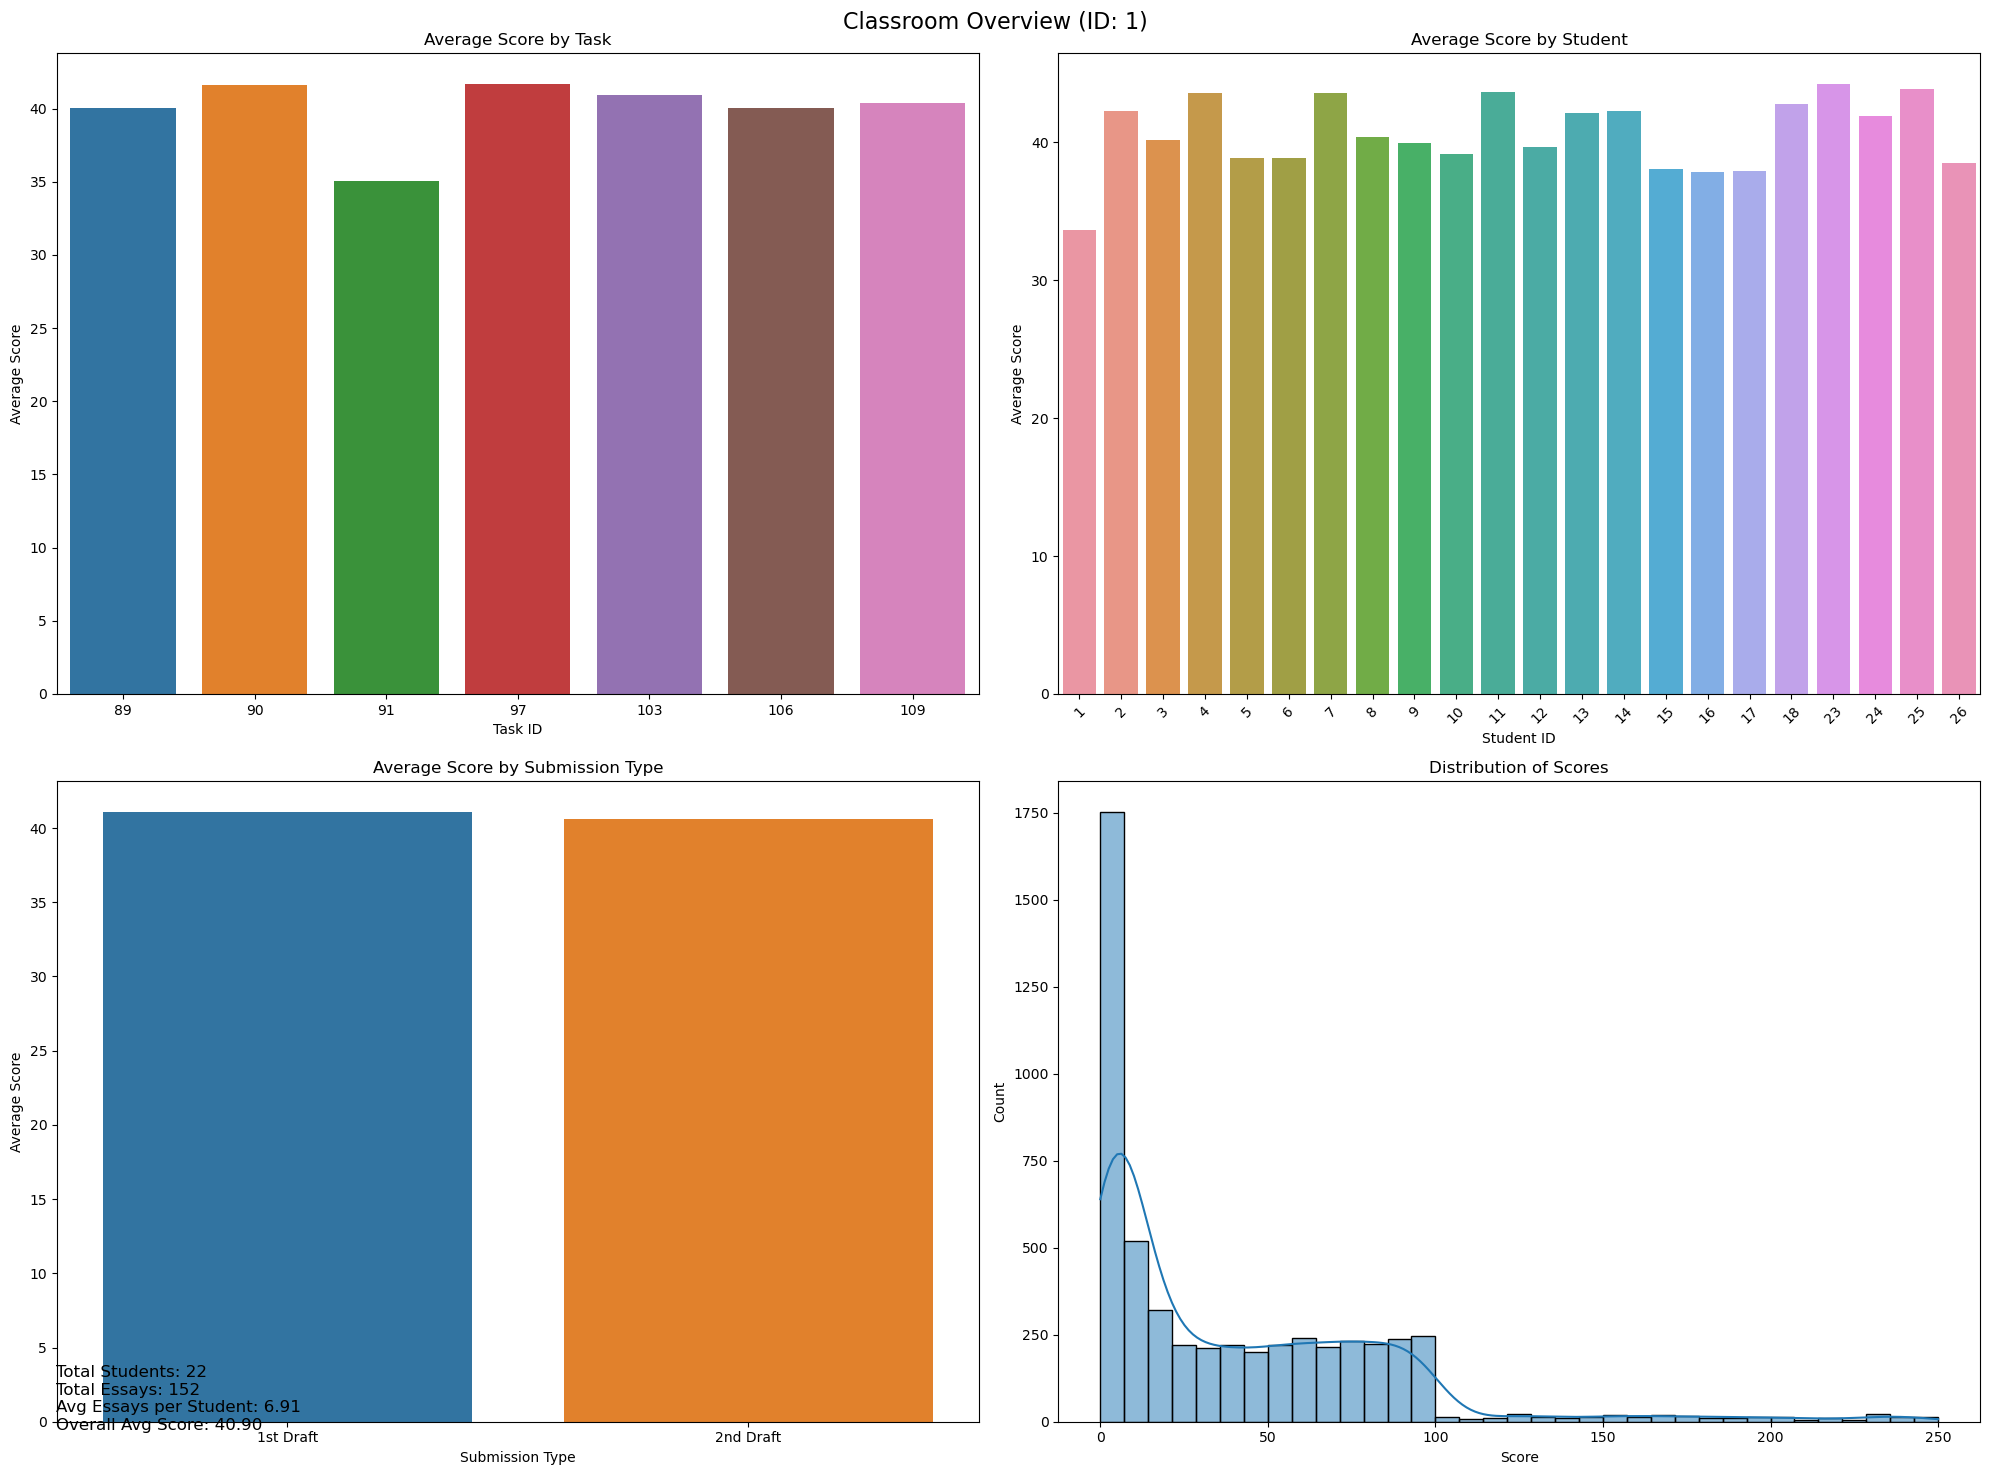


Available Task IDs for this classroom: [97, 90, 103, 109, 106, 89, 91]
Enter a task ID from the above list: 90


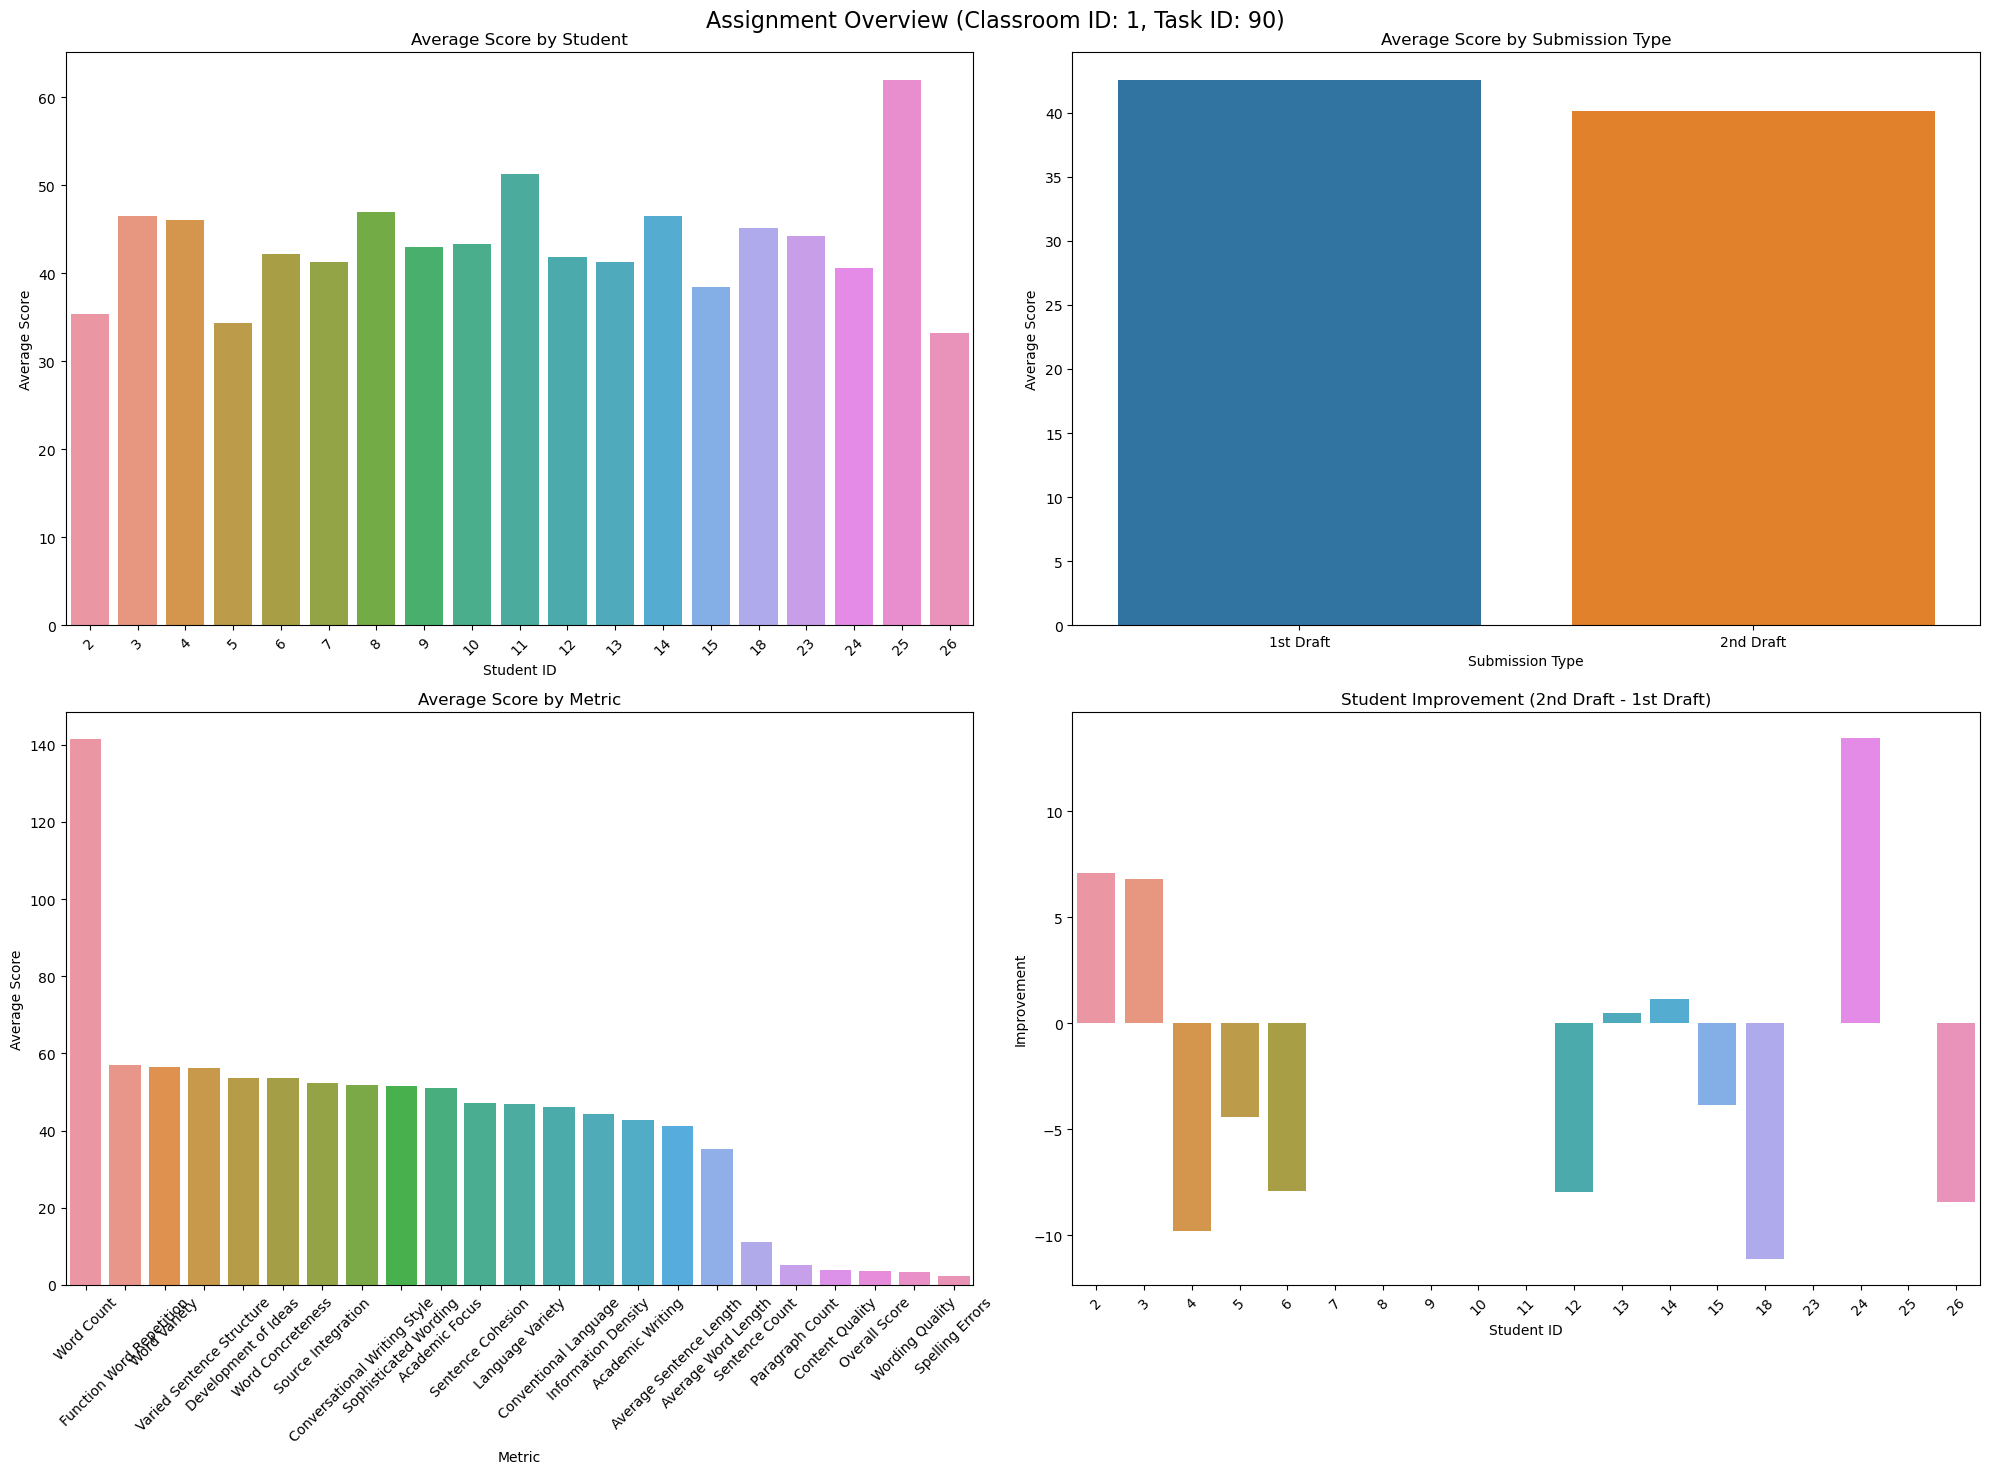


Available Student IDs for this classroom: [23, 25, 11, 4, 7, 18, 2, 14, 13, 24, 8, 3, 9, 12, 10, 5, 6, 26, 15, 17, 16, 1]
Enter a student ID from the above list: 1


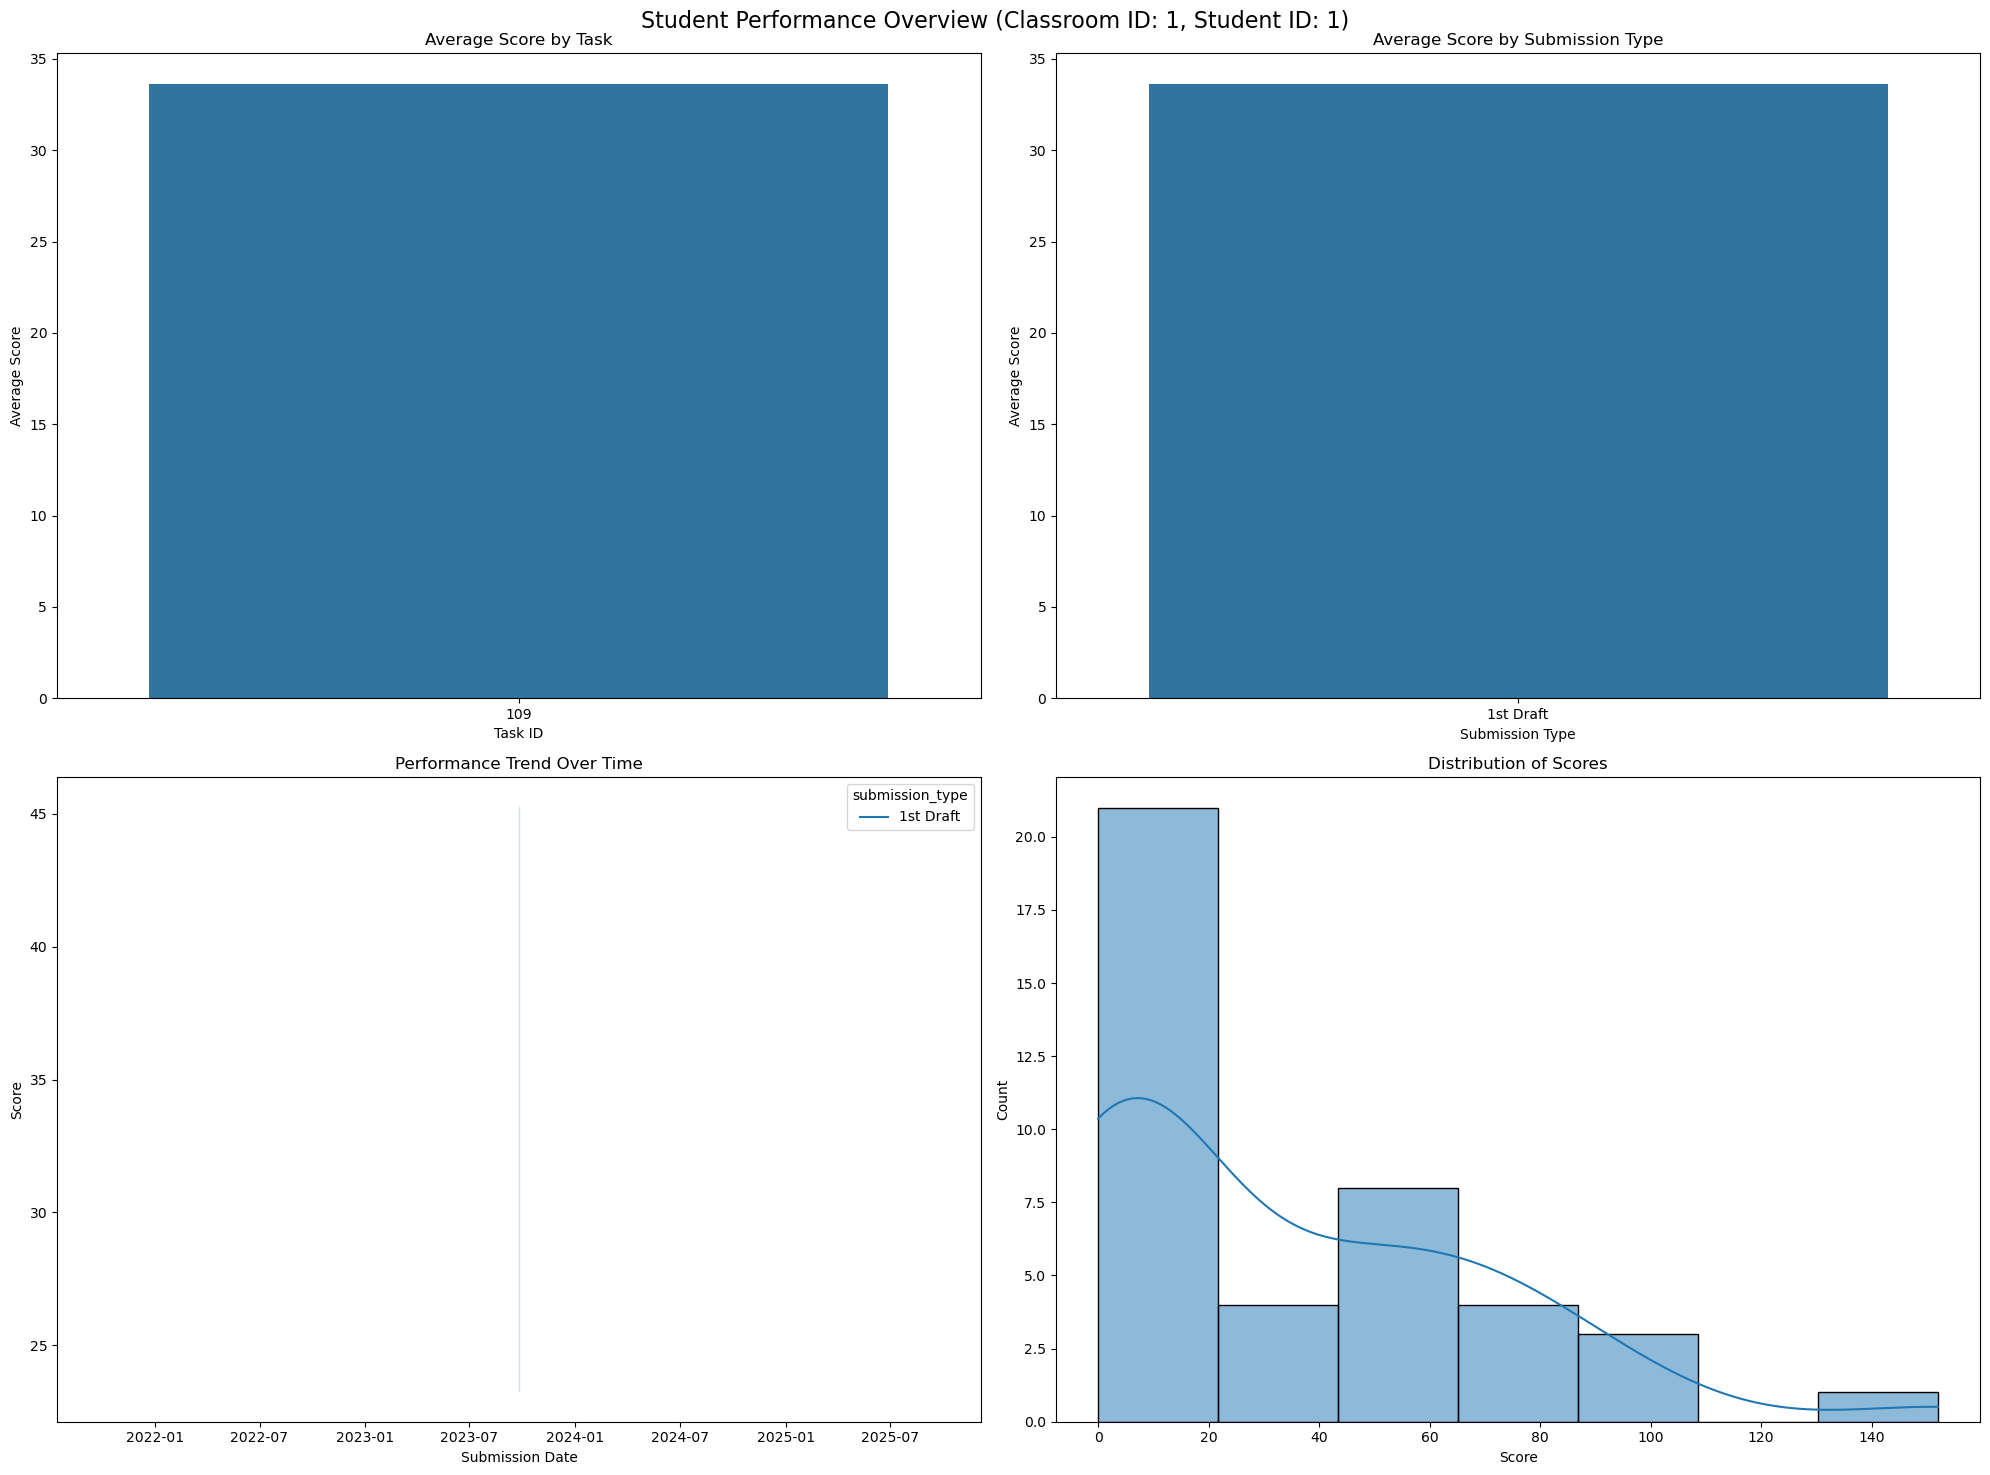


Student Statistics:
Total Essays: 1
Average Score: 33.62
Highest Score: 152.00
Lowest Score: 0.00


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_classroom_overview(classroom_id):
    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_classroom[['id', 'task_id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Classroom Overview (ID: {classroom_id})', fontsize=16)
    
    # 1. Task Performance Overview
    ax1 = fig.add_subplot(221)
    task_avg_scores = scores_with_info.groupby('task_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=task_avg_scores.index, y=task_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Task')
    ax1.set_xlabel('Task ID')
    ax1.set_ylabel('Average Score')
    
    # 2. Student Performance Overview
    ax2 = fig.add_subplot(222)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax2)
    ax2.set_title('Average Score by Student')
    ax2.set_xlabel('Student ID')
    ax2.set_ylabel('Average Score')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Draft Comparison
    ax3 = fig.add_subplot(223)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax3)
    ax3.set_title('Average Score by Submission Type')
    ax3.set_xlabel('Submission Type')
    ax3.set_ylabel('Average Score')
    
    # 4. Score Distribution
    ax4 = fig.add_subplot(224)
    sns.histplot(scores_with_info['score'], kde=True, ax=ax4)
    ax4.set_title('Distribution of Scores')
    ax4.set_xlabel('Score')
    ax4.set_ylabel('Count')
    
    # Additional statistics
    total_students = len(essays_classroom['student_id'].unique())
    total_essays = len(essays_classroom)
    avg_essays_per_student = total_essays / total_students
    
    stats_text = f"""
    Total Students: {total_students}
    Total Essays: {total_essays}
    Avg Essays per Student: {avg_essays_per_student:.2f}
    Overall Avg Score: {scores_with_info['score'].mean():.2f}
    """
    fig.text(0.02, 0.02, stats_text, fontsize=12, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return task_avg_scores.index.tolist(), student_avg_scores.index.tolist()

def plot_assignment_overview(classroom_id, task_id):
    # Filter essays for the given classroom_id and task_id
    essays_task = essay_df[(essay_df['classroom_id'] == classroom_id) & (essay_df['task_id'] == task_id)]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_task[['id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metric_df[['id', 'name']], left_on='metric_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Assignment Overview (Classroom ID: {classroom_id}, Task ID: {task_id})', fontsize=16)
    
    # 1. Student Performance Comparison
    ax1 = fig.add_subplot(221)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Student')
    ax1.set_xlabel('Student ID')
    ax1.set_ylabel('Average Score')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Draft Comparison
    ax2 = fig.add_subplot(222)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax2)
    ax2.set_title('Average Score by Submission Type')
    ax2.set_xlabel('Submission Type')
    ax2.set_ylabel('Average Score')
    
    # 3. Metric Performance
    ax3 = fig.add_subplot(223)
    metric_performance = scores_with_metrics.groupby('name')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=metric_performance.index, y=metric_performance.values, ax=ax3)
    ax3.set_title('Average Score by Metric')
    ax3.set_xlabel('Metric')
    ax3.set_ylabel('Average Score')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Student Improvement
    ax4 = fig.add_subplot(224)
    student_improvement = scores_with_info.groupby(['student_id', 'submission_type'])['score'].mean().unstack()
    student_improvement['Improvement'] = student_improvement['2nd Draft'] - student_improvement['1st Draft']
    student_improvement = student_improvement.sort_values('Improvement', ascending=False)
    sns.barplot(x=student_improvement.index, y=student_improvement['Improvement'], ax=ax4)
    ax4.set_title('Student Improvement (2nd Draft - 1st Draft)')
    ax4.set_xlabel('Student ID')
    ax4.set_ylabel('Improvement')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_student_performance(classroom_id, student_id):
    # Filter essays for the given classroom_id and student_id
    essays_student = essay_df[(essay_df['classroom_id'] == classroom_id) & (essay_df['student_id'] == student_id)]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_student[['id', 'task_id', 'submission_type', 'submitted_on']], 
                                left_on='essay_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Student Performance Overview (Classroom ID: {classroom_id}, Student ID: {student_id})', fontsize=16)
    
    # 1. Task Performance
    ax1 = fig.add_subplot(221)
    task_avg_scores = scores_with_info.groupby('task_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=task_avg_scores.index, y=task_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Task')
    ax1.set_xlabel('Task ID')
    ax1.set_ylabel('Average Score')
    
    # 2. Draft Comparison
    ax2 = fig.add_subplot(222)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax2)
    ax2.set_title('Average Score by Submission Type')
    ax2.set_xlabel('Submission Type')
    ax2.set_ylabel('Average Score')
    
    # 3. Performance Trend
    ax3 = fig.add_subplot(223)
    scores_with_info['date'] = pd.to_datetime(scores_with_info['submitted_on'])
    scores_with_info = scores_with_info.sort_values('date')
    sns.lineplot(data=scores_with_info, x='date', y='score', hue='submission_type', ax=ax3)
    ax3.set_title('Performance Trend Over Time')
    ax3.set_xlabel('Submission Date')
    ax3.set_ylabel('Score')
    
    # 4. Score Distribution
    ax4 = fig.add_subplot(224)
    sns.histplot(scores_with_info['score'], kde=True, ax=ax4)
    ax4.set_title('Distribution of Scores')
    ax4.set_xlabel('Score')
    ax4.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

    # Print some additional statistics
    print(f"\nStudent Statistics:")
    print(f"Total Essays: {len(essays_student)}")
    print(f"Average Score: {scores_with_info['score'].mean():.2f}")
    print(f"Highest Score: {scores_with_info['score'].max():.2f}")
    print(f"Lowest Score: {scores_with_info['score'].min():.2f}")

# Main execution
classroom_id_input = int(input("Enter a classroom ID: "))
task_ids, student_ids = plot_classroom_overview(classroom_id_input)

print("\nAvailable Task IDs for this classroom:", task_ids)
task_id_input = int(input("Enter a task ID from the above list: "))
plot_assignment_overview(classroom_id_input, task_id_input)

print("\nAvailable Student IDs for this classroom:", student_ids)
student_id_input = int(input("Enter a student ID from the above list: "))
plot_student_performance(classroom_id_input, student_id_input)


Enter a classroom ID: 1


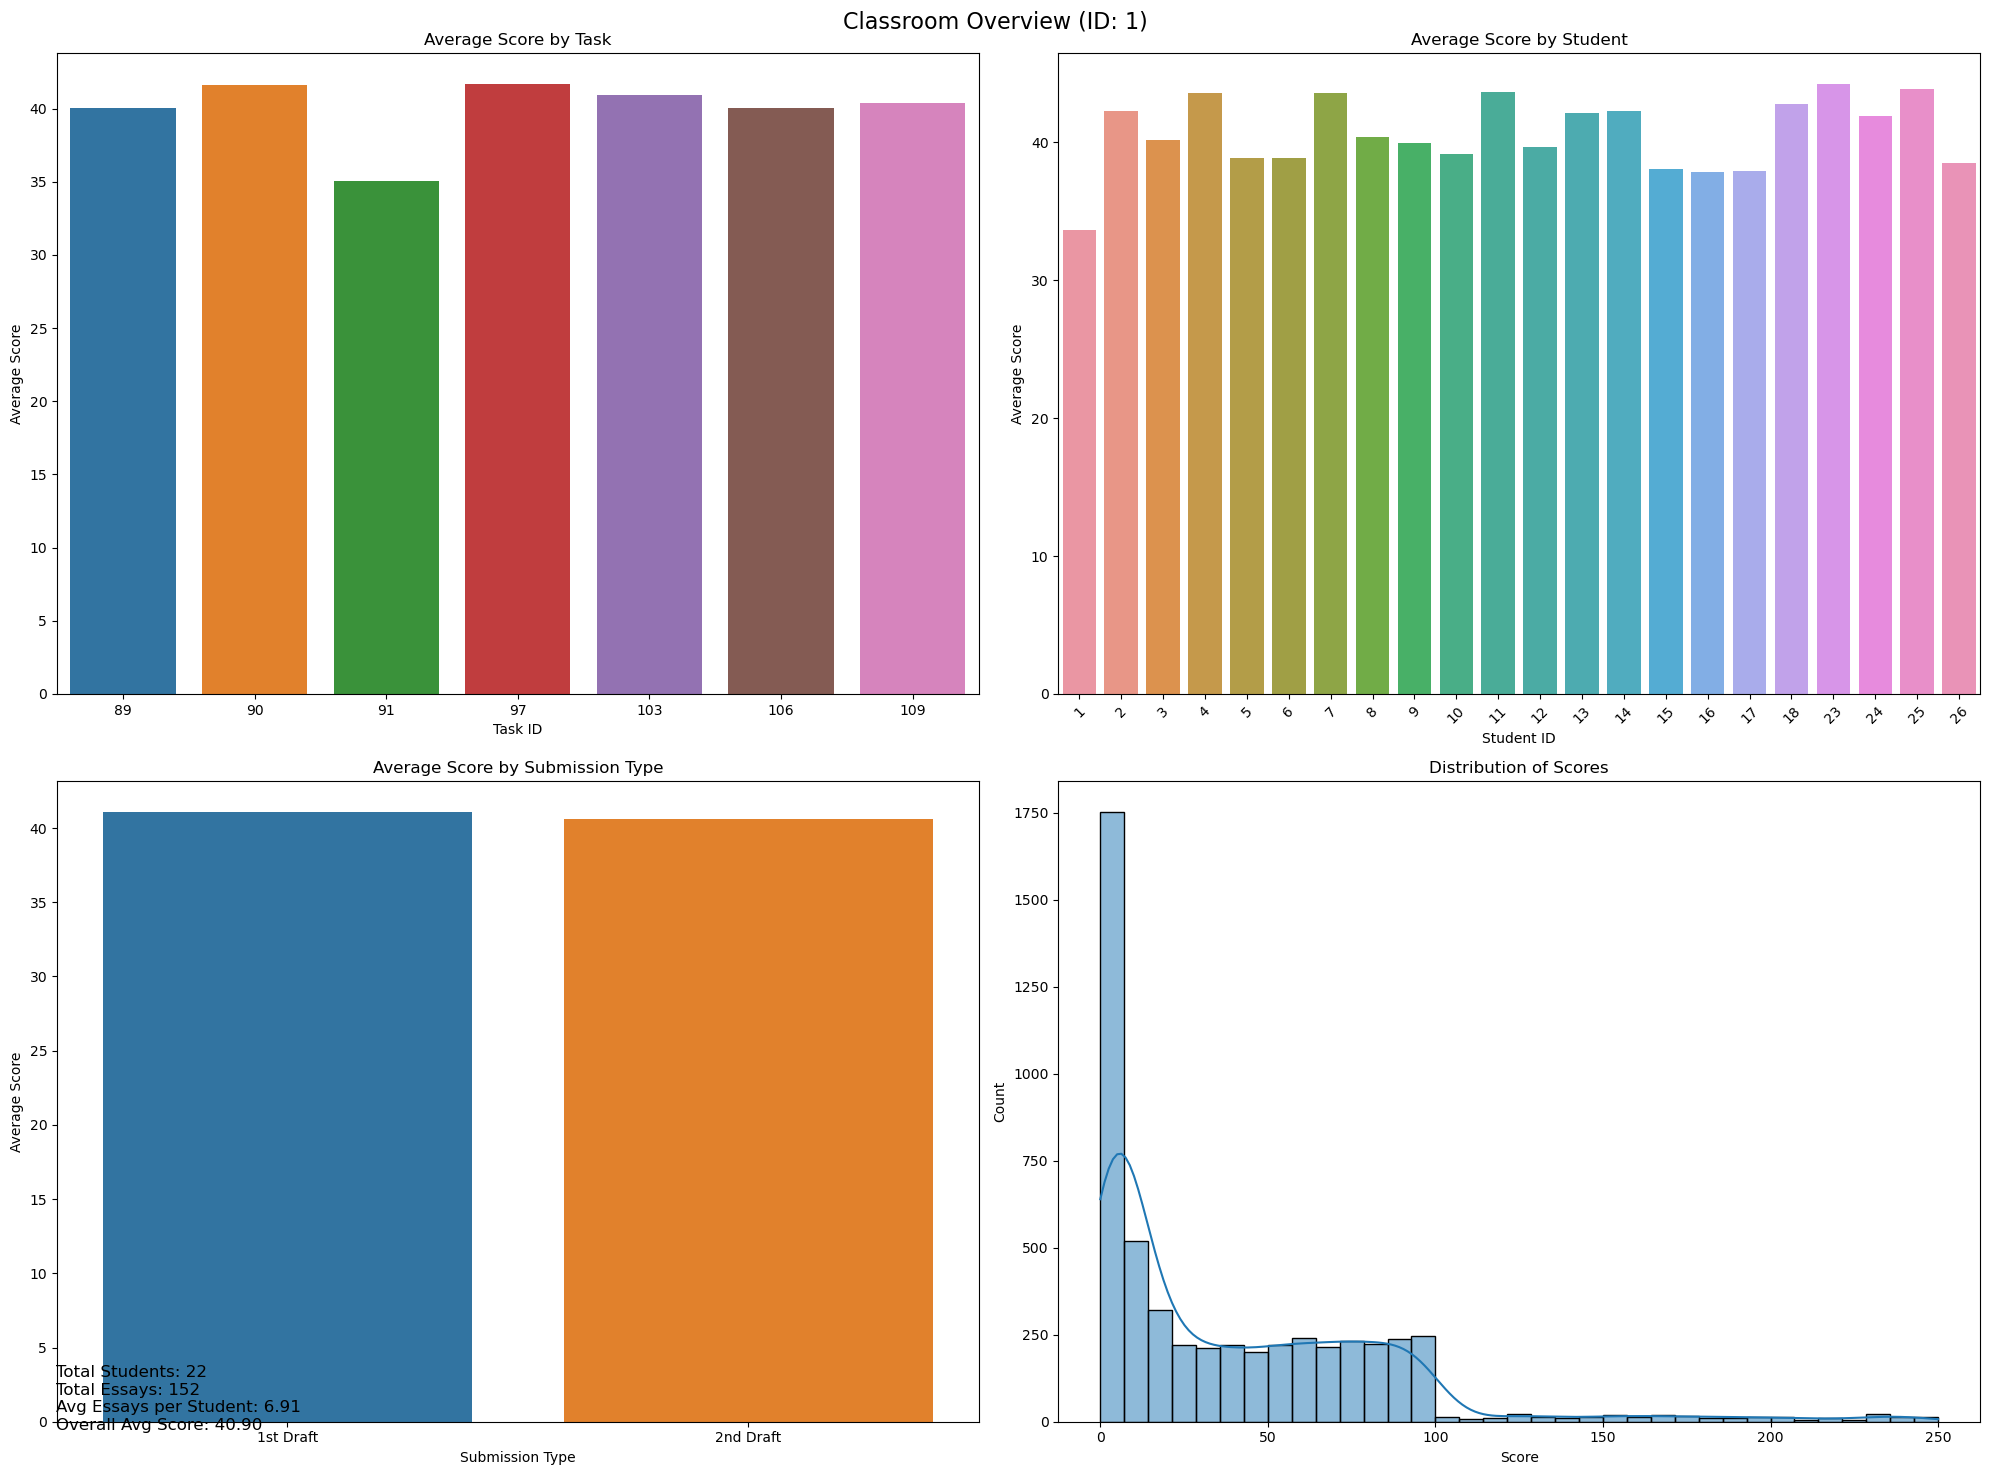


Available Task IDs for this classroom: [97, 90, 103, 109, 106, 89, 91]
Enter a task ID from the above list: 90


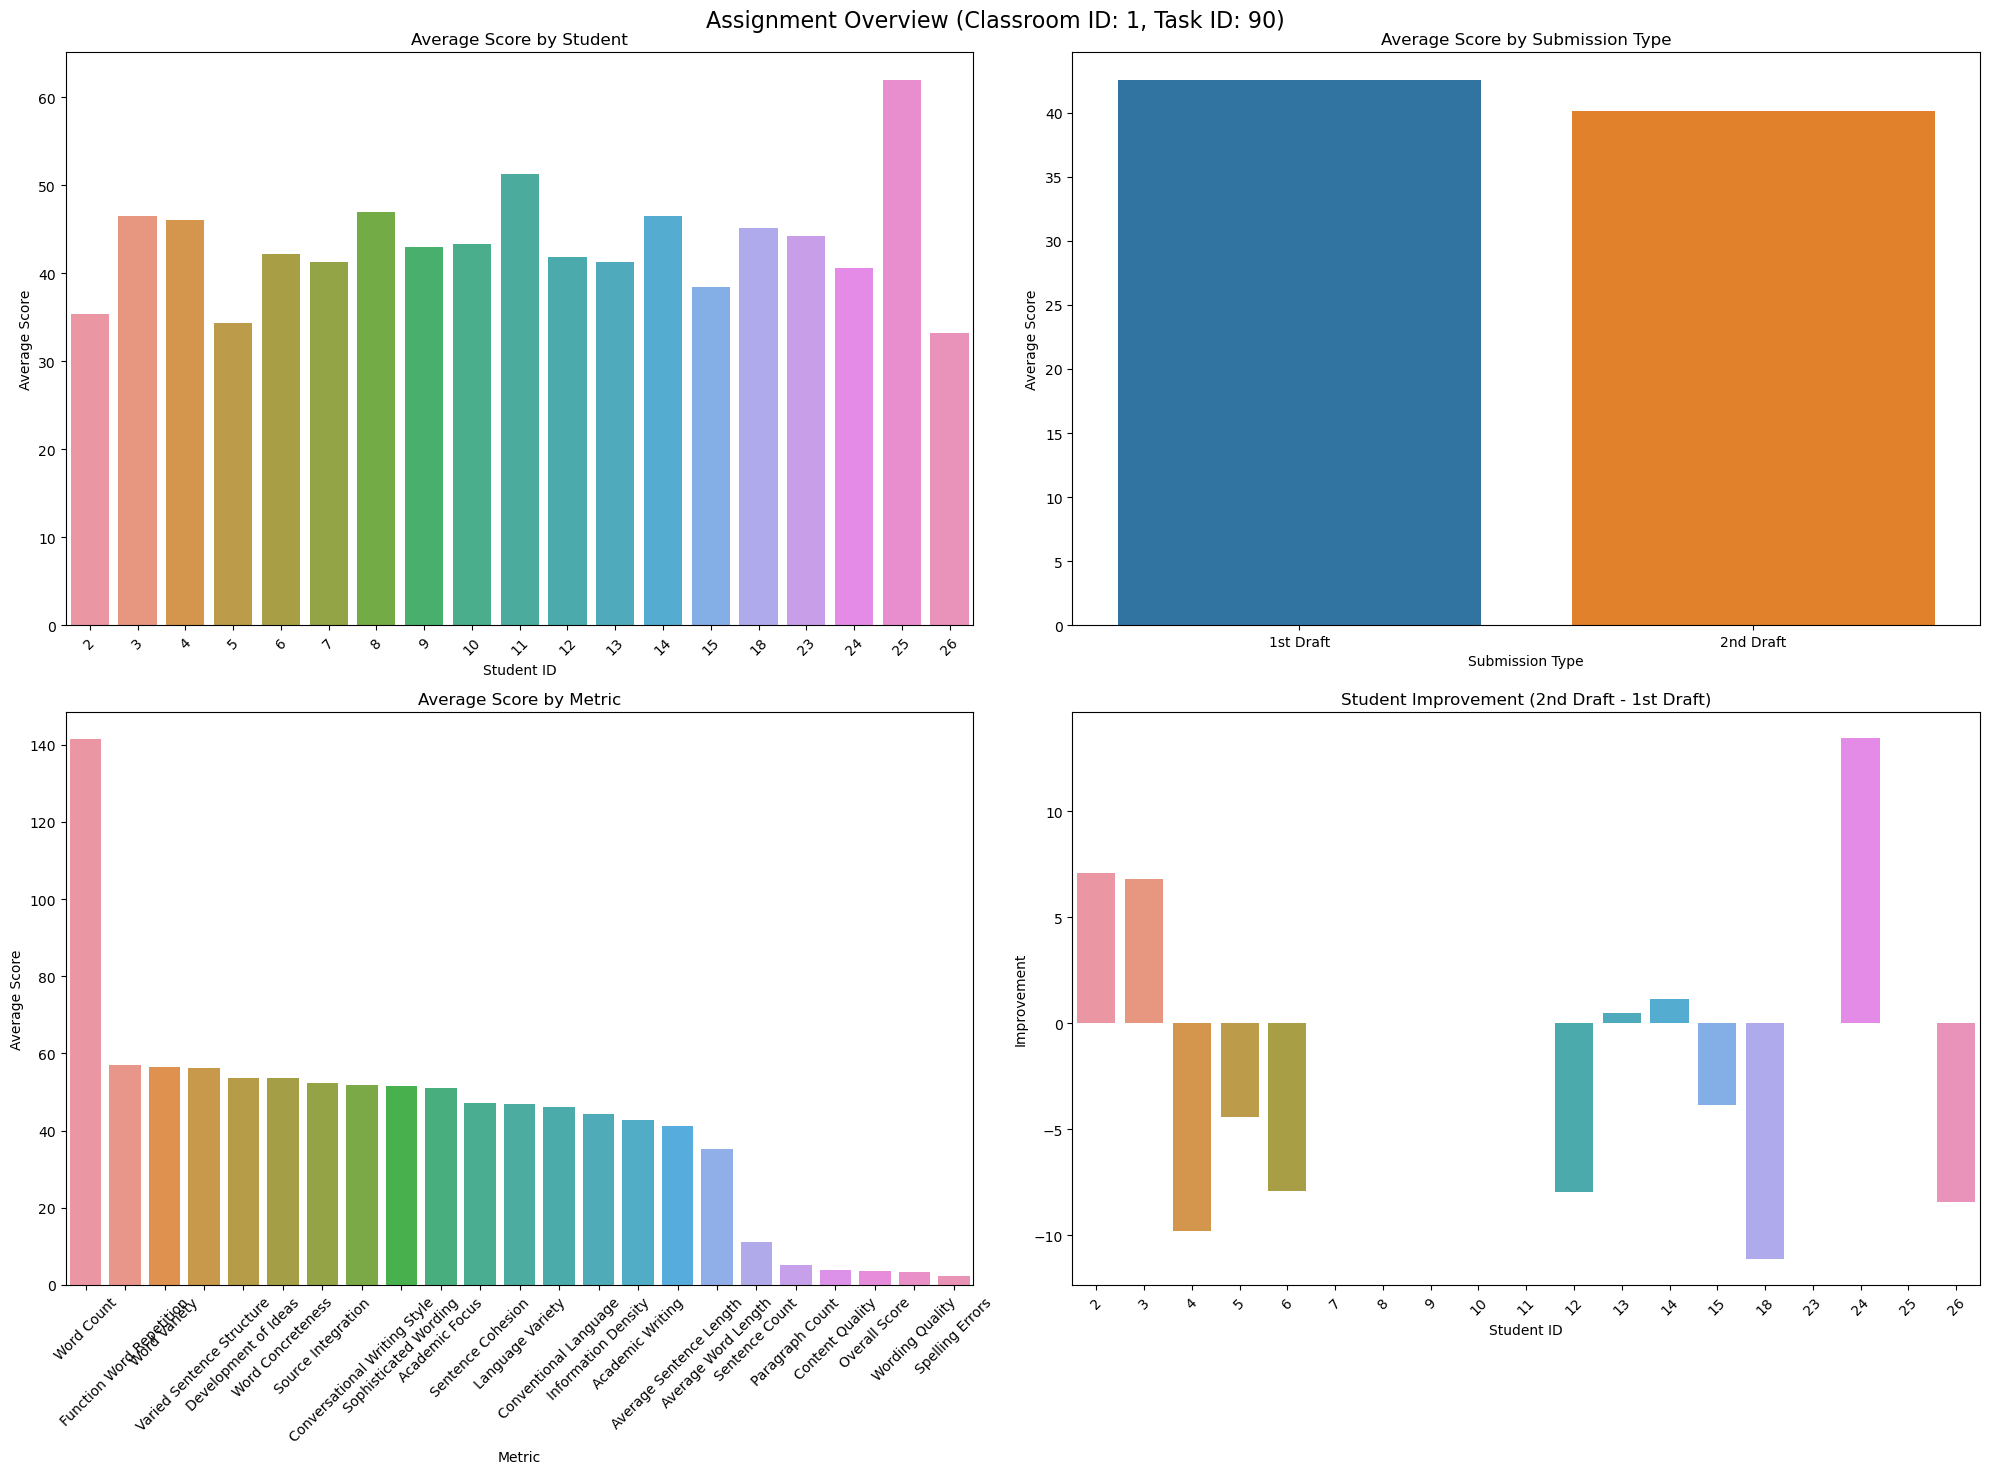


Available Student IDs for this classroom: [23, 25, 11, 4, 7, 18, 2, 14, 13, 24, 8, 3, 9, 12, 10, 5, 6, 26, 15, 17, 16, 1]
Enter a student ID from the above list: 1


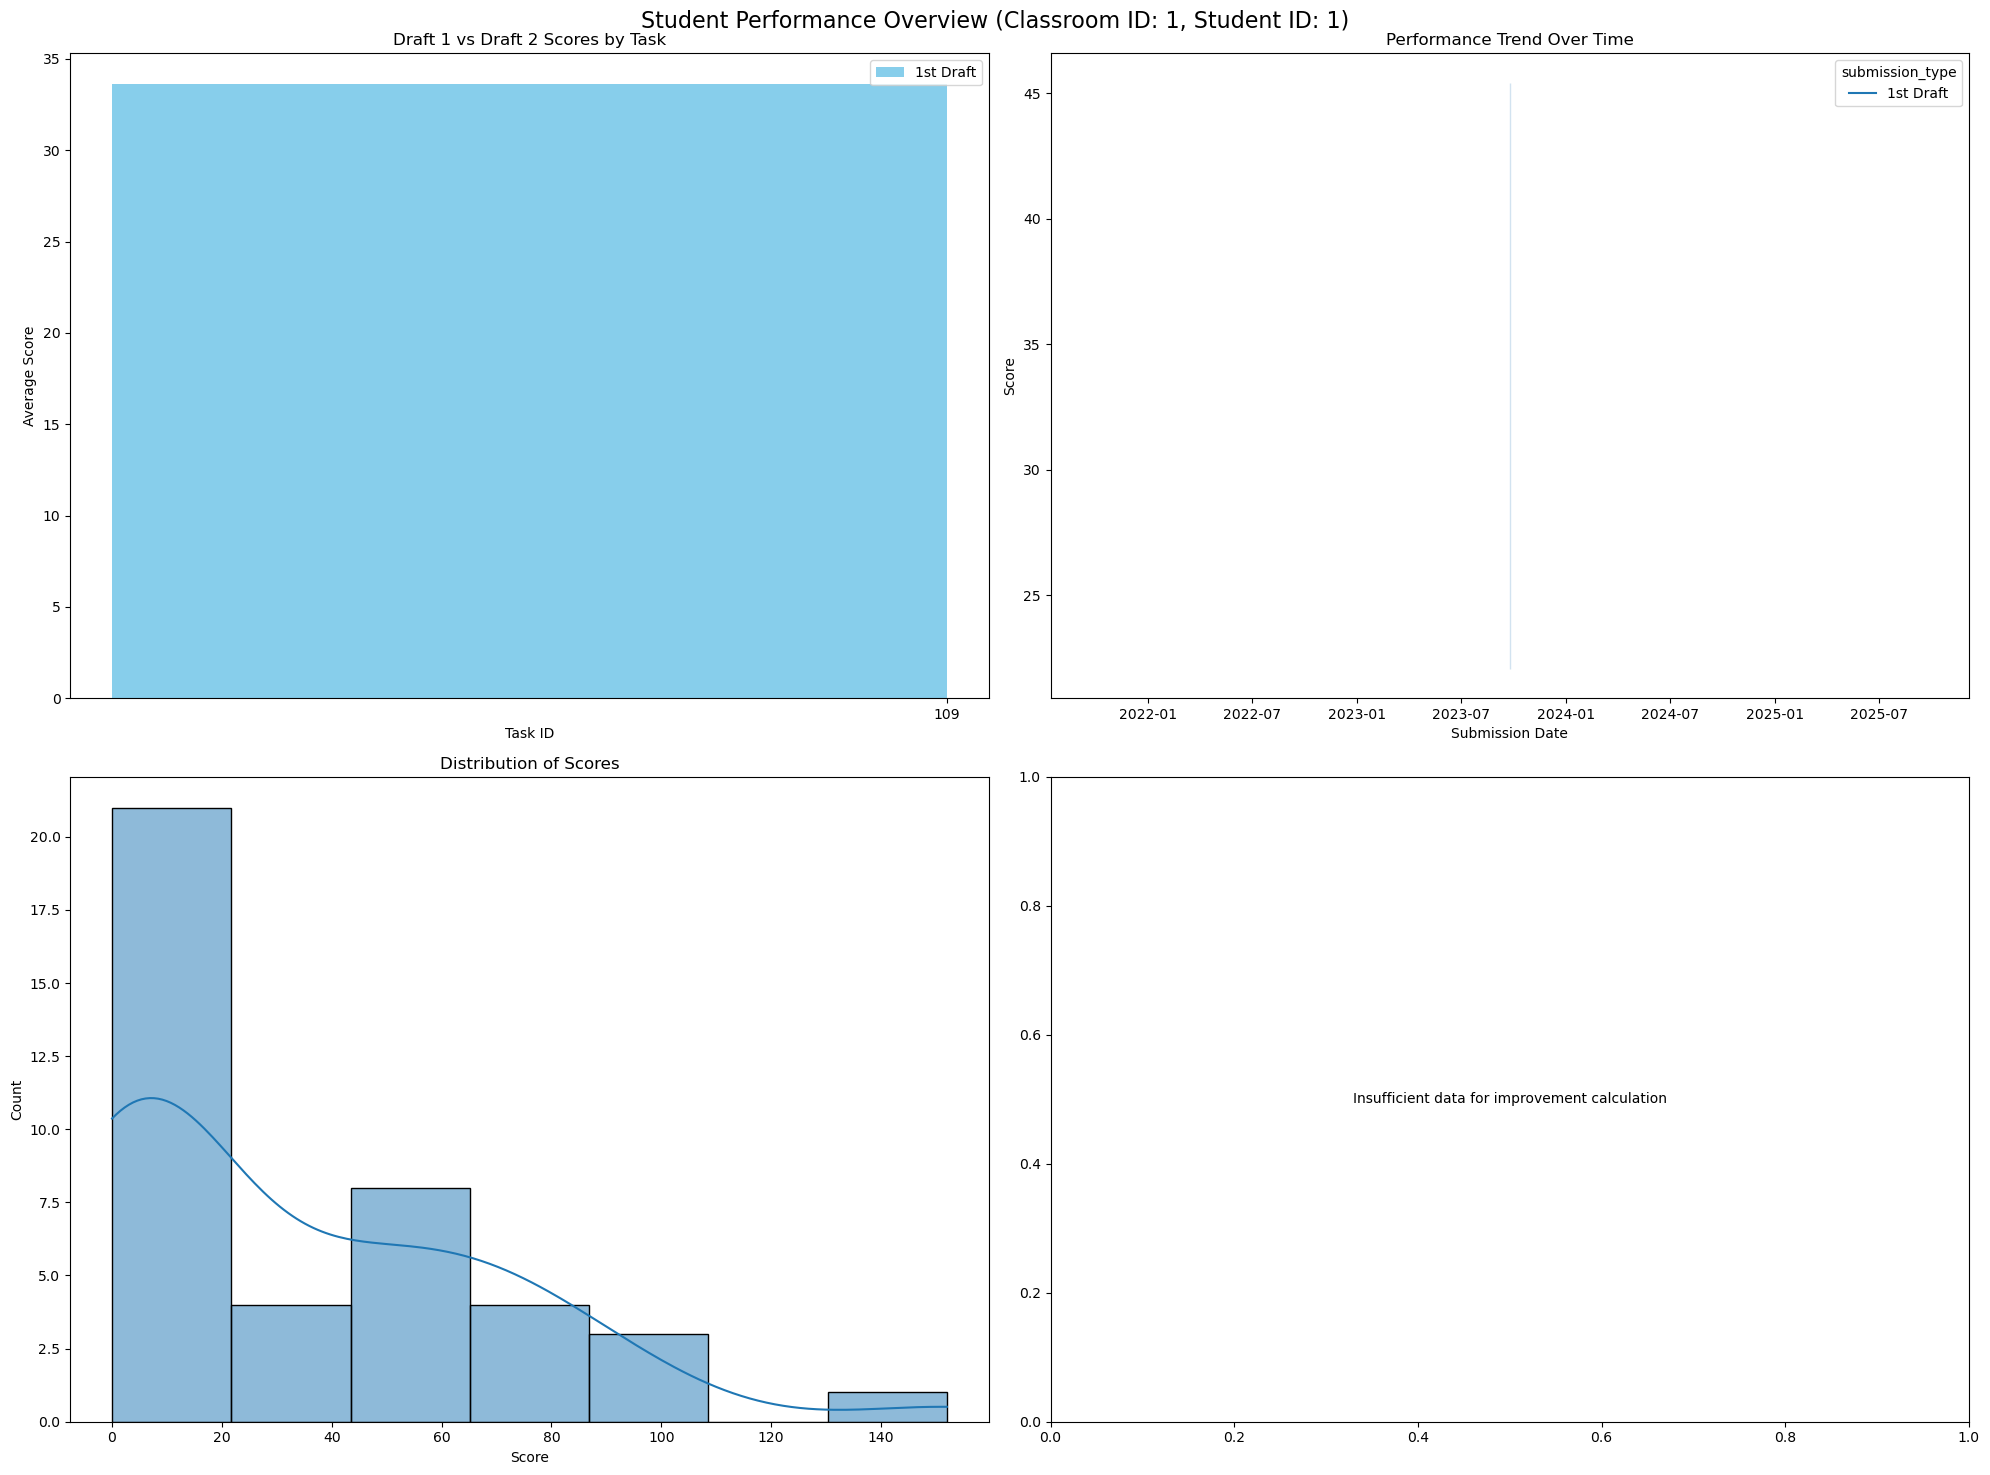


Student Statistics:
Total Essays: 1
Average Score (1st Draft): 33.62
Overall Average Score: 33.62
Highest Score: 152.00
Lowest Score: 0.00


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_classroom_overview(classroom_id):
    # Filter essays for the given classroom_id
    essays_classroom = essay_df[essay_df['classroom_id'] == classroom_id]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_classroom[['id', 'task_id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Classroom Overview (ID: {classroom_id})', fontsize=16)
    
    # 1. Task Performance Overview
    ax1 = fig.add_subplot(221)
    task_avg_scores = scores_with_info.groupby('task_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=task_avg_scores.index, y=task_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Task')
    ax1.set_xlabel('Task ID')
    ax1.set_ylabel('Average Score')
    
    # 2. Student Performance Overview
    ax2 = fig.add_subplot(222)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax2)
    ax2.set_title('Average Score by Student')
    ax2.set_xlabel('Student ID')
    ax2.set_ylabel('Average Score')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Draft Comparison
    ax3 = fig.add_subplot(223)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax3)
    ax3.set_title('Average Score by Submission Type')
    ax3.set_xlabel('Submission Type')
    ax3.set_ylabel('Average Score')
    
    # 4. Score Distribution
    ax4 = fig.add_subplot(224)
    sns.histplot(scores_with_info['score'], kde=True, ax=ax4)
    ax4.set_title('Distribution of Scores')
    ax4.set_xlabel('Score')
    ax4.set_ylabel('Count')
    
    # Additional statistics
    total_students = len(essays_classroom['student_id'].unique())
    total_essays = len(essays_classroom)
    avg_essays_per_student = total_essays / total_students
    
    stats_text = f"""
    Total Students: {total_students}
    Total Essays: {total_essays}
    Avg Essays per Student: {avg_essays_per_student:.2f}
    Overall Avg Score: {scores_with_info['score'].mean():.2f}
    """
    fig.text(0.02, 0.02, stats_text, fontsize=12, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return task_avg_scores.index.tolist(), student_avg_scores.index.tolist()

def plot_assignment_overview(classroom_id, task_id):
    # Filter essays for the given classroom_id and task_id
    essays_task = essay_df[(essay_df['classroom_id'] == classroom_id) & (essay_df['task_id'] == task_id)]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_task[['id', 'submission_type', 'student_id']], 
                                left_on='essay_id', right_on='id')
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metric_df[['id', 'name']], left_on='metric_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Assignment Overview (Classroom ID: {classroom_id}, Task ID: {task_id})', fontsize=16)
    
    # 1. Student Performance Comparison
    ax1 = fig.add_subplot(221)
    student_avg_scores = scores_with_info.groupby('student_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=student_avg_scores.index, y=student_avg_scores.values, ax=ax1)
    ax1.set_title('Average Score by Student')
    ax1.set_xlabel('Student ID')
    ax1.set_ylabel('Average Score')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Draft Comparison
    ax2 = fig.add_subplot(222)
    draft_comparison = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_comparison.index, y=draft_comparison.values, ax=ax2)
    ax2.set_title('Average Score by Submission Type')
    ax2.set_xlabel('Submission Type')
    ax2.set_ylabel('Average Score')
    
    # 3. Metric Performance
    ax3 = fig.add_subplot(223)
    metric_performance = scores_with_metrics.groupby('name')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=metric_performance.index, y=metric_performance.values, ax=ax3)
    ax3.set_title('Average Score by Metric')
    ax3.set_xlabel('Metric')
    ax3.set_ylabel('Average Score')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Student Improvement
    ax4 = fig.add_subplot(224)
    student_improvement = scores_with_info.groupby(['student_id', 'submission_type'])['score'].mean().unstack()
    if '1st Draft' in student_improvement.columns and '2nd Draft' in student_improvement.columns:
        student_improvement['Improvement'] = student_improvement['2nd Draft'] - student_improvement['1st Draft']
        student_improvement = student_improvement.sort_values('Improvement', ascending=False)
        sns.barplot(x=student_improvement.index, y=student_improvement['Improvement'], ax=ax4)
        ax4.set_title('Student Improvement (2nd Draft - 1st Draft)')
        ax4.set_xlabel('Student ID')
        ax4.set_ylabel('Improvement')
        ax4.tick_params(axis='x', rotation=45)
    else:
        ax4.text(0.5, 0.5, 'Insufficient data for improvement calculation', 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

def plot_student_performance(classroom_id, student_id):
    # Filter essays for the given classroom_id and student_id
    essays_student = essay_df[(essay_df['classroom_id'] == classroom_id) & (essay_df['student_id'] == student_id)]
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_student[['id', 'task_id', 'submission_type', 'submitted_on']], 
                                left_on='essay_id', right_on='id')
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Student Performance Overview (Classroom ID: {classroom_id}, Student ID: {student_id})', fontsize=16)
    
    # 1. Double Bar Graph: Draft 1 vs Draft 2 for each task
    ax1 = fig.add_subplot(221)
    task_draft_scores = scores_with_info.groupby(['task_id', 'submission_type'])['score'].mean().unstack()
    
    x = np.arange(len(task_draft_scores.index))
    width = 0.35
    
    if '1st Draft' in task_draft_scores.columns:
        ax1.bar(x - width/2, task_draft_scores['1st Draft'], width, label='1st Draft', color='skyblue')
    if '2nd Draft' in task_draft_scores.columns:
        ax1.bar(x + width/2, task_draft_scores['2nd Draft'], width, label='2nd Draft', color='lightgreen')
    
    ax1.set_xlabel('Task ID')
    ax1.set_ylabel('Average Score')
    ax1.set_title('Draft 1 vs Draft 2 Scores by Task')
    ax1.set_xticks(x)
    ax1.set_xticklabels(task_draft_scores.index)
    ax1.legend()
    
    # 2. Performance Trend Over Time
    ax2 = fig.add_subplot(222)
    scores_with_info['date'] = pd.to_datetime(scores_with_info['submitted_on'])
    scores_with_info = scores_with_info.sort_values('date')
    sns.lineplot(data=scores_with_info, x='date', y='score', hue='submission_type', ax=ax2)
    ax2.set_title('Performance Trend Over Time')
    ax2.set_xlabel('Submission Date')
    ax2.set_ylabel('Score')
    
    # 3. Score Distribution
    ax3 = fig.add_subplot(223)
    sns.histplot(scores_with_info['score'], kde=True, ax=ax3)
    ax3.set_title('Distribution of Scores')
    ax3.set_xlabel('Score')
    ax3.set_ylabel('Count')
    
    # 4. Improvement by Task
    ax4 = fig.add_subplot(224)
    if '1st Draft' in task_draft_scores.columns and '2nd Draft' in task_draft_scores.columns:
        improvement = task_draft_scores['2nd Draft'] - task_draft_scores['1st Draft']
        sns.barplot(x=improvement.index, y=improvement.values, ax=ax4)
        ax4.set_title('Score Improvement (2nd Draft - 1st Draft) by Task')
        ax4.set_xlabel('Task ID')
        ax4.set_ylabel('Score Improvement')
    else:
        ax4.text(0.5, 0.5, 'Insufficient data for improvement calculation', 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

    # Print some additional statistics
    print(f"\nStudent Statistics:")
    print(f"Total Essays: {len(essays_student)}")
    if '1st Draft' in scores_with_info['submission_type'].values:
        print(f"Average Score (1st Draft): {scores_with_info[scores_with_info['submission_type'] == '1st Draft']['score'].mean():.2f}")
    if '2nd Draft' in scores_with_info['submission_type'].values:
        print(f"Average Score (2nd Draft): {scores_with_info[scores_with_info['submission_type'] == '2nd Draft']['score'].mean():.2f}")
    print(f"Overall Average Score: {scores_with_info['score'].mean():.2f}")
    print(f"Highest Score: {scores_with_info['score'].max():.2f}")
    print(f"Lowest Score: {scores_with_info['score'].min():.2f}")
    if '1st Draft' in task_draft_scores.columns and '2nd Draft' in task_draft_scores.columns:
        print(f"Average Improvement: {(task_draft_scores['2nd Draft'] - task_draft_scores['1st Draft']).mean():.2f}")

# Main execution
classroom_id_input = int(input("Enter a classroom ID: "))
task_ids, student_ids = plot_classroom_overview(classroom_id_input)

print("\nAvailable Task IDs for this classroom:", task_ids)
task_id_input = int(input("Enter a task ID from the above list: "))
plot_assignment_overview(classroom_id_input, task_id_input)

print("\nAvailable Student IDs for this classroom:", student_ids)
student_id_input = int(input("Enter a student ID from the above list: "))
plot_student_performance(classroom_id_input, student_id_input)


Enter a classroom ID: 1
Enter a task ID: 89
Enter a student ID: 3


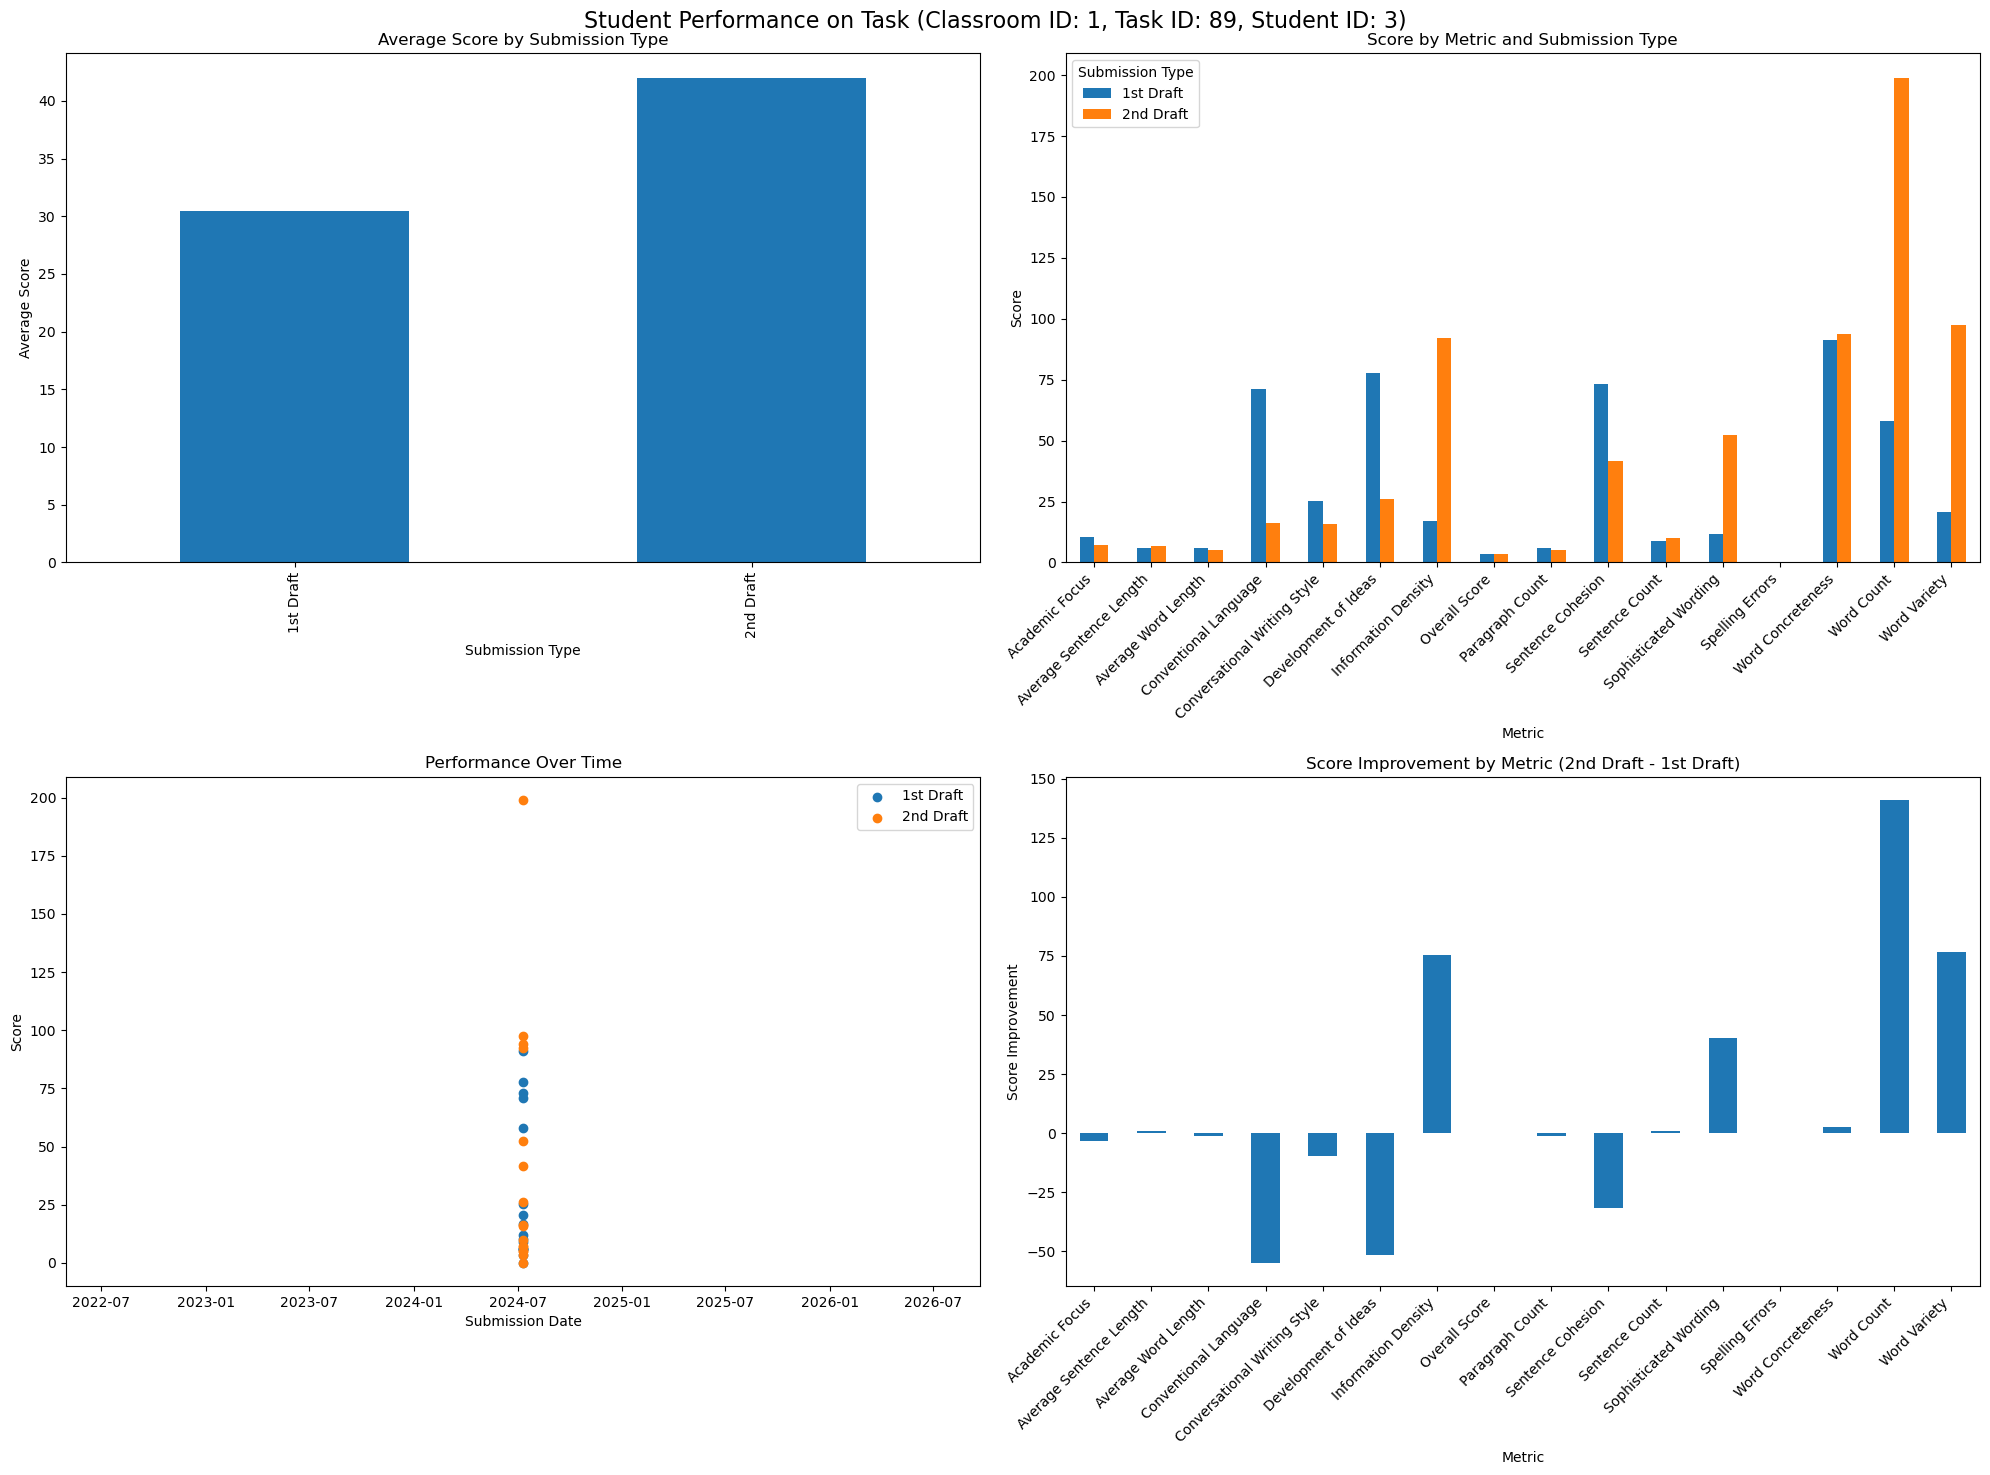


Student Task Statistics:
Total Submissions: 2
Average Score (1st Draft): 30.43
Average Score (2nd Draft): 42.01
Overall Average Score: 36.22
Average Improvement: 11.58


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_student_task_performance(classroom_id, task_id, student_id):
    # Filter essays for the given classroom_id, task_id, and student_id
    essays_student_task = essay_df[(essay_df['classroom_id'] == classroom_id) & 
                                   (essay_df['task_id'] == task_id) & 
                                   (essay_df['student_id'] == student_id)]
    
    if essays_student_task.empty:
        print(f"No data found for Classroom ID: {classroom_id}, Task ID: {task_id}, Student ID: {student_id}")
        return
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_student_task[['id', 'submission_type', 'submitted_on']], 
                                left_on='essay_id', right_on='id')
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metric_df[['id', 'name']], left_on='metric_id', right_on='id')
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'Student Performance on Task (Classroom ID: {classroom_id}, Task ID: {task_id}, Student ID: {student_id})', fontsize=16)
    
    # 1. Draft Comparison
    draft_scores = scores_with_info.groupby('submission_type')['score'].mean()
    draft_scores.plot(kind='bar', ax=axs[0, 0])
    axs[0, 0].set_title('Average Score by Submission Type')
    axs[0, 0].set_xlabel('Submission Type')
    axs[0, 0].set_ylabel('Average Score')
    
    # 2. Metric Performance
    metric_performance = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()
    metric_performance.plot(kind='bar', ax=axs[0, 1])
    axs[0, 1].set_title('Score by Metric and Submission Type')
    axs[0, 1].set_xlabel('Metric')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend(title='Submission Type')
    plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 3. Performance Over Time
    scores_with_info['date'] = pd.to_datetime(scores_with_info['submitted_on'])
    scores_with_info = scores_with_info.sort_values('date')
    for submission_type in scores_with_info['submission_type'].unique():
        data = scores_with_info[scores_with_info['submission_type'] == submission_type]
        axs[1, 0].scatter(data['date'], data['score'], label=submission_type)
    axs[1, 0].set_title('Performance Over Time')
    axs[1, 0].set_xlabel('Submission Date')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].legend()
    
    # 4. Improvement by Metric
    if len(metric_performance.columns) == 2:  # Only if we have both 1st and 2nd drafts
        metric_improvement = metric_performance.iloc[:, 1] - metric_performance.iloc[:, 0]
        metric_improvement.plot(kind='bar', ax=axs[1, 1])
        axs[1, 1].set_title('Score Improvement by Metric (2nd Draft - 1st Draft)')
        axs[1, 1].set_xlabel('Metric')
        axs[1, 1].set_ylabel('Score Improvement')
        plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        axs[1, 1].text(0.5, 0.5, 'Insufficient data for improvement calculation', 
                       horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

    # Print additional statistics
    print(f"\nStudent Task Statistics:")
    print(f"Total Submissions: {len(essays_student_task)}")
    for submission_type in scores_with_info['submission_type'].unique():
        print(f"Average Score ({submission_type}): {scores_with_info[scores_with_info['submission_type'] == submission_type]['score'].mean():.2f}")
    print(f"Overall Average Score: {scores_with_info['score'].mean():.2f}")
    if len(draft_scores) == 2:
        print(f"Average Improvement: {(draft_scores.iloc[1] - draft_scores.iloc[0]):.2f}")

# Main execution
classroom_id_input = int(input("Enter a classroom ID: "))
task_id_input = int(input("Enter a task ID: "))
student_id_input = int(input("Enter a student ID: "))
plot_student_task_performance(classroom_id_input, task_id_input, student_id_input)


In [128]:
valid_combinations = essay_df.groupby(['classroom_id', 'task_id', 'student_id']).size().reset_index()
print(valid_combinations)


     classroom_id  task_id  student_id  0
0               1       89           3  2
1               1       89           4  1
2               1       89           5  2
3               1       89           6  1
4               1       89           7  1
..            ...      ...         ... ..
147             6      105          14  1
148             6      105          18  1
149             6      105          26  2
150             6      108           8  2
151            41       98          65  2

[152 rows x 4 columns]


Enter a classroom ID: 1
Enter a task ID: 90
Enter a student ID: 3
Enter a category ID: 3


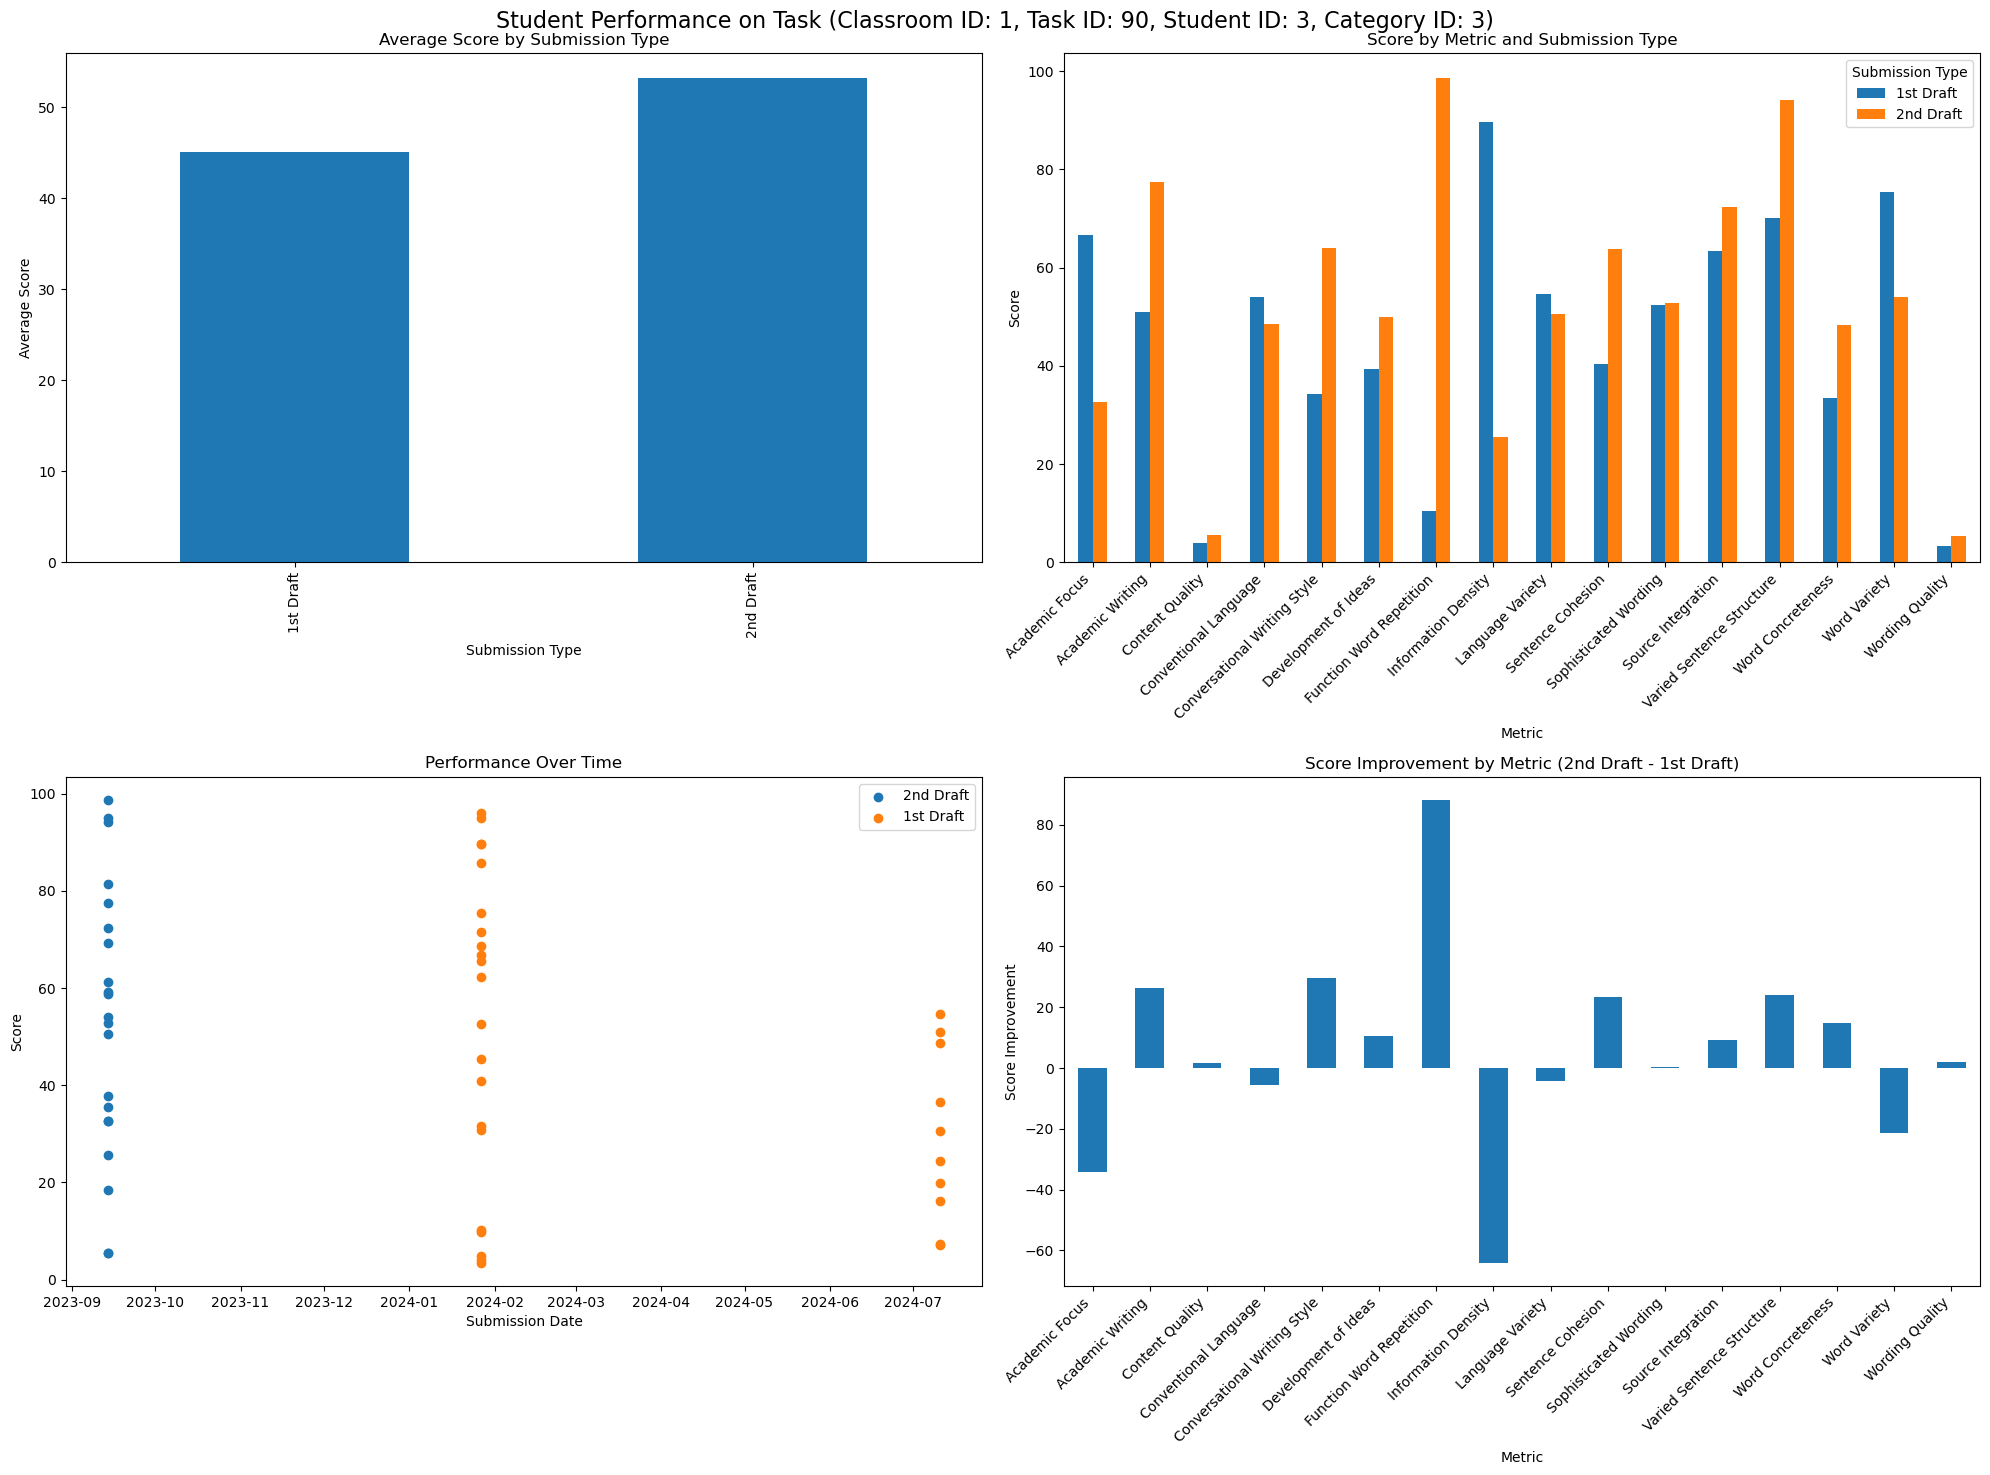


Student Task Statistics for Category ID 3:
Total Submissions: 3
Average Score (2nd Draft): 53.25
Average Score (1st Draft): 45.04
Overall Average Score: 48.36
Average Improvement: 8.21


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_student_task_performance(classroom_id, task_id, student_id, category_id):
    # Filter essays for the given classroom_id, task_id, and student_id
    essays_student_task = essay_df[(essay_df['classroom_id'] == classroom_id) & 
                                   (essay_df['task_id'] == task_id) & 
                                   (essay_df['student_id'] == student_id)]
    
    if essays_student_task.empty:
        print(f"No data found for Classroom ID: {classroom_id}, Task ID: {task_id}, Student ID: {student_id}")
        return
    
    # Filter metrics for the given category_id
    metrics_category = metric_df[metric_df['category_id'] == category_id]
    
    # Merge essay scores with essay data and filter for the selected category
    scores_with_info = pd.merge(essay_score_df, essays_student_task[['id', 'submission_type', 'submitted_on']], 
                                left_on='essay_id', right_on='id')
    scores_with_info = scores_with_info[scores_with_info['metric_id'].isin(metrics_category['id'])]
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metrics_category[['id', 'name']], left_on='metric_id', right_on='id')
    
    if scores_with_metrics.empty:
        print(f"No data found for the specified category (ID: {category_id}) in this task.")
        return
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'Student Performance on Task (Classroom ID: {classroom_id}, Task ID: {task_id}, Student ID: {student_id}, Category ID: {category_id})', fontsize=16)
    
    # 1. Draft Comparison
    draft_scores = scores_with_info.groupby('submission_type')['score'].mean()
    draft_scores.plot(kind='bar', ax=axs[0, 0])
    axs[0, 0].set_title('Average Score by Submission Type')
    axs[0, 0].set_xlabel('Submission Type')
    axs[0, 0].set_ylabel('Average Score')
    
    # 2. Metric Performance
    metric_performance = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()
    metric_performance.plot(kind='bar', ax=axs[0, 1])
    axs[0, 1].set_title('Score by Metric and Submission Type')
    axs[0, 1].set_xlabel('Metric')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend(title='Submission Type')
    plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 3. Performance Over Time
    scores_with_info['date'] = pd.to_datetime(scores_with_info['submitted_on'])
    scores_with_info = scores_with_info.sort_values('date')
    for submission_type in scores_with_info['submission_type'].unique():
        data = scores_with_info[scores_with_info['submission_type'] == submission_type]
        axs[1, 0].scatter(data['date'], data['score'], label=submission_type)
    axs[1, 0].set_title('Performance Over Time')
    axs[1, 0].set_xlabel('Submission Date')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].legend()
    
    # 4. Improvement by Metric
    if len(metric_performance.columns) == 2:  # Only if we have both 1st and 2nd drafts
        metric_improvement = metric_performance.iloc[:, 1] - metric_performance.iloc[:, 0]
        metric_improvement.plot(kind='bar', ax=axs[1, 1])
        axs[1, 1].set_title('Score Improvement by Metric (2nd Draft - 1st Draft)')
        axs[1, 1].set_xlabel('Metric')
        axs[1, 1].set_ylabel('Score Improvement')
        plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        axs[1, 1].text(0.5, 0.5, 'Insufficient data for improvement calculation', 
                       horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

    # Print additional statistics
    print(f"\nStudent Task Statistics for Category ID {category_id}:")
    print(f"Total Submissions: {len(essays_student_task)}")
    for submission_type in scores_with_info['submission_type'].unique():
        print(f"Average Score ({submission_type}): {scores_with_info[scores_with_info['submission_type'] == submission_type]['score'].mean():.2f}")
    print(f"Overall Average Score: {scores_with_info['score'].mean():.2f}")
    if len(draft_scores) == 2:
        print(f"Average Improvement: {(draft_scores.iloc[1] - draft_scores.iloc[0]):.2f}")

# Main execution
classroom_id_input = int(input("Enter a classroom ID: "))
task_id_input = int(input("Enter a task ID: "))
student_id_input = int(input("Enter a student ID: "))
category_id_input = int(input("Enter a category ID: "))
plot_student_task_performance(classroom_id_input, task_id_input, student_id_input, category_id_input)


Enter a classroom ID: 1
Enter a task ID: 90
Enter a student ID: 3
Enter a category ID: 3

Student Task Statistics for Category ID 3:
Total Submissions: 3
Average Score (2nd Draft): 58.28
Average Score (1st Draft): 47.89
Overall Average Score: 52.00


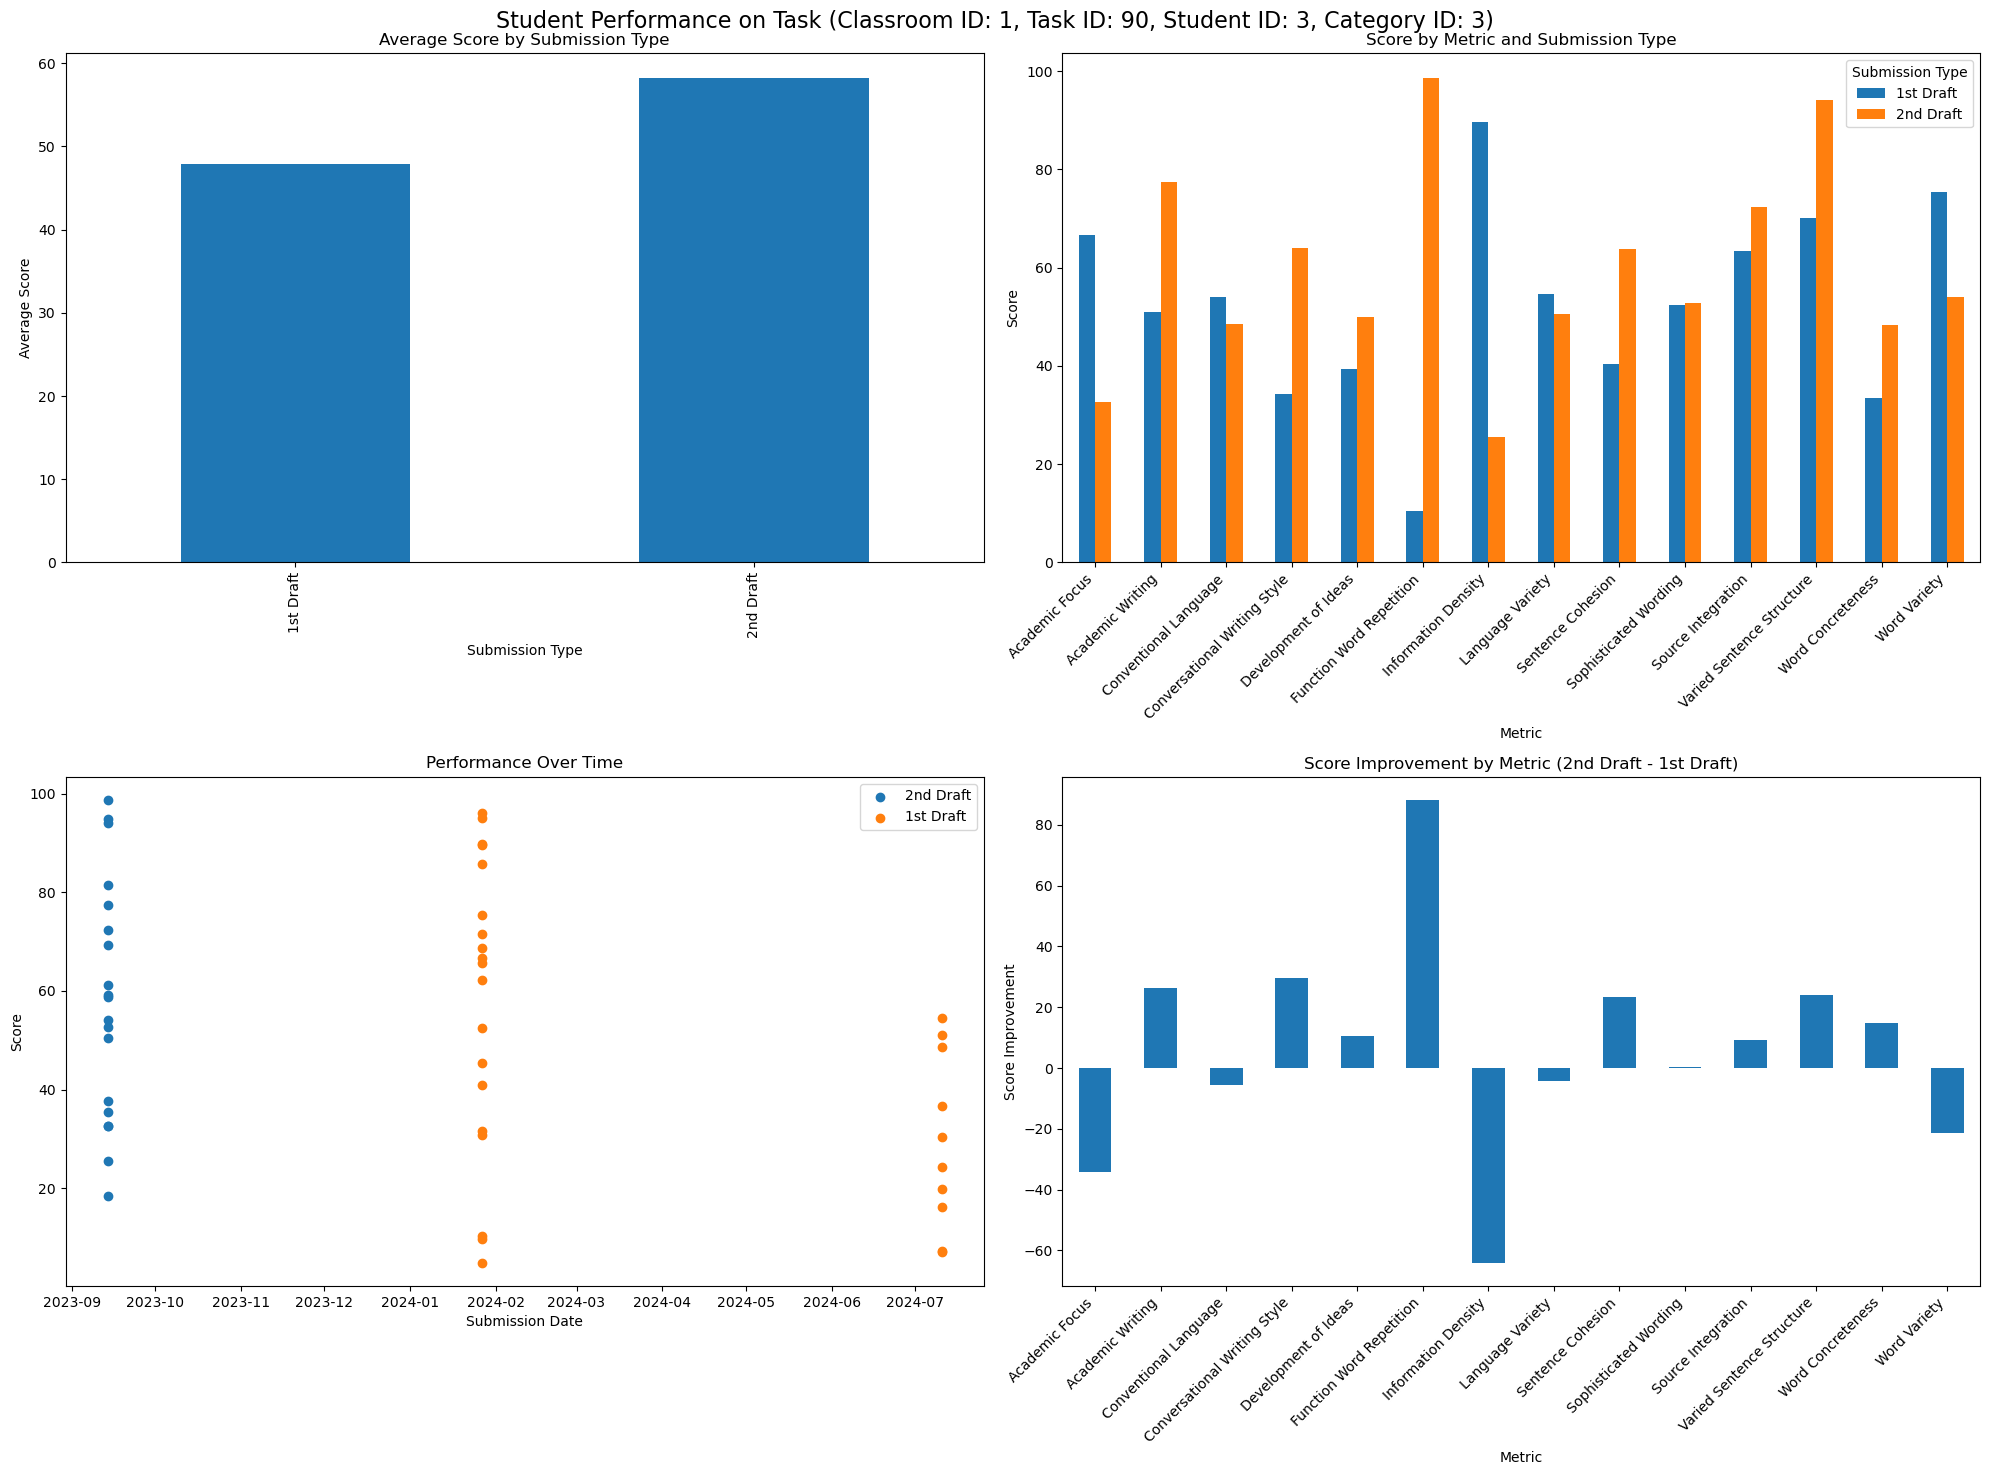

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_student_task_performance(classroom_id, task_id, student_id, category_id):
    # Filter essays for the given classroom_id, task_id, and student_id
    essays_student_task = essay_df[(essay_df['classroom_id'] == classroom_id) & 
                                   (essay_df['task_id'] == task_id) & 
                                   (essay_df['student_id'] == student_id)]
    
    if essays_student_task.empty:
        print(f"No data found for Classroom ID: {classroom_id}, Task ID: {task_id}, Student ID: {student_id}")
        return
    
    # Filter metrics for the given category_id, excluding specific names
    metrics_category = metric_df[
        (metric_df['category_id'] == category_id) & 
        (~metric_df['name'].isin(['Content Quality', 'Wording Quality']))
    ]
    
    # Merge essay scores with essay data and filter for the selected category
    scores_with_info = pd.merge(essay_score_df, essays_student_task[['id', 'submission_type', 'submitted_on']], 
                                left_on='essay_id', right_on='id')
    
    scores_with_info = scores_with_info[scores_with_info['metric_id'].isin(metrics_category['id'])]
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metrics_category[['id', 'name']], left_on='metric_id', right_on='id')
    
    if scores_with_metrics.empty:
        print(f"No data found for the specified category (ID: {category_id}) in this task.")
        return
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'Student Performance on Task (Classroom ID: {classroom_id}, Task ID: {task_id}, Student ID: {student_id}, Category ID: {category_id})', fontsize=16)
    
    # 1. Draft Comparison
    draft_scores = scores_with_info.groupby('submission_type')['score'].mean()
    draft_scores.plot(kind='bar', ax=axs[0, 0])
    axs[0, 0].set_title('Average Score by Submission Type')
    axs[0, 0].set_xlabel('Submission Type')
    axs[0, 0].set_ylabel('Average Score')
    
    # 2. Metric Performance
    metric_performance = scores_with_metrics.groupby(['name', 'submission_type'])['score'].mean().unstack()
    metric_performance.plot(kind='bar', ax=axs[0, 1])
    axs[0, 1].set_title('Score by Metric and Submission Type')
    axs[0, 1].set_xlabel('Metric')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend(title='Submission Type')
    plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 3. Performance Over Time
    scores_with_info['date'] = pd.to_datetime(scores_with_info['submitted_on'])
    scores_with_info = scores_with_info.sort_values('date')
    
    for submission_type in scores_with_info['submission_type'].unique():
        data = scores_with_info[scores_with_info['submission_type'] == submission_type]
        axs[1, 0].scatter(data['date'], data['score'], label=submission_type)
        
    axs[1, 0].set_title('Performance Over Time')
    axs[1, 0].set_xlabel('Submission Date')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].legend()
    
    # 4. Improvement by Metric
    if len(metric_performance.columns) == 2:  # Only if we have both drafts
        metric_improvement = metric_performance.iloc[:, 1] - metric_performance.iloc[:, 0]
        metric_improvement.plot(kind='bar', ax=axs[1, 1])
        axs[1, 1].set_title('Score Improvement by Metric (2nd Draft - 1st Draft)')
        axs[1, 1].set_xlabel('Metric')
        axs[1, 1].set_ylabel('Score Improvement')
        plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        axs[1, 1].text(0.5, 0.5, 'Insufficient data for improvement calculation', 
                       horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    
    # Print additional statistics
    print(f"\nStudent Task Statistics for Category ID {category_id}:")
    print(f"Total Submissions: {len(essays_student_task)}")
    
    for submission_type in scores_with_info['submission_type'].unique():
        print(f"Average Score ({submission_type}): {scores_with_info[scores_with_info['submission_type'] == submission_type]['score'].mean():.2f}")
        
    print(f"Overall Average Score: {scores_with_info['score'].mean():.2f}")

# Main execution
classroom_id_input = int(input("Enter a classroom ID: "))
task_id_input = int(input("Enter a task ID: "))
student_id_input = int(input("Enter a student ID: "))
category_id_input = int(input("Enter a category ID: "))
plot_student_task_performance(classroom_id_input, task_id_input, student_id_input, category_id_input)


Enter a student ID: 2


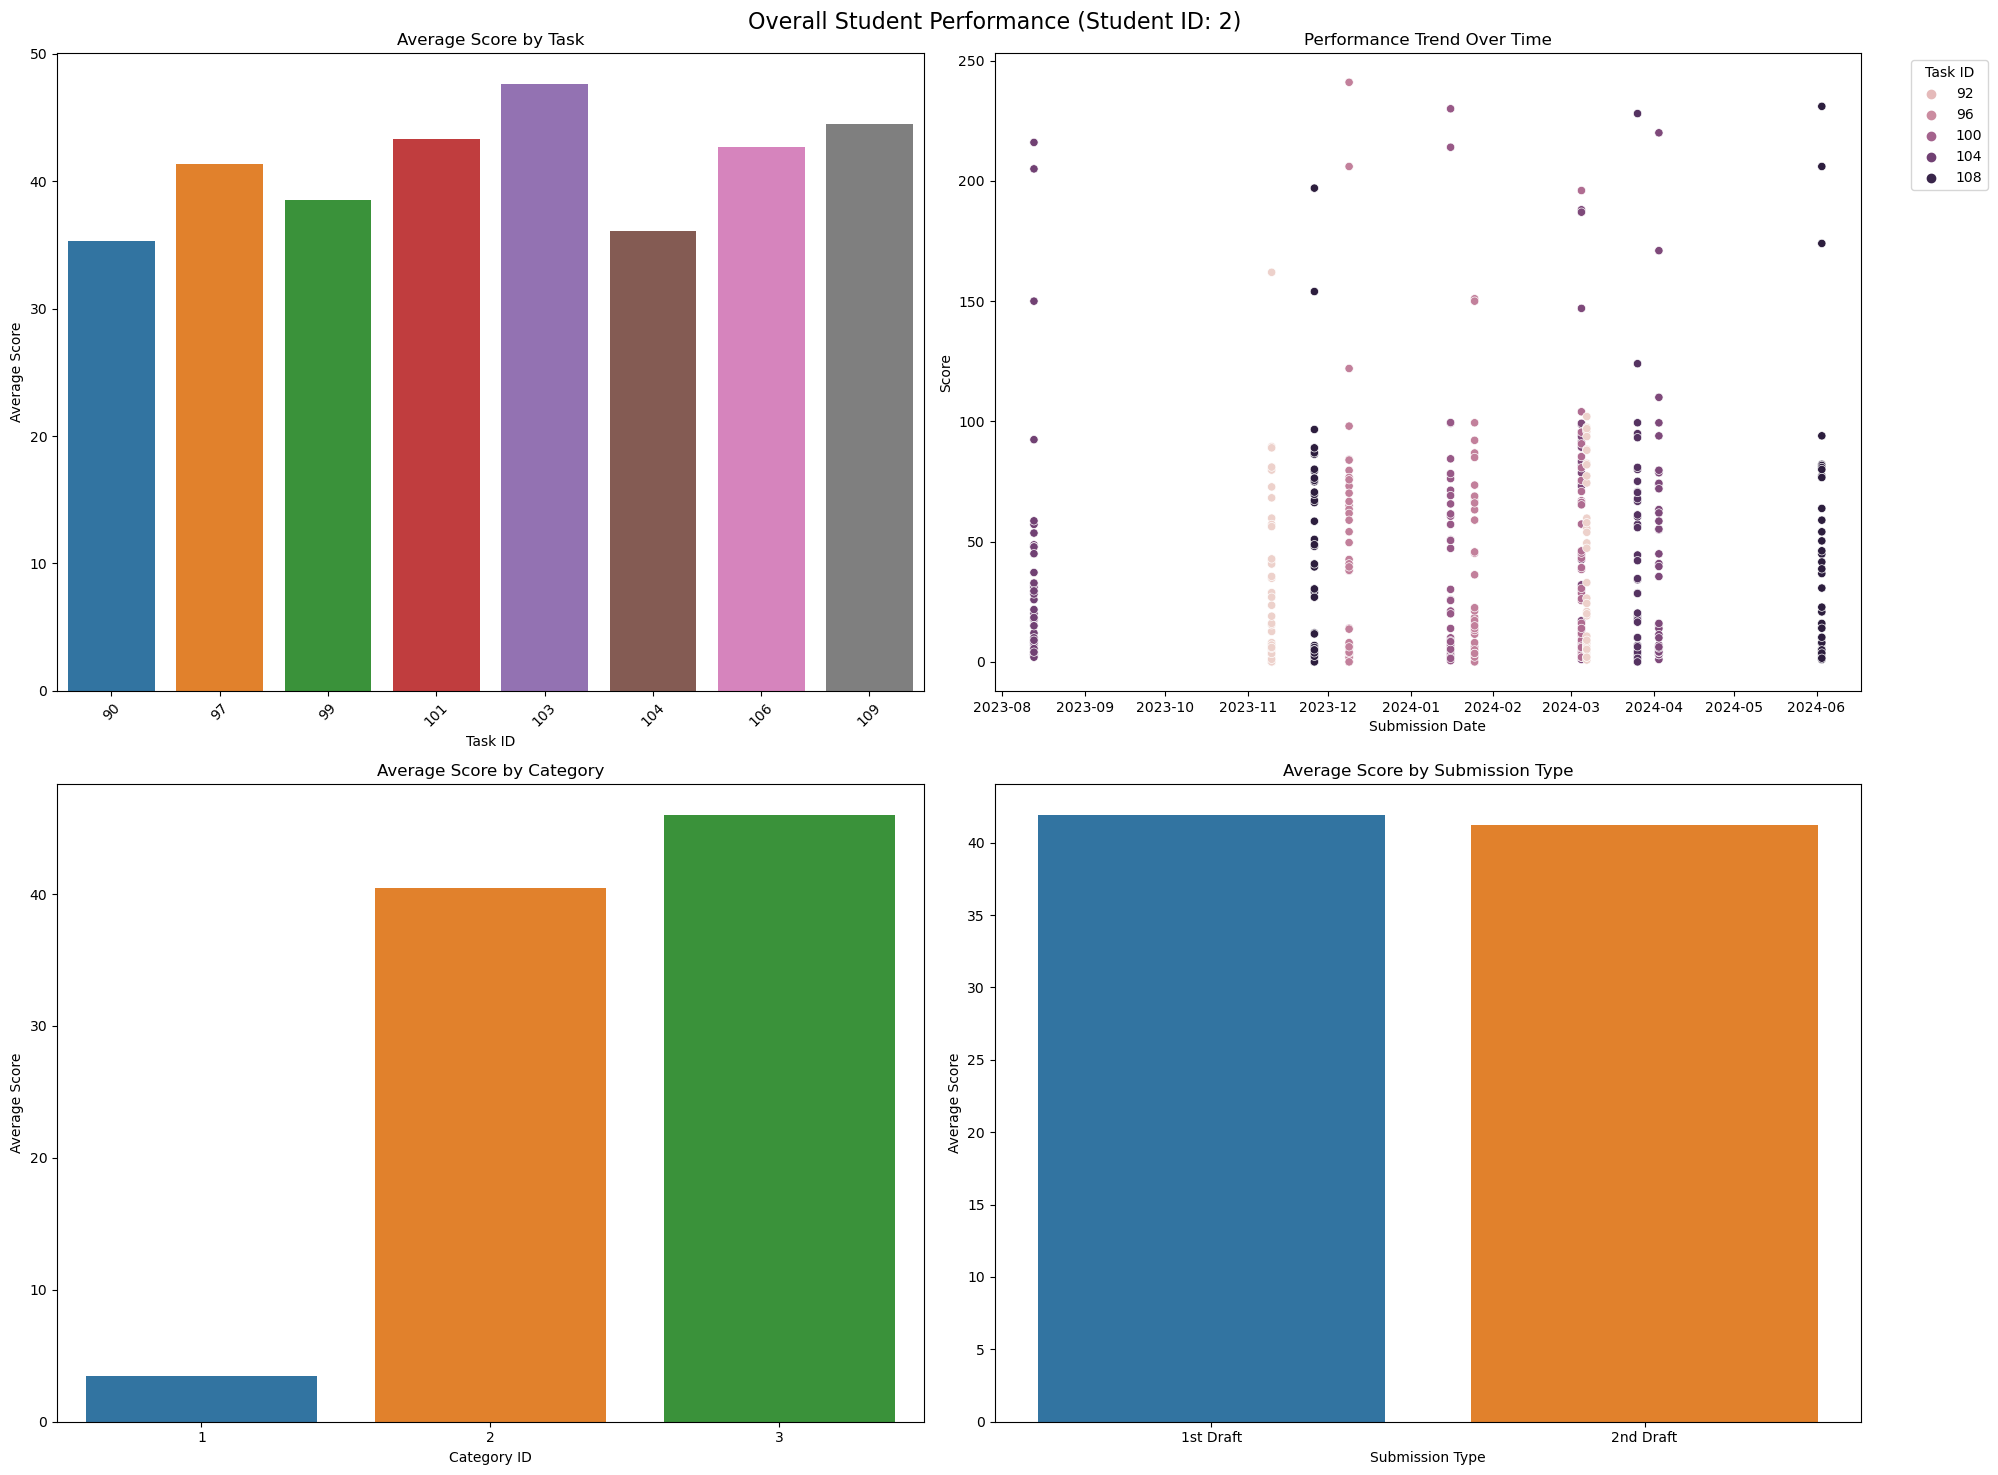


Overall Student Statistics:
Total Tasks Attempted: 8
Total Submissions: 12
Average Score Across All Tasks: 41.51
Highest Average Task Score: 47.65
Lowest Average Task Score: 35.31
Average Improvement (2nd Draft - 1st Draft): -0.74

Top 3 Categories:
Category ID 3: 46.03
Category ID 2: 40.47
Category ID 1: 3.47

Bottom 3 Categories:
Category ID 1: 3.47
Category ID 2: 40.47
Category ID 3: 46.03


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_student_overall_performance(student_id):
    # Filter essays for the given student_id
    essays_student = essay_df[essay_df['student_id'] == student_id]
    
    if essays_student.empty:
        print(f"No data found for Student ID: {student_id}")
        return
    
    # Merge essay scores with essay data
    scores_with_info = pd.merge(essay_score_df, essays_student[['id', 'task_id', 'submission_type', 'submitted_on']], 
                                left_on='essay_id', right_on='id')
    
    # Merge with metric data
    scores_with_metrics = pd.merge(scores_with_info, metric_df[['id', 'name', 'category_id']], left_on='metric_id', right_on='id')
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'Overall Student Performance (Student ID: {student_id})', fontsize=16)
    
    # 1. Average Score by Task
    task_scores = scores_with_info.groupby('task_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=task_scores.index, y=task_scores.values, ax=axs[0, 0])
    axs[0, 0].set_title('Average Score by Task')
    axs[0, 0].set_xlabel('Task ID')
    axs[0, 0].set_ylabel('Average Score')
    axs[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Performance Trend Over Time
    scores_with_info['date'] = pd.to_datetime(scores_with_info['submitted_on'])
    scores_with_info = scores_with_info.sort_values('date')
    sns.scatterplot(data=scores_with_info, x='date', y='score', hue='task_id', ax=axs[0, 1])
    axs[0, 1].set_title('Performance Trend Over Time')
    axs[0, 1].set_xlabel('Submission Date')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend(title='Task ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 3. Average Score by Category
    category_scores = scores_with_metrics.groupby('category_id')['score'].mean().sort_values(ascending=False)
    sns.barplot(x=category_scores.index, y=category_scores.values, ax=axs[1, 0])
    axs[1, 0].set_title('Average Score by Category')
    axs[1, 0].set_xlabel('Category ID')
    axs[1, 0].set_ylabel('Average Score')
    
    # 4. Draft Comparison
    draft_scores = scores_with_info.groupby('submission_type')['score'].mean()
    sns.barplot(x=draft_scores.index, y=draft_scores.values, ax=axs[1, 1])
    axs[1, 1].set_title('Average Score by Submission Type')
    axs[1, 1].set_xlabel('Submission Type')
    axs[1, 1].set_ylabel('Average Score')
    
    plt.tight_layout()
    plt.show()

    # Print additional statistics
    print(f"\nOverall Student Statistics:")
    print(f"Total Tasks Attempted: {len(task_scores)}")
    print(f"Total Submissions: {len(essays_student)}")
    print(f"Average Score Across All Tasks: {scores_with_info['score'].mean():.2f}")
    print(f"Highest Average Task Score: {task_scores.max():.2f}")
    print(f"Lowest Average Task Score: {task_scores.min():.2f}")
    
    if len(draft_scores) == 2:
        print(f"Average Improvement (2nd Draft - 1st Draft): {(draft_scores['2nd Draft'] - draft_scores['1st Draft']):.2f}")

    # Top 3 and Bottom 3 Categories
    top_categories = category_scores.nlargest(3)
    bottom_categories = category_scores.nsmallest(3)
    print("\nTop 3 Categories:")
    for cat_id, score in top_categories.items():
        print(f"Category ID {cat_id}: {score:.2f}")
    print("\nBottom 3 Categories:")
    for cat_id, score in bottom_categories.items():
        print(f"Category ID {cat_id}: {score:.2f}")

# Main execution
student_id_input = int(input("Enter a student ID: "))
plot_student_overall_performance(student_id_input)
